# Chapter 4

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


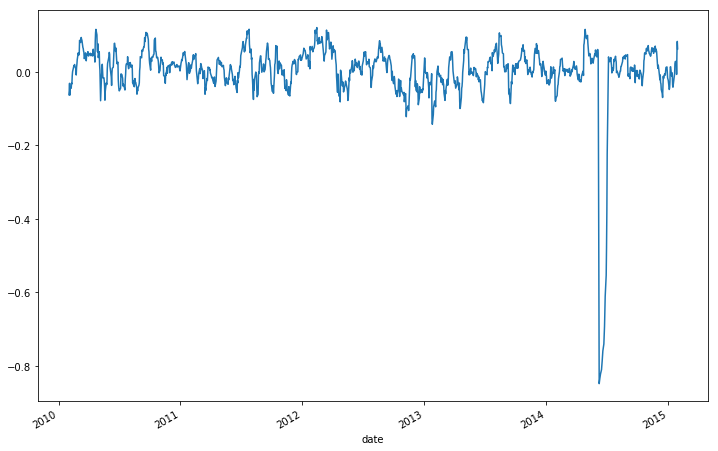

In [68]:
# data prep
all_prices = pd.read_csv('all_prices.csv', parse_dates=['date'], index_col='date')
#all_prices.info()

def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]

    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

prices_perc = all_prices['AAPL'].rolling(20).apply(percent_change)
prices_perc.plot()
plt.show()

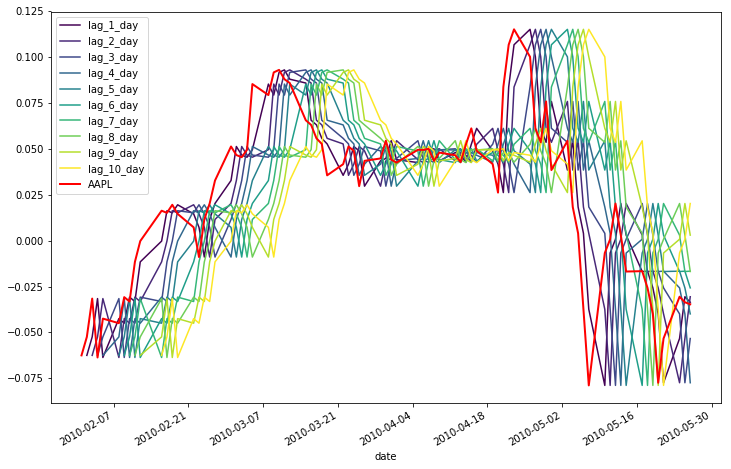

In [69]:
# These are the "time lags"
shifts = np.arange(1, 11).astype(int)

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): prices_perc.shift(day_shift) for day_shift in shifts}

# Convert into a DataFrame for subsequent use
prices_perc_shifted = pd.DataFrame(shifted_data)

# Plot the first 100 samples of each
ax = prices_perc_shifted.iloc[:100].plot(cmap=plt.cm.viridis)
prices_perc.iloc[:100].plot(color='r', lw=2)
ax.legend(loc='best')
plt.show()

In [72]:
# data prep
from io import StringIO
prices_perc_str = 'date,price\n2010-01-04,\n2010-01-05,0.001728867826072393\n2010-01-06,-0.015906325736282683\n2010-01-07,-0.0018485804106882543\n2010-01-08,0.006648328426251272\n2010-01-11,-0.008821596168940554\n2010-01-12,-0.011375003407143874\n2010-01-13,0.014105531416784483\n2010-01-14,-0.005791606875940091\n2010-01-15,-0.01671202788521224\n2010-01-19,0.044238309134171795\n2010-01-20,-0.015392462225457246\n2010-01-21,-0.0172861852359136\n2010-01-22,0.0007562340414383137\n2010-01-25,0.026902664981036602\n2010-01-26,0.014133052502752264\n2010-01-27,0.009420238858792741\n2010-01-28,-0.04132196360106883\n2010-01-29,-0.03627875047114136\n2010-02-01,0.01390187940380278\n2010-02-02,0.005802901512893755\n2010-02-03,0.017206152617269835\n2010-02-04,-0.03603870509577991\n2010-02-05,0.017755782070984927\n2010-02-08,-0.006855643063257701\n2010-02-09,0.010663543333971797\n2010-02-10,-0.005453881330263905\n2010-02-11,0.0181938646609418\n2010-02-12,0.008607233360061462\n2010-02-16,0.01507137990567738\n2010-02-17,-0.004178923386016112\n2010-02-18,0.001876055267202381\n2010-02-19,-0.006209047515981419\n2010-02-22,-0.006198254697243089\n2010-02-23,-0.016764774476542472\n2010-02-24,0.018268557985065995\n2010-02-25,0.0066779826572311045\n2010-02-26,0.01297026211940086\n2010-03-01,0.021356695650816507\n2010-03-02,-0.000669907638261994\n2010-03-03,0.0022982906392147225\n2010-03-04,0.006592485612119536\n2010-03-05,0.039105889054541015\n2010-03-08,0.0005936926103289872\n2010-03-09,0.017984344111311237\n2010-03-10,0.008160653606660292\n2010-03-11,0.00293548754913907\n2010-03-12,0.004878039738251359\n2010-03-15,-0.012180096764869433\n2010-03-16,0.0027251653453388316\n2010-03-17,-0.0014702339247525107\n2010-03-18,0.0023648000754310345\n2010-03-19,-0.01068329391779841\n2010-03-22,0.011248611923509516\n2010-03-23,0.016062242205788852\n2010-03-24,0.004422885054125895\n2010-03-25,-0.011858608206932816\n2010-03-26,0.0187513969226049\n2010-03-29,0.006452984031641246\n2010-03-30,0.014888760786221731\n2010-03-31,-0.0036039009219211208\n2010-04-01,0.004127587040836408\n2010-04-05,0.010679340865686508\n2010-04-06,0.004402746483313668\n2010-04-07,0.004425135510452493\n2010-04-08,-0.0027015834737759863\n2010-04-09,0.007668214051506293\n2010-04-12,0.002067959859695261\n2010-04-13,0.0005778323377391435\n2010-04-14,0.013447155436302285\n2010-04-15,0.013146680669569933\n2010-04-16,-0.006106411453221419\n2010-04-19,-0.0013338520506559928\n2010-04-20,-0.01003765301224932\n2010-04-21,0.0007562340414383137\n2010-04-22,0.027968489546167628\n2010-04-23,0.01636204093926557\n2010-04-26,-0.004910792929542291\n2010-04-27,-0.027680931354359957\n2010-04-28,-0.0016790681516933807\n2010-04-29,0.026911318190107447\n2010-04-30,-0.028104522049093056\n2010-05-03,0.02014625929307882\n2010-05-04,-0.02879670412608797\n2010-05-05,-0.010398929460308166\n2010-05-06,-0.03804839671899999\n2010-05-07,-0.04219283437206568\n2010-05-10,0.0007562340414383137\n2010-05-11,0.009960990394090704\n2010-05-12,0.021713734075866117\n2010-05-13,-0.014231721710378691\n2010-05-14,-0.017572471702780337\n2010-05-17,0.0015759554759730403\n2010-05-18,-0.007316454338562568\n2010-05-19,-0.015929671392307058\n2010-05-20,-0.04260288785701672\n2010-05-21,0.019178991823245877\n2010-05-24,0.01832285880894211\n2010-05-25,-0.006240809211908449\n2010-05-26,-0.004526596433272169\n2010-05-27,0.037851781020697445\n2010-05-28,0.013933349616736297\n2010-06-01,0.015376817670180272\n2010-06-02,0.011961779611534211\n2010-06-03,-0.003144557764773151\n2010-06-04,-0.027211828647589694\n2010-06-07,-0.019612473762551978\n2010-06-08,-0.006415860313892862\n2010-06-09,-0.024585865529558486\n2010-06-10,0.03005753963531884\n2010-06-11,0.011975525640281322\n2010-06-14,0.003037371366758143\n2010-06-15,0.021275770887508774\n2010-06-16,0.02911158281711606\n2010-06-17,0.017287177512287977\n2010-06-18,0.008092191507700276\n2010-06-21,-0.01422997352307915\n2010-06-22,0.013621068115474925\n2010-06-23,-0.010516749815225572\n2010-06-24,-0.0072701961236341095\n2010-06-25,-0.008550186223241857\n2010-06-28,0.0059992878364910525\n2010-06-29,-0.045210574152853435\n2010-06-30,-0.01811296780955647\n2010-07-01,-0.01212580194657734\n2010-07-02,-0.0061977181262073315\n2010-07-06,0.006843763916716108\n2010-07-07,0.04038135544308234\n2010-07-08,-0.0022422893514759037\n2010-07-09,0.005928141506827213\n2010-07-12,-0.008974601789807574\n2010-07-13,-0.02133781327942092\n2010-07-14,0.0036934393108308643\n2010-07-15,-0.005064701399936376\n2010-07-16,-0.006164231433031464\n2010-07-19,-0.01728688240722518\n2010-07-20,0.025694265273941405\n2010-07-21,0.009329417195507714\n2010-07-22,0.018801140802400286\n2010-07-23,0.0035518299745194524\n2010-07-26,-0.0025390052038740552\n2010-07-27,0.018512815832008287\n2010-07-28,-0.011814669394380457\n2010-07-29,-0.01092120669179503\n2010-07-30,-0.00333188572051928\n2010-08-02,0.017881430515063277\n2010-08-03,0.0003055260668742836\n2010-08-04,0.004008746611690084\n2010-08-05,-0.004867301492355498\n2010-08-06,-0.0061520670645146625\n2010-08-09,0.00638234427856464\n2010-08-10,-0.008939828216845634\n2010-08-11,-0.035542180880338746\n2010-08-12,0.0063951796890169416\n2010-08-13,-0.010683593088874305\n2010-08-16,-0.005861019976689126\n2010-08-17,0.017485082691020913\n2010-08-18,0.004365590916566724\n2010-08-19,-0.012605231206158135\n2010-08-20,-0.0009604850135969157\n2010-08-23,-0.015382178398422385\n2010-08-24,-0.02388115618815808\n2010-08-25,0.012336881384789248\n2010-08-26,-0.010745576540675148\n2010-08-27,0.005576843705580191\n2010-08-30,0.003642053592723501\n2010-08-31,0.0024742845768953637\n2010-09-01,0.029740813256239725\n2010-09-02,0.007350253606437485\n2010-09-03,0.02617288827202285\n2010-09-07,-0.0037098387383440205\n2010-09-08,0.019820785626351773\n2010-09-09,0.0005704776901537563\n2010-09-10,0.0012924582810659299\n2010-09-13,0.013780759665672158\n2010-09-14,0.0038196412951577038\n2010-09-15,0.008057882743965062\n2010-09-16,0.023499364351245916\n2010-09-17,-0.004338869190680176\n2010-09-20,0.028543488292353234\n2010-09-21,0.0019065282161292994\n2010-09-22,0.014025482250337831\n2010-09-23,0.004065984304904147\n2010-09-24,0.011767953433170109\n2010-09-27,-0.003968254131154469\n2010-09-28,-0.014768481856098914\n2010-09-29,0.001777863784890146\n2010-09-30,-0.012597011041462406\n2010-10-01,-0.004334759593578895\n2010-10-04,-0.013733569110384437\n2010-10-05,0.03696524241982843\n2010-10-06,0.000865297320508554\n2010-10-07,0.00010369307017211807\n2010-10-08,0.016769210463687026\n2010-10-11,0.004386765234948015\n2010-10-12,0.010766498364484125\n2010-10-13,0.005359449373880705\n2010-10-14,0.0072299025434486705\n2010-10-15,0.04111674906939065\n2010-10-18,0.010357739919128306\n2010-10-19,-0.02676099149173242\n2010-10-20,0.0033603574272581204\n2010-10-21,-0.0032524491330049245\n2010-10-22,-0.006623180883350176\n2010-10-25,0.004455693223873141\n2010-10-26,-0.002557975061215624\n2010-10-27,-0.0007141016346995171\n2010-10-28,-0.008413796330038897\n2010-10-29,-0.013956198858478404\n2010-11-01,0.010631912419429883\n2010-11-02,0.01702942704716276\n2010-11-03,0.011119727681410297\n2010-11-04,0.01748722809315323\n2010-11-05,-0.0035818612226887732\n2010-11-08,0.0046983696203913156\n2010-11-09,-0.00797189434462471\n2010-11-10,0.006169340079532754\n2010-11-11,-0.004339228962620988\n2010-11-12,-0.027222520304579244\n2010-11-15,-0.0032139143647725364\n2010-11-16,-0.01775014627165614\n2010-11-17,-0.003614214662289689\n2010-11-18,0.026389375342040323\n2010-11-19,-0.0055117369323573395\n2010-11-22,0.021615028729614946\n2010-11-23,-0.014775294110698351\n2010-11-24,0.019661166524201176\n2010-11-26,0.0006353399084392488\n2010-11-29,0.0059365174603174505\n2010-11-30,-0.018051560405987613\n2010-12-01,0.016872890617501354\n2010-12-02,0.0055309733639226704\n2010-12-03,-0.0022316611310442343\n2010-12-06,0.008537033716374503\n2010-12-07,-0.006059631460625415\n2010-12-08,0.00879917016563214\n2010-12-09,-0.00389392553205619\n2010-12-10,0.0025018513728931975\n2010-12-13,0.003462727791291334\n2010-12-14,-0.004290126447163939\n2010-12-15,0.00021851447057843156\n2010-12-16,0.0027781465556234353\n2010-12-17,-0.0019921805695524947\n2010-12-20,0.004990433735930068\n2010-12-21,0.006176115128596351\n2010-12-22,0.002961119706611201\n2010-12-23,-0.0047975828465391\n2010-12-27,0.0033374473628724212\n2010-12-28,0.002433180302250109\n2010-12-29,-0.0005530586315489431\n2010-12-30,-0.005010907051867064\n2010-12-31,-0.003398621895245412\n2011-01-03,0.021732349694566656\n2011-01-04,0.005218958036229016\n2011-01-05,0.008180131914148953\n2011-01-06,-0.0008084430944085133\n2011-01-07,0.00716152304539083\n2011-01-10,0.018832553681727742\n2011-01-11,-0.0023653233979695322\n2011-01-12,0.008137249831837617\n2011-01-13,0.0036583298822658573\n2011-01-14,0.008099930384171927\n2011-01-18,-0.02246894851857085\n2011-01-19,-0.005313374228463627\n2011-01-20,-0.018179694787639204\n2011-01-21,-0.01791512242497139\n2011-01-24,0.032841552299089215\n2011-01-25,0.011705429195252632\n2011-01-26,0.007176379823561228\n2011-01-27,-0.0018613203106938592\n2011-01-28,-0.020716148091388123\n2011-01-31,0.009580464090565479\n2011-02-01,0.016827802862522757\n2011-02-02,-0.002057797836864169\n2011-02-03,-0.0025557446264431877\n2011-02-04,0.008909823872879322\n2011-02-07,0.015526666666666727\n2011-02-08,0.009435097460358557\n2011-02-09,0.008333299268019196\n2011-02-10,-0.010107223028813929\n2011-02-11,0.006515521575976008\n2011-02-14,0.006529314655196505\n2011-02-15,0.0020046133081419834\n2011-02-16,0.00897465930349942\n2011-02-17,-0.013300994390733263\n2011-02-18,-0.021601981398811147\n2011-02-22,-0.03408837162497463\n2011-02-23,0.011842527045561642\n2011-02-24,0.0007588757423088477\n2011-02-25,0.015399014367116885\n2011-02-28,0.014504813420401752\n2011-03-01,-0.01104161525072536\n2011-03-02,0.008044421906297712\n2011-03-03,0.021129189212898778\n2011-03-04,0.0012236733615576575\n2011-03-07,-0.012888889282715865\n2011-03-08,0.0011256444517728122\n2011-03-09,-0.009247830049740445\n2011-03-10,-0.016455298790117992\n2011-03-11,0.015346047071031018\n2011-03-14,0.004460342560011053\n2011-03-15,-0.022994716531862178\n2011-03-16,-0.04463995452346225\n2011-03-17,0.014029835034397815\n2011-03-18,-0.011863489264445172\n2011-03-21,0.02609851831795155\n2011-03-22,0.0055998144061275065\n2011-03-23,-0.005890990414150491\n2011-03-24,0.017040593466070553\n2011-03-25,0.019045145678680042\n2011-03-28,-0.0031290862258580403\n2011-03-29,0.0014838060300246705\n2011-03-30,-0.006638893415758167\n2011-03-31,-0.00034421305367285035\n2011-04-01,-0.011333955788919612\n2011-04-04,-0.009780618504685434\n2011-04-05,-0.0067411120101439365\n2011-04-06,-0.002508206210003876\n2011-04-07,0.00011833215249150783\n2011-04-08,-0.008932764592985675\n2011-04-11,-0.012714191298361632\n2011-04-12,0.004836789776425257\n2011-04-13,0.011221395976061463\n2011-04-14,-0.011037372773551088\n2011-04-15,-0.01492090436749241\n2011-04-18,0.01340623929840646\n2011-04-19,0.018110565123463013\n2011-04-20,0.01346714955347946\n2011-04-21,0.024210709383487603\n2011-04-25,0.006586863622627514\n2011-04-26,-0.007336879933503967\n2011-04-27,-0.0007705610190467952\n2011-04-28,-0.00971011879794708\n2011-04-29,0.009747651270313512\n2011-05-02,-0.010995901836343473\n2011-05-03,0.0055446951245333\n2011-05-04,0.003934497279684091\n2011-05-05,-0.008067088044545043\n2011-05-06,-0.0002595183909910668\n2011-05-09,0.00271157326819858\n2011-05-10,0.005322218097365922\n2011-05-11,-0.006352834435962956\n2011-05-12,-0.0019008006056431524\n2011-05-13,-0.017514476758443413\n2011-05-16,-0.02114538644517351\n2011-05-17,0.008520885293030562\n2011-05-18,0.011096543008003836\n2011-05-19,0.0019419631321087557\n2011-05-20,-0.015593342272535685\n2011-05-23,-0.0024462113775553357\n2011-05-24,-0.006608804025382955\n2011-05-25,0.013817348255805183\n2011-05-26,-0.005285311026687466\n2011-05-27,0.007193993943952307\n2011-05-31,0.030882304161282875\n2011-06-01,-0.006669922280134601\n2011-06-02,0.001707620663276203\n2011-06-03,-0.007685585290870182\n2011-06-06,-0.015723319481617735\n2011-06-07,-0.017749390972209914\n2011-06-08,0.0006023521462049947\n2011-06-09,-0.0022574163663151483\n2011-06-10,-0.016863196985224097\n2011-06-13,0.0021478643162603176\n2011-06-14,0.017881203416296322\n2011-06-15,-0.01711590066513017\n2011-06-16,-0.004866096567795261\n2011-06-17,-0.015069519991869002\n2011-06-20,-0.015424905391006738\n2011-06-21,0.03165034814933278\n2011-06-22,-0.008269271568848706\n2011-06-23,0.02671959943362108\n2011-06-24,-0.014732979615183429\n2011-06-27,0.0174352164712385\n2011-06-28,0.009697690358615303\n2011-06-29,-0.003638969646275512\n2011-06-30,0.004879646018689944\n2011-07-01,0.022611493026875\n2011-07-05,0.01797469525185499\n2011-07-06,0.006667964971525104\n2011-07-07,0.01546514157677619\n2011-07-08,0.0070268476060072185\n2011-07-11,-0.01587385415854241\n2011-07-12,-0.0007062683396355941\n2011-07-13,0.012070685785344364\n2011-07-14,-0.0006982654658812747\n2011-07-15,0.01998487832982188\n2011-07-18,0.02433414761044858\n2011-07-19,0.008159379107134417\n2011-07-20,0.026668444597823495\n2011-07-21,0.0010080692945998466\n2011-07-22,0.015518063502241865\n2011-07-25,0.013221423748628915\n2011-07-26,0.01232125002643345\n2011-07-27,-0.026821364894897195\n2011-07-28,-0.0019613438956671636\n2011-07-29,-0.003419947970189918\n2011-08-01,0.016057153064067995\n2011-08-02,-0.019760537409870094\n2011-08-03,0.00941092807498837\n2011-08-04,-0.038719211860305136\n2011-08-05,-0.009937175742473424\n2011-08-08,0.0007562340414383137\n2011-08-09,0.0007562340414383137\n2011-08-10,-0.027592834268640773\n2011-08-11,0.027523445337675964\n2011-08-12,0.008803805002861953\n2011-08-15,0.017029667021132414\n2011-08-16,-0.007641952399343247\n2011-08-17,-0.00010513298907858224\n2011-08-18,-0.03782461077791709\n2011-08-19,-0.0273733528435638\n2011-08-22,0.0011515771433988323\n2011-08-23,0.048142799982763766\n2011-08-24,0.006905797533632719\n2011-08-25,-0.006539430383132563\n2011-08-26,0.026383347860831276\n2011-08-29,0.01665884587296799\n2011-08-30,5.1285997147869416e-05\n2011-08-31,-0.013231070230996761\n2011-09-01,-0.009874505394926195\n2011-09-02,-0.018318767406880602\n2011-09-06,0.015211896683235616\n2011-09-07,0.011033801697373412\n2011-09-08,0.0005470216081506667\n2011-09-09,-0.017337478207522482\n2011-09-12,0.006516909712310441\n2011-09-13,0.012317734670894401\n2011-09-14,0.012167856870445267\n2011-09-15,0.009401497752920625\n2011-09-16,0.019187736909453055\n2011-09-19,0.027790264114052138\n2011-09-20,0.004421417195557342\n2011-09-21,-0.003168436351445833\n2011-09-22,-0.025040024808850946\n2011-09-23,0.0061718603656102195\n2011-09-26,-0.0027949196971036616\n2011-09-27,-0.009698132253401222\n2011-09-28,-0.005635453003524657\n2011-09-29,-0.016221223851051982\n2011-09-30,-0.023683362353013382\n2011-10-03,-0.01762297826101935\n2011-10-04,-0.005605963664677284\n2011-10-05,0.015436198326202561\n2011-10-06,-0.002326485178088287\n2011-10-07,-0.020059888226567776\n2011-10-10,0.0007562340414383137\n2011-10-11,0.0295259771537662\n2011-10-12,0.004746601344556712\n2011-10-13,0.015515012573435242\n2011-10-14,0.033224795841326045\n2011-10-17,-0.004762983502615905\n2011-10-18,0.0053572345302413055\n2011-10-19,0.0007562340414383137\n2011-10-20,-0.00830360261585588\n2011-10-21,-0.006172375969362295\n2011-10-24,0.03283529098722986\n2011-10-25,-0.01971559218837093\n2011-10-26,0.007114659010543985\n2011-10-27,0.010209685216932409\n2011-10-28,0.0006424151661170087\n2011-10-31,-0.0004197802311831676\n2011-11-01,-0.02043082420186466\n2011-11-02,0.0022697888509800607\n2011-11-03,0.014242208155383974\n2011-11-04,-0.007021107996129677\n2011-11-07,-0.001274232953856505\n2011-11-08,0.01626094851829266\n2011-11-09,-0.026955166323613045\n2011-11-10,-0.025450288725084536\n2011-11-11,-0.0015575878516485336\n2011-11-14,-0.013935804496443974\n2011-11-15,0.025233327926840052\n2011-11-16,-0.010441545309387786\n2011-11-17,-0.01912833081314382\n2011-11-18,-0.006544580164807643\n2011-11-21,-0.015815903456128808\n2011-11-22,0.020324682533328052\n2011-11-23,-0.025284863212904816\n2011-11-25,-0.009319049514596915\n2011-11-28,0.03451881580417728\n2011-11-29,-0.007763514097534942\n2011-11-30,0.024115734384638862\n2011-12-01,0.014992179918665539\n2011-12-02,0.004562681411594822\n2011-12-05,0.008493736185543495\n2011-12-06,-0.005241650206314099\n2011-12-07,-0.004757613639426503\n2011-12-08,0.00403504587627542\n2011-12-09,0.00757695702223885\n2011-12-12,-0.004522163393065292\n2011-12-13,-0.0077327532434947445\n2011-12-14,-0.022170170862429128\n2011-12-15,-0.003287869136803364\n2011-12-16,0.005488979858143501\n2011-12-19,0.003123232466420449\n2011-12-20,0.03594880796461004\n2011-12-21,0.0012628134961193826\n2011-12-22,0.005296998253560329\n2011-12-23,0.011993483788783265\n2011-12-27,0.007933932393812399\n2011-12-28,-0.009568779695394623\n2011-12-29,0.006159358189752468\n2011-12-30,-0.0002962159309006849\n2012-01-03,0.015382706020911616\n2012-01-04,0.005374145855117462\n2012-01-05,0.01110193713472485\n2012-01-06,0.010453812052410227\n2012-01-09,-0.0015861789697623014\n2012-01-10,0.0035804756597823395\n2012-01-11,-0.0016302854403689683\n2012-01-12,-0.002745237302004181\n2012-01-13,-0.0037494554450643596\n2012-01-17,0.011648107227476815\n2012-01-18,0.01038381678741745\n2012-01-19,-0.0031693597787167053\n2012-01-20,-0.017416708194817315\n2012-01-23,0.01691646176917605\n2012-01-24,-0.016377717099531758\n2012-01-25,0.0007562340414383137\n2012-01-26,-0.004544857426631862\n2012-01-27,0.005960056810382907\n2012-01-30,0.012810733482142426\n2012-01-31,0.007659842030637775\n2012-02-01,-0.0006352808725588319\n2012-02-02,-0.0023454789243322867\n2012-02-03,0.01001932890214002\n2012-02-06,0.009332531326139966\n2012-02-07,0.010474882493366828\n2012-02-08,0.016743823665946275\n2012-02-09,0.03459341580621239\n2012-02-10,0.0005069083621440275\n2012-02-13,0.018604886379169426\n2012-02-14,0.013648964809732819\n2012-02-15,-0.023142182326933658\n2012-02-16,0.009122559583788352\n2012-02-17,-0.00017918599824612964\n2012-02-21,0.02535252677940477\n2012-02-22,-0.003515641305567682\n2012-02-23,0.006529674188577021\n2012-02-24,0.011657863762138992\n2012-02-27,0.006412656958788171\n2012-02-28,0.01835437022210859\n2012-02-29,0.01313015045585305\n2012-03-01,0.003742262566262888\n2012-03-02,0.0013040755756781996\n2012-03-05,-0.022047728866829874\n2012-03-06,-0.005439342510949113\n2012-03-07,0.0008109663382912922\n2012-03-08,0.02129296724466353\n2012-03-09,0.005867352066798028\n2012-03-12,0.01252812102079972\n2012-03-13,0.029166705925424495\n2012-03-14,0.03781026417113276\n2012-03-15,-0.006818431660900904\n2012-03-16,1.7053760560670803e-05\n2012-03-19,0.02652120570442359\n2012-03-20,0.008085140494907857\n2012-03-21,-0.00570994635183724\n2012-03-22,-0.005244756977047417\n2012-03-23,-0.005489384816133989\n2012-03-26,0.018337335455564506\n2012-03-27,0.012356320219985251\n2012-03-28,0.005109996912690143\n2012-03-29,-0.01256438728401979\n2012-03-30,-0.01690548997858229\n2012-04-02,0.03182388232830861\n2012-04-03,0.017280060220808233\n2012-04-04,-0.007960964417744883\n2012-04-05,0.015008548878097893\n2012-04-09,0.004024143246678631\n2012-04-10,-0.01224396530967713\n2012-04-11,-0.0035643783588587673\n2012-04-12,-0.00547754533767053\n2012-04-13,-0.028164493368539312\n2012-04-16,-0.04147177243268713\n2012-04-17,0.0007562340414383137\n2012-04-18,-0.0022305675324523553\n2012-04-19,-0.03435582829952015\n2012-04-20,-0.024615253166277842\n2012-04-23,-0.0022339854677267215\n2012-04-24,-0.01997545656701401\n2012-04-25,0.0007562340414383137\n2012-04-26,-0.0037705342840621985\n2012-04-27,-0.007734036569362977\n2012-04-30,-0.03154234539722436\n2012-05-01,-0.0031678739648863773\n2012-05-02,0.0066135861646425586\n2012-05-03,-0.007099198167145572\n2012-05-04,-0.028479585142890652\n2012-05-07,0.00748341972578507\n2012-05-08,-0.0022827895503822644\n2012-05-09,0.001760046112147657\n2012-05-10,0.0023541778450647446\n2012-05-11,-0.006678060670317615\n2012-05-14,-0.014981244190381559\n2012-05-15,-0.009046603716550186\n2012-05-16,-0.012817016677248086\n2012-05-17,-0.0292264722047079\n2012-05-18,0.0004904172547647115\n2012-05-21,0.0007562340414383137\n2012-05-22,-0.007678791662434198\n2012-05-23,0.02439978888343198\n2012-05-24,-0.009183889914465164\n2012-05-25,-0.005359847377772417\n2012-05-29,0.017748827559593155\n2012-05-30,0.01205728819174452\n2012-05-31,-0.002486280375317358\n2012-06-01,-0.02897553433172068\n2012-06-04,0.005882449063266014\n2012-06-05,-0.002587238931966361\n2012-06-06,0.015333220717924569\n2012-06-07,0.00045493821088335716\n2012-06-08,0.015042298651363696\n2012-06-11,-0.0157671788879839\n2012-06-12,0.008736490394124719\n2012-06-13,-0.006942489981550063\n2012-06-14,-0.0011011377724544278\n2012-06-15,0.004549203143819673\n2012-06-18,0.020291547563993324\n2012-06-19,0.002782701810892673\n2012-06-20,-0.0028430771066833387\n2012-06-21,-0.01377741718925702\n2012-06-22,0.007668750444057681\n2012-06-25,-0.01946397189302169\n2012-06-26,0.002207547621369038\n2012-06-27,0.004317890504005763\n2012-06-28,-0.009486518959612866\n2012-06-29,0.02627191903249023\n2012-07-02,0.014589009899254535\n2012-07-03,0.011628272522251959\n2012-07-05,0.017567298399724644\n2012-07-06,-0.006656413800180686\n2012-07-09,0.01322045658871094\n2012-07-10,-0.009252423193111814\n2012-07-11,-0.006214968289358372\n2012-07-12,-0.009149127034750154\n2012-07-13,0.0101352344444531\n2012-07-16,0.003206800331906059\n2012-07-17,4.936646135669988e-05\n2012-07-18,-0.0011203134122092985\n2012-07-19,0.013294622396317561\n2012-07-20,-0.016310699237106915\n2012-07-23,-0.0007777990729396296\n2012-07-24,-0.004819281901133139\n2012-07-25,-0.04318373007986632\n2012-07-26,-0.00015651077202503657\n2012-07-27,0.017881936477805966\n2012-07-30,0.01686722640372982\n2012-07-31,0.026435595902562663\n2012-08-01,-0.006467347377161801\n2012-08-02,0.001614996483495271\n2012-08-03,0.013014419753865435\n2012-08-06,0.011125520184326419\n2012-08-07,-0.0026343008466745443\n2012-08-08,-0.0016910840023021763\n2012-08-09,0.0014035104519919725\n2012-08-10,0.0015626907330921554\n2012-08-13,0.013350495480218213\n2012-08-14,0.0026825793650793513\n2012-08-15,-0.0013615000490153557\n2012-08-16,0.008734576959602646\n2012-08-17,0.018496383659747\n2012-08-20,0.02629185782306735\n2012-08-21,-0.01366614262598757\n2012-08-22,0.019525673492458234\n2012-08-23,-0.009329140261404691\n2012-08-24,0.0008903505552505267\n2012-08-27,0.01878711628572639\n2012-08-28,-0.001302341389346761\n2012-08-29,-0.001970979517366958\n2012-08-30,-0.014254543016804405\n2012-08-31,0.002063684195441658\n2012-09-04,0.014626294159804818\n2012-09-05,-0.007022497285772071\n2012-09-06,0.009011798585102511\n2012-09-07,0.006166140706131363\n2012-09-10,-0.026012588208000408\n2012-09-11,-0.0032440415262409076\n2012-09-12,0.013926939153465984\n2012-09-13,0.019692731579922435\n2012-09-14,0.01215262945667649\n2012-09-17,0.012296041875731101\n2012-09-18,0.0030437879519803657\n2012-09-19,0.00027071419258474006\n2012-09-20,-0.004842649050426598\n2012-09-21,0.0019893974609536467\n2012-09-24,-0.013283967984292816\n2012-09-25,-0.02497141910053345\n2012-09-26,-0.012412079294906179\n2012-09-27,0.024264144379078388\n2012-09-28,-0.020871219104092172\n2012-10-01,-0.011557530740956105\n2012-10-02,0.0029117669714343866\n2012-10-03,0.01533319060047094\n2012-10-04,-0.006925290312097045\n2012-10-05,-0.021310726238345318\n2012-10-08,-0.02209654314100151\n2012-10-09,-0.0036353933164202943\n2012-10-10,0.007957823210805168\n2012-10-11,-0.019987226100308828\n2012-10-12,0.002563324380793793\n2012-10-15,0.008019556532154597\n2012-10-16,0.023678215313888057\n2012-10-17,-0.007971783363248056\n2012-10-18,-0.018569358187788675\n2012-10-19,-0.03603943435085365\n2012-10-22,0.03966610790755579\n2012-10-23,-0.032600990540827976\n2012-10-24,0.005657339962830242\n2012-10-25,-0.01181848037253063\n2012-10-26,-0.009088811443454636\n2012-10-31,-0.014370836283057414\n2012-11-01,0.002049321349281975\n2012-11-02,-0.03309081989838471\n2012-11-05,0.013557544817730518\n2012-11-06,-0.0030276538450909407\n2012-11-07,-0.04263527326627185\n2012-11-08,-0.03629036327899151\n2012-11-09,0.01731290238901703\n2012-11-12,-0.007732248776120751\n2012-11-13,0.0001289814504979223\n2012-11-14,-0.011088605452574181\n2012-11-15,-0.02097306268651213\n2012-11-16,0.003919221207240748\n2012-11-19,0.0007562340414383137\n2012-11-20,-0.008520018217665473\n2012-11-21,0.001408480909167692\n2012-11-23,0.01744705499490009\n2012-11-26,0.031548553410993906\n2012-11-27,-0.00805729279721033\n2012-11-28,-0.0031464618850186006\n2012-11-29,0.011013071331123083\n2012-11-30,-0.0069227418764431035\n2012-12-03,0.0015548694880976992\n2012-12-04,-0.017639414795569103\n2012-12-05,0.0007562340414383137\n2012-12-06,0.01568322696941497\n2012-12-07,-0.025564579780561116\n2012-12-10,-0.006432326120047449\n2012-12-11,0.02183767789488274\n2012-12-12,-0.004414590099154628\n2012-12-13,-0.017272751391465727\n2012-12-14,-0.03756914702637171\n2012-12-17,0.017732778689771918\n2012-12-18,0.029046197424918017\n2012-12-19,-0.014216195464177798\n2012-12-20,-0.008702040787787439\n2012-12-21,-0.00460008416728691\n2012-12-24,0.0016174031396301977\n2012-12-26,-0.013783938393846116\n2012-12-27,0.004015635540204855\n2012-12-28,-0.010620183788175384\n2012-12-31,0.044310152950200875\n2013-01-02,0.0316815778513149\n2013-01-03,-0.012622234309479648\n2013-01-04,-0.02785463798319824\n2013-01-07,-0.005882334055139887\n2013-01-08,0.0026913876591281947\n2013-01-09,-0.015628892820281633\n2013-01-10,0.012396002563573818\n2013-01-11,-0.006131598496234283\n2013-01-14,-0.03565252752841489\n2013-01-15,-0.03154957952517457\n2013-01-16,0.041508823387358694\n2013-01-17,-0.006737849252147042\n2013-01-18,-0.005331439240425202\n2013-01-22,0.009539977713800574\n2013-01-23,0.018305362693461506\n2013-01-24,0.0007562340414383137\n2013-01-25,-0.023573754810646767\n2013-01-28,0.022619807623397697\n2013-01-29,0.018762596897660896\n2013-01-30,-0.0031422066897285905\n2013-01-31,-0.002933266191216373\n2013-02-01,-0.004105475440099682\n2013-02-04,-0.024910698656482357\n2013-02-05,0.035087737067392544\n2013-02-06,-0.0010702384832193613\n2013-02-07,0.023767343756985252\n2013-02-08,0.014437644419420798\n2013-02-11,0.010421533472431369\n2013-02-12,-0.025066198036125132\n2013-02-13,-0.0019021307890483162\n2013-02-14,-0.0008993019517708652\n2013-02-15,-0.01378083721174886\n2013-02-19,-0.00036941497726111875\n2013-02-20,-0.02421794928459982\n2013-02-21,-0.006215878272707493\n2013-02-22,0.010648766767164022\n2013-02-25,-0.017768039829498365\n2013-02-26,0.013934103810319029\n2013-02-27,-0.009800255945380932\n2013-02-28,-0.007130438593619171\n2013-03-01,-0.024762110958633933\n2013-03-04,-0.024206157654005994\n2013-03-05,0.0264016196091405\n2013-03-06,-0.012710470270737304\n2013-03-07,0.011558535089588266\n2013-03-08,0.002647589285858301\n2013-03-11,0.014245330273683549\n2013-03-12,-0.0215589149925653\n2013-03-13,-0.00018673295825961437\n2013-03-14,0.009688341513237084\n2013-03-15,0.025803503367463614\n2013-03-18,0.027182997813007696\n2013-03-19,-0.0026991155903057186\n2013-03-20,-0.00530262081138313\n2013-03-21,0.0014378008730565079\n2013-03-22,0.02027703762358252\n2013-03-25,0.003615418501938387\n2013-03-26,-0.00526338917259047\n2013-03-27,-0.019647004949626953\n2013-03-28,-0.020836967507698947\n2013-04-01,-0.031062229833993378\n2013-04-02,0.002051696140899556\n2013-04-03,0.005118771994128091\n2013-04-04,-0.009884497463614797\n2013-04-05,-0.010567654319827431\n2013-04-08,0.0071124812140532945\n2013-04-09,0.0018066329016991401\n2013-04-10,0.020399079582181793\n2013-04-11,-0.00312149694305915\n2013-04-12,-0.01042981848497452\n2013-04-15,-0.02315030420043425\n2013-04-16,0.01521971858473932\n2013-04-17,0.0007562340414383137\n2013-04-18,-0.026688229426967237\n2013-04-19,-0.0038770107040533067\n2013-04-22,0.02084346881145923\n2013-04-23,0.018712177710203812\n2013-04-24,-0.0016497230357206834\n2013-04-25,0.007201729113650502\n2013-04-26,0.02159750227337901\n2013-04-29,0.03096836610894544\n2013-04-30,0.029433637740404344\n2013-05-01,-0.007881986771005501\n2013-05-02,0.01418196632251589\n2013-05-03,0.01001082337500563\n2013-05-06,0.023845425456546755\n2013-05-07,-0.004449610538503123\n2013-05-08,0.011293736002322077\n2013-05-09,-0.015242357639845276\n2013-05-10,-0.008319242104999042\n2013-05-13,0.003907603204286479\n2013-05-14,-0.0239257784614476\n2013-05-15,-0.03381699093001414\n2013-05-16,0.013361340732837375\n2013-05-17,-0.003037422247948586\n2013-05-20,0.022319147340646495\n2013-05-21,-0.0073826743965622575\n2013-05-22,0.0038438771218111925\n2013-05-23,0.0017899716980853803\n2013-05-24,0.006807805235463143\n2013-05-28,-0.008334251338496006\n2013-05-29,0.007951220823866926\n2013-05-30,0.014900561961347722\n2013-05-31,-0.004096673882383236\n2013-06-03,0.0022012828647558326\n2013-06-04,-0.0031283701008267798\n2013-06-05,-0.009347642147907764\n2013-06-06,-0.014940140605827499\n2013-06-07,0.007640400579760983\n2013-06-10,-0.006609205239704753\n2013-06-11,-0.002939210334055621\n2013-06-12,-0.01236289528170527\n2013-06-13,0.008722996850281124\n2013-06-14,-0.013556262322245985\n2013-06-17,0.004534368065101434\n2013-06-18,-0.0005324513790286093\n2013-06-19,-0.02031174056425673\n2013-06-20,-0.014562603215576007\n2013-06-21,-0.008012659379855014\n2013-06-24,-0.026505464832986315\n2013-06-25,0.00022355293828302733\n2013-06-26,-0.011325529923888697\n2013-06-27,-0.010777011797463014\n2013-06-28,0.006983653539508088\n2013-07-01,0.032002581595274415\n2013-07-02,0.02265287897931989\n2013-07-03,0.005519814027577501\n2013-07-05,-0.008032314791488877\n2013-07-08,-0.005677703593661545\n2013-07-09,0.017588193896838085\n2013-07-10,-0.0038356435417624107\n2013-07-11,0.015591923450251231\n2013-07-12,-0.001825437086704842\n2013-07-15,0.002180506894654357\n2013-07-16,0.006457006680305931\n2013-07-17,0.0002557322217343068\n2013-07-18,0.003369647392979766\n2013-07-19,-0.01577267224489202\n2013-07-22,0.003200388333692849\n2013-07-23,-0.017170622397648026\n2013-07-24,0.0007562340414383137\n2013-07-25,-0.004562906610233833\n2013-07-26,0.005678488079165151\n2013-07-29,0.015419841265203486\n2013-07-30,0.012349551997262214\n2013-07-31,-0.0017427666413537884\n2013-08-01,0.00917066525253711\n2013-08-02,0.012831744750101251\n2013-08-05,0.01493927273133082\n2013-08-06,-0.008946616310235096\n2013-08-07,-0.0005803761318795897\n2013-08-08,-0.008537939486548369\n2013-08-09,-0.014229719004131763\n2013-08-12,0.028408059717481633\n2013-08-13,0.04752216757883717\n2013-08-14,0.018240560940280016\n2013-08-15,-0.0011836047954485965\n2013-08-16,0.00887714881939666\n2013-08-19,0.01076981860223435\n2013-08-20,-0.013136654457629359\n2013-08-21,0.002574522521803301\n2013-08-22,0.0011942829462765405\n2013-08-23,-0.003857094187550174\n2013-08-26,0.0038920680876914325\n2013-08-27,-0.028590243041445963\n2013-08-28,0.004727917251336405\n2013-08-29,0.0016296964957794762\n2013-08-30,-0.009111238337736766\n2013-09-03,0.0027913015790387175\n2013-09-04,0.02069268313102467\n2013-09-05,-0.006858069799972211\n2013-09-06,0.005956401871436526\n2013-09-09,0.015956770069533954\n2013-09-10,-0.022778877427032055\n2013-09-11,0.0007562340414383137\n2013-09-12,0.010647696586267418\n2013-09-13,-0.016480212620017705\n2013-09-16,-0.031791764777553674\n2013-09-17,0.011552501683467668\n2013-09-18,0.020556972801768433\n2013-09-19,0.01639835342345961\n2013-09-20,-0.010353569874587885\n2013-09-23,0.0007562340414383137\n2013-09-24,-0.003138775788599416\n2013-09-25,-0.015477407293264259\n2013-09-26,0.009739762717922859\n2013-09-27,-0.007136658390892921\n2013-09-30,-0.012428857380774976\n2013-10-01,0.02351343584857691\n2013-10-02,0.0032789224056224936\n2013-10-03,-0.012562288842272526\n2013-10-04,-0.0007860449786809623\n2013-10-07,0.009771651581054806\n2013-10-08,-0.013962142061646123\n2013-10-09,0.011747846373678502\n2013-10-10,0.006268117036826263\n2013-10-11,0.006474156628938221\n2013-10-14,0.006554209559685018\n2013-10-15,0.005322165787209935\n2013-10-16,0.004872896593192974\n2013-10-17,0.006764949797918661\n2013-10-18,0.008701698970318156\n2013-10-21,0.024504374611478263\n2013-10-22,-0.002857948316455758\n2013-10-23,0.009790901515046718\n2013-10-24,0.013239126815831953\n2013-10-25,-0.011186082000626367\n2013-10-28,0.007453005620263667\n2013-10-29,-0.024911266466829556\n2013-10-30,0.015909268084862697\n2013-10-31,-0.004191369593078992\n2013-11-01,-0.005108031629632413\n2013-11-04,0.012922319717066562\n2013-11-05,-0.002467969625059657\n2013-11-06,-0.008621151443264329\n2013-11-07,-0.01618289140294574\n2013-11-08,0.01574661684973543\n2013-11-11,-0.0029007107451518087\n2013-11-12,0.0018494711100198848\n2013-11-13,0.0011923636565446148\n2013-11-14,0.014463243975059024\n2013-11-15,-0.006001980244551713\n2013-11-18,-0.012114590454123176\n2013-11-19,0.0017739449050813867\n2013-11-20,-0.008757598005558939\n2013-11-21,0.011922344036573513\n2013-11-22,-0.0025712937417399773\n2013-11-25,0.00757985781254006\n2013-11-26,0.01844423003186405\n2013-11-27,0.023547095040286847\n2013-11-29,0.018517799872733817\n2013-12-02,-0.008703852393023624\n2013-12-03,0.027375065377879152\n2013-12-04,-0.002330795375923017\n2013-12-05,0.0051327185113951585\n2013-12-06,-0.013875717702507926\n2013-12-09,0.011446066743326376\n2013-12-10,-0.0015536253376409177\n2013-12-11,-0.007408720976349114\n2013-12-12,-0.0014607240133534844\n2013-12-13,-0.010900191159600933\n2013-12-16,0.005537272584025028\n2013-12-17,-0.004502274253717939\n2013-12-18,-0.007603769368783474\n2013-12-19,-0.011456684507186968\n2013-12-20,0.008375267375706649\n2013-12-23,0.038377500677848744\n2013-12-24,-0.004244994620182815\n2013-12-26,-0.006641122775605786\n2013-12-27,-0.006756552472408294\n2013-12-30,-0.009944844773863908\n2013-12-31,0.011721878782939996\n2014-01-02,-0.014063682296871797\n2014-01-03,-0.021965851101293246\n2014-01-06,0.005453018404363228\n2014-01-07,-0.007151598643320173\n2014-01-08,0.00633286024741004\n2014-01-09,-0.012770074557572501\n2014-01-10,-0.006672634794635266\n2014-01-13,0.005235155976612368\n2014-01-14,0.01989808788370251\n2014-01-15,0.02007718032596135\n2014-01-16,-0.0055798371592121355\n2014-01-17,-0.024501608718946077\n2014-01-21,0.015536240277937152\n2014-01-22,0.004443881658457624\n2014-01-23,0.008467687218402848\n2014-01-24,-0.018177529086343736\n2014-01-27,0.008112527475071202\n2014-01-28,0.0007562340414383137\n2014-01-29,-0.01135238945923976\n2014-01-30,-0.0019371103654456116\n2014-01-31,0.0016407059631263932\n2014-02-03,0.0018577867450796414\n2014-02-04,0.014475768611274031\n2014-02-05,0.007468660705795103\n2014-02-06,-0.0001560721056289175\n2014-02-07,0.013989951552066773\n2014-02-10,0.017914896222143376\n2014-02-11,0.01317602606164956\n2014-02-12,-7.463430329522717e-05\n2014-02-13,0.015879225014828392\n2014-02-14,-0.0008081039226097794\n2014-02-18,0.0036765233235776956\n2014-02-19,-0.015787852881477486\n2014-02-20,-0.011574909215764328\n2014-02-21,-0.011107977156448904\n2014-02-24,0.004378916773024915\n2014-02-25,-0.010406605653835834\n2014-02-26,-0.009021980007497717\n2014-02-27,0.019947855494144587\n2014-02-28,-0.0027101141681120087\n2014-03-03,0.0028884825786942682\n2014-03-04,0.006593855036496772\n2014-03-05,0.002108322106470554\n2014-03-06,-0.0030243124498566445\n2014-03-07,-0.0005840169736411796\n2014-03-10,0.0009048280365604185\n2014-03-11,0.00973781029805872\n2014-03-12,0.0009700088160382811\n2014-03-13,-0.011106718411137787\n2014-03-14,-0.011231562986744364\n2014-03-17,0.003907131979154595\n2014-03-18,0.008846817946219014\n2014-03-19,-0.000263409867684955\n2014-03-20,-0.004818742144736121\n2014-03-21,0.007887223303506106\n2014-03-24,0.0118603753958896\n2014-03-25,0.010756823765977109\n2014-03-26,-0.009559806777368587\n2014-03-27,-0.004298047424288135\n2014-03-28,-0.0011163863544216628\n2014-03-31,-0.00022352755824205675\n2014-04-01,0.009147854135515124\n2014-04-02,0.0016615785285137331\n2014-04-03,-0.0069301982917012945\n2014-04-04,-0.012936368313392087\n2014-04-07,-0.01570088495897003\n2014-04-08,-5.723346373110891e-05\n2014-04-09,0.013143811637267678\n2014-04-10,-0.012897865074920498\n2014-04-11,-0.007392824672454238\n2014-04-14,0.0039836683442879325\n2014-04-15,-0.007130766301195357\n2014-04-16,0.00202720480737341\n2014-04-17,0.011425627417089752\n2014-04-21,0.011868014827027198\n2014-04-22,0.0009977953932757346\n2014-04-23,-0.013071302874880493\n2014-04-24,0.0007562340414383137\n2014-04-25,0.007344480988115075\n2014-04-28,0.03872790812770268\n2014-04-29,-0.0029625813323083568\n2014-04-30,-0.0037816725126452095\n2014-05-01,0.002355649214115341\n2014-05-02,0.0018597398925522218\n2014-05-05,0.01414146722208533\n2014-05-06,-0.010899143473075624\n2014-05-07,-0.0034993487752855825\n2014-05-08,-0.007326939634774089\n2014-05-09,-0.004166718729625702\n2014-05-12,0.012450033646205508\n2014-05-13,0.001568759970533077\n2014-05-14,0.00018519603100595377\n2014-05-15,-0.008503536313580503\n2014-05-16,0.014758372878073052\n2014-05-19,0.011849177082499272\n2014-05-20,0.00019848657144285947\n2014-05-21,0.0026458681711741803\n2014-05-22,0.0015832973100950703\n2014-05-23,0.011296496276300258\n2014-05-27,0.018725714516759175\n2014-05-28,-0.002589405796096879\n2014-05-29,0.018220829502398617\n2014-05-30,-0.003745750633412033\n2014-06-02,-0.006872047230520577\n2014-06-03,0.014141377352624909\n2014-06-04,0.011418901025605565\n2014-06-05,0.0039235616627717644\n2014-06-06,-0.002749610020457759\n2014-06-09,0.0007562340414383137\n2014-06-10,0.005869829430197354\n2014-06-11,-0.0041379204244032155\n2014-06-12,-0.016727040094533914\n2014-06-13,-0.010943785773715617\n2014-06-16,0.01007885637684979\n2014-06-17,-0.0013014642505899752\n2014-06-18,0.001085990419505134\n2014-06-19,-0.003471458016923518\n2014-06-20,-0.010341791744591818\n2014-06-23,-0.0008800131611478915\n2014-06-24,-0.006055300978634676\n2014-06-25,0.0008861541967894045\n2014-06-26,0.00597610661823702\n2014-06-27,0.011881198858499429\n2014-06-30,0.010328299293488939\n2014-07-01,0.006348832454535637\n2014-07-02,-0.00042765185289737754\n2014-07-03,0.005883568488974132\n2014-07-07,0.020631734772218732\n2014-07-08,-0.006460383385845718\n2014-07-09,0.00041951757565850947\n2014-07-10,-0.0036691267813096355\n2014-07-11,0.0018939393740115028\n2014-07-14,0.012917412172679981\n2014-07-15,-0.011715884242070044\n2014-07-16,-0.0056651384809063106\n2014-07-17,-0.01783079782476052\n2014-07-18,0.014394715410665691\n2014-07-21,-0.005189007730594089\n2014-07-22,0.008303161415729897\n2014-07-23,0.026076868390235878\n2014-07-24,-0.00164629073677767\n2014-07-25,0.006595887937708864\n2014-07-28,0.013822043899294405\n2014-07-29,-0.006463340935063859\n2014-07-30,-0.0023378227994863875\n2014-07-31,-0.025980682099221976\n2014-08-01,0.005543922710123945\n2014-08-04,-0.005617403691378495\n2014-08-05,-0.004916759280960764\n2014-08-06,-0.0016821277854669613\n2014-08-07,-0.005054717829135612\n2014-08-08,0.002751852156482293\n2014-08-11,0.013194004922820454\n2014-08-12,-0.0002083237880680401\n2014-08-13,0.013233270675906355\n2014-08-14,0.0026738174141056653\n2014-08-15,0.004923107692307655\n2014-08-18,0.012043283974996452\n2014-08-19,0.013816003879951466\n2014-08-20,0.0003979011280005038\n2014-08-21,9.945311723177953e-05\n2014-08-22,0.007357307469530573\n2014-08-25,0.0021713482037111187\n2014-08-26,-0.006401437793958665\n2014-08-27,0.012290593837749962\n2014-08-28,0.0011750024823754472\n2014-08-29,0.0024449877750611247\n2014-09-02,0.007804907317073208\n2014-09-03,-0.042207172055938824\n2014-09-04,-0.00828784094829521\n2014-09-05,0.008662841153806318\n2014-09-08,-0.006163483821728964\n2014-09-09,-0.003761722206570504\n2014-09-10,0.030717441182109218\n2014-09-11,0.004257425742574325\n2014-09-12,0.002267613132209345\n2014-09-15,-0.00029517016347941195\n2014-09-16,-0.007576463866273715\n2014-09-17,0.007138617815401334\n2014-09-18,0.0020673262046205757\n2014-09-19,-0.00815406220499013\n2014-09-22,0.0009904813885744674\n2014-09-23,0.01563428687184429\n2014-09-24,-0.008671073739975417\n2014-09-25,-0.03813264864864868\n2014-09-26,0.02942675908572316\n2014-09-29,-0.006352347394540974\n2014-09-30,0.006392957682619573\n2014-10-01,-0.015583126550868418\n2014-10-02,0.007259548296027362\n2014-10-03,-0.0028027927366808627\n2014-10-06,0.0\n2014-10-07,-0.008733215958646347\n2014-10-08,0.02075952405063295\n2014-10-09,0.002182480093775392\n2014-10-10,-0.0028706593606413113\n2014-10-13,-0.009133376080610295\n2014-10-14,-0.010620158513578903\n2014-10-15,-0.01225315443037971\n2014-10-16,-0.013122811019860493\n2014-10-17,0.014647786938545947\n2014-10-20,0.021398628471355076\n2014-10-21,0.027165185902863116\n2014-10-22,0.005074626670492602\n2014-10-23,0.017865851400443694\n2014-10-24,0.003720299461598819\n2014-10-27,-0.001045428615800901\n2014-10-28,0.01550753481583549\n2014-10-29,0.005621116837570105\n2014-10-30,-0.003353763866359776\n2014-10-31,0.00953446411849515\n2014-11-03,0.012962981481481487\n2014-11-04,-0.007312650688982632\n2014-11-05,0.0023941344823965607\n2014-11-06,-0.001469814427063993\n2014-11-07,0.0028519320014333016\n2014-11-10,-0.0016512246279933728\n2014-11-11,0.007994073178460504\n2014-11-12,0.0141294716717267\n2014-11-13,0.014112359550561736\n2014-11-14,0.012054600248183068\n2014-11-17,-0.0016640567524961191\n2014-11-18,0.012983621598098426\n2014-11-19,-0.006928232381326381\n2014-11-20,0.014301910077647218\n2014-11-21,0.0013756598981284759\n2014-11-24,0.018545513707001745\n2014-11-25,-0.008682449852881675\n2014-11-26,0.011904779114026862\n2014-11-28,-0.0005882352941175898\n2014-12-01,-0.03245606659379478\n2014-12-02,-0.003823785521856176\n2014-12-03,0.011340862200319204\n2014-12-04,-0.0037954110238937883\n2014-12-05,-0.004242774339644546\n2014-12-08,-0.02260867826086956\n2014-12-09,0.015302499727713496\n2014-12-10,-0.019015123930552304\n2014-12-11,-0.0029476910124437007\n2014-12-12,-0.016932448926739417\n2014-12-15,-0.013669916695436525\n2014-12-16,-0.013674609248601761\n2014-12-17,0.02491807025761125\n2014-12-18,0.029613361498460413\n2014-12-19,-0.007723062446106277\n2014-12-22,0.010377554217011607\n2014-12-23,-0.0035417123509525273\n2014-12-24,-0.004709427717172347\n2014-12-26,0.017676957098884793\n2014-12-29,-0.0007017633248839887\n2014-12-30,-0.012202677123951264\n2014-12-31,-0.019018841601995427\n2015-01-02,-0.009512547821504378\n2015-01-05,-0.028171608375164883\n2015-01-06,9.413647058823592e-05\n2015-01-07,0.014022190588703357\n2015-01-08,0.038422264501160125\n2015-01-09,0.0010725087235008105\n2015-01-12,-0.024640674499764762\n2015-01-13,0.008878727688787152\n2015-01-14,-0.0038105425166888953\n2015-01-15,-0.027140281589974186\n2015-01-16,-0.007770099232353429\n2015-01-20,0.025757175691238303\n2015-01-21,0.007634308244717616\n2015-01-22,0.026015508187617272\n2015-01-23,0.0051601511537339275\n2015-01-26,0.0010620906073086488\n2015-01-27,-0.03501325437689218\n2015-01-28,0.0007562340414383137\n2015-01-29,0.03113350153730822\n2015-01-30,-0.014634129274446942\n2015-02-02,0.012546884173885844\n2015-02-03,0.00016863357081596831\n2015-02-04,0.0076695826772931065\n2015-02-05,0.0031783540177042643\n2015-02-06,-0.008420893639805008\n2015-02-09,0.006642571260405192\n2015-02-10,0.019211459913034978\n2015-02-11,0.023438781104051325\n2015-02-12,0.012652162379536197\n2015-02-13,0.004902759804703122\n2015-02-17,0.005901794052537078\n2015-02-18,0.0069623639683585635\n2015-02-19,-0.0020976071931509705\n2015-02-20,0.008174410467288713\n2015-02-23,0.02702702702702703\n2015-02-24,-0.0062406165413534396\n2015-02-25,-0.02557316373720465\n2015-02-26,0.012656301642939072\n2015-02-27,-0.015028301104558934\n2015-03-02,0.0049041644532994205\n2015-03-03,0.0020916028225765656\n2015-03-04,-0.006338960989958788\n2015-03-05,-0.016570632612372873\n2015-03-06,0.0015029981329642127\n2015-03-09,0.004265410809880137\n2015-03-10,-0.020685834675836384\n2015-03-11,-0.018231499185101613\n2015-03-12,0.018079180596845202\n2015-03-13,-0.006910413987394446\n2015-03-16,0.011004134994874478\n2015-03-17,0.016726723090677686\n2015-03-18,0.011256297140614732\n2015-03-19,-0.007550408596945495\n2015-03-20,-0.012549003921568623\n2015-03-23,0.010405059405797274\n2015-03-24,-0.004087705401208197\n2015-03-25,-0.026126805175991738\n2015-03-26,0.006970343823237383\n2015-03-27,-0.007968432195241985\n2015-03-30,0.025314425963488818\n2015-03-31,-0.015351768251520815\n2015-04-01,-0.0014465964799486202\n2015-04-02,0.008611670020120669\n2015-04-06,0.016198515799553195\n2015-04-07,-0.010522151716091895\n2015-04-08,-0.0032537417148838766\n2015-04-09,0.007643312223619572\n2015-04-10,0.00426675101559346\n2015-04-13,-0.001966955184373803\n2015-04-14,-0.00433579037186895\n2015-04-15,0.0038004432984851144\n2015-04-16,-0.004811492386902424\n2015-04-17,-0.011254640742722423\n2015-04-20,0.022845675350701398\n2015-04-21,-0.005407476573784889\n2015-04-22,0.013474044173854002\n2015-04-23,0.008163606288431312\n2015-04-24,0.004704257032532778\n2015-04-27,0.01819154911108027\n2015-04-28,-0.01575571876769165\n2015-04-29,-0.01470587491890141\n2015-04-30,-0.027129952014380756\n2015-05-01,0.030363523286240104\n2015-05-04,-0.0019387359892687707\n2015-05-05,-0.02253297643822006\n2015-05-06,-0.006279817020354154\n2015-05-07,0.001999839980804096\n2015-05-08,0.018840818795452335\n2015-05-11,-0.010186514413418434\n2015-05-12,-0.0035623575047498118\n2015-05-13,0.0011122507083757129\n2015-05-14,0.02333144157874068\n2015-05-15,-0.0013958356276657848\n2015-05-18,0.011027397343250782\n2015-05-19,-0.0009216913599862204\n2015-05-20,-7.695086846575324e-05\n2015-05-21,0.010226057361618454\n2015-05-22,0.008752523089675893\n2015-05-26,-0.022031071029255243\n2015-05-27,0.018669943630224586\n2015-05-28,-0.001969054936256909\n2015-05-29,-0.011382607462305414\n2015-06-01,0.0019956555265246635\n2015-06-02,-0.004442975571478411\n2015-06-03,0.0012310556431408166\n2015-06-04,-0.00584071648634768\n2015-06-05,-0.005488613130112906\n2015-06-08,-0.006607003806000867\n2015-06-09,-0.0029734349849741162\n2015-06-10,0.011458224948331928\n2015-06-11,-0.002250224928219065\n2015-06-12,-0.011042834156398968\n2015-06-15,-0.001965872485112408\n2015-06-16,0.0053577057257753235\n2015-06-17,-0.0023510580305808122\n2015-06-18,0.004556119295613836\n2015-06-19,-0.01000937621229381\n2015-06-22,0.007977906919082239\n2015-06-23,-0.004545113983660209\n2015-06-24,0.008501944489506037\n2015-06-25,-0.004761540826153074\n2015-06-26,-0.0058823529411764705\n2015-06-29,-0.017514800788954607\n2015-06-30,0.00722718226312684\n2015-07-01,0.009327896037630491\n2015-07-02,-0.0012637914891593638\n2015-07-06,-0.003479927183171089\n2015-07-07,-0.0024603015873015327\n2015-07-08,-0.024822992683220847\n2015-07-09,-0.02039650811781023\n2015-07-10,0.026734396601982267\n2015-07-13,0.019305686399299832\n2015-07-14,-0.00039792295406901145\n2015-07-15,0.009632982966061725\n2015-07-16,0.013325934395205886\n2015-07-17,0.00863746045589672\n2015-07-20,0.018901497411722746\n2015-07-21,-0.009994752252871494\n2015-07-22,-0.04229444741873808\n2015-07-23,-0.00047913272257517104\n2015-07-24,-0.005273282030256253\n2015-07-27,-0.013895606425702782\n2015-07-28,0.004968640668778378\n2015-07-29,-0.003160958092744994\n2015-07-30,-0.00504101967706352\n2015-07-31,-0.008743972981679123\n2015-08-03,-0.023577913679029314\n2015-08-04,-0.03208378027551877\n2015-08-05,0.006629474935707192\n2015-08-06,-0.0023397313286008226\n2015-08-07,0.003387475116498097\n2015-08-10,0.03635737629044426\n2015-08-11,0.0007562340414383137\n2015-08-12,0.015419861052425078\n2015-08-13,-0.0007809441301795172\n2015-08-14,0.007034276907784992\n2015-08-17,0.010348439206178369\n2015-08-18,-0.005633355901899771\n2015-08-19,-0.012789682403433476\n2015-08-20,-0.02051995442970255\n2015-08-21,0.0007562340414383137\n2015-08-24,-0.02496216858997415\n2015-08-25,0.00601236406092815\n2015-08-26,0.0007562340414383137\n2015-08-27,0.02944658529589597\n2015-08-28,0.0032766826651909517\n2015-08-31,-0.004678250466252566\n2015-09-01,-0.04469670903340356\n2015-09-02,0.042888924592564784\n2015-09-03,-0.017535989586469295\n2015-09-04,-0.00996653048926703\n2015-09-08,0.02782100378386566\n2015-09-09,-0.019232446251134228\n2015-09-10,0.021970022297412146\n2015-09-11,0.014568703917562435\n2015-09-14,0.009631372118302855\n2015-09-15,0.008412115313712958\n2015-09-16,0.0011180340653425447\n2015-09-17,-0.021389965762736284\n2015-09-18,-0.004125711097712717\n2015-09-21,0.01551346008409326\n2015-09-22,-0.01571041589888388\n2015-09-23,0.008112856999773179\n2015-09-24,0.005948215535339458\n2015-09-25,-0.002521747826086989\n2015-09-28,-0.019789007233798245\n2015-09-29,-0.030060511738518234\n2015-09-30,0.01136993418980267\n2015-10-01,-0.006527660747207872\n2015-10-02,0.007300556537679291\n2015-10-05,0.003623863117155191\n2015-10-06,0.0047842481024033\n2015-10-07,-0.00476146805788272\n2015-10-08,-0.011554423285380276\n2015-10-09,0.023926968036529654\n2015-10-12,-0.004637932448146631\n2015-10-13,0.0017025358728053415\n2015-10-14,-0.014133661202847717\n2015-10-15,0.01497143648463331\n2015-10-16,-0.007330591745658872\n2015-10-19,0.006213994900810499\n2015-10-20,0.0182582470708428\n2015-10-21,-8.785268755877288e-05\n2015-10-22,0.01529534080001159\n2015-10-23,0.030995688311688252\n2015-10-26,-0.031911344778109675\n2015-10-27,-0.006332373406769372\n2015-10-28,0.04120466064064616\n2015-10-29,0.010564282985602825\n2015-10-30,-0.008545582083676975\n2015-11-02,0.014058577405857798\n2015-11-03,0.011470539693018537\n2015-11-04,-0.004650403850860677\n2015-11-05,-0.008852475409836011\n2015-11-06,0.0011577902937112714\n2015-11-09,-0.00404756325867443\n2015-11-10,-0.03151698598324616\n2015-11-11,-0.005652102568778919\n2015-11-12,-0.0033588837881415624\n2015-11-13,-0.02920847710673626\n2015-11-16,0.016378886109271427\n2015-11-17,-0.004291452093186196\n2015-11-18,0.03166504474157716\n2015-11-19,0.01270353813024522\n2015-11-20,0.004377875099998949\n2015-11-23,-0.012992480813265391\n2015-11-24,0.00959657749469217\n2015-11-25,-0.007150050651498581\n2015-11-27,-0.0018639413866301103\n2015-11-30,0.004159281965186102\n2015-12-01,-0.008115020926922584\n2015-12-02,-0.00903355237884954\n2015-12-03,-0.009287942976332562\n2015-12-04,0.03324654600468442\n2015-12-07,-0.006300932590951294\n2015-12-08,-0.00042269192105765283\n2015-12-09,-0.02207561476590675\n2015-12-10,0.004756919094700333\n2015-12-11,-0.02573812560451279\n2015-12-14,-0.006184811804205782\n2015-12-15,-0.017692078119876976\n2015-12-16,0.007692985929821443\n2015-12-17,-0.021196273439779922\n2015-12-18,-0.02706922296561134\n2015-12-21,0.01226070934887012\n2015-12-22,-0.0009316966191801324\n2015-12-23,0.012869513768455276\n2015-12-24,-0.005340226449311912\n2015-12-28,-0.011200583275021695\n2015-12-29,0.01797414341883549\n2015-12-30,-0.013058653909484224\n2015-12-31,-0.019194912411479623\n2016-01-04,0.0008549876333842298\n2016-01-05,-0.025059317039569408\n2016-01-06,-0.0195696818184177\n2016-01-07,-0.0422045692811689\n2016-01-08,0.005287734741972051\n2016-01-11,0.01619224439142174\n2016-01-12,0.014513346336276656\n2016-01-13,-0.025710284370851117\n2016-01-14,0.02187080831574914\n2016-01-15,-0.02401527403583021\n2016-01-19,-0.004838803814644433\n2016-01-20,0.0013448892470561353\n2016-01-21,-0.005062485741683172\n2016-01-22,0.0007562340414383137\n2016-01-25,-0.01952273751770336\n2016-01-26,0.005530933114824284\n2016-01-27,0.0007562340414383137\n2016-01-28,0.007171890541038038\n2016-01-29,0.03454139800367299\n2016-02-01,-0.009348634039393145\n2016-02-02,-0.020221891527533033\n2016-02-03,0.019792495137833592\n2016-02-04,0.002594706851991839\n2016-02-05,-0.026708085439090753\n2016-02-08,0.01052972805349054\n2016-02-09,-0.00021054625385651641\n2016-02-10,-0.007579755923355176\n2016-02-11,-0.006046462481588998\n2016-02-12,0.0030949947629134262\n2016-02-16,0.0281945000147782\n2016-02-17,0.015314611085622981\n2016-02-18,-0.018956389554941177\n2016-02-19,-0.002285487174621047\n2016-02-22,0.00874631394474891\n2016-02-23,-0.022605233978279293\n2016-02-24,0.014890653397599382\n2016-02-25,0.006867887759997671\n2016-02-26,0.001550248004335517\n2016-02-29,-0.002270168103594277\n2016-03-01,0.0397145198114692\n2016-03-02,0.0021884114412454767\n2016-03-03,0.007444168734491315\n2016-03-04,0.014876866995073892\n2016-03-07,-0.011066876787362873\n2016-03-08,-0.008245842497913674\n2016-03-09,0.0008908641085900962\n2016-03-10,0.0004944125644459265\n2016-03-11,0.010773984595709819\n2016-03-14,0.0025424896823295928\n2016-03-15,0.02009368962427876\n2016-03-16,0.013291250462970952\n2016-03-17,-0.0016042087231837674\n2016-03-18,0.0011341682098062224\n2016-03-21,-9.435423138892103e-05\n2016-03-22,0.007647974406648079\n2016-03-23,-0.005528523186576744\n2016-03-24,-0.00433429768211523\n2016-03-28,-0.004542405688320348\n2016-03-29,0.023671432195618743\n2016-03-30,0.017459119613670006\n2016-03-31,-0.005202628791577682\n2016-04-01,0.009175153852191097\n2016-04-04,0.010273706887420773\n2016-04-05,-0.011789101553570007\n2016-04-06,0.010472643847967316\n2016-04-07,-0.021809643311189942\n2016-04-08,0.0011056108245290782\n2016-04-11,0.003313022149345797\n2016-04-12,0.013025179224688505\n2016-04-13,0.01448749521029524\n2016-04-14,0.0005354962465592591\n2016-04-15,-0.020071365210907497\n2016-04-18,-0.021574829705504436\n2016-04-19,-0.005303302792055148\n2016-04-20,0.00205774007828119\n2016-04-21,-0.010827928987993967\n2016-04-22,-0.0027366329835175666\n2016-04-25,-0.00567749810749445\n2016-04-26,-0.006947125867013153\n2016-04-27,0.0007562340414383137\n2016-04-28,-0.03056632590472296\n2016-04-29,-0.011494294811888683\n2016-05-02,-0.0010667698115376196\n2016-05-03,0.01644597411838934\n2016-05-04,-0.010401323807522588\n2016-05-05,-0.01008603864346459\n2016-05-06,-0.005576973521599642\n2016-05-09,0.0007549611652830697\n2016-05-10,0.006789492329028027\n2016-05-11,-0.009740912218816431\n2016-05-12,-0.02345698792655956\n2016-05-13,0.0019924840377456327\n2016-05-16,0.03711886998847337\n2016-05-17,-0.004154228935478162\n2016-05-18,0.011445074584342093\n2016-05-19,-0.003807117254803632\n2016-05-20,0.010828068285394957\n2016-05-23,0.012707403773289296\n2016-05-24,0.015244239344602237\n2016-05-25,0.017568957761614715\n2016-05-26,0.007930144310475515\n2016-05-27,-0.000597609776013965\n2016-05-31,-0.004882880017596039\n2016-06-01,-0.014019647366116095\n2016-06-02,-0.007515722196990881\n2016-06-03,0.0020466332168786044\n2016-06-06,0.00725080692914226\n2016-06-07,0.004055581589442821\n2016-06-08,-0.0009087852257778652\n2016-06-09,0.007176066157750772\n2016-06-10,-0.008228800637655857\n2016-06-13,-0.01507645421276015\n2016-06-14,0.0012328231449690728\n2016-06-15,-0.0032833983509479945\n2016-06-16,0.004220753595025265\n2016-06-17,-0.022757569776804727\n2016-06-20,-0.0024127136806311395\n2016-06-21,0.008517413428336784\n2016-06-22,-0.0037535291938888553\n2016-06-23,0.005756096103942514\n2016-06-24,-0.02809569257223084\n2016-06-27,-0.014561038232097648\n2016-06-28,0.016840449621463992\n2016-06-29,0.008654835288164789\n2016-06-30,0.012711821764580035\n2016-07-01,0.0030334833270603597\n2016-07-05,-0.009385765036873168\n2016-07-06,0.00568481957437249\n2016-07-07,0.004291876942236786\n2016-07-08,0.007713133047464392\n2016-07-11,0.003103051303268407\n2016-07-12,0.0045369662444742385\n2016-07-13,-0.005645606767514097\n2016-07-14,0.019820356565902107\n2016-07-15,-0.00010124506426515843\n2016-07-18,0.010629712600017232\n2016-07-19,0.00040069116697006305\n2016-07-20,0.0009011314438430457\n2016-07-21,-0.005302110897379956\n2016-07-22,-0.007744101377853828\n2016-07-25,-0.01337936292806152\n2016-07-26,-0.0068830699356099475\n2016-07-27,0.0007562340414383137\n2016-07-28,0.013501690534289216\n2016-07-29,-0.0012458980734482972\n2016-08-01,0.017656693385056144\n2016-08-02,-0.014804337157821743\n2016-08-03,0.01253826533676504\n2016-08-04,0.0007562340414383137\n2016-08-05,0.015207329313101082\n2016-08-08,0.008280610114981116\n2016-08-09,0.004060118001473121\n2016-08-10,-0.007444150490656136\n2016-08-11,-0.000648148148148085\n2016-08-12,0.002316316130825535\n2016-08-15,0.012017036420780084\n2016-08-16,-0.0009134636212970636\n2016-08-17,-0.0014627537428073497\n2016-08-18,-0.0012818073495531564\n2016-08-19,0.0025669141443543765\n2016-08-22,-0.007772485298349593\n2016-08-23,0.0031333148441007245\n2016-08-24,-0.007533293661613073\n2016-08-25,-0.0042580672429702645\n2016-08-26,-0.0058566328902108986\n2016-08-29,-0.001122143236915347\n2016-08-30,-0.007676465081445359\n2016-08-31,0.0009433773584905601\n2016-09-01,0.00593784177074157\n2016-09-02,0.009369436633483464\n2016-09-06,-0.0002785296497207022\n2016-09-07,0.006128171015640797\n2016-09-08,-0.026208969857798296\n2016-09-09,-0.022649735291406427\n2016-09-12,0.022398963126121333\n2016-09-13,0.02380495971538382\n2016-09-14,0.035386754109868176\n2016-09-15,0.033998417303348315\n2016-09-16,-0.005624314268408639\n2016-09-19,-0.011660250812047643\n2016-09-20,-8.806127684343646e-05\n2016-09-21,-0.000176076428634229\n2016-09-22,0.009423161353857411\n2016-09-23,-0.01666379296814362\n2016-09-26,0.0015082778946702569\n2016-09-27,0.0018603738977774446\n2016-09-28,0.0076045718491315265\n2016-09-29,-0.015533102646768736\n2016-09-30,0.007755419860937751\n2016-10-03,-0.004688244015349563\n2016-10-04,0.004265935058636701\n2016-10-05,0.00044250442477879464\n2016-10-06,0.007430304977523966\n2016-10-07,0.0014926595969150024\n2016-10-10,0.017447001884043613\n2016-10-11,0.0021542438047157998\n2016-10-12,0.008942329949896867\n2016-10-13,-0.0030679479484557242\n2016-10-14,0.005556453952219566\n2016-10-17,-0.0006800476242467237\n2016-10-18,-0.0006805784598747092\n2016-10-19,-0.002979467072618816\n2016-10-20,-0.000512337760100671\n2016-10-21,-0.003929608814789095\n2016-10-24,0.009005180257378747\n2016-10-25,0.00509985541691703\n2016-10-26,-0.022494748414376327\n2016-10-27,-0.009602846599285312\n2016-10-28,-0.006638731482213537\n2016-10-31,-0.0015828350194966373\n2016-11-01,-0.018055337167030706\n2016-11-02,0.0008969235069857959\n2016-11-03,-0.01577196937976417\n2016-11-04,-0.009013985085787343\n2016-11-07,0.014424917839945543\n2016-11-08,0.005887093347084676\n2016-11-09,-0.0016207545762785814\n2016-11-10,-0.02786793004693172\n2016-11-11,0.005937461676060315\n2016-11-14,-0.02508531771649922\n2016-11-15,0.013243799198219657\n2016-11-16,0.02688821746906718\n2016-11-17,-0.00036367852284171993\n2016-11-18,0.0010004638745010326\n2016-11-21,0.015173587410023425\n2016-11-22,0.0006265103205985539\n2016-11-23,-0.005098389845302664\n2016-11-25,0.005034594847579095\n2016-11-28,-0.0019679845964042037\n2016-11-29,-0.0009859370798601498\n2016-11-30,-0.008433536770442576\n2016-12-01,-0.009319571371323903\n2016-12-02,0.0037446708145889335\n2016-12-05,-0.007188362016590352\n2016-12-06,0.007698616004961812\n2016-12-07,0.009822665115670785\n2016-12-08,0.009817202646286553\n2016-12-09,0.016321744122678977\n2016-12-12,-0.005704203748245754\n2016-12-13,0.016681367607730806\n2016-12-14,0.0\n2016-12-15,0.005469207301515511\n2016-12-16,0.0012951217406320424\n2016-12-19,0.005777338917156746\n2016-12-20,0.0026577332189448417\n2016-12-21,0.0009405814691897504\n2016-12-22,-0.006577797822959038\n2016-12-23,0.0019777796717019534\n2016-12-27,0.006350884131931418\n2016-12-28,-0.004264028581544796\n2016-12-29,-0.0002569287383191691\n2016-12-30,-0.007795793511630452\n'
fh = StringIO(price_perc_str)
prices_perc = pd.read_csv(fh, parse_dates=['date'], index_col='date')
prices_perc.info()

# These are the "time lags"
shifts = np.arange(1, 11).astype(int)

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): prices_perc['price'].shift(day_shift) for day_shift in shifts}

# Convert into a DataFrame for subsequent use
prices_perc_shifted = pd.DataFrame(shifted_data)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 1 columns):
price    1761 non-null float64
dtypes: float64(1)
memory usage: 27.5 KB


In [86]:
from sklearn.linear_model import Ridge

# Replace missing values with the median for each column
X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
y = prices_perc.fillna(np.nanmedian(prices_perc))

# Fit the model
model = Ridge()
model.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [87]:
def visualize_coefficients(coefs, names, ax):
    # Make a bar plot for the coefficients, including their names on the x-axis
    ax.bar(names, coefs)
    ax.set(xlabel='Coefficient name', ylabel='Coefficient value')
    
    # Set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    return ax

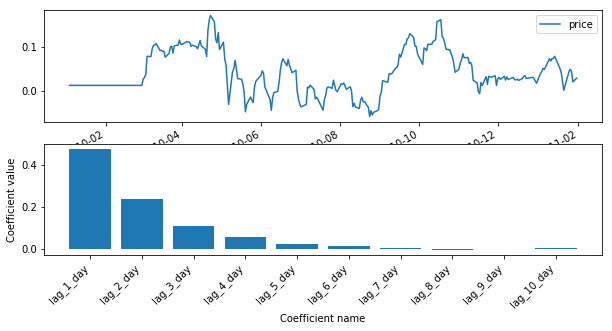

In [89]:
# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
y.loc[:'2011-01'].plot(ax=axs[0])

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_[0], prices_perc_shifted.columns, ax=axs[1])
plt.show()

In [91]:
prices_perc_shifted_str = 'date,lag_1_day,lag_2_day,lag_3_day,lag_4_day,lag_5_day,lag_6_day,lag_7_day,lag_8_day,lag_9_day,lag_10_day\n2010-01-04,,,,,,,,,,\n2010-01-05,,,,,,,,,,\n2010-01-06,,,,,,,,,,\n2010-01-07,,,,,,,,,,\n2010-01-08,,,,,,,,,,\n2010-01-11,,,,,,,,,,\n2010-01-12,,,,,,,,,,\n2010-01-13,,,,,,,,,,\n2010-01-14,,,,,,,,,,\n2010-01-15,,,,,,,,,,\n2010-01-19,,,,,,,,,,\n2010-01-20,,,,,,,,,,\n2010-01-21,,,,,,,,,,\n2010-01-22,,,,,,,,,,\n2010-01-25,,,,,,,,,,\n2010-01-26,,,,,,,,,,\n2010-01-27,,,,,,,,,,\n2010-01-28,,,,,,,,,,\n2010-01-29,,,,,,,,,,\n2010-02-01,,,,,,,,,,\n2010-02-02,,,,,,,,,,\n2010-02-03,,,,,,,,,,\n2010-02-04,,,,,,,,,,\n2010-02-05,,,,,,,,,,\n2010-02-08,,,,,,,,,,\n2010-02-09,,,,,,,,,,\n2010-02-10,,,,,,,,,,\n2010-02-11,,,,,,,,,,\n2010-02-12,,,,,,,,,,\n2010-02-16,,,,,,,,,,\n2010-02-17,,,,,,,,,,\n2010-02-18,,,,,,,,,,\n2010-02-19,,,,,,,,,,\n2010-02-22,,,,,,,,,,\n2010-02-23,,,,,,,,,,\n2010-02-24,,,,,,,,,,\n2010-02-25,,,,,,,,,,\n2010-02-26,,,,,,,,,,\n2010-03-01,,,,,,,,,,\n2010-03-02,,,,,,,,,,\n2010-03-03,0.02678155341181232,,,,,,,,,\n2010-03-04,0.02981125907596704,0.02678155341181232,,,,,,,,\n2010-03-05,0.037261030153712,0.02981125907596704,0.02678155341181232,,,,,,,\n2010-03-08,0.07785941698387594,0.037261030153712,0.02981125907596704,0.02678155341181232,,,,,,\n2010-03-09,0.07736107918932841,0.07785941698387594,0.037261030153712,0.02981125907596704,0.02678155341181232,,,,,\n2010-03-10,0.09575571977012978,0.07736107918932841,0.07785941698387594,0.037261030153712,0.02981125907596704,0.02678155341181232,,,,\n2010-03-11,0.10290402206274389,0.09575571977012978,0.07736107918932841,0.07785941698387594,0.037261030153712,0.02981125907596704,0.02678155341181232,,,\n2010-03-12,0.10376485406732996,0.10290402206274389,0.09575571977012978,0.07736107918932841,0.07785941698387594,0.037261030153712,0.02981125907596704,0.02678155341181232,,\n2010-03-15,0.1070857111537517,0.10376485406732996,0.10290402206274389,0.09575571977012978,0.07736107918932841,0.07785941698387594,0.037261030153712,0.02981125907596704,0.02678155341181232,\n2010-03-16,0.09125408409982312,0.1070857111537517,0.10376485406732996,0.10290402206274389,0.09575571977012978,0.07736107918932841,0.07785941698387594,0.037261030153712,0.02981125907596704,0.02678155341181232\n2010-03-17,0.09178362547827006,0.09125408409982312,0.1070857111537517,0.10376485406732996,0.10290402206274389,0.09575571977012978,0.07736107918932841,0.07785941698387594,0.037261030153712,0.02981125907596704\n2010-03-18,0.0889004499054336,0.09178362547827006,0.09125408409982312,0.1070857111537517,0.10376485406732996,0.10290402206274389,0.09575571977012978,0.07736107918932841,0.07785941698387594,0.037261030153712\n2010-03-19,0.08979335579346302,0.0889004499054336,0.09178362547827006,0.09125408409982312,0.1070857111537517,0.10376485406732996,0.10290402206274389,0.09575571977012978,0.07736107918932841,0.07785941698387594\n2010-03-22,0.07593184834379223,0.08979335579346302,0.0889004499054336,0.09178362547827006,0.09125408409982312,0.1070857111537517,0.10376485406732996,0.10290402206274389,0.09575571977012978,0.07736107918932841\n2010-03-23,0.08473569385129584,0.07593184834379223,0.08979335579346302,0.0889004499054336,0.09178362547827006,0.09125408409982312,0.1070857111537517,0.10376485406732996,0.10290402206274389,0.09575571977012978\n2010-03-24,0.0992098131741732,0.08473569385129584,0.07593184834379223,0.08979335579346302,0.0889004499054336,0.09178362547827006,0.09125408409982312,0.1070857111537517,0.10376485406732996,0.10290402206274389\n2010-03-25,0.10102480002970239,0.0992098131741732,0.08473569385129584,0.07593184834379223,0.08979335579346302,0.0889004499054336,0.09178362547827006,0.09125408409982312,0.1070857111537517,0.10376485406732996\n2010-03-26,0.08509805051926145,0.10102480002970239,0.0992098131741732,0.08473569385129584,0.07593184834379223,0.08979335579346302,0.0889004499054336,0.09178362547827006,0.09125408409982312,0.1070857111537517\n2010-03-29,0.10174477972419566,0.08509805051926145,0.10102480002970239,0.0992098131741732,0.08473569385129584,0.07593184834379223,0.08979335579346302,0.0889004499054336,0.09178362547827006,0.09125408409982312\n2010-03-30,0.103610024338502,0.10174477972419566,0.08509805051926145,0.10102480002970239,0.0992098131741732,0.08473569385129584,0.07593184834379223,0.08979335579346302,0.0889004499054336,0.09178362547827006\n2010-03-31,0.11492858525926355,0.103610024338502,0.10174477972419566,0.08509805051926145,0.10102480002970239,0.0992098131741732,0.08473569385129584,0.07593184834379223,0.08979335579346302,0.0889004499054336\n2010-04-01,0.10555157738416768,0.11492858525926355,0.103610024338502,0.10174477972419566,0.08509805051926145,0.10102480002970239,0.0992098131741732,0.08473569385129584,0.07593184834379223,0.08979335579346302\n2010-04-05,0.1053454383911993,0.10555157738416768,0.11492858525926355,0.103610024338502,0.10174477972419566,0.08509805051926145,0.10102480002970239,0.0992098131741732,0.08473569385129584,0.07593184834379223\n2010-04-06,0.11128753580274832,0.1053454383911993,0.10555157738416768,0.11492858525926355,0.103610024338502,0.10174477972419566,0.08509805051926145,0.10102480002970239,0.0992098131741732,0.08473569385129584\n2010-04-07,0.1104711189146396,0.11128753580274832,0.1053454383911993,0.10555157738416768,0.11492858525926355,0.103610024338502,0.10174477972419566,0.08509805051926145,0.10102480002970239,0.0992098131741732\n2010-04-08,0.10939549826088155,0.1104711189146396,0.11128753580274832,0.1053454383911993,0.10555157738416768,0.11492858525926355,0.103610024338502,0.10174477972419566,0.08509805051926145,0.10102480002970239\n2010-04-09,0.10061948742417512,0.10939549826088155,0.1104711189146396,0.11128753580274832,0.1053454383911993,0.10555157738416768,0.11492858525926355,0.103610024338502,0.10174477972419566,0.08509805051926145\n2010-04-12,0.10324237479781796,0.10061948742417512,0.10939549826088155,0.1104711189146396,0.11128753580274832,0.1053454383911993,0.10555157738416768,0.11492858525926355,0.103610024338502,0.10174477972419566\n2010-04-13,0.09997464794744515,0.10324237479781796,0.10061948742417512,0.10939549826088155,0.1104711189146396,0.11128753580274832,0.1053454383911993,0.10555157738416768,0.11492858525926355,0.103610024338502\n2010-04-14,0.09526681689269526,0.09997464794744515,0.10324237479781796,0.10061948742417512,0.10939549826088155,0.1104711189146396,0.11128753580274832,0.1053454383911993,0.10555157738416768,0.11492858525926355\n2010-04-15,0.10499895867862574,0.09526681689269526,0.09997464794744515,0.10324237479781796,0.10061948742417512,0.10939549826088155,0.1104711189146396,0.11128753580274832,0.1053454383911993,0.10555157738416768\n2010-04-16,0.11398399727767053,0.10499895867862574,0.09526681689269526,0.09997464794744515,0.10324237479781796,0.10061948742417512,0.10939549826088155,0.1104711189146396,0.11128753580274832,0.1053454383911993\n2010-04-19,0.10136921291190117,0.11398399727767053,0.10499895867862574,0.09526681689269526,0.09997464794744515,0.10324237479781796,0.10061948742417512,0.10939549826088155,0.1104711189146396,0.11128753580274832\n2010-04-20,0.09418849352274476,0.10136921291190117,0.11398399727767053,0.10499895867862574,0.09526681689269526,0.09997464794744515,0.10324237479781796,0.10061948742417512,0.10939549826088155,0.1104711189146396\n2010-04-21,0.07749751959324075,0.09418849352274476,0.10136921291190117,0.11398399727767053,0.10499895867862574,0.09526681689269526,0.09997464794744515,0.10324237479781796,0.10061948742417512,0.10939549826088155\n2010-04-22,0.13584917477956046,0.07749751959324075,0.09418849352274476,0.10136921291190117,0.11398399727767053,0.10499895867862574,0.09526681689269526,0.09997464794744515,0.10324237479781796,0.10061948742417512\n2010-04-23,0.15998511302806734,0.13584917477956046,0.07749751959324075,0.09418849352274476,0.10136921291190117,0.11398399727767053,0.10499895867862574,0.09526681689269526,0.09997464794744515,0.10324237479781796\n2010-04-26,0.17054150467366844,0.15998511302806734,0.13584917477956046,0.07749751959324075,0.09418849352274476,0.10136921291190117,0.11398399727767053,0.10499895867862574,0.09526681689269526,0.09997464794744515\n2010-04-27,0.15630878474377616,0.17054150467366844,0.15998511302806734,0.13584917477956046,0.07749751959324075,0.09418849352274476,0.10136921291190117,0.11398399727767053,0.10499895867862574,0.09526681689269526\n2010-04-28,0.11686611973867446,0.15630878474377616,0.17054150467366844,0.15998511302806734,0.13584917477956046,0.07749751959324075,0.09418849352274476,0.10136921291190117,0.11398399727767053,0.10499895867862574\n2010-04-29,0.10854686452154738,0.11686611973867446,0.15630878474377616,0.17054150467366844,0.15998511302806734,0.13584917477956046,0.07749751959324075,0.09418849352274476,0.10136921291190117,0.11398399727767053\n2010-04-30,0.1319504954732978,0.10854686452154738,0.11686611973867446,0.15630878474377616,0.17054150467366844,0.15998511302806734,0.13584917477956046,0.07749751959324075,0.09418849352274476,0.10136921291190117\n2010-05-03,0.09329478162127006,0.1319504954732978,0.10854686452154738,0.11686611973867446,0.15630878474377616,0.17054150467366844,0.15998511302806734,0.13584917477956046,0.07749751959324075,0.09418849352274476\n2010-05-04,0.11029696926698515,0.09329478162127006,0.1319504954732978,0.10854686452154738,0.11686611973867446,0.15630878474377616,0.17054150467366844,0.15998511302806734,0.13584917477956046,0.07749751959324075\n2010-05-05,0.07290321816613905,0.11029696926698515,0.09329478162127006,0.1319504954732978,0.10854686452154738,0.11686611973867446,0.15630878474377616,0.17054150467366844,0.15998511302806734,0.13584917477956046\n2010-05-06,0.05773481821213854,0.07290321816613905,0.11029696926698515,0.09329478162127006,0.1319504954732978,0.10854686452154738,0.11686611973867446,0.15630878474377616,0.17054150467366844,0.15998511302806734\n2010-05-07,0.014142775848945516,0.05773481821213854,0.07290321816613905,0.11029696926698515,0.09329478162127006,0.1319504954732978,0.10854686452154738,0.11686611973867446,0.15630878474377616,0.17054150467366844\n2010-05-10,-0.030770528397376967,0.014142775848945516,0.05773481821213854,0.07290321816613905,0.11029696926698515,0.09329478162127006,0.1319504954732978,0.10854686452154738,0.11686611973867446,0.15630878474377616\n2010-05-11,0.0427144682229351,-0.030770528397376967,0.014142775848945516,0.05773481821213854,0.07290321816613905,0.11029696926698515,0.09329478162127006,0.1319504954732978,0.10854686452154738,0.11686611973867446\n2010-05-12,0.049769240350339174,0.0427144682229351,-0.030770528397376967,0.014142775848945516,0.05773481821213854,0.07290321816613905,0.11029696926698515,0.09329478162127006,0.1319504954732978,0.10854686452154738\n2010-05-13,0.06896639714575559,0.049769240350339174,0.0427144682229351,-0.030770528397376967,0.014142775848945516,0.05773481821213854,0.07290321816613905,0.11029696926698515,0.09329478162127006,0.1319504954732978\n2010-05-14,0.049585360145860485,0.06896639714575559,0.049769240350339174,0.0427144682229351,-0.030770528397376967,0.014142775848945516,0.05773481821213854,0.07290321816613905,0.11029696926698515,0.09329478162127006\n2010-05-17,0.02753341677928136,0.049585360145860485,0.06896639714575559,0.049769240350339174,0.0427144682229351,-0.030770528397376967,0.014142775848945516,0.05773481821213854,0.07290321816613905,0.11029696926698515\n2010-05-18,0.02579121875030711,0.02753341677928136,0.049585360145860485,0.06896639714575559,0.049769240350339174,0.0427144682229351,-0.030770528397376967,0.014142775848945516,0.05773481821213854,0.07290321816613905\n2010-05-19,0.015190695897198772,0.02579121875030711,0.02753341677928136,0.049585360145860485,0.06896639714575559,0.049769240350339174,0.0427144682229351,-0.030770528397376967,0.014142775848945516,0.05773481821213854\n2010-05-20,-0.003447985693379484,0.015190695897198772,0.02579121875030711,0.02753341677928136,0.049585360145860485,0.06896639714575559,0.049769240350339174,0.0427144682229351,-0.030770528397376967,0.014142775848945516\n2010-05-21,-0.04776264422628165,-0.003447985693379484,0.015190695897198772,0.02579121875030711,0.02753341677928136,0.049585360145860485,0.06896639714575559,0.049769240350339174,0.0427144682229351,-0.030770528397376967\n2010-05-24,-0.030605694974186293,-0.04776264422628165,-0.003447985693379484,0.015190695897198772,0.02579121875030711,0.02753341677928136,0.049585360145860485,0.06896639714575559,0.049769240350339174,0.0427144682229351\n2010-05-25,-0.013998641311358959,-0.030605694974186293,-0.04776264422628165,-0.003447985693379484,0.015190695897198772,0.02579121875030711,0.02753341677928136,0.049585360145860485,0.06896639714575559,0.049769240350339174\n2010-05-26,-0.021592591834466962,-0.013998641311358959,-0.030605694974186293,-0.04776264422628165,-0.003447985693379484,0.015190695897198772,0.02579121875030711,0.02753341677928136,0.049585360145860485,0.06896639714575559\n2010-05-27,-0.026954213398592292,-0.021592591834466962,-0.013998641311358959,-0.030605694974186293,-0.04776264422628165,-0.003447985693379484,0.015190695897198772,0.02579121875030711,0.02753341677928136,0.049585360145860485\n2010-05-28,0.008937871278324556,-0.026954213398592292,-0.021592591834466962,-0.013998641311358959,-0.030605694974186293,-0.04776264422628165,-0.003447985693379484,0.015190695897198772,0.02579121875030711,0.02753341677928136\n2010-06-01,0.021183445797869592,0.008937871278324556,-0.026954213398592292,-0.021592591834466962,-0.013998641311358959,-0.030605694974186293,-0.04776264422628165,-0.003447985693379484,0.015190695897198772,0.02579121875030711\n2010-06-02,0.03494596752587314,0.021183445797869592,0.008937871278324556,-0.026954213398592292,-0.021592591834466962,-0.013998641311358959,-0.030605694974186293,-0.04776264422628165,-0.003447985693379484,0.015190695897198772\n2010-06-03,0.04506209297698134,0.03494596752587314,0.021183445797869592,0.008937871278324556,-0.026954213398592292,-0.021592591834466962,-0.013998641311358959,-0.030605694974186293,-0.04776264422628165,-0.003447985693379484\n2010-06-04,0.039312131174064555,0.04506209297698134,0.03494596752587314,0.021183445797869592,0.008937871278324556,-0.026954213398592292,-0.021592591834466962,-0.013998641311358959,-0.030605694974186293,-0.04776264422628165\n2010-06-07,0.008663540399180648,0.039312131174064555,0.04506209297698134,0.03494596752587314,0.021183445797869592,0.008937871278324556,-0.026954213398592292,-0.021592591834466962,-0.013998641311358959,-0.030605694974186293\n2010-06-08,-0.012532694825270219,0.008663540399180648,0.039312131174064555,0.04506209297698134,0.03494596752587314,0.021183445797869592,0.008937871278324556,-0.026954213398592292,-0.021592591834466962,-0.013998641311358959\n2010-06-09,-0.019723711461399302,-0.012532694825270219,0.008663540399180648,0.039312131174064555,0.04506209297698134,0.03494596752587314,0.021183445797869592,0.008937871278324556,-0.026954213398592292,-0.021592591834466962\n2010-06-10,-0.04448930377727412,-0.019723711461399302,-0.012532694825270219,0.008663540399180648,0.039312131174064555,0.04506209297698134,0.03494596752587314,0.021183445797869592,0.008937871278324556,-0.026954213398592292\n2010-06-11,-0.015522052062456658,-0.04448930377727412,-0.019723711461399302,-0.012532694825270219,0.008663540399180648,0.039312131174064555,0.04506209297698134,0.03494596752587314,0.021183445797869592,0.008937871278324556\n2010-06-14,-0.0038920059650981993,-0.015522052062456658,-0.04448930377727412,-0.019723711461399302,-0.012532694825270219,0.008663540399180648,0.039312131174064555,0.04506209297698134,0.03494596752587314,0.021183445797869592\n2010-06-15,-0.0014811284782196594,-0.0038920059650981993,-0.015522052062456658,-0.04448930377727412,-0.019723711461399302,-0.012532694825270219,0.008663540399180648,0.039312131174064555,0.04506209297698134,0.03494596752587314\n2010-06-16,0.019023357405253554,-0.0014811284782196594,-0.0038920059650981993,-0.015522052062456658,-0.04448930377727412,-0.019723711461399302,-0.012532694825270219,0.008663540399180648,0.039312131174064555,0.04506209297698134\n2010-06-17,0.04709789303188892,0.019023357405253554,-0.0014811284782196594,-0.0038920059650981993,-0.015522052062456658,-0.04448930377727412,-0.019723711461399302,-0.012532694825270219,0.008663540399180648,0.039312131174064555\n2010-06-18,0.06434064154934518,0.04709789303188892,0.019023357405253554,-0.0014811284782196594,-0.0038920059650981993,-0.015522052062456658,-0.04448930377727412,-0.019723711461399302,-0.012532694825270219,0.008663540399180648\n2010-06-21,0.07237219928431189,0.06434064154934518,0.04709789303188892,0.019023357405253554,-0.0014811284782196594,-0.0038920059650981993,-0.015522052062456658,-0.04448930377727412,-0.019723711461399302,-0.012532694825270219\n2010-06-22,0.056768855058029685,0.07237219928431189,0.06434064154934518,0.04709789303188892,0.019023357405253554,-0.0014811284782196594,-0.0038920059650981993,-0.015522052062456658,-0.04448930377727412,-0.019723711461399302\n2010-06-23,0.07109120075606316,0.056768855058029685,0.07237219928431189,0.06434064154934518,0.04709789303188892,0.019023357405253554,-0.0014811284782196594,-0.0038920059650981993,-0.015522052062456658,-0.04448930377727412\n2010-06-24,0.05857302517342768,0.07109120075606316,0.056768855058029685,0.07237219928431189,0.06434064154934518,0.04709789303188892,0.019023357405253554,-0.0014811284782196594,-0.0038920059650981993,-0.015522052062456658\n2010-06-25,0.04989157818465842,0.05857302517342768,0.07109120075606316,0.056768855058029685,0.07237219928431189,0.06434064154934518,0.04709789303188892,0.019023357405253554,-0.0014811284782196594,-0.0038920059650981993\n2010-06-28,0.04087731169374396,0.04989157818465842,0.05857302517342768,0.07109120075606316,0.056768855058029685,0.07237219928431189,0.06434064154934518,0.04709789303188892,0.019023357405253554,-0.0014811284782196594\n2010-06-29,0.046534308684282724,0.04087731169374396,0.04989157818465842,0.05857302517342768,0.07109120075606316,0.056768855058029685,0.07237219928431189,0.06434064154934518,0.04709789303188892,0.019023357405253554\n2010-06-30,-0.0009749491577818532,0.046534308684282724,0.04087731169374396,0.04989157818465842,0.05857302517342768,0.07109120075606316,0.056768855058029685,0.07237219928431189,0.06434064154934518,0.04709789303188892\n2010-07-01,-0.01882399280647028,-0.0009749491577818532,0.046534308684282724,0.04087731169374396,0.04989157818465842,0.05857302517342768,0.07109120075606316,0.056768855058029685,0.07237219928431189,0.06434064154934518\n2010-07-02,-0.030288955961307897,-0.01882399280647028,-0.0009749491577818532,0.046534308684282724,0.04087731169374396,0.04989157818465842,0.05857302517342768,0.07109120075606316,0.056768855058029685,0.07237219928431189\n2010-07-06,-0.036513951810788425,-0.030288955961307897,-0.01882399280647028,-0.0009749491577818532,0.046534308684282724,0.04087731169374396,0.04989157818465842,0.05857302517342768,0.07109120075606316,0.056768855058029685\n2010-07-07,-0.030994206242177552,-0.036513951810788425,-0.030288955961307897,-0.01882399280647028,-0.0009749491577818532,0.046534308684282724,0.04087731169374396,0.04989157818465842,0.05857302517342768,0.07109120075606316\n2010-07-08,0.008675849839079668,-0.030994206242177552,-0.036513951810788425,-0.030288955961307897,-0.01882399280647028,-0.0009749491577818532,0.046534308684282724,0.04087731169374396,0.04989157818465842,0.05857302517342768\n2010-07-09,0.006197802704718754,0.008675849839079668,-0.030994206242177552,-0.036513951810788425,-0.030288955961307897,-0.01882399280647028,-0.0009749491577818532,0.046534308684282724,0.04087731169374396,0.04989157818465842\n2010-07-12,0.012567571692702334,0.006197802704718754,0.008675849839079668,-0.030994206242177552,-0.036513951810788425,-0.030288955961307897,-0.01882399280647028,-0.0009749491577818532,0.046534308684282724,0.04087731169374396\n2010-07-13,0.0033537546910729766,0.012567571692702334,0.006197802704718754,0.008675849839079668,-0.030994206242177552,-0.036513951810788425,-0.030288955961307897,-0.01882399280647028,-0.0009749491577818532,0.046534308684282724\n2010-07-14,-0.018396211947784756,0.0033537546910729766,0.012567571692702334,0.006197802704718754,0.008675849839079668,-0.030994206242177552,-0.036513951810788425,-0.030288955961307897,-0.01882399280647028,-0.0009749491577818532\n2010-07-15,-0.014532335629720367,-0.018396211947784756,0.0033537546910729766,0.012567571692702334,0.006197802704718754,0.008675849839079668,-0.030994206242177552,-0.036513951810788425,-0.030288955961307897,-0.01882399280647028\n2010-07-16,-0.0195597042890621,-0.014532335629720367,-0.018396211947784756,0.0033537546910729766,0.012567571692702334,0.006197802704718754,0.008675849839079668,-0.030994206242177552,-0.036513951810788425,-0.030288955961307897\n2010-07-19,-0.025906242496136166,-0.0195597042890621,-0.014532335629720367,-0.018396211947784756,0.0033537546910729766,0.012567571692702334,0.006197802704718754,0.008675849839079668,-0.030994206242177552,-0.036513951810788425\n2010-07-20,-0.04390537173464176,-0.025906242496136166,-0.0195597042890621,-0.014532335629720367,-0.018396211947784756,0.0033537546910729766,0.012567571692702334,0.006197802704718754,0.008675849839079668,-0.030994206242177552\n2010-07-21,-0.019658259796580643,-0.04390537173464176,-0.025906242496136166,-0.0195597042890621,-0.014532335629720367,-0.018396211947784756,0.0033537546910729766,0.012567571692702334,0.006197802704718754,0.008675849839079668\n2010-07-22,-0.011018544525933935,-0.019658259796580643,-0.04390537173464176,-0.025906242496136166,-0.0195597042890621,-0.014532335629720367,-0.018396211947784756,0.0033537546910729766,0.012567571692702334,0.006197802704718754\n2010-07-23,0.006669759010524568,-0.011018544525933935,-0.019658259796580643,-0.04390537173464176,-0.025906242496136166,-0.0195597042890621,-0.014532335629720367,-0.018396211947784756,0.0033537546910729766,0.012567571692702334\n2010-07-26,0.00874646053337733,0.006669759010524568,-0.011018544525933935,-0.019658259796580643,-0.04390537173464176,-0.025906242496136166,-0.0195597042890621,-0.014532335629720367,-0.018396211947784756,0.0033537546910729766\n2010-07-27,0.00552588703759477,0.00874646053337733,0.006669759010524568,-0.011018544525933935,-0.019658259796580643,-0.04390537173464176,-0.025906242496136166,-0.0195597042890621,-0.014532335629720367,-0.018396211947784756\n2010-07-28,0.023896644260373884,0.00552588703759477,0.00874646053337733,0.006669759010524568,-0.011018544525933935,-0.019658259796580643,-0.04390537173464176,-0.025906242496136166,-0.0195597042890621,-0.014532335629720367\n2010-07-29,0.011472834539621684,0.023896644260373884,0.00552588703759477,0.00874646053337733,0.006669759010524568,-0.011018544525933935,-0.019658259796580643,-0.04390537173464176,-0.025906242496136166,-0.0195597042890621\n2010-07-30,0.0007237035265032042,0.011472834539621684,0.023896644260373884,0.00552588703759477,0.00874646053337733,0.006669759010524568,-0.011018544525933935,-0.019658259796580643,-0.04390537173464176,-0.025906242496136166\n2010-08-02,-0.002113585838164792,0.0007237035265032042,0.011472834539621684,0.023896644260373884,0.00552588703759477,0.00874646053337733,0.006669759010524568,-0.011018544525933935,-0.019658259796580643,-0.04390537173464176\n2010-08-03,0.015599743149764433,-0.002113585838164792,0.0007237035265032042,0.011472834539621684,0.023896644260373884,0.00552588703759477,0.00874646053337733,0.006669759010524568,-0.011018544525933935,-0.019658259796580643\n2010-08-04,0.014808966972701058,0.015599743149764433,-0.002113585838164792,0.0007237035265032042,0.011472834539621684,0.023896644260373884,0.00552588703759477,0.00874646053337733,0.006669759010524568,-0.011018544525933935\n2010-08-05,0.017603331598056972,0.014808966972701058,0.015599743149764433,-0.002113585838164792,0.0007237035265032042,0.011472834539621684,0.023896644260373884,0.00552588703759477,0.00874646053337733,0.006669759010524568\n2010-08-06,0.010666880127701967,0.017603331598056972,0.014808966972701058,0.015599743149764433,-0.002113585838164792,0.0007237035265032042,0.011472834539621684,0.023896644260373884,0.00552588703759477,0.00874646053337733\n2010-08-09,0.003337414807008227,0.010666880127701967,0.017603331598056972,0.014808966972701058,0.015599743149764433,-0.002113585838164792,0.0007237035265032042,0.011472834539621684,0.023896644260373884,0.00552588703759477\n2010-08-10,0.009084289798190837,0.003337414807008227,0.010666880127701967,0.017603331598056972,0.014808966972701058,0.015599743149764433,-0.002113585838164792,0.0007237035265032042,0.011472834539621684,0.023896644260373884\n2010-08-11,-0.000674660553965435,0.009084289798190837,0.003337414807008227,0.010666880127701967,0.017603331598056972,0.014808966972701058,0.015599743149764433,-0.002113585838164792,0.0007237035265032042,0.011472834539621684\n2010-08-12,-0.03616620467971891,-0.000674660553965435,0.009084289798190837,0.003337414807008227,0.010666880127701967,0.017603331598056972,0.014808966972701058,0.015599743149764433,-0.002113585838164792,0.0007237035265032042\n2010-08-13,-0.028364934109962228,-0.03616620467971891,-0.000674660553965435,0.009084289798190837,0.003337414807008227,0.010666880127701967,0.017603331598056972,0.014808966972701058,0.015599743149764433,-0.002113585838164792\n2010-08-16,-0.036831824888763014,-0.028364934109962228,-0.03616620467971891,-0.000674660553965435,0.009084289798190837,0.003337414807008227,0.010666880127701967,0.017603331598056972,0.014808966972701058,0.015599743149764433\n2010-08-17,-0.0401006333574062,-0.036831824888763014,-0.028364934109962228,-0.03616620467971891,-0.000674660553965435,0.009084289798190837,0.003337414807008227,0.010666880127701967,0.017603331598056972,0.014808966972701058\n2010-08-18,-0.021124773246857194,-0.0401006333574062,-0.036831824888763014,-0.028364934109962228,-0.03616620467971891,-0.000674660553965435,0.009084289798190837,0.003337414807008227,0.010666880127701967,0.017603331598056972\n2010-08-19,-0.014703931009422086,-0.021124773246857194,-0.0401006333574062,-0.036831824888763014,-0.028364934109962228,-0.03616620467971891,-0.000674660553965435,0.009084289798190837,0.003337414807008227,0.010666880127701967\n2010-08-20,-0.025382215791839906,-0.014703931009422086,-0.021124773246857194,-0.0401006333574062,-0.036831824888763014,-0.028364934109962228,-0.03616620467971891,-0.000674660553965435,0.009084289798190837,0.003337414807008227\n2010-08-23,-0.024452912945195793,-0.025382215791839906,-0.014703931009422086,-0.021124773246857194,-0.0401006333574062,-0.036831824888763014,-0.028364934109962228,-0.03616620467971891,-0.000674660553965435,0.009084289798190837\n2010-08-24,-0.037814174668721494,-0.024452912945195793,-0.025382215791839906,-0.014703931009422086,-0.021124773246857194,-0.0401006333574062,-0.036831824888763014,-0.028364934109962228,-0.03616620467971891,-0.000674660553965435\n2010-08-25,-0.05866640489636367,-0.037814174668721494,-0.024452912945195793,-0.025382215791839906,-0.014703931009422086,-0.021124773246857194,-0.0401006333574062,-0.036831824888763014,-0.028364934109962228,-0.03616620467971891\n2010-08-26,-0.04549387842558924,-0.05866640489636367,-0.037814174668721494,-0.024452912945195793,-0.025382215791839906,-0.014703931009422086,-0.021124773246857194,-0.0401006333574062,-0.036831824888763014,-0.028364934109962228\n2010-08-27,-0.054927816937918685,-0.04549387842558924,-0.05866640489636367,-0.037814174668721494,-0.024452912945195793,-0.025382215791839906,-0.014703931009422086,-0.021124773246857194,-0.0401006333574062,-0.036831824888763014\n2010-08-30,-0.04887072920832226,-0.054927816937918685,-0.04549387842558924,-0.05866640489636367,-0.037814174668721494,-0.024452912945195793,-0.025382215791839906,-0.014703931009422086,-0.021124773246857194,-0.0401006333574062\n2010-08-31,-0.044893798883264203,-0.04887072920832226,-0.054927816937918685,-0.04549387842558924,-0.05866640489636367,-0.037814174668721494,-0.024452912945195793,-0.025382215791839906,-0.014703931009422086,-0.021124773246857194\n2010-09-01,-0.04193749257569563,-0.044893798883264203,-0.04887072920832226,-0.054927816937918685,-0.04549387842558924,-0.05866640489636367,-0.037814174668721494,-0.024452912945195793,-0.025382215791839906,-0.014703931009422086\n2010-09-02,-0.011889263874453444,-0.04193749257569563,-0.044893798883264203,-0.04887072920832226,-0.054927816937918685,-0.04549387842558924,-0.05866640489636367,-0.037814174668721494,-0.024452912945195793,-0.025382215791839906\n2010-09-03,-0.003844021297461435,-0.011889263874453444,-0.04193749257569563,-0.044893798883264203,-0.04887072920832226,-0.054927816937918685,-0.04549387842558924,-0.05866640489636367,-0.037814174668721494,-0.024452912945195793\n2010-09-07,0.023000229048880754,-0.003844021297461435,-0.011889263874453444,-0.04193749257569563,-0.044893798883264203,-0.04887072920832226,-0.054927816937918685,-0.04549387842558924,-0.05866640489636367,-0.037814174668721494\n2010-09-08,0.01905218081027328,0.023000229048880754,-0.003844021297461435,-0.011889263874453444,-0.04193749257569563,-0.044893798883264203,-0.04887072920832226,-0.054927816937918685,-0.04549387842558924,-0.05866640489636367\n2010-09-09,0.038617945457118136,0.01905218081027328,0.023000229048880754,-0.003844021297461435,-0.011889263874453444,-0.04193749257569563,-0.044893798883264203,-0.04887072920832226,-0.054927816937918685,-0.04549387842558924\n2010-09-10,0.03813894059008281,0.038617945457118136,0.01905218081027328,0.023000229048880754,-0.003844021297461435,-0.011889263874453444,-0.04193749257569563,-0.044893798883264203,-0.04887072920832226,-0.054927816937918685\n2010-09-13,0.038259927805855,0.03813894059008281,0.038617945457118136,0.01905218081027328,0.023000229048880754,-0.003844021297461435,-0.011889263874453444,-0.04193749257569563,-0.044893798883264203,-0.04887072920832226\n2010-09-14,0.05113270611181796,0.038259927805855,0.03813894059008281,0.038617945457118136,0.01905218081027328,0.023000229048880754,-0.003844021297461435,-0.011889263874453444,-0.04193749257569563,-0.044893798883264203\n2010-09-15,0.0528672108965655,0.05113270611181796,0.038259927805855,0.03813894059008281,0.038617945457118136,0.01905218081027328,0.023000229048880754,-0.003844021297461435,-0.011889263874453444,-0.04193749257569563\n2010-09-16,0.059625496111620206,0.0528672108965655,0.05113270611181796,0.038259927805855,0.03813894059008281,0.038617945457118136,0.01905218081027328,0.023000229048880754,-0.003844021297461435,-0.011889263874453444\n2010-09-17,0.0827862606333683,0.059625496111620206,0.0528672108965655,0.05113270611181796,0.038259927805855,0.03813894059008281,0.038617945457118136,0.01905218081027328,0.023000229048880754,-0.003844021297461435\n2010-09-20,0.07619218655751757,0.0827862606333683,0.059625496111620206,0.0528672108965655,0.05113270611181796,0.038259927805855,0.03813894059008281,0.038617945457118136,0.01905218081027328,0.023000229048880754\n2010-09-21,0.10520156891102946,0.07619218655751757,0.0827862606333683,0.059625496111620206,0.0528672108965655,0.05113270611181796,0.038259927805855,0.03813894059008281,0.038617945457118136,0.01905218081027328\n2010-09-22,0.10466155439163524,0.10520156891102946,0.07619218655751757,0.0827862606333683,0.059625496111620206,0.0528672108965655,0.05113270611181796,0.038259927805855,0.03813894059008281,0.038617945457118136\n2010-09-23,0.1179577687842268,0.10466155439163524,0.10520156891102946,0.07619218655751757,0.0827862606333683,0.059625496111620206,0.0528672108965655,0.05113270611181796,0.038259927805855,0.03813894059008281\n2010-09-24,0.11951558816875787,0.1179577687842268,0.10466155439163524,0.10520156891102946,0.07619218655751757,0.0827862606333683,0.059625496111620206,0.0528672108965655,0.05113270611181796,0.038259927805855\n2010-09-27,0.12923328277607724,0.11951558816875787,0.1179577687842268,0.10466155439163524,0.10520156891102946,0.07619218655751757,0.0827862606333683,0.059625496111620206,0.0528672108965655,0.05113270611181796\n2010-09-28,0.12085863688947844,0.12923328277607724,0.11951558816875787,0.1179577687842268,0.10466155439163524,0.10520156891102946,0.07619218655751757,0.0827862606333683,0.059625496111620206,0.0528672108965655\n2010-09-29,0.10111955781087549,0.12085863688947844,0.12923328277607724,0.11951558816875787,0.1179577687842268,0.10466155439163524,0.10520156891102946,0.07619218655751757,0.0827862606333683,0.059625496111620206\n2010-09-30,0.10037719886328768,0.10111955781087549,0.12085863688947844,0.12923328277607724,0.11951558816875787,0.1179577687842268,0.10466155439163524,0.10520156891102946,0.07619218655751757,0.0827862606333683\n2010-10-01,0.0839200958528744,0.10037719886328768,0.10111955781087549,0.12085863688947844,0.12923328277607724,0.11951558816875787,0.1179577687842268,0.10466155439163524,0.10520156891102946,0.07619218655751757\n2010-10-04,0.07689572870434516,0.0839200958528744,0.10037719886328768,0.10111955781087549,0.12085863688947844,0.12923328277607724,0.11951558816875787,0.1179577687842268,0.10466155439163524,0.10520156891102946\n2010-10-05,0.0597828039099253,0.07689572870434516,0.0839200958528744,0.10037719886328768,0.10111955781087549,0.12085863688947844,0.12923328277607724,0.11951558816875787,0.1179577687842268,0.10466155439163524\n2010-10-06,0.09715073825484853,0.0597828039099253,0.07689572870434516,0.0839200958528744,0.10037719886328768,0.10111955781087549,0.12085863688947844,0.12923328277607724,0.11951558816875787,0.1179577687842268\n2010-10-07,0.09495197113239955,0.09715073825484853,0.0597828039099253,0.07689572870434516,0.0839200958528744,0.10037719886328768,0.10111955781087549,0.12085863688947844,0.12923328277607724,0.11951558816875787\n2010-10-08,0.09093493275973785,0.09495197113239955,0.09715073825484853,0.0597828039099253,0.07689572870434516,0.0839200958528744,0.10037719886328768,0.10111955781087549,0.12085863688947844,0.12923328277607724\n2010-10-11,0.10522796800743714,0.09093493275973785,0.09495197113239955,0.09715073825484853,0.0597828039099253,0.07689572870434516,0.0839200958528744,0.10037719886328768,0.10111955781087549,0.12085863688947844\n2010-10-12,0.10528635743417294,0.10522796800743714,0.09093493275973785,0.09495197113239955,0.09715073825484853,0.0597828039099253,0.07689572870434516,0.0839200958528744,0.10037719886328768,0.10111955781087549\n2010-10-13,0.11209427889344672,0.10528635743417294,0.10522796800743714,0.09093493275973785,0.09495197113239955,0.09715073825484853,0.0597828039099253,0.07689572870434516,0.0839200958528744,0.10037719886328768\n2010-10-14,0.11310322875546501,0.11209427889344672,0.10528635743417294,0.10522796800743714,0.09093493275973785,0.09495197113239955,0.09715073825484853,0.0597828039099253,0.07689572870434516,0.0839200958528744\n2010-10-15,0.11615493527334395,0.11310322875546501,0.11209427889344672,0.10528635743417294,0.10522796800743714,0.09093493275973785,0.09495197113239955,0.09715073825484853,0.0597828039099253,0.07689572870434516\n2010-10-18,0.1563082736424979,0.11615493527334395,0.11310322875546501,0.11209427889344672,0.10528635743417294,0.10522796800743714,0.09093493275973785,0.09495197113239955,0.09715073825484853,0.0597828039099253\n2010-10-19,0.16116416668424904,0.1563082736424979,0.11615493527334395,0.11310322875546501,0.11209427889344672,0.10528635743417294,0.10522796800743714,0.09093493275973785,0.09495197113239955,0.09715073825484853\n2010-10-20,0.1225022797337361,0.16116416668424904,0.1563082736424979,0.11615493527334395,0.11310322875546501,0.11209427889344672,0.10528635743417294,0.10522796800743714,0.09093493275973785,0.09495197113239955\n2010-10-21,0.1190352765413301,0.1225022797337361,0.16116416668424904,0.1563082736424979,0.11615493527334395,0.11310322875546501,0.11209427889344672,0.10528635743417294,0.10522796800743714,0.09093493275973785\n2010-10-22,0.10846776056604311,0.1190352765413301,0.1225022797337361,0.16116416668424904,0.1563082736424979,0.11615493527334395,0.11310322875546501,0.11209427889344672,0.10528635743417294,0.10522796800743714\n2010-10-25,0.0941693480770739,0.10846776056604311,0.1190352765413301,0.1225022797337361,0.16116416668424904,0.1563082736424979,0.11615493527334395,0.11310322875546501,0.11209427889344672,0.10528635743417294\n2010-10-26,0.09248035867228246,0.0941693480770739,0.10846776056604311,0.1190352765413301,0.1225022797337361,0.16116416668424904,0.1563082736424979,0.11615493527334395,0.11310322875546501,0.11209427889344672\n2010-10-27,0.0831682338277196,0.09248035867228246,0.0941693480770739,0.10846776056604311,0.1190352765413301,0.1225022797337361,0.16116416668424904,0.1563082736424979,0.11615493527334395,0.11310322875546501\n2010-10-28,0.0760933125465496,0.0831682338277196,0.09248035867228246,0.0941693480770739,0.10846776056604311,0.1190352765413301,0.1225022797337361,0.16116416668424904,0.1563082736424979,0.11615493527334395\n2010-10-29,0.061567988210291025,0.0760933125465496,0.0831682338277196,0.09248035867228246,0.0941693480770739,0.10846776056604311,0.1190352765413301,0.1225022797337361,0.16116416668424904,0.1563082736424979\n2010-11-01,0.04182210849199854,0.061567988210291025,0.0760933125465496,0.0831682338277196,0.09248035867228246,0.0941693480770739,0.10846776056604311,0.1190352765413301,0.1225022797337361,0.16116416668424904\n2010-11-02,0.04896888121181908,0.04182210849199854,0.061567988210291025,0.0760933125465496,0.0831682338277196,0.09248035867228246,0.0941693480770739,0.10846776056604311,0.1190352765413301,0.1225022797337361\n2010-11-03,0.06247586454087104,0.04896888121181908,0.04182210849199854,0.061567988210291025,0.0760933125465496,0.0831682338277196,0.09248035867228246,0.0941693480770739,0.10846776056604311,0.1190352765413301\n2010-11-04,0.06991476702549701,0.06247586454087104,0.04896888121181908,0.04182210849199854,0.061567988210291025,0.0760933125465496,0.0831682338277196,0.09248035867228246,0.0941693480770739,0.10846776056604311\n2010-11-05,0.08389718827756647,0.06991476702549701,0.06247586454087104,0.04896888121181908,0.04182210849199854,0.061567988210291025,0.0760933125465496,0.0831682338277196,0.09248035867228246,0.0941693480770739\n2010-11-08,0.07486564268926842,0.08389718827756647,0.06991476702549701,0.06247586454087104,0.04896888121181908,0.04182210849199854,0.061567988210291025,0.0760933125465496,0.0831682338277196,0.09248035867228246\n2010-11-09,0.07523510191309557,0.07486564268926842,0.08389718827756647,0.06991476702549701,0.06247586454087104,0.04896888121181908,0.04182210849199854,0.061567988210291025,0.0760933125465496,0.0831682338277196\n2010-11-10,0.062017170995422866,0.07523510191309557,0.07486564268926842,0.08389718827756647,0.06991476702549701,0.06247586454087104,0.04896888121181908,0.04182210849199854,0.061567988210291025,0.0760933125465496\n2010-11-11,0.06436384346045988,0.062017170995422866,0.07523510191309557,0.07486564268926842,0.08389718827756647,0.06991476702549701,0.06247586454087104,0.04896888121181908,0.04182210849199854,0.061567988210291025\n2010-11-12,0.05598828375983027,0.06436384346045988,0.062017170995422866,0.07523510191309557,0.07486564268926842,0.08389718827756647,0.06991476702549701,0.06247586454087104,0.04896888121181908,0.04182210849199854\n2010-11-15,0.02362837863817602,0.05598828375983027,0.06436384346045988,0.062017170995422866,0.07523510191309557,0.07486564268926842,0.08389718827756647,0.06991476702549701,0.06247586454087104,0.04896888121181908\n2010-11-16,0.018186914683400234,0.02362837863817602,0.05598828375983027,0.06436384346045988,0.062017170995422866,0.07523510191309557,0.07486564268926842,0.08389718827756647,0.06991476702549701,0.06247586454087104\n2010-11-17,-0.001860999561528311,0.018186914683400234,0.02362837863817602,0.05598828375983027,0.06436384346045988,0.062017170995422866,0.07523510191309557,0.07486564268926842,0.08389718827756647,0.06991476702549701\n2010-11-18,-0.00663517480777007,-0.001860999561528311,0.018186914683400234,0.02362837863817602,0.05598828375983027,0.06436384346045988,0.062017170995422866,0.07523510191309557,0.07486564268926842,0.08389718827756647\n2010-11-19,0.018579325623010307,-0.00663517480777007,-0.001860999561528311,0.018186914683400234,0.02362837863817602,0.05598828375983027,0.06436384346045988,0.062017170995422866,0.07523510191309557,0.07486564268926842\n2010-11-22,0.011585207273304775,0.018579325623010307,-0.00663517480777007,-0.001860999561528311,0.018186914683400234,0.02362837863817602,0.05598828375983027,0.06436384346045988,0.062017170995422866,0.07523510191309557\n2010-11-23,0.032091745419510515,0.011585207273304775,0.018579325623010307,-0.00663517480777007,-0.001860999561528311,0.018186914683400234,0.02362837863817602,0.05598828375983027,0.06436384346045988,0.062017170995422866\n2010-11-24,0.014571696754967068,0.032091745419510515,0.011585207273304775,0.018579325623010307,-0.00663517480777007,-0.001860999561528311,0.018186914683400234,0.02362837863817602,0.05598828375983027,0.06436384346045988\n2010-11-26,0.032660706644090196,0.014571696754967068,0.032091745419510515,0.011585207273304775,0.018579325623010307,-0.00663517480777007,-0.001860999561528311,0.018186914683400234,0.02362837863817602,0.05598828375983027\n2010-11-29,0.03062513408115225,0.032660706644090196,0.014571696754967068,0.032091745419510515,0.011585207273304775,0.018579325623010307,-0.00663517480777007,-0.001860999561528311,0.018186914683400234,0.02362837863817602\n2010-11-30,0.03392617135937246,0.03062513408115225,0.032660706644090196,0.014571696754967068,0.032091745419510515,0.011585207273304775,0.018579325623010307,-0.00663517480777007,-0.001860999561528311,0.018186914683400234\n2010-12-01,0.012025214437367303,0.03392617135937246,0.03062513408115225,0.032660706644090196,0.014571696754967068,0.032091745419510515,0.011585207273304775,0.018579325623010307,-0.00663517480777007,-0.001860999561528311\n2010-12-02,0.027198350128280743,0.012025214437367303,0.03392617135937246,0.03062513408115225,0.032660706644090196,0.014571696754967068,0.032091745419510515,0.011585207273304775,0.018579325623010307,-0.00663517480777007\n2010-12-03,0.030545498835465524,0.027198350128280743,0.012025214437367303,0.03392617135937246,0.03062513408115225,0.032660706644090196,0.014571696754967068,0.032091745419510515,0.011585207273304775,0.018579325623010307\n2010-12-06,0.025780915266466913,0.030545498835465524,0.027198350128280743,0.012025214437367303,0.03392617135937246,0.03062513408115225,0.032660706644090196,0.014571696754967068,0.032091745419510515,0.011585207273304775\n2010-12-07,0.03253866931147558,0.025780915266466913,0.030545498835465524,0.027198350128280743,0.012025214437367303,0.03392617135937246,0.03062513408115225,0.032660706644090196,0.014571696754967068,0.032091745419510515\n2010-12-08,0.02418223982124064,0.03253866931147558,0.025780915266466913,0.030545498835465524,0.027198350128280743,0.012025214437367303,0.03392617135937246,0.03062513408115225,0.032660706644090196,0.014571696754967068\n2010-12-09,0.031519709978135454,0.02418223982124064,0.03253866931147558,0.025780915266466913,0.030545498835465524,0.027198350128280743,0.012025214437367303,0.03392617135937246,0.03062513408115225,0.032660706644090196\n2010-12-10,0.0257392323148674,0.031519709978135454,0.02418223982124064,0.03253866931147558,0.025780915266466913,0.030545498835465524,0.027198350128280743,0.012025214437367303,0.03392617135937246,0.03062513408115225\n2010-12-13,0.02683166363577826,0.0257392323148674,0.031519709978135454,0.02418223982124064,0.03253866931147558,0.025780915266466913,0.030545498835465524,0.027198350128280743,0.012025214437367303,0.03392617135937246\n2010-12-14,0.02989498923130524,0.02683166363577826,0.0257392323148674,0.031519709978135454,0.02418223982124064,0.03253866931147558,0.025780915266466913,0.030545498835465524,0.027198350128280743,0.012025214437367303\n2010-12-15,0.025167735909718214,0.02989498923130524,0.02683166363577826,0.0257392323148674,0.031519709978135454,0.02418223982124064,0.03253866931147558,0.025780915266466913,0.030545498835465524,0.027198350128280743\n2010-12-16,0.024483686798879124,0.025167735909718214,0.02989498923130524,0.02683166363577826,0.0257392323148674,0.031519709978135454,0.02418223982124064,0.03253866931147558,0.025780915266466913,0.030545498835465524\n2010-12-17,0.026502452482738945,0.024483686798879124,0.025167735909718214,0.02989498923130524,0.02683166363577826,0.0257392323148674,0.031519709978135454,0.02418223982124064,0.03253866931147558,0.025780915266466913\n2010-12-20,0.023473856000195418,0.026502452482738945,0.024483686798879124,0.025167735909718214,0.02989498923130524,0.02683166363577826,0.0257392323148674,0.031519709978135454,0.02418223982124064,0.03253866931147558\n2010-12-21,0.027476332128769418,0.023473856000195418,0.026502452482738945,0.024483686798879124,0.025167735909718214,0.02989498923130524,0.02683166363577826,0.0257392323148674,0.031519709978135454,0.02418223982124064\n2010-12-22,0.032693204202965495,0.027476332128769418,0.023473856000195418,0.026502452482738945,0.024483686798879124,0.025167735909718214,0.02989498923130524,0.02683166363577826,0.0257392323148674,0.031519709978135454\n2010-12-23,0.03438670822629875,0.032693204202965495,0.027476332128769418,0.023473856000195418,0.026502452482738945,0.024483686798879124,0.025167735909718214,0.02989498923130524,0.02683166363577826,0.0257392323148674\n2010-12-27,0.02797103646422615,0.03438670822629875,0.032693204202965495,0.027476332128769418,0.023473856000195418,0.026502452482738945,0.024483686798879124,0.025167735909718214,0.02989498923130524,0.02683166363577826\n2010-12-28,0.029861697105204355,0.02797103646422615,0.03438670822629875,0.032693204202965495,0.027476332128769418,0.023473856000195418,0.026502452482738945,0.024483686798879124,0.025167735909718214,0.02989498923130524\n2010-12-29,0.03038141732230185,0.029861697105204355,0.02797103646422615,0.03438670822629875,0.032693204202965495,0.027476332128769418,0.023473856000195418,0.026502452482738945,0.024483686798879124,0.025167735909718214\n2010-12-30,0.028034887691772318,0.03038141732230185,0.029861697105204355,0.02797103646422615,0.03438670822629875,0.032693204202965495,0.027476332128769418,0.023473856000195418,0.026502452482738945,0.024483686798879124\n2010-12-31,0.021564775108254233,0.028034887691772318,0.03038141732230185,0.029861697105204355,0.02797103646422615,0.03438670822629875,0.032693204202965495,0.027476332128769418,0.023473856000195418,0.026502452482738945\n2011-01-03,0.01719884058591094,0.021564775108254233,0.028034887691772318,0.03038141732230185,0.029861697105204355,0.02797103646422615,0.03438670822629875,0.032693204202965495,0.027476332128769418,0.023473856000195418\n2011-01-04,0.038944564724072095,0.01719884058591094,0.021564775108254233,0.028034887691772318,0.03038141732230185,0.029861697105204355,0.02797103646422615,0.03438670822629875,0.032693204202965495,0.027476332128769418\n2011-01-05,0.04331767319670795,0.038944564724072095,0.01719884058591094,0.021564775108254233,0.028034887691772318,0.03038141732230185,0.029861697105204355,0.02797103646422615,0.03438670822629875,0.032693204202965495\n2011-01-06,0.05077709327500765,0.04331767319670795,0.038944564724072095,0.01719884058591094,0.021564775108254233,0.028034887691772318,0.03038141732230185,0.029861697105204355,0.02797103646422615,0.03438670822629875\n2011-01-07,0.048412051549771094,0.05077709327500765,0.04331767319670795,0.038944564724072095,0.01719884058591094,0.021564775108254233,0.028034887691772318,0.03038141732230185,0.029861697105204355,0.02797103646422615\n2011-01-10,0.054586592447747904,0.048412051549771094,0.05077709327500765,0.04331767319670795,0.038944564724072095,0.01719884058591094,0.021564775108254233,0.028034887691772318,0.03038141732230185,0.029861697105204355\n2011-01-11,0.07276682069618096,0.054586592447747904,0.048412051549771094,0.05077709327500765,0.04331767319670795,0.038944564724072095,0.01719884058591094,0.021564775108254233,0.028034887691772318,0.03038141732230185\n2011-01-12,0.06727863027081736,0.07276682069618096,0.054586592447747904,0.048412051549771094,0.05077709327500765,0.04331767319670795,0.038944564724072095,0.01719884058591094,0.021564775108254233,0.028034887691772318\n2011-01-13,0.07298951433017886,0.06727863027081736,0.07276682069618096,0.054586592447747904,0.048412051549771094,0.05077709327500765,0.04331767319670795,0.038944564724072095,0.01719884058591094,0.021564775108254233\n2011-01-14,0.07324298212616055,0.07298951433017886,0.06727863027081736,0.07276682069618096,0.054586592447747904,0.048412051549771094,0.05077709327500765,0.04331767319670795,0.038944564724072095,0.01719884058591094\n2011-01-18,0.07805870947418063,0.07324298212616055,0.07298951433017886,0.06727863027081736,0.07276682069618096,0.054586592447747904,0.048412051549771094,0.05077709327500765,0.04331767319670795,0.038944564724072095\n2011-01-19,0.050498543539473986,0.07805870947418063,0.07324298212616055,0.07298951433017886,0.06727863027081736,0.07276682069618096,0.054586592447747904,0.048412051549771094,0.05077709327500765,0.04331767319670795\n2011-01-20,0.04212175539003021,0.050498543539473986,0.07805870947418063,0.07324298212616055,0.07298951433017886,0.06727863027081736,0.07276682069618096,0.054586592447747904,0.048412051549771094,0.05077709327500765\n2011-01-21,0.021124487434424896,0.04212175539003021,0.050498543539473986,0.07805870947418063,0.07324298212616055,0.07298951433017886,0.06727863027081736,0.07276682069618096,0.054586592447747904,0.048412051549771094\n2011-01-24,0.0009442174594025725,0.021124487434424896,0.04212175539003021,0.050498543539473986,0.07805870947418063,0.07324298212616055,0.07298951433017886,0.06727863027081736,0.07276682069618096,0.054586592447747904\n2011-01-25,0.032849653171252276,0.0009442174594025725,0.021124487434424896,0.04212175539003021,0.050498543539473986,0.07805870947418063,0.07324298212616055,0.07298951433017886,0.06727863027081736,0.07276682069618096\n2011-01-26,0.04310176897766193,0.032849653171252276,0.0009442174594025725,0.021124487434424896,0.04212175539003021,0.050498543539473986,0.07805870947418063,0.07324298212616055,0.07298951433017886,0.06727863027081736\n2011-01-27,0.04857237415037737,0.04310176897766193,0.032849653171252276,0.0009442174594025725,0.021124487434424896,0.04212175539003021,0.050498543539473986,0.07805870947418063,0.07324298212616055,0.07298951433017886\n2011-01-28,0.0439513732574362,0.04857237415037737,0.04310176897766193,0.032849653171252276,0.0009442174594025725,0.021124487434424896,0.04212175539003021,0.050498543539473986,0.07805870947418063,0.07324298212616055\n2011-01-31,0.020191509934425606,0.0439513732574362,0.04857237415037737,0.04310176897766193,0.032849653171252276,0.0009442174594025725,0.021124487434424896,0.04212175539003021,0.050498543539473986,0.07805870947418063\n2011-02-01,0.028528508953864176,0.020191509934425606,0.0439513732574362,0.04857237415037737,0.04310176897766193,0.032849653171252276,0.0009442174594025725,0.021124487434424896,0.04212175539003021,0.050498543539473986\n2011-02-02,0.04406090589484019,0.028528508953864176,0.020191509934425606,0.0439513732574362,0.04857237415037737,0.04310176897766193,0.032849653171252276,0.0009442174594025725,0.021124487434424896,0.04212175539003021\n2011-02-03,0.03990497208017466,0.04406090589484019,0.028528508953864176,0.020191509934425606,0.0439513732574362,0.04857237415037737,0.04310176897766193,0.032849653171252276,0.0009442174594025725,0.021124487434424896\n2011-02-04,0.0351541950744818,0.03990497208017466,0.04406090589484019,0.028528508953864176,0.020191509934425606,0.0439513732574362,0.04857237415037737,0.04310176897766193,0.032849653171252276,0.0009442174594025725\n2011-02-07,0.04256996097040073,0.0351541950744818,0.03990497208017466,0.04406090589484019,0.028528508953864176,0.020191509934425606,0.0439513732574362,0.04857237415037737,0.04310176897766193,0.032849653171252276\n2011-02-08,0.05657787955414049,0.04256996097040073,0.0351541950744818,0.03990497208017466,0.04406090589484019,0.028528508953864176,0.020191509934425606,0.0439513732574362,0.04857237415037737,0.04310176897766193\n2011-02-09,0.06398114155058181,0.05657787955414049,0.04256996097040073,0.0351541950744818,0.03990497208017466,0.04406090589484019,0.028528508953864176,0.020191509934425606,0.0439513732574362,0.04857237415037737\n2011-02-10,0.07009179374828858,0.06398114155058181,0.05657787955414049,0.04256996097040073,0.0351541950744818,0.03990497208017466,0.04406090589484019,0.028528508953864176,0.020191509934425606,0.0439513732574362\n2011-02-11,0.056211876809182944,0.07009179374828858,0.06398114155058181,0.05657787955414049,0.04256996097040073,0.0351541950744818,0.03990497208017466,0.04406090589484019,0.028528508953864176,0.020191509934425606\n2011-02-14,0.06032522503238448,0.056211876809182944,0.07009179374828858,0.06398114155058181,0.05657787955414049,0.04256996097040073,0.0351541950744818,0.03990497208017466,0.04406090589484019,0.028528508953864176\n2011-02-15,0.06436154614638773,0.06032522503238448,0.056211876809182944,0.07009179374828858,0.06398114155058181,0.05657787955414049,0.04256996097040073,0.0351541950744818,0.03990497208017466,0.04406090589484019\n2011-02-16,0.0633788028992341,0.06436154614638773,0.06032522503238448,0.056211876809182944,0.07009179374828858,0.06398114155058181,0.05657787955414049,0.04256996097040073,0.0351541950744818,0.03990497208017466\n2011-02-17,0.06986735931751459,0.0633788028992341,0.06436154614638773,0.06032522503238448,0.056211876809182944,0.07009179374828858,0.06398114155058181,0.05657787955414049,0.04256996097040073,0.0351541950744818\n2011-02-18,0.052541587905602614,0.06986735931751459,0.0633788028992341,0.06436154614638773,0.06032522503238448,0.056211876809182944,0.07009179374828858,0.06398114155058181,0.05657787955414049,0.04256996097040073\n2011-02-22,0.027240400031192616,0.052541587905602614,0.06986735931751459,0.0633788028992341,0.06436154614638773,0.06032522503238448,0.056211876809182944,0.07009179374828858,0.06398114155058181,0.05657787955414049\n2011-02-23,-0.009782389712007893,0.027240400031192616,0.052541587905602614,0.06986735931751459,0.0633788028992341,0.06436154614638773,0.06032522503238448,0.056211876809182944,0.07009179374828858,0.06398114155058181\n2011-02-24,0.0008988298961456184,-0.009782389712007893,0.027240400031192616,0.052541587905602614,0.06986735931751459,0.0633788028992341,0.06436154614638773,0.06032522503238448,0.056211876809182944,0.07009179374828858\n2011-02-25,0.0003732829942775681,0.0008988298961456184,-0.009782389712007893,0.027240400031192616,0.052541587905602614,0.06986735931751459,0.0633788028992341,0.06436154614638773,0.06032522503238448,0.056211876809182944\n2011-02-28,0.014443146012916406,0.0003732829942775681,0.0008988298961456184,-0.009782389712007893,0.027240400031192616,0.052541587905602614,0.06986735931751459,0.0633788028992341,0.06436154614638773,0.06032522503238448\n2011-03-01,0.027277107957055156,0.014443146012916406,0.0003732829942775681,0.0008988298961456184,-0.009782389712007893,0.027240400031192616,0.052541587905602614,0.06986735931751459,0.0633788028992341,0.06436154614638773\n2011-03-02,0.013617477667453495,0.027277107957055156,0.014443146012916406,0.0003732829942775681,0.0008988298961456184,-0.009782389712007893,0.027240400031192616,0.052541587905602614,0.06986735931751459,0.0633788028992341\n2011-03-03,0.02027292641292759,0.013617477667453495,0.027277107957055156,0.014443146012916406,0.0003732829942775681,0.0008988298961456184,-0.009782389712007893,0.027240400031192616,0.052541587905602614,0.06986735931751459\n2011-03-04,0.04022065302754061,0.02027292641292759,0.013617477667453495,0.027277107957055156,0.014443146012916406,0.0003732829942775681,0.0008988298961456184,-0.009782389712007893,0.027240400031192616,0.052541587905602614\n2011-03-07,0.03952255432186447,0.04022065302754061,0.02027292641292759,0.013617477667453495,0.027277107957055156,0.014443146012916406,0.0003732829942775681,0.0008988298961456184,-0.009782389712007893,0.027240400031192616\n2011-03-08,0.024132292394942547,0.03952255432186447,0.04022065302754061,0.02027292641292759,0.013617477667453495,0.027277107957055156,0.014443146012916406,0.0003732829942775681,0.0008988298961456184,-0.009782389712007893\n2011-03-09,0.02382945681494276,0.024132292394942547,0.03952255432186447,0.04022065302754061,0.02027292641292759,0.013617477667453495,0.027277107957055156,0.014443146012916406,0.0003732829942775681,0.0008988298961456184\n2011-03-10,0.013365964782877037,0.02382945681494276,0.024132292394942547,0.03952255432186447,0.04022065302754061,0.02027292641292759,0.013617477667453495,0.027277107957055156,0.014443146012916406,0.0003732829942775681\n2011-03-11,-0.004104374672782292,0.013365964782877037,0.02382945681494276,0.024132292394942547,0.03952255432186447,0.04022065302754061,0.02027292641292759,0.013617477667453495,0.027277107957055156,0.014443146012916406\n2011-03-14,0.011011127175444307,-0.004104374672782292,0.013365964782877037,0.02382945681494276,0.024132292394942547,0.03952255432186447,0.04022065302754061,0.02027292641292759,0.013617477667453495,0.027277107957055156\n2011-03-15,0.015048870941741807,0.011011127175444307,-0.004104374672782292,0.013365964782877037,0.02382945681494276,0.024132292394942547,0.03952255432186447,0.04022065302754061,0.02027292641292759,0.013617477667453495\n2011-03-16,-0.008662609404036334,0.015048870941741807,0.011011127175444307,-0.004104374672782292,0.013365964782877037,0.02382945681494276,0.024132292394942547,0.03952255432186447,0.04022065302754061,0.02027292641292759\n2011-03-17,-0.0532488762897338,-0.008662609404036334,0.015048870941741807,0.011011127175444307,-0.004104374672782292,0.013365964782877037,0.02382945681494276,0.024132292394942547,0.03952255432186447,0.04022065302754061\n2011-03-18,-0.03934212991502396,-0.0532488762897338,-0.008662609404036334,0.015048870941741807,0.011011127175444307,-0.004104374672782292,0.013365964782877037,0.02382945681494276,0.024132292394942547,0.03952255432186447\n2011-03-21,-0.0508758158269161,-0.03934212991502396,-0.0532488762897338,-0.008662609404036334,0.015048870941741807,0.011011127175444307,-0.004104374672782292,0.013365964782877037,0.02382945681494276,0.024132292394942547\n2011-03-22,-0.026388119913072522,-0.0508758158269161,-0.03934212991502396,-0.0532488762897338,-0.008662609404036334,0.015048870941741807,0.011011127175444307,-0.004104374672782292,0.013365964782877037,0.02382945681494276\n2011-03-23,-0.02106932233921264,-0.026388119913072522,-0.0508758158269161,-0.03934212991502396,-0.0532488762897338,-0.008662609404036334,0.015048870941741807,0.011011127175444307,-0.004104374672782292,0.013365964782877037\n2011-03-24,-0.02682187655016216,-0.02106932233921264,-0.026388119913072522,-0.0508758158269161,-0.03934212991502396,-0.0532488762897338,-0.008662609404036334,0.015048870941741807,0.011011127175444307,-0.004104374672782292\n2011-03-25,-0.009898913846739268,-0.02682187655016216,-0.02106932233921264,-0.026388119913072522,-0.0508758158269161,-0.03934212991502396,-0.0532488762897338,-0.008662609404036334,0.015048870941741807,0.011011127175444307\n2011-03-28,0.008827038421996109,-0.009898913846739268,-0.02682187655016216,-0.02106932233921264,-0.026388119913072522,-0.0508758158269161,-0.03934212991502396,-0.0532488762897338,-0.008662609404036334,0.015048870941741807\n2011-03-29,0.004529064402870923,0.008827038421996109,-0.009898913846739268,-0.02682187655016216,-0.02106932233921264,-0.026388119913072522,-0.0508758158269161,-0.03934212991502396,-0.0532488762897338,-0.008662609404036334\n2011-03-30,0.005198027108532721,0.004529064402870923,0.008827038421996109,-0.009898913846739268,-0.02682187655016216,-0.02106932233921264,-0.026388119913072522,-0.0508758158269161,-0.03934212991502396,-0.0532488762897338\n2011-03-31,-0.0019100387628447088,0.005198027108532721,0.004529064402870923,0.008827038421996109,-0.009898913846739268,-0.02682187655016216,-0.02106932233921264,-0.026388119913072522,-0.0508758158269161,-0.03934212991502396\n2011-04-01,-0.0025691681101609755,-0.0019100387628447088,0.005198027108532721,0.004529064402870923,0.008827038421996109,-0.009898913846739268,-0.02682187655016216,-0.02106932233921264,-0.026388119913072522,-0.0508758158269161\n2011-04-04,-0.014240764586153296,-0.0025691681101609755,-0.0019100387628447088,0.005198027108532721,0.004529064402870923,0.008827038421996109,-0.009898913846739268,-0.02682187655016216,-0.02106932233921264,-0.026388119913072522\n2011-04-05,-0.02374316668013555,-0.014240764586153296,-0.0025691681101609755,-0.0019100387628447088,0.005198027108532721,0.004529064402870923,0.008827038421996109,-0.009898913846739268,-0.02682187655016216,-0.02106932233921264\n2011-04-06,-0.029563112652276766,-0.02374316668013555,-0.014240764586153296,-0.0025691681101609755,-0.0019100387628447088,0.005198027108532721,0.004529064402870923,0.008827038421996109,-0.009898913846739268,-0.02682187655016216\n2011-04-07,-0.030836534508358004,-0.029563112652276766,-0.02374316668013555,-0.014240764586153296,-0.0025691681101609755,-0.0019100387628447088,0.005198027108532721,0.004529064402870923,0.008827038421996109,-0.009898913846739268\n2011-04-08,-0.02928608510752493,-0.030836534508358004,-0.029563112652276766,-0.02374316668013555,-0.014240764586153296,-0.0025691681101609755,-0.0019100387628447088,0.005198027108532721,0.004529064402870923,0.008827038421996109\n2011-04-11,-0.03679000963336928,-0.02928608510752493,-0.030836534508358004,-0.029563112652276766,-0.02374316668013555,-0.014240764586153296,-0.0025691681101609755,-0.0019100387628447088,0.005198027108532721,0.004529064402870923\n2011-04-12,-0.04750658076263202,-0.03679000963336928,-0.02928608510752493,-0.030836534508358004,-0.029563112652276766,-0.02374316668013555,-0.014240764586153296,-0.0025691681101609755,-0.0019100387628447088,0.005198027108532721\n2011-04-13,-0.04088995541909415,-0.04750658076263202,-0.03679000963336928,-0.02928608510752493,-0.030836534508358004,-0.029563112652276766,-0.02374316668013555,-0.014240764586153296,-0.0025691681101609755,-0.0019100387628447088\n2011-04-14,-0.028150090977012182,-0.04088995541909415,-0.04750658076263202,-0.03679000963336928,-0.02928608510752493,-0.030836534508358004,-0.029563112652276766,-0.02374316668013555,-0.014240764586153296,-0.0025691681101609755\n2011-04-15,-0.036949056464490135,-0.028150090977012182,-0.04088995541909415,-0.04750658076263202,-0.03679000963336928,-0.02928608510752493,-0.030836534508358004,-0.029563112652276766,-0.02374316668013555,-0.014240764586153296\n2011-04-18,-0.0494913133986468,-0.036949056464490135,-0.028150090977012182,-0.04088995541909415,-0.04750658076263202,-0.03679000963336928,-0.02928608510752493,-0.030836534508358004,-0.029563112652276766,-0.02374316668013555\n2011-04-19,-0.035089619114817575,-0.0494913133986468,-0.036949056464490135,-0.028150090977012182,-0.04088995541909415,-0.04750658076263202,-0.03679000963336928,-0.02928608510752493,-0.030836534508358004,-0.029563112652276766\n2011-04-20,-0.017119179006678267,-0.035089619114817575,-0.0494913133986468,-0.036949056464490135,-0.028150090977012182,-0.04088995541909415,-0.04750658076263202,-0.03679000963336928,-0.02928608510752493,-0.030836534508358004\n2011-04-21,-0.0035287649475609006,-0.017119179006678267,-0.035089619114817575,-0.0494913133986468,-0.036949056464490135,-0.028150090977012182,-0.04088995541909415,-0.04750658076263202,-0.03679000963336928,-0.02928608510752493\n2011-04-25,0.02063230518296801,-0.0035287649475609006,-0.017119179006678267,-0.035089619114817575,-0.0494913133986468,-0.036949056464490135,-0.028150090977012182,-0.04088995541909415,-0.04750658076263202,-0.03679000963336928\n2011-04-26,0.027160383890022958,0.02063230518296801,-0.0035287649475609006,-0.017119179006678267,-0.035089619114817575,-0.0494913133986468,-0.036949056464490135,-0.028150090977012182,-0.04088995541909415,-0.04750658076263202\n2011-04-27,0.01963944655692493,0.027160383890022958,0.02063230518296801,-0.0035287649475609006,-0.017119179006678267,-0.035089619114817575,-0.0494913133986468,-0.036949056464490135,-0.028150090977012182,-0.04088995541909415\n2011-04-28,0.01876938046894215,0.01963944655692493,0.027160383890022958,0.02063230518296801,-0.0035287649475609006,-0.017119179006678267,-0.035089619114817575,-0.0494913133986468,-0.036949056464490135,-0.028150090977012182\n2011-04-29,0.009025303769077045,0.01876938046894215,0.01963944655692493,0.027160383890022958,0.02063230518296801,-0.0035287649475609006,-0.017119179006678267,-0.035089619114817575,-0.0494913133986468,-0.036949056464490135\n2011-05-02,0.019835697446775095,0.009025303769077045,0.01876938046894215,0.01963944655692493,0.027160383890022958,0.02063230518296801,-0.0035287649475609006,-0.017119179006678267,-0.035089619114817575,-0.0494913133986468\n2011-05-03,0.009365733947452921,0.019835697446775095,0.009025303769077045,0.01876938046894215,0.01963944655692493,0.027160383890022958,0.02063230518296801,-0.0035287649475609006,-0.017119179006678267,-0.035089619114817575\n2011-05-04,0.015651625244211646,0.009365733947452921,0.019835697446775095,0.009025303769077045,0.01876938046894215,0.01963944655692493,0.027160383890022958,0.02063230518296801,-0.0035287649475609006,-0.017119179006678267\n2011-05-05,0.020224560771252943,0.015651625244211646,0.009365733947452921,0.019835697446775095,0.009025303769077045,0.01876938046894215,0.01963944655692493,0.027160383890022958,0.02063230518296801,-0.0035287649475609006\n2011-05-06,0.012213986628961749,0.020224560771252943,0.015651625244211646,0.009365733947452921,0.019835697446775095,0.009025303769077045,0.01876938046894215,0.01963944655692493,0.027160383890022958,0.02063230518296801\n2011-05-09,0.011945238887476995,0.012213986628961749,0.020224560771252943,0.015651625244211646,0.009365733947452921,0.019835697446775095,0.009025303769077045,0.01876938046894215,0.01963944655692493,0.027160383890022958\n2011-05-10,0.015094172023482134,0.011945238887476995,0.012213986628961749,0.020224560771252943,0.015651625244211646,0.009365733947452921,0.019835697446775095,0.009025303769077045,0.01876938046894215,0.01963944655692493\n2011-05-11,0.020952356279826532,0.015094172023482134,0.011945238887476995,0.012213986628961749,0.020224560771252943,0.015651625244211646,0.009365733947452921,0.019835697446775095,0.009025303769077045,0.01876938046894215\n2011-05-12,0.014161000193894824,0.020952356279826532,0.015094172023482134,0.011945238887476995,0.012213986628961749,0.020224560771252943,0.015651625244211646,0.009365733947452921,0.019835697446775095,0.009025303769077045\n2011-05-13,0.010929578558437968,0.014161000193894824,0.020952356279826532,0.015094172023482134,0.011945238887476995,0.012213986628961749,0.020224560771252943,0.015651625244211646,0.009365733947452921,0.019835697446775095\n2011-05-16,-0.0076617764465107905,0.010929578558437968,0.014161000193894824,0.020952356279826532,0.015094172023482134,0.011945238887476995,0.012213986628961749,0.020224560771252943,0.015651625244211646,0.009365733947452921\n2011-05-17,-0.029358153165945176,-0.0076617764465107905,0.010929578558437968,0.014161000193894824,0.020952356279826532,0.015094172023482134,0.011945238887476995,0.012213986628961749,0.020224560771252943,0.015651625244211646\n2011-05-18,-0.020648643031176105,-0.029358153165945176,-0.0076617764465107905,0.010929578558437968,0.014161000193894824,0.020952356279826532,0.015094172023482134,0.011945238887476995,0.012213986628961749,0.020224560771252943\n2011-05-19,-0.009406772947172291,-0.020648643031176105,-0.029358153165945176,-0.0076617764465107905,0.010929578558437968,0.014161000193894824,0.020952356279826532,0.015094172023482134,0.011945238887476995,0.012213986628961749\n2011-05-20,-0.007533512843458105,-0.009406772947172291,-0.020648643031176105,-0.029358153165945176,-0.0076617764465107905,0.010929578558437968,0.014161000193894824,0.020952356279826532,0.015094172023482134,0.011945238887476995\n2011-05-23,-0.022685107933070325,-0.007533512843458105,-0.009406772947172291,-0.020648643031176105,-0.029358153165945176,-0.0076617764465107905,0.010929578558437968,0.014161000193894824,0.020952356279826532,0.015094172023482134\n2011-05-24,-0.02388496557743829,-0.022685107933070325,-0.007533512843458105,-0.009406772947172291,-0.020648643031176105,-0.029358153165945176,-0.0076617764465107905,0.010929578558437968,0.014161000193894824,0.020952356279826532\n2011-05-25,-0.029170403048901217,-0.02388496557743829,-0.022685107933070325,-0.007533512843458105,-0.009406772947172291,-0.020648643031176105,-0.029358153165945176,-0.0076617764465107905,0.010929578558437968,0.014161000193894824\n2011-05-26,-0.01436977203847988,-0.029170403048901217,-0.02388496557743829,-0.022685107933070325,-0.007533512843458105,-0.009406772947172291,-0.020648643031176105,-0.029358153165945176,-0.0076617764465107905,0.010929578558437968\n2011-05-27,-0.0187065226170853,-0.01436977203847988,-0.029170403048901217,-0.02388496557743829,-0.022685107933070325,-0.007533512843458105,-0.009406772947172291,-0.020648643031176105,-0.029358153165945176,-0.0076617764465107905\n2011-05-31,-0.010643186175262522,-0.0187065226170853,-0.01436977203847988,-0.029170403048901217,-0.02388496557743829,-0.022685107933070325,-0.007533512843458105,-0.009406772947172291,-0.020648643031176105,-0.029358153165945176\n2011-06-01,0.020459003117780115,-0.010643186175262522,-0.0187065226170853,-0.01436977203847988,-0.029170403048901217,-0.02388496557743829,-0.022685107933070325,-0.007533512843458105,-0.009406772947172291,-0.020648643031176105\n2011-06-02,0.013146558915084098,0.020459003117780115,-0.010643186175262522,-0.0187065226170853,-0.01436977203847988,-0.029170403048901217,-0.02388496557743829,-0.022685107933070325,-0.007533512843458105,-0.009406772947172291\n2011-06-03,0.014371733228435334,0.013146558915084098,0.020459003117780115,-0.010643186175262522,-0.0187065226170853,-0.01436977203847988,-0.029170403048901217,-0.02388496557743829,-0.022685107933070325,-0.007533512843458105\n2011-06-06,0.005966367276968807,0.014371733228435334,0.013146558915084098,0.020459003117780115,-0.010643186175262522,-0.0187065226170853,-0.01436977203847988,-0.029170403048901217,-0.02388496557743829,-0.022685107933070325\n2011-06-07,-0.010249200534506071,0.005966367276968807,0.014371733228435334,0.013146558915084098,0.020459003117780115,-0.010643186175262522,-0.0187065226170853,-0.01436977203847988,-0.029170403048901217,-0.02388496557743829\n2011-06-08,-0.028034124084401445,-0.010249200534506071,0.005966367276968807,0.014371733228435334,0.013146558915084098,0.020459003117780115,-0.010643186175262522,-0.0187065226170853,-0.01436977203847988,-0.029170403048901217\n2011-06-09,-0.027539167021116612,-0.028034124084401445,-0.010249200534506071,0.005966367276968807,0.014371733228435334,0.013146558915084098,0.020459003117780115,-0.010643186175262522,-0.0187065226170853,-0.01436977203847988\n2011-06-10,-0.02972276450917564,-0.027539167021116612,-0.028034124084401445,-0.010249200534506071,0.005966367276968807,0.014371733228435334,0.013146558915084098,0.020459003117780115,-0.010643186175262522,-0.0187065226170853\n2011-06-13,-0.04575243337954032,-0.02972276450917564,-0.027539167021116612,-0.028034124084401445,-0.010249200534506071,0.005966367276968807,0.014371733228435334,0.013146558915084098,0.020459003117780115,-0.010643186175262522\n2011-06-14,-0.04323449562953527,-0.04575243337954032,-0.02972276450917564,-0.027539167021116612,-0.028034124084401445,-0.010249200534506071,0.005966367276968807,0.014371733228435334,0.013146558915084098,0.020459003117780115\n2011-06-15,-0.02606346258945586,-0.04323449562953527,-0.04575243337954032,-0.02972276450917564,-0.027539167021116612,-0.028034124084401445,-0.010249200534506071,0.005966367276968807,0.014371733228435334,0.013146558915084098\n2011-06-16,-0.04277568836358598,-0.02606346258945586,-0.04323449562953527,-0.04575243337954032,-0.02972276450917564,-0.027539167021116612,-0.028034124084401445,-0.010249200534506071,0.005966367276968807,0.014371733228435334\n2011-06-17,-0.04663801479650306,-0.04277568836358598,-0.02606346258945586,-0.04323449562953527,-0.04575243337954032,-0.02972276450917564,-0.027539167021116612,-0.028034124084401445,-0.010249200534506071,0.005966367276968807\n2011-06-20,-0.05978541715605502,-0.04663801479650306,-0.04277568836358598,-0.02606346258945586,-0.04323449562953527,-0.04575243337954032,-0.02972276450917564,-0.027539167021116612,-0.028034124084401445,-0.010249200534506071\n2011-06-21,-0.07216207337047462,-0.05978541715605502,-0.04663801479650306,-0.04277568836358598,-0.02606346258945586,-0.04323449562953527,-0.04575243337954032,-0.02972276450917564,-0.027539167021116612,-0.028034124084401445\n2011-06-22,-0.040065926200294553,-0.07216207337047462,-0.05978541715605502,-0.04663801479650306,-0.04277568836358598,-0.02606346258945586,-0.04323449562953527,-0.04575243337954032,-0.02972276450917564,-0.027539167021116612\n2011-06-23,-0.04619098085047724,-0.040065926200294553,-0.07216207337047462,-0.05978541715605502,-0.04663801479650306,-0.04277568836358598,-0.02606346258945586,-0.04323449562953527,-0.04575243337954032,-0.02972276450917564\n2011-06-24,-0.018656766483757446,-0.04619098085047724,-0.040065926200294553,-0.07216207337047462,-0.05978541715605502,-0.04663801479650306,-0.04277568836358598,-0.02606346258945586,-0.04323449562953527,-0.04575243337954032\n2011-06-27,-0.03197356258770469,-0.018656766483757446,-0.04619098085047724,-0.040065926200294553,-0.07216207337047462,-0.05978541715605502,-0.04663801479650306,-0.04277568836358598,-0.02606346258945586,-0.04323449562953527\n2011-06-28,-0.013311253889493212,-0.03197356258770469,-0.018656766483757446,-0.04619098085047724,-0.040065926200294553,-0.07216207337047462,-0.05978541715605502,-0.04663801479650306,-0.04277568836358598,-0.02606346258945586\n2011-06-29,-0.002660524637657257,-0.013311253889493212,-0.03197356258770469,-0.018656766483757446,-0.04619098085047724,-0.040065926200294553,-0.07216207337047462,-0.05978541715605502,-0.04663801479650306,-0.04277568836358598\n2011-06-30,-0.005308020446538512,-0.002660524637657257,-0.013311253889493212,-0.03197356258770469,-0.018656766483757446,-0.04619098085047724,-0.040065926200294553,-0.07216207337047462,-0.05978541715605502,-0.04663801479650306\n2011-07-01,0.0007323528217725498,-0.005308020446538512,-0.002660524637657257,-0.013311253889493212,-0.03197356258770469,-0.018656766483757446,-0.04619098085047724,-0.040065926200294553,-0.07216207337047462,-0.05978541715605502\n2011-07-05,0.024227919692415927,0.0007323528217725498,-0.005308020446538512,-0.002660524637657257,-0.013311253889493212,-0.03197356258770469,-0.018656766483757446,-0.04619098085047724,-0.040065926200294553,-0.07216207337047462\n2011-07-06,0.04290939457541447,0.024227919692415927,0.0007323528217725498,-0.005308020446538512,-0.002660524637657257,-0.013311253889493212,-0.03197356258770469,-0.018656766483757446,-0.04619098085047724,-0.040065926200294553\n2011-07-07,0.0497164684008258,0.04290939457541447,0.024227919692415927,0.0007323528217725498,-0.005308020446538512,-0.002660524637657257,-0.013311253889493212,-0.03197356258770469,-0.018656766483757446,-0.04619098085047724\n2011-07-08,0.06576210402364194,0.0497164684008258,0.04290939457541447,0.024227919692415927,0.0007323528217725498,-0.005308020446538512,-0.002660524637657257,-0.013311253889493212,-0.03197356258770469,-0.018656766483757446\n2011-07-11,0.07243305879670726,0.06576210402364194,0.0497164684008258,0.04290939457541447,0.024227919692415927,0.0007323528217725498,-0.005308020446538512,-0.002660524637657257,-0.013311253889493212,-0.03197356258770469\n2011-07-12,0.05435032101125283,0.07243305879670726,0.06576210402364194,0.0497164684008258,0.04290939457541447,0.024227919692415927,0.0007323528217725498,-0.005308020446538512,-0.002660524637657257,-0.013311253889493212\n2011-07-13,0.05252053648287706,0.05435032101125283,0.07243305879670726,0.06576210402364194,0.0497164684008258,0.04290939457541447,0.024227919692415927,0.0007323528217725498,-0.005308020446538512,-0.002660524637657257\n2011-07-14,0.06356587227800524,0.05252053648287706,0.05435032101125283,0.07243305879670726,0.06576210402364194,0.0497164684008258,0.04290939457541447,0.024227919692415927,0.0007323528217725498,-0.005308020446538512\n2011-07-15,0.06105483308532358,0.06356587227800524,0.05252053648287706,0.05435032101125283,0.07243305879670726,0.06576210402364194,0.0497164684008258,0.04290939457541447,0.024227919692415927,0.0007323528217725498\n2011-07-18,0.08078871318346237,0.06105483308532358,0.06356587227800524,0.05252053648287706,0.05435032101125283,0.07243305879670726,0.06576210402364194,0.0497164684008258,0.04290939457541447,0.024227919692415927\n2011-07-19,0.10504201621592059,0.08078871318346237,0.06105483308532358,0.06356587227800524,0.05252053648287706,0.05435032101125283,0.07243305879670726,0.06576210402364194,0.0497164684008258,0.04290939457541447\n2011-07-20,0.11081001756008192,0.10504201621592059,0.08078871318346237,0.06105483308532358,0.06356587227800524,0.05252053648287706,0.05435032101125283,0.07243305879670726,0.06576210402364194,0.0497164684008258\n2011-07-21,0.13678636260757418,0.11081001756008192,0.10504201621592059,0.08078871318346237,0.06105483308532358,0.06356587227800524,0.05252053648287706,0.05435032101125283,0.07243305879670726,0.06576210402364194\n2011-07-22,0.1332612972209544,0.13678636260757418,0.11081001756008192,0.10504201621592059,0.08078871318346237,0.06105483308532358,0.06356587227800524,0.05252053648287706,0.05435032101125283,0.07243305879670726\n2011-07-25,0.14650239914002341,0.1332612972209544,0.13678636260757418,0.11081001756008192,0.10504201621592059,0.08078871318346237,0.06105483308532358,0.06356587227800524,0.05252053648287706,0.05435032101125283\n2011-07-26,0.1566206150398264,0.14650239914002341,0.1332612972209544,0.13678636260757418,0.11081001756008192,0.10504201621592059,0.08078871318346237,0.06105483308532358,0.06356587227800524,0.05252053648287706\n2011-07-27,0.16557246246132207,0.1566206150398264,0.14650239914002341,0.1332612972209544,0.13678636260757418,0.11081001756008192,0.10504201621592059,0.08078871318346237,0.06105483308532358,0.06356587227800524\n2011-07-28,0.12965870840090304,0.16557246246132207,0.1566206150398264,0.14650239914002341,0.1332612972209544,0.13678636260757418,0.11081001756008192,0.10504201621592059,0.08078871318346237,0.06105483308532358\n2011-07-29,0.12354032819713572,0.12965870840090304,0.16557246246132207,0.1566206150398264,0.14650239914002341,0.1332612972209544,0.13678636260757418,0.11081001756008192,0.10504201621592059,0.08078871318346237\n2011-08-01,0.11594653276222505,0.12354032819713572,0.12965870840090304,0.16557246246132207,0.1566206150398264,0.14650239914002341,0.1332612972209544,0.13678636260757418,0.11081001756008192,0.10504201621592059\n2011-08-02,0.1299703965559266,0.11594653276222505,0.12354032819713572,0.12965870840090304,0.16557246246132207,0.1566206150398264,0.14650239914002341,0.1332612972209544,0.13678636260757418,0.11081001756008192\n2011-08-03,0.10291290646023192,0.1299703965559266,0.11594653276222505,0.12354032819713572,0.12965870840090304,0.16557246246132207,0.1566206150398264,0.14650239914002341,0.1332612972209544,0.13678636260757418\n2011-08-04,0.10870746276303933,0.10291290646023192,0.1299703965559266,0.11594653276222505,0.12354032819713572,0.12965870840090304,0.16557246246132207,0.1566206150398264,0.14650239914002341,0.1332612972209544\n2011-08-05,0.0611431922759931,0.10870746276303933,0.10291290646023192,0.1299703965559266,0.11594653276222505,0.12354032819713572,0.12965870840090304,0.16557246246132207,0.1566206150398264,0.14650239914002341\n2011-08-08,0.04713450488017373,0.0611431922759931,0.10870746276303933,0.10291290646023192,0.1299703965559266,0.11594653276222505,0.12354032819713572,0.12965870840090304,0.16557246246132207,0.1566206150398264\n2011-08-09,-0.013451232608903027,0.04713450488017373,0.0611431922759931,0.10870746276303933,0.10291290646023192,0.1299703965559266,0.11594653276222505,0.12354032819713572,0.12965870840090304,0.16557246246132207\n2011-08-10,0.04265806376307114,-0.013451232608903027,0.04713450488017373,0.0611431922759931,0.10870746276303933,0.10291290646023192,0.1299703965559266,0.11594653276222505,0.12354032819713572,0.12965870840090304\n2011-08-11,0.010884340830513015,0.04265806376307114,-0.013451232608903027,0.04713450488017373,0.0611431922759931,0.10870746276303933,0.10291290646023192,0.1299703965559266,0.11594653276222505,0.12354032819713572\n2011-08-12,0.035979928754421533,0.010884340830513015,0.04265806376307114,-0.013451232608903027,0.04713450488017373,0.0611431922759931,0.10870746276303933,0.10291290646023192,0.1299703965559266,0.11594653276222505\n2011-08-15,0.04150692737454437,0.035979928754421533,0.010884340830513015,0.04265806376307114,-0.013451232608903027,0.04713450488017373,0.0611431922759931,0.10870746276303933,0.10291290646023192,0.1299703965559266\n2011-08-16,0.055003749214721946,0.04150692737454437,0.035979928754421533,0.010884340830513015,0.04265806376307114,-0.013451232608903027,0.04713450488017373,0.0611431922759931,0.10870746276303933,0.10291290646023192\n2011-08-17,0.04193592829506139,0.055003749214721946,0.04150692737454437,0.035979928754421533,0.010884340830513015,0.04265806376307114,-0.013451232608903027,0.04713450488017373,0.0611431922759931,0.10870746276303933\n2011-08-18,0.0378053110413884,0.04193592829506139,0.055003749214721946,0.04150692737454437,0.035979928754421533,0.010884340830513015,0.04265806376307114,-0.013451232608903027,0.04713450488017373,0.0611431922759931\n2011-08-19,-0.0054721340959012175,0.0378053110413884,0.04193592829506139,0.055003749214721946,0.04150692737454437,0.035979928754421533,0.010884340830513015,0.04265806376307114,-0.013451232608903027,0.04713450488017373\n2011-08-22,-0.03503642759833987,-0.0054721340959012175,0.0378053110413884,0.04193592829506139,0.055003749214721946,0.04150692737454437,0.035979928754421533,0.010884340830513015,0.04265806376307114,-0.013451232608903027\n2011-08-23,-0.035913760308777,-0.03503642759833987,-0.0054721340959012175,0.0378053110413884,0.04193592829506139,0.055003749214721946,0.04150692737454437,0.035979928754421533,0.010884340830513015,0.04265806376307114\n2011-08-24,0.008792959621087056,-0.035913760308777,-0.03503642759833987,-0.0054721340959012175,0.0378053110413884,0.04193592829506139,0.055003749214721946,0.04150692737454437,0.035979928754421533,0.010884340830513015\n2011-08-25,0.013070285134190385,0.008792959621087056,-0.035913760308777,-0.03503642759833987,-0.0054721340959012175,0.0378053110413884,0.04193592829506139,0.055003749214721946,0.04150692737454437,0.035979928754421533\n2011-08-26,0.0035252529627068613,0.013070285134190385,0.008792959621087056,-0.035913760308777,-0.03503642759833987,-0.0054721340959012175,0.0378053110413884,0.04193592829506139,0.055003749214721946,0.04150692737454437\n2011-08-29,0.027310237236277582,0.0035252529627068613,0.013070285134190385,0.008792959621087056,-0.035913760308777,-0.03503642759833987,-0.0054721340959012175,0.0378053110413884,0.04193592829506139,0.055003749214721946\n2011-08-30,0.04154015822040162,0.027310237236277582,0.0035252529627068613,0.013070285134190385,0.008792959621087056,-0.035913760308777,-0.03503642759833987,-0.0054721340959012175,0.0378053110413884,0.04193592829506139\n2011-08-31,0.03870982111883363,0.04154015822040162,0.027310237236277582,0.0035252529627068613,0.013070285134190385,0.008792959621087056,-0.035913760308777,-0.03503642759833987,-0.0054721340959012175,0.0378053110413884\n2011-09-01,0.022297521505888457,0.03870982111883363,0.04154015822040162,0.027310237236277582,0.0035252529627068613,0.013070285134190385,0.008792959621087056,-0.035913760308777,-0.03503642759833987,-0.0054721340959012175\n2011-09-02,0.01030142950176971,0.022297521505888457,0.03870982111883363,0.04154015822040162,0.027310237236277582,0.0035252529627068613,0.013070285134190385,0.008792959621087056,-0.035913760308777,-0.03503642759833987\n2011-09-06,-0.009641559824048147,0.01030142950176971,0.022297521505888457,0.03870982111883363,0.04154015822040162,0.027310237236277582,0.0035252529627068613,0.013070285134190385,0.008792959621087056,-0.035913760308777\n2011-09-07,0.004056978296722733,-0.009641559824048147,0.01030142950176971,0.022297521505888457,0.03870982111883363,0.04154015822040162,0.027310237236277582,0.0035252529627068613,0.013070285134190385,0.008792959621087056\n2011-09-08,0.01334998783657077,0.004056978296722733,-0.009641559824048147,0.01030142950176971,0.022297521505888457,0.03870982111883363,0.04154015822040162,0.027310237236277582,0.0035252529627068613,0.013070285134190385\n2011-09-09,0.012129525351497378,0.01334998783657077,0.004056978296722733,-0.009641559824048147,0.01030142950176971,0.022297521505888457,0.03870982111883363,0.04154015822040162,0.027310237236277582,0.0035252529627068613\n2011-09-12,-0.007186970305662753,0.012129525351497378,0.01334998783657077,0.004056978296722733,-0.009641559824048147,0.01030142950176971,0.022297521505888457,0.03870982111883363,0.04154015822040162,0.027310237236277582\n2011-09-13,-0.0015626030173892548,-0.007186970305662753,0.012129525351497378,0.01334998783657077,0.004056978296722733,-0.009641559824048147,0.01030142950176971,0.022297521505888457,0.03870982111883363,0.04154015822040162\n2011-09-14,0.010317893602976205,-0.0015626030173892548,-0.007186970305662753,0.012129525351497378,0.01334998783657077,0.004056978296722733,-0.009641559824048147,0.01030142950176971,0.022297521505888457,0.03870982111883363\n2011-09-15,0.022076405019048742,0.010317893602976205,-0.0015626030173892548,-0.007186970305662753,0.012129525351497378,0.01334998783657077,0.004056978296722733,-0.009641559824048147,0.01030142950176971,0.022297521505888457\n2011-09-16,0.03151879721643651,0.022076405019048742,0.010317893602976205,-0.0015626030173892548,-0.007186970305662753,0.012129525351497378,0.01334998783657077,0.004056978296722733,-0.009641559824048147,0.01030142950176971\n2011-09-19,0.05091024645190436,0.03151879721643651,0.022076405019048742,0.010317893602976205,-0.0015626030173892548,-0.007186970305662753,0.012129525351497378,0.01334998783657077,0.004056978296722733,-0.009641559824048147\n2011-09-20,0.07959233253677697,0.05091024645190436,0.03151879721643651,0.022076405019048742,0.010317893602976205,-0.0015626030173892548,-0.007186970305662753,0.012129525351497378,0.01334998783657077,0.004056978296722733\n2011-09-21,0.08340902624173897,0.07959233253677697,0.05091024645190436,0.03151879721643651,0.022076405019048742,0.010317893602976205,-0.0015626030173892548,-0.007186970305662753,0.012129525351497378,0.01334998783657077\n2011-09-22,0.07924826657753119,0.08340902624173897,0.07959233253677697,0.05091024645190436,0.03151879721643651,0.022076405019048742,0.010317893602976205,-0.0015626030173892548,-0.007186970305662753,0.012129525351497378\n2011-09-23,0.05084444063989094,0.07924826657753119,0.08340902624173897,0.07959233253677697,0.05091024645190436,0.03151879721643651,0.022076405019048742,0.010317893602976205,-0.0015626030173892548,-0.007186970305662753\n2011-09-26,0.05662156903523397,0.05084444063989094,0.07924826657753119,0.08340902624173897,0.07959233253677697,0.05091024645190436,0.03151879721643651,0.022076405019048742,0.010317893602976205,-0.0015626030173892548\n2011-09-27,0.0526934945290953,0.05662156903523397,0.05084444063989094,0.07924826657753119,0.08340902624173897,0.07959233253677697,0.05091024645190436,0.03151879721643651,0.022076405019048742,0.010317893602976205\n2011-09-28,0.04203644733197538,0.0526934945290953,0.05662156903523397,0.05084444063989094,0.07924826657753119,0.08340902624173897,0.07959233253677697,0.05091024645190436,0.03151879721643651,0.022076405019048742\n2011-09-29,0.035446915063868295,0.04203644733197538,0.0526934945290953,0.05662156903523397,0.05084444063989094,0.07924826657753119,0.08340902624173897,0.07959233253677697,0.05091024645190436,0.03151879721643651\n2011-09-30,0.01834832752740978,0.035446915063868295,0.04203644733197538,0.0526934945290953,0.05662156903523397,0.05084444063989094,0.07924826657753119,0.08340902624173897,0.07959233253677697,0.05091024645190436\n2011-10-03,-0.006646204174611917,0.01834832752740978,0.035446915063868295,0.04203644733197538,0.0526934945290953,0.05662156903523397,0.05084444063989094,0.07924826657753119,0.08340902624173897,0.07959233253677697\n2011-10-04,-0.024653704093616183,-0.006646204174611917,0.01834832752740978,0.035446915063868295,0.04203644733197538,0.0526934945290953,0.05662156903523397,0.05084444063989094,0.07924826657753119,0.08340902624173897\n2011-10-05,-0.03150450000786138,-0.024653704093616183,-0.006646204174611917,0.01834832752740978,0.035446915063868295,0.04203644733197538,0.0526934945290953,0.05662156903523397,0.05084444063989094,0.07924826657753119\n2011-10-06,-0.016455602111473813,-0.03150450000786138,-0.024653704093616183,-0.006646204174611917,0.01834832752740978,0.035446915063868295,0.04203644733197538,0.0526934945290953,0.05662156903523397,0.05084444063989094\n2011-10-07,-0.019695442972749465,-0.016455602111473813,-0.03150450000786138,-0.024653704093616183,-0.006646204174611917,0.01834832752740978,0.035446915063868295,0.04203644733197538,0.0526934945290953,0.05662156903523397\n2011-10-10,-0.03959501597614447,-0.019695442972749465,-0.016455602111473813,-0.03150450000786138,-0.024653704093616183,-0.006646204174611917,0.01834832752740978,0.035446915063868295,0.04203644733197538,0.0526934945290953\n2011-10-11,0.010259417699166225,-0.03959501597614447,-0.019695442972749465,-0.016455602111473813,-0.03150450000786138,-0.024653704093616183,-0.006646204174611917,0.01834832752740978,0.035446915063868295,0.04203644733197538\n2011-10-12,0.03971425714285712,0.010259417699166225,-0.03959501597614447,-0.019695442972749465,-0.016455602111473813,-0.03150450000786138,-0.024653704093616183,-0.006646204174611917,0.01834832752740978,0.035446915063868295\n2011-10-13,0.043272927865787444,0.03971425714285712,0.010259417699166225,-0.03959501597614447,-0.019695442972749465,-0.016455602111473813,-0.03150450000786138,-0.024653704093616183,-0.006646204174611917,0.01834832752740978\n2011-10-14,0.05792887496076701,0.043272927865787444,0.03971425714285712,0.010259417699166225,-0.03959501597614447,-0.019695442972749465,-0.016455602111473813,-0.03150450000786138,-0.024653704093616183,-0.006646204174611917\n2011-10-17,0.09001027347087173,0.05792887496076701,0.043272927865787444,0.03971425714285712,0.010259417699166225,-0.03959501597614447,-0.019695442972749465,-0.016455602111473813,-0.03150450000786138,-0.024653704093616183\n2011-10-18,0.08009942269111275,0.09001027347087173,0.05792887496076701,0.043272927865787444,0.03971425714285712,0.010259417699166225,-0.03959501597614447,-0.019695442972749465,-0.016455602111473813,-0.03150450000786138\n2011-10-19,0.08135424876063349,0.08009942269111275,0.09001027347087173,0.05792887496076701,0.043272927865787444,0.03971425714285712,0.010259417699166225,-0.03959501597614447,-0.019695442972749465,-0.016455602111473813\n2011-10-20,0.017613268104451674,0.08135424876063349,0.08009942269111275,0.09001027347087173,0.05792887496076701,0.043272927865787444,0.03971425714285712,0.010259417699166225,-0.03959501597614447,-0.019695442972749465\n2011-10-21,0.00768326245302106,0.017613268104451674,0.08135424876063349,0.08009942269111275,0.09001027347087173,0.05792887496076701,0.043272927865787444,0.03971425714285712,0.010259417699166225,-0.03959501597614447\n2011-10-24,5.223524645793292e-05,0.00768326245302106,0.017613268104451674,0.08135424876063349,0.08009942269111275,0.09001027347087173,0.05792887496076701,0.043272927865787444,0.03971425714285712,0.010259417699166225\n2011-10-25,0.032263325437168304,5.223524645793292e-05,0.00768326245302106,0.017613268104451674,0.08135424876063349,0.08009942269111275,0.09001027347087173,0.05792887496076701,0.043272927865787444,0.03971425714285712\n2011-10-26,0.01086980839793835,0.032263325437168304,5.223524645793292e-05,0.00768326245302106,0.017613268104451674,0.08135424876063349,0.08009942269111275,0.09001027347087173,0.05792887496076701,0.043272927865787444\n2011-10-27,0.017545940780044938,0.01086980839793835,0.032263325437168304,5.223524645793292e-05,0.00768326245302106,0.017613268104451674,0.08135424876063349,0.08009942269111275,0.09001027347087173,0.05792887496076701\n2011-10-28,0.026880062198062486,0.017545940780044938,0.01086980839793835,0.032263325437168304,5.223524645793292e-05,0.00768326245302106,0.017613268104451674,0.08135424876063349,0.08009942269111275,0.09001027347087173\n2011-10-31,0.02596039657197322,0.026880062198062486,0.017545940780044938,0.01086980839793835,0.032263325437168304,5.223524645793292e-05,0.00768326245302106,0.017613268104451674,0.08135424876063349,0.08009942269111275\n2011-11-01,0.02347524669069712,0.02596039657197322,0.026880062198062486,0.017545940780044938,0.01086980839793835,0.032263325437168304,5.223524645793292e-05,0.00768326245302106,0.017613268104451674,0.08135424876063349\n2011-11-02,0.0009398697166744857,0.02347524669069712,0.02596039657197322,0.026880062198062486,0.017545940780044938,0.01086980839793835,0.032263325437168304,5.223524645793292e-05,0.00768326245302106,0.017613268104451674\n2011-11-03,0.0023955671801854945,0.0009398697166744857,0.02347524669069712,0.02596039657197322,0.026880062198062486,0.017545940780044938,0.01086980839793835,0.032263325437168304,5.223524645793292e-05,0.00768326245302106\n2011-11-04,0.015800097626695816,0.0023955671801854945,0.0009398697166744857,0.02347524669069712,0.02596039657197322,0.026880062198062486,0.017545940780044938,0.01086980839793835,0.032263325437168304,5.223524645793292e-05\n2011-11-07,0.007002863258431513,0.015800097626695816,0.0023955671801854945,0.0009398697166744857,0.02347524669069712,0.02596039657197322,0.026880062198062486,0.017545940780044938,0.01086980839793835,0.032263325437168304\n2011-11-08,0.004404329383751774,0.007002863258431513,0.015800097626695816,0.0023955671801854945,0.0009398697166744857,0.02347524669069712,0.02596039657197322,0.026880062198062486,0.017545940780044938,0.01086980839793835\n2011-11-09,0.01974416164628708,0.004404329383751774,0.007002863258431513,0.015800097626695816,0.0023955671801854945,0.0009398697166744857,0.02347524669069712,0.02596039657197322,0.026880062198062486,0.017545940780044938\n2011-11-10,-0.00882330862728658,0.01974416164628708,0.004404329383751774,0.007002863258431513,0.015800097626695816,0.0023955671801854945,0.0009398697166744857,0.02347524669069712,0.02596039657197322,0.026880062198062486\n2011-11-11,-0.03419310707800734,-0.00882330862728658,0.01974416164628708,0.004404329383751774,0.007002863258431513,0.015800097626695816,0.0023955671801854945,0.0009398697166744857,0.02347524669069712,0.02596039657197322\n2011-11-14,-0.034749278769196715,-0.03419310707800734,-0.00882330862728658,0.01974416164628708,0.004404329383751774,0.007002863258431513,0.015800097626695816,0.0023955671801854945,0.0009398697166744857,0.02347524669069712\n2011-11-15,-0.04654364532244982,-0.034749278769196715,-0.03419310707800734,-0.00882330862728658,0.01974416164628708,0.004404329383751774,0.007002863258431513,0.015800097626695816,0.0023955671801854945,0.0009398697166744857\n2011-11-16,-0.02032563270275263,-0.04654364532244982,-0.034749278769196715,-0.03419310707800734,-0.00882330862728658,0.01974416164628708,0.004404329383751774,0.007002863258431513,0.015800097626695816,0.0023955671801854945\n2011-11-17,-0.02909284524829934,-0.02032563270275263,-0.04654364532244982,-0.034749278769196715,-0.03419310707800734,-0.00882330862728658,0.01974416164628708,0.004404329383751774,0.007002863258431513,0.015800097626695816\n2011-11-18,-0.04661294527132212,-0.02909284524829934,-0.02032563270275263,-0.04654364532244982,-0.034749278769196715,-0.03419310707800734,-0.00882330862728658,0.01974416164628708,0.004404329383751774,0.007002863258431513\n2011-11-21,-0.05119990582285992,-0.04661294527132212,-0.02909284524829934,-0.02032563270275263,-0.04654364532244982,-0.034749278769196715,-0.03419310707800734,-0.00882330862728658,0.01974416164628708,0.004404329383751774\n2011-11-22,-0.06449244864652273,-0.05119990582285992,-0.04661294527132212,-0.02909284524829934,-0.02032563270275263,-0.04654364532244982,-0.034749278769196715,-0.03419310707800734,-0.00882330862728658,0.01974416164628708\n2011-11-23,-0.04359789321030526,-0.06449244864652273,-0.05119990582285992,-0.04661294527132212,-0.02909284524829934,-0.02032563270275263,-0.04654364532244982,-0.034749278769196715,-0.03419310707800734,-0.00882330862728658\n2011-11-25,-0.06653400663708148,-0.04359789321030526,-0.06449244864652273,-0.05119990582285992,-0.04661294527132212,-0.02909284524829934,-0.02032563270275263,-0.04654364532244982,-0.034749278769196715,-0.03419310707800734\n2011-11-28,-0.07380864766838806,-0.06653400663708148,-0.04359789321030526,-0.06449244864652273,-0.05119990582285992,-0.04661294527132212,-0.02909284524829934,-0.02032563270275263,-0.04654364532244982,-0.034749278769196715\n2011-11-29,-0.04072540288329545,-0.07380864766838806,-0.06653400663708148,-0.04359789321030526,-0.06449244864652273,-0.05119990582285992,-0.04661294527132212,-0.02909284524829934,-0.02032563270275263,-0.04654364532244982\n2011-11-30,-0.04826734944738829,-0.04072540288329545,-0.07380864766838806,-0.06653400663708148,-0.04359789321030526,-0.06449244864652273,-0.05119990582285992,-0.04661294527132212,-0.02909284524829934,-0.02032563270275263\n2011-12-01,-0.025360228858842135,-0.04826734944738829,-0.04072540288329545,-0.07380864766838806,-0.06653400663708148,-0.04359789321030526,-0.06449244864652273,-0.05119990582285992,-0.04661294527132212,-0.02909284524829934\n2011-12-02,-0.01100368898630376,-0.025360228858842135,-0.04826734944738829,-0.04072540288329545,-0.07380864766838806,-0.06653400663708148,-0.04359789321030526,-0.06449244864652273,-0.05119990582285992,-0.04661294527132212\n2011-12-05,-0.00717656431315056,-0.01100368898630376,-0.025360228858842135,-0.04826734944738829,-0.04072540288329545,-0.07380864766838806,-0.06653400663708148,-0.04359789321030526,-0.06449244864652273,-0.05119990582285992\n2011-12-06,-4.368758984670307e-05,-0.00717656431315056,-0.01100368898630376,-0.025360228858842135,-0.04826734944738829,-0.04072540288329545,-0.07380864766838806,-0.06653400663708148,-0.04359789321030526,-0.06449244864652273\n2011-12-07,-0.005557594295361693,-4.368758984670307e-05,-0.00717656431315056,-0.01100368898630376,-0.025360228858842135,-0.04826734944738829,-0.04072540288329545,-0.07380864766838806,-0.06653400663708148,-0.04359789321030526\n2011-12-08,-0.009685494115766271,-0.005557594295361693,-4.368758984670307e-05,-0.00717656431315056,-0.01100368898630376,-0.025360228858842135,-0.04826734944738829,-0.04072540288329545,-0.07380864766838806,-0.06653400663708148\n2011-12-09,-0.00483873760615207,-0.009685494115766271,-0.005557594295361693,-4.368758984670307e-05,-0.00717656431315056,-0.01100368898630376,-0.025360228858842135,-0.04826734944738829,-0.04072540288329545,-0.07380864766838806\n2011-12-12,0.0038667370820171694,-0.00483873760615207,-0.009685494115766271,-0.005557594295361693,-4.368758984670307e-05,-0.00717656431315056,-0.01100368898630376,-0.025360228858842135,-0.04826734944738829,-0.04072540288329545\n2011-12-13,0.0011851522547232823,0.0038667370820171694,-0.00483873760615207,-0.009685494115766271,-0.005557594295361693,-4.368758984670307e-05,-0.00717656431315056,-0.01100368898630376,-0.025360228858842135,-0.04826734944738829\n2011-12-14,-0.004721223019959674,0.0011851522547232823,0.0038667370820171694,-0.00483873760615207,-0.009685494115766271,-0.005557594295361693,-4.368758984670307e-05,-0.00717656431315056,-0.01100368898630376,-0.025360228858842135\n2011-12-15,-0.02464658864456618,-0.004721223019959674,0.0011851522547232823,0.0038667370820171694,-0.00483873760615207,-0.009685494115766271,-0.005557594295361693,-4.368758984670307e-05,-0.00717656431315056,-0.01100368898630376\n2011-12-16,-0.02667342802456947,-0.02464658864456618,-0.004721223019959674,0.0011851522547232823,0.0038667370820171694,-0.00483873760615207,-0.009685494115766271,-0.005557594295361693,-4.368758984670307e-05,-0.00717656431315056\n2011-12-19,-0.020274583190859993,-0.02667342802456947,-0.02464658864456618,-0.004721223019959674,0.0011851522547232823,0.0038667370820171694,-0.00483873760615207,-0.009685494115766271,-0.005557594295361693,-4.368758984670307e-05\n2011-12-20,-0.01644623444726713,-0.020274583190859993,-0.02667342802456947,-0.02464658864456618,-0.004721223019959674,0.0011851522547232823,0.0038667370820171694,-0.00483873760615207,-0.009685494115766271,-0.005557594295361693\n2011-12-21,0.020497773597469064,-0.01644623444726713,-0.020274583190859993,-0.02667342802456947,-0.02464658864456618,-0.004721223019959674,0.0011851522547232823,0.0038667370820171694,-0.00483873760615207,-0.009685494115766271\n2011-12-22,0.021909384009550687,0.020497773597469064,-0.01644623444726713,-0.020274583190859993,-0.02667342802456947,-0.02464658864456618,-0.004721223019959674,0.0011851522547232823,0.0038667370820171694,-0.00483873760615207\n2011-12-23,0.02760429630917646,0.021909384009550687,0.020497773597469064,-0.01644623444726713,-0.020274583190859993,-0.02667342802456947,-0.02464658864456618,-0.004721223019959674,0.0011851522547232823,0.0038667370820171694\n2011-12-27,0.04035115783356439,0.02760429630917646,0.021909384009550687,0.020497773597469064,-0.01644623444726713,-0.020274583190859993,-0.02667342802456947,-0.02464658864456618,-0.004721223019959674,0.0011851522547232823\n2011-12-28,0.04871759671534282,0.04035115783356439,0.02760429630917646,0.021909384009550687,0.020497773597469064,-0.01644623444726713,-0.020274583190859993,-0.02667342802456947,-0.02464658864456618,-0.004721223019959674\n2011-12-29,0.03856243037559379,0.04871759671534282,0.04035115783356439,0.02760429630917646,0.021909384009550687,0.020497773597469064,-0.01644623444726713,-0.020274583190859993,-0.02667342802456947,-0.02464658864456618\n2011-12-30,0.04453582692870194,0.03856243037559379,0.04871759671534282,0.04035115783356439,0.02760429630917646,0.021909384009550687,0.020497773597469064,-0.01644623444726713,-0.020274583190859993,-0.02667342802456947\n2012-01-03,0.04369442940624181,0.04453582692870194,0.03856243037559379,0.04871759671534282,0.04035115783356439,0.02760429630917646,0.021909384009550687,0.020497773597469064,-0.01644623444726713,-0.020274583190859993\n2012-01-04,0.05961414152856449,0.04369442940624181,0.04453582692870194,0.03856243037559379,0.04871759671534282,0.04035115783356439,0.02760429630917646,0.021909384009550687,0.020497773597469064,-0.01644623444726713\n2012-01-05,0.06453570394500696,0.05961414152856449,0.04369442940624181,0.04453582692870194,0.03856243037559379,0.04871759671534282,0.04035115783356439,0.02760429630917646,0.021909384009550687,0.020497773597469064\n2012-01-06,0.0753807309939386,0.06453570394500696,0.05961414152856449,0.04369442940624181,0.04453582692870194,0.03856243037559379,0.04871759671534282,0.04035115783356439,0.02760429630917646,0.021909384009550687\n2012-01-09,0.08577744924881174,0.0753807309939386,0.06453570394500696,0.05961414152856449,0.04369442940624181,0.04453582692870194,0.03856243037559379,0.04871759671534282,0.04035115783356439,0.02760429630917646\n2012-01-10,0.0821209383277221,0.08577744924881174,0.0753807309939386,0.06453570394500696,0.05961414152856449,0.04369442940624181,0.04453582692870194,0.03856243037559379,0.04871759671534282,0.04035115783356439\n2012-01-11,0.08339304323246866,0.0821209383277221,0.08577744924881174,0.0753807309939386,0.06453570394500696,0.05961414152856449,0.04369442940624181,0.04453582692870194,0.03856243037559379,0.04871759671534282\n2012-01-12,0.07889200683247581,0.08339304323246866,0.0821209383277221,0.08577744924881174,0.0753807309939386,0.06453570394500696,0.05961414152856449,0.04369442940624181,0.04453582692870194,0.03856243037559379\n2012-01-13,0.07288946310898267,0.07889200683247581,0.08339304323246866,0.0821209383277221,0.08577744924881174,0.0753807309939386,0.06453570394500696,0.05961414152856449,0.04369442940624181,0.04453582692870194\n2012-01-17,0.06659950106860733,0.07288946310898267,0.07889200683247581,0.08339304323246866,0.0821209383277221,0.08577744924881174,0.0753807309939386,0.06453570394500696,0.05961414152856449,0.04369442940624181\n2012-01-18,0.07656589369552645,0.06659950106860733,0.07288946310898267,0.07889200683247581,0.08339304323246866,0.0821209383277221,0.08577744924881174,0.0753807309939386,0.06453570394500696,0.05961414152856449\n2012-01-19,0.08441158856164704,0.07656589369552645,0.06659950106860733,0.07288946310898267,0.07889200683247581,0.08339304323246866,0.0821209383277221,0.08577744924881174,0.0753807309939386,0.06453570394500696\n2012-01-20,0.07719363869890003,0.08441158856164704,0.07656589369552645,0.06659950106860733,0.07288946310898267,0.07889200683247581,0.08339304323246866,0.0821209383277221,0.08577744924881174,0.0753807309939386\n2012-01-23,0.054433095864647965,0.07719363869890003,0.08441158856164704,0.07656589369552645,0.06659950106860733,0.07288946310898267,0.07889200683247581,0.08339304323246866,0.0821209383277221,0.08577744924881174\n2012-01-24,0.0692583891198897,0.054433095864647965,0.07719363869890003,0.08441158856164704,0.07656589369552645,0.06659950106860733,0.07288946310898267,0.07889200683247581,0.08339304323246866,0.0821209383277221\n2012-01-25,0.04768582521408845,0.0692583891198897,0.054433095864647965,0.07719363869890003,0.08441158856164704,0.07656589369552645,0.06659950106860733,0.07288946310898267,0.07889200683247581,0.08339304323246866\n2012-01-26,0.1090741587973667,0.04768582521408845,0.0692583891198897,0.054433095864647965,0.07719363869890003,0.08441158856164704,0.07656589369552645,0.06659950106860733,0.07288946310898267,0.07889200683247581\n2012-01-27,0.09909740073950357,0.1090741587973667,0.04768582521408845,0.0692583891198897,0.054433095864647965,0.07719363869890003,0.08441158856164704,0.07656589369552645,0.06659950106860733,0.07288946310898267\n2012-01-30,0.10066488115297355,0.09909740073950357,0.1090741587973667,0.04768582521408845,0.0692583891198897,0.054433095864647965,0.07719363869890003,0.08441158856164704,0.07656589369552645,0.06659950106860733\n2012-01-31,0.11020628132620192,0.10066488115297355,0.09909740073950357,0.1090741587973667,0.04768582521408845,0.0692583891198897,0.054433095864647965,0.07719363869890003,0.08441158856164704,0.07656589369552645\n2012-02-01,0.11415386374348477,0.11020628132620192,0.10066488115297355,0.09909740073950357,0.1090741587973667,0.04768582521408845,0.0692583891198897,0.054433095864647965,0.07719363869890003,0.08441158856164704\n2012-02-02,0.10881198851982801,0.11415386374348477,0.11020628132620192,0.10066488115297355,0.09909740073950357,0.1090741587973667,0.04768582521408845,0.0692583891198897,0.054433095864647965,0.07719363869890003\n2012-02-03,0.10187260551011787,0.10881198851982801,0.11415386374348477,0.11020628132620192,0.10066488115297355,0.09909740073950357,0.1090741587973667,0.04768582521408845,0.0692583891198897,0.054433095864647965\n2012-02-06,0.10849684930707564,0.10187260551011787,0.10881198851982801,0.11415386374348477,0.11020628132620192,0.10066488115297355,0.09909740073950357,0.1090741587973667,0.04768582521408845,0.0692583891198897\n2012-02-07,0.11397970970884419,0.10849684930707564,0.10187260551011787,0.10881198851982801,0.11415386374348477,0.11020628132620192,0.10066488115297355,0.09909740073950357,0.1090741587973667,0.04768582521408845\n2012-02-08,0.12059104928798944,0.11397970970884419,0.10849684930707564,0.10187260551011787,0.10881198851982801,0.11415386374348477,0.11020628132620192,0.10066488115297355,0.09909740073950357,0.1090741587973667\n2012-02-09,0.13412640612130766,0.12059104928798944,0.11397970970884419,0.10849684930707564,0.10187260551011787,0.10881198851982801,0.11415386374348477,0.11020628132620192,0.10066488115297355,0.09909740073950357\n2012-02-10,0.16731800274008893,0.13412640612130766,0.12059104928798944,0.11397970970884419,0.10849684930707564,0.10187260551011787,0.10881198851982801,0.11415386374348477,0.11020628132620192,0.10066488115297355\n2012-02-13,0.16055901630347297,0.16731800274008893,0.13412640612130766,0.12059104928798944,0.11397970970884419,0.10849684930707564,0.10187260551011787,0.10881198851982801,0.11415386374348477,0.11020628132620192\n2012-02-14,0.17413311040912005,0.16055901630347297,0.16731800274008893,0.13412640612130766,0.12059104928798944,0.11397970970884419,0.10849684930707564,0.10187260551011787,0.10881198851982801,0.11415386374348477\n2012-02-15,0.1814077776373374,0.17413311040912005,0.16055901630347297,0.16731800274008893,0.13412640612130766,0.12059104928798944,0.11397970970884419,0.10849684930707564,0.10187260551011787,0.10881198851982801\n2012-02-16,0.14532055701750538,0.1814077776373374,0.17413311040912005,0.16055901630347297,0.16731800274008893,0.13412640612130766,0.12059104928798944,0.11397970970884419,0.10849684930707564,0.10187260551011787\n2012-02-17,0.14794759175845212,0.14532055701750538,0.1814077776373374,0.17413311040912005,0.16055901630347297,0.16731800274008893,0.13412640612130766,0.12059104928798944,0.11397970970884419,0.10849684930707564\n2012-02-21,0.14063811081934036,0.14794759175845212,0.14532055701750538,0.1814077776373374,0.17413311040912005,0.16055901630347297,0.16731800274008893,0.13412640612130766,0.12059104928798944,0.11397970970884419\n2012-02-22,0.16240159711351038,0.14063811081934036,0.14794759175845212,0.14532055701750538,0.1814077776373374,0.17413311040912005,0.16055901630347297,0.16731800274008893,0.13412640612130766,0.12059104928798944\n2012-02-23,0.15056855262860386,0.16240159711351038,0.14063811081934036,0.14794759175845212,0.14532055701750538,0.1814077776373374,0.17413311040912005,0.16055901630347297,0.16731800274008893,0.13412640612130766\n2012-02-24,0.15082115550938477,0.15056855262860386,0.16240159711351038,0.14063811081934036,0.14794759175845212,0.14532055701750538,0.1814077776373374,0.17413311040912005,0.16055901630347297,0.16731800274008893\n2012-02-27,0.15697406250209267,0.15082115550938477,0.15056855262860386,0.16240159711351038,0.14063811081934036,0.14794759175845212,0.14532055701750538,0.1814077776373374,0.17413311040912005,0.16055901630347297\n2012-02-28,0.15652738557943774,0.15697406250209267,0.15082115550938477,0.15056855262860386,0.16240159711351038,0.14063811081934036,0.14794759175845212,0.14532055701750538,0.1814077776373374,0.17413311040912005\n2012-02-29,0.16979486828848914,0.15652738557943774,0.15697406250209267,0.15082115550938477,0.15056855262860386,0.16240159711351038,0.14063811081934036,0.14794759175845212,0.14532055701750538,0.1814077776373374\n2012-03-01,0.17655871349229546,0.16979486828848914,0.15652738557943774,0.15697406250209267,0.15082115550938477,0.15056855262860386,0.16240159711351038,0.14063811081934036,0.14794759175845212,0.14532055701750538\n2012-03-02,0.1724062637714211,0.17655871349229546,0.16979486828848914,0.15652738557943774,0.15697406250209267,0.15082115550938477,0.15056855262860386,0.16240159711351038,0.14063811081934036,0.14794759175845212\n2012-03-05,0.16550330350547582,0.1724062637714211,0.17655871349229546,0.16979486828848914,0.15652738557943774,0.15697406250209267,0.15082115550938477,0.15056855262860386,0.16240159711351038,0.14063811081934036\n2012-03-06,0.1319172735098072,0.16550330350547582,0.1724062637714211,0.17655871349229546,0.16979486828848914,0.15652738557943774,0.15697406250209267,0.15082115550938477,0.15056855262860386,0.16240159711351038\n2012-03-07,0.11901338596562053,0.1319172735098072,0.16550330350547582,0.1724062637714211,0.17655871349229546,0.16979486828848914,0.15652738557943774,0.15697406250209267,0.15082115550938477,0.15056855262860386\n2012-03-08,0.11338240137889492,0.11901338596562053,0.1319172735098072,0.16550330350547582,0.1724062637714211,0.17655871349229546,0.16979486828848914,0.15652738557943774,0.15697406250209267,0.15082115550938477\n2012-03-09,0.13055474694037897,0.11338240137889492,0.11901338596562053,0.1319172735098072,0.16550330350547582,0.1724062637714211,0.17655871349229546,0.16979486828848914,0.15652738557943774,0.15697406250209267\n2012-03-12,0.12996952258939815,0.13055474694037897,0.11338240137889492,0.11901338596562053,0.1319172735098072,0.16550330350547582,0.1724062637714211,0.17655871349229546,0.16979486828848914,0.15652738557943774\n2012-03-13,0.13664858057853652,0.12996952258939815,0.13055474694037897,0.11338240137889492,0.11901338596562053,0.1319172735098072,0.16550330350547582,0.1724062637714211,0.17655871349229546,0.16979486828848914\n2012-03-14,0.16169290085754087,0.13664858057853652,0.12996952258939815,0.13055474694037897,0.11338240137889492,0.11901338596562053,0.1319172735098072,0.16550330350547582,0.1724062637714211,0.17655871349229546\n2012-03-15,0.19661961989686294,0.16169290085754087,0.13664858057853652,0.12996952258939815,0.13055474694037897,0.11338240137889492,0.11901338596562053,0.1319172735098072,0.16550330350547582,0.1724062637714211\n2012-03-16,0.17861781967929935,0.19661961989686294,0.16169290085754087,0.13664858057853652,0.12996952258939815,0.13055474694037897,0.11338240137889492,0.11901338596562053,0.1319172735098072,0.16550330350547582\n2012-03-19,0.16911590006526003,0.17861781967929935,0.19661961989686294,0.16169290085754087,0.13664858057853652,0.12996952258939815,0.13055474694037897,0.11338240137889492,0.11901338596562053,0.1319172735098072\n2012-03-20,0.19005353511987705,0.16911590006526003,0.17861781967929935,0.19661961989686294,0.16169290085754087,0.13664858057853652,0.12996952258939815,0.13055474694037897,0.11338240137889492,0.11901338596562053\n2012-03-21,0.1891899760073115,0.19005353511987705,0.16911590006526003,0.17861781967929935,0.19661961989686294,0.16169290085754087,0.13664858057853652,0.12996952258939815,0.13055474694037897,0.11338240137889492\n2012-03-22,0.1714619193181477,0.1891899760073115,0.19005353511987705,0.16911590006526003,0.17861781967929935,0.19661961989686294,0.16169290085754087,0.13664858057853652,0.12996952258939815,0.13055474694037897\n2012-03-23,0.1563339078683174,0.1714619193181477,0.1891899760073115,0.19005353511987705,0.16911590006526003,0.17861781967929935,0.19661961989686294,0.16169290085754087,0.13664858057853652,0.12996952258939815\n2012-03-26,0.1412517006080275,0.1563339078683174,0.1714619193181477,0.1891899760073115,0.19005353511987705,0.16911590006526003,0.17861781967929935,0.19661961989686294,0.16169290085754087,0.13664858057853652\n2012-03-27,0.15375242680122628,0.1412517006080275,0.1563339078683174,0.1714619193181477,0.1891899760073115,0.19005353511987705,0.16911590006526003,0.17861781967929935,0.19661961989686294,0.16169290085754087\n2012-03-28,0.1593087697865523,0.15375242680122628,0.1412517006080275,0.1563339078683174,0.1714619193181477,0.1891899760073115,0.19005353511987705,0.16911590006526003,0.17861781967929935,0.19661961989686294\n2012-03-29,0.15639410515336705,0.1593087697865523,0.15375242680122628,0.1412517006080275,0.1563339078683174,0.1714619193181477,0.1891899760073115,0.19005353511987705,0.16911590006526003,0.17861781967929935\n2012-03-30,0.13308327562147285,0.15639410515336705,0.1593087697865523,0.15375242680122628,0.1412517006080275,0.1563339078683174,0.1714619193181477,0.1891899760073115,0.19005353511987705,0.16911590006526003\n2012-04-02,0.10577645800166632,0.13308327562147285,0.15639410515336705,0.1593087697865523,0.15375242680122628,0.1412517006080275,0.1563339078683174,0.1714619193181477,0.1891899760073115,0.19005353511987705\n2012-04-03,0.13346914156037745,0.10577645800166632,0.13308327562147285,0.15639410515336705,0.1593087697865523,0.15375242680122628,0.1412517006080275,0.1563339078683174,0.1714619193181477,0.1891899760073115\n2012-04-04,0.14473795128024228,0.13346914156037745,0.10577645800166632,0.13308327562147285,0.15639410515336705,0.1593087697865523,0.15375242680122628,0.1412517006080275,0.1563339078683174,0.1714619193181477\n2012-04-05,0.12718723056136738,0.14473795128024228,0.13346914156037745,0.10577645800166632,0.13308327562147285,0.15639410515336705,0.1593087697865523,0.15375242680122628,0.1412517006080275,0.1563339078683174\n2012-04-09,0.13633838900979992,0.12718723056136738,0.14473795128024228,0.13346914156037745,0.10577645800166632,0.13308327562147285,0.15639410515336705,0.1593087697865523,0.15375242680122628,0.1412517006080275\n2012-04-10,0.13358739829528818,0.13633838900979992,0.12718723056136738,0.14473795128024228,0.13346914156037745,0.10577645800166632,0.13308327562147285,0.15639410515336705,0.1593087697865523,0.15375242680122628\n2012-04-11,0.11244982123367235,0.13358739829528818,0.13633838900979992,0.12718723056136738,0.14473795128024228,0.13346914156037745,0.10577645800166632,0.13308327562147285,0.15639410515336705,0.1593087697865523\n2012-04-12,0.10218917838147752,0.11244982123367235,0.13358739829528818,0.13633838900979992,0.12718723056136738,0.14473795128024228,0.13346914156037745,0.10577645800166632,0.13308327562147285,0.15639410515336705\n2012-04-13,0.09040692918641416,0.10218917838147752,0.11244982123367235,0.13358739829528818,0.13633838900979992,0.12718723056136738,0.14473795128024228,0.13346914156037745,0.10577645800166632,0.13308327562147285\n2012-04-16,0.0537777924863193,0.09040692918641416,0.10218917838147752,0.11244982123367235,0.13358739829528818,0.13633838900979992,0.12718723056136738,0.14473795128024228,0.13346914156037745,0.10577645800166632\n2012-04-17,0.0054514535804655135,0.0537777924863193,0.09040692918641416,0.10218917838147752,0.11244982123367235,0.13358739829528818,0.13633838900979992,0.12718723056136738,0.14473795128024228,0.13346914156037745\n2012-04-18,0.05304994771782019,0.0054514535804655135,0.0537777924863193,0.09040692918641416,0.10218917838147752,0.11244982123367235,0.13358739829528818,0.13633838900979992,0.12718723056136738,0.14473795128024228\n2012-04-19,0.046305996069525915,0.05304994771782019,0.0054514535804655135,0.0537777924863193,0.09040692918641416,0.10218917838147752,0.11244982123367235,0.13358739829528818,0.13633838900979992,0.12718723056136738\n2012-04-20,0.006130701444038236,0.046305996069525915,0.05304994771782019,0.0054514535804655135,0.0537777924863193,0.09040692918641416,0.10218917838147752,0.11244982123367235,0.13358739829528818,0.13633838900979992\n2012-04-23,-0.02168804567818909,0.006130701444038236,0.046305996069525915,0.05304994771782019,0.0054514535804655135,0.0537777924863193,0.09040692918641416,0.10218917838147752,0.11244982123367235,0.13358739829528818\n2012-04-24,-0.026029894639977808,-0.02168804567818909,0.006130701444038236,0.046305996069525915,0.05304994771782019,0.0054514535804655135,0.0537777924863193,0.09040692918641416,0.10218917838147752,0.11244982123367235\n2012-04-25,-0.04739707282419564,-0.026029894639977808,-0.02168804567818909,0.006130701444038236,0.046305996069525915,0.05304994771782019,0.0054514535804655135,0.0537777924863193,0.09040692918641416,0.10218917838147752\n2012-04-26,0.036014949534377706,-0.04739707282419564,-0.026029894639977808,-0.02168804567818909,0.006130701444038236,0.046305996069525915,0.05304994771782019,0.0054514535804655135,0.0537777924863193,0.09040692918641416\n2012-04-27,0.02908093440549257,0.036014949534377706,-0.04739707282419564,-0.026029894639977808,-0.02168804567818909,0.006130701444038236,0.046305996069525915,0.05304994771782019,0.0054514535804655135,0.0537777924863193\n2012-04-30,0.018326186020720163,0.02908093440549257,0.036014949534377706,-0.04739707282419564,-0.026029894639977808,-0.02168804567818909,0.006130701444038236,0.046305996069525915,0.05304994771782019,0.0054514535804655135\n2012-05-01,-0.01625721211212087,0.018326186020720163,0.02908093440549257,0.036014949534377706,-0.04739707282419564,-0.026029894639977808,-0.02168804567818909,0.006130701444038236,0.046305996069525915,0.05304994771782019\n2012-05-02,-0.02152143865826301,-0.01625721211212087,0.018326186020720163,0.02908093440549257,0.036014949534377706,-0.04739707282419564,-0.026029894639977808,-0.02168804567818909,0.006130701444038236,0.046305996069525915\n2012-05-03,-0.017247173366945288,-0.02152143865826301,-0.01625721211212087,0.018326186020720163,0.02908093440549257,0.036014949534377706,-0.04739707282419564,-0.026029894639977808,-0.02168804567818909,0.006130701444038236\n2012-05-04,-0.02653845646446664,-0.017247173366945288,-0.02152143865826301,-0.01625721211212087,0.018326186020720163,0.02908093440549257,0.036014949534377706,-0.04739707282419564,-0.026029894639977808,-0.02168804567818909\n2012-05-07,-0.05587550088971237,-0.02653845646446664,-0.017247173366945288,-0.02152143865826301,-0.01625721211212087,0.018326186020720163,0.02908093440549257,0.036014949534377706,-0.04739707282419564,-0.026029894639977808\n2012-05-08,-0.04962752041803145,-0.05587550088971237,-0.02653845646446664,-0.017247173366945288,-0.02152143865826301,-0.01625721211212087,0.018326186020720163,0.02908093440549257,0.036014949534377706,-0.04739707282419564\n2012-05-09,-0.05250573220441119,-0.04962752041803145,-0.05587550088971237,-0.02653845646446664,-0.017247173366945288,-0.02152143865826301,-0.01625721211212087,0.018326186020720163,0.02908093440549257,0.036014949534377706\n2012-05-10,-0.05084134547805819,-0.05250573220441119,-0.04962752041803145,-0.05587550088971237,-0.02653845646446664,-0.017247173366945288,-0.02152143865826301,-0.01625721211212087,0.018326186020720163,0.02908093440549257\n2012-05-11,-0.04777625432176934,-0.05084134547805819,-0.05250573220441119,-0.04962752041803145,-0.05587550088971237,-0.02653845646446664,-0.017247173366945288,-0.02152143865826301,-0.01625721211212087,0.018326186020720163\n2012-05-14,-0.05352606108692933,-0.04777625432176934,-0.05084134547805819,-0.05250573220441119,-0.04962752041803145,-0.05587550088971237,-0.02653845646446664,-0.017247173366945288,-0.02152143865826301,-0.01625721211212087\n2012-05-15,-0.06695183997316641,-0.05352606108692933,-0.04777625432176934,-0.05084134547805819,-0.05250573220441119,-0.04962752041803145,-0.05587550088971237,-0.02653845646446664,-0.017247173366945288,-0.02152143865826301\n2012-05-16,-0.07369042122696232,-0.06695183997316641,-0.05352606108692933,-0.04777625432176934,-0.05084134547805819,-0.05250573220441119,-0.04962752041803145,-0.05587550088971237,-0.02653845646446664,-0.017247173366945288\n2012-05-17,-0.08348552865731364,-0.07369042122696232,-0.06695183997316641,-0.05352606108692933,-0.04777625432176934,-0.05084134547805819,-0.05250573220441119,-0.04962752041803145,-0.05587550088971237,-0.02653845646446664\n2012-05-18,-0.10810648237728278,-0.08348552865731364,-0.07369042122696232,-0.06695183997316641,-0.05352606108692933,-0.04777625432176934,-0.05084134547805819,-0.05250573220441119,-0.04962752041803145,-0.05587550088971237\n2012-05-21,-0.10499650319214102,-0.10810648237728278,-0.08348552865731364,-0.07369042122696232,-0.06695183997316641,-0.05352606108692933,-0.04777625432176934,-0.05084134547805819,-0.05250573220441119,-0.04962752041803145\n2012-05-22,-0.05015457975169962,-0.10499650319214102,-0.10810648237728278,-0.08348552865731364,-0.07369042122696232,-0.06695183997316641,-0.05352606108692933,-0.04777625432176934,-0.05084134547805819,-0.05250573220441119\n2012-05-23,-0.055575441021632394,-0.05015457975169962,-0.10499650319214102,-0.10810648237728278,-0.08348552865731364,-0.07369042122696232,-0.06695183997316641,-0.05352606108692933,-0.04777625432176934,-0.05084134547805819\n2012-05-24,-0.03010653339526522,-0.055575441021632394,-0.05015457975169962,-0.10499650319214102,-0.10810648237728278,-0.08348552865731364,-0.07369042122696232,-0.06695183997316641,-0.05352606108692933,-0.04777625432176934\n2012-05-25,-0.037038691240479364,-0.03010653339526522,-0.055575441021632394,-0.05015457975169962,-0.10499650319214102,-0.10810648237728278,-0.08348552865731364,-0.07369042122696232,-0.06695183997316641,-0.05352606108692933\n2012-05-29,-0.04033311981699339,-0.037038691240479364,-0.03010653339526522,-0.055575441021632394,-0.05015457975169962,-0.10499650319214102,-0.10810648237728278,-0.08348552865731364,-0.07369042122696232,-0.06695183997316641\n2012-05-30,-0.02170498211210033,-0.04033311981699339,-0.037038691240479364,-0.03010653339526522,-0.055575441021632394,-0.05015457975169962,-0.10499650319214102,-0.10810648237728278,-0.08348552865731364,-0.07369042122696232\n2012-05-31,-0.007893322973880746,-0.02170498211210033,-0.04033311981699339,-0.037038691240479364,-0.03010653339526522,-0.055575441021632394,-0.05015457975169962,-0.10499650319214102,-0.10810648237728278,-0.08348552865731364\n2012-06-01,-0.00817527003969219,-0.007893322973880746,-0.02170498211210033,-0.04033311981699339,-0.037038691240479364,-0.03010653339526522,-0.055575441021632394,-0.05015457975169962,-0.10499650319214102,-0.10810648237728278\n2012-06-04,-0.03493512514112251,-0.00817527003969219,-0.007893322973880746,-0.02170498211210033,-0.04033311981699339,-0.037038691240479364,-0.03010653339526522,-0.055575441021632394,-0.05015457975169962,-0.10499650319214102\n2012-06-05,-0.026135626536442566,-0.03493512514112251,-0.00817527003969219,-0.007893322973880746,-0.02170498211210033,-0.04033311981699339,-0.037038691240479364,-0.03010653339526522,-0.055575441021632394,-0.05015457975169962\n2012-06-06,-0.02555311453904572,-0.026135626536442566,-0.03493512514112251,-0.00817527003969219,-0.007893322973880746,-0.02170498211210033,-0.04033311981699339,-0.037038691240479364,-0.03010653339526522,-0.055575441021632394\n2012-06-07,-0.007721558886326075,-0.02555311453904572,-0.026135626536442566,-0.03493512514112251,-0.00817527003969219,-0.007893322973880746,-0.02170498211210033,-0.04033311981699339,-0.037038691240479364,-0.03010653339526522\n2012-06-08,-0.00484475956908924,-0.007721558886326075,-0.02555311453904572,-0.026135626536442566,-0.03493512514112251,-0.00817527003969219,-0.007893322973880746,-0.02170498211210033,-0.04033311981699339,-0.037038691240479364\n2012-06-11,0.012431431394998605,-0.00484475956908924,-0.007721558886326075,-0.02555311453904572,-0.026135626536442566,-0.03493512514112251,-0.00817527003969219,-0.007893322973880746,-0.02170498211210033,-0.04033311981699339\n2012-06-12,-0.0024201400250763636,0.012431431394998605,-0.00484475956908924,-0.007721558886326075,-0.02555311453904572,-0.026135626536442566,-0.03493512514112251,-0.00817527003969219,-0.007893322973880746,-0.02170498211210033\n2012-06-13,0.006699156819667349,-0.0024201400250763636,0.012431431394998605,-0.00484475956908924,-0.007721558886326075,-0.02555311453904572,-0.026135626536442566,-0.03493512514112251,-0.00817527003969219,-0.007893322973880746\n2012-06-14,0.0012146232161032973,0.006699156819667349,-0.0024201400250763636,0.012431431394998605,-0.00484475956908924,-0.007721558886326075,-0.02555311453904572,-0.026135626536442566,-0.03493512514112251,-0.00817527003969219\n2012-06-15,0.0017383254475192309,0.0012146232161032973,0.006699156819667349,-0.0024201400250763636,0.012431431394998605,-0.00484475956908924,-0.007721558886326075,-0.02555311453904572,-0.026135626536442566,-0.03493512514112251\n2012-06-18,0.007015477327915074,0.0017383254475192309,0.0012146232161032973,0.006699156819667349,-0.0024201400250763636,0.012431431394998605,-0.00484475956908924,-0.007721558886326075,-0.02555311453904572,-0.026135626536442566\n2012-06-19,0.02739624337373791,0.007015477327915074,0.0017383254475192309,0.0012146232161032973,0.006699156819667349,-0.0024201400250763636,0.012431431394998605,-0.00484475956908924,-0.007721558886326075,-0.02555311453904572\n2012-06-20,0.02960323500932418,0.02739624337373791,0.007015477327915074,0.0017383254475192309,0.0012146232161032973,0.006699156819667349,-0.0024201400250763636,0.012431431394998605,-0.00484475956908924,-0.007721558886326075\n2012-06-21,0.02542568203566572,0.02960323500932418,0.02739624337373791,0.007015477327915074,0.0017383254475192309,0.0012146232161032973,0.006699156819667349,-0.0024201400250763636,0.012431431394998605,-0.00484475956908924\n2012-06-22,0.012400464903211788,0.02542568203566572,0.02960323500932418,0.02739624337373791,0.007015477327915074,0.0017383254475192309,0.0012146232161032973,0.006699156819667349,-0.0024201400250763636,0.012431431394998605\n2012-06-25,0.021542853189813332,0.012400464903211788,0.02542568203566572,0.02960323500932418,0.02739624337373791,0.007015477327915074,0.0017383254475192309,0.0012146232161032973,0.006699156819667349,-0.0024201400250763636\n2012-06-26,0.0026024812084894785,0.021542853189813332,0.012400464903211788,0.02542568203566572,0.02960323500932418,0.02739624337373791,0.007015477327915074,0.0017383254475192309,0.0012146232161032973,0.006699156819667349\n2012-06-27,0.005413978463338306,0.0026024812084894785,0.021542853189813332,0.012400464903211788,0.02542568203566572,0.02960323500932418,0.02739624337373791,0.007015477327915074,0.0017383254475192309,0.0012146232161032973\n2012-06-28,0.010215074895154958,0.005413978463338306,0.0026024812084894785,0.021542853189813332,0.012400464903211788,0.02542568203566572,0.02960323500932418,0.02739624337373791,0.007015477327915074,0.0017383254475192309\n2012-06-29,0.0011498535298488986,0.010215074895154958,0.005413978463338306,0.0026024812084894785,0.021542853189813332,0.012400464903211788,0.02542568203566572,0.02960323500932418,0.02739624337373791,0.007015477327915074\n2012-07-02,0.02804420700436284,0.0011498535298488986,0.010215074895154958,0.005413978463338306,0.0026024812084894785,0.021542853189813332,0.012400464903211788,0.02542568203566572,0.02960323500932418,0.02739624337373791\n2012-07-03,0.042160350247660135,0.02804420700436284,0.0011498535298488986,0.010215074895154958,0.005413978463338306,0.0026024812084894785,0.021542853189813332,0.012400464903211788,0.02542568203566572,0.02960323500932418\n2012-07-05,0.05318453106601669,0.042160350247660135,0.02804420700436284,0.0011498535298488986,0.010215074895154958,0.005413978463338306,0.0026024812084894785,0.021542853189813332,0.012400464903211788,0.02542568203566572\n2012-07-06,0.07018041662430291,0.05318453106601669,0.042160350247660135,0.02804420700436284,0.0011498535298488986,0.010215074895154958,0.005413978463338306,0.0026024812084894785,0.021542853189813332,0.012400464903211788\n2012-07-09,0.06111104489441747,0.07018041662430291,0.05318453106601669,0.042160350247660135,0.02804420700436284,0.0011498535298488986,0.010215074895154958,0.005413978463338306,0.0026024812084894785,0.021542853189813332\n2012-07-10,0.07343491468994226,0.06111104489441747,0.07018041662430291,0.05318453106601669,0.042160350247660135,0.02804420700436284,0.0011498535298488986,0.010215074895154958,0.005413978463338306,0.0026024812084894785\n2012-07-11,0.061258128261435355,0.07343491468994226,0.06111104489441747,0.07018041662430291,0.05318453106601669,0.042160350247660135,0.02804420700436284,0.0011498535298488986,0.010215074895154958,0.005413978463338306\n2012-07-12,0.05230885960256605,0.061258128261435355,0.07343491468994226,0.06111104489441747,0.07018041662430291,0.05318453106601669,0.042160350247660135,0.02804420700436284,0.0011498535298488986,0.010215074895154958\n2012-07-13,0.04030064070843953,0.05230885960256605,0.061258128261435355,0.07343491468994226,0.06111104489441747,0.07018041662430291,0.05318453106601669,0.042160350247660135,0.02804420700436284,0.0011498535298488986\n2012-07-16,0.04837797265711456,0.04030064070843953,0.05230885960256605,0.061258128261435355,0.07343491468994226,0.06111104489441747,0.07018041662430291,0.05318453106601669,0.042160350247660135,0.02804420700436284\n2012-07-17,0.04825350903691407,0.04837797265711456,0.04030064070843953,0.05230885960256605,0.061258128261435355,0.07343491468994226,0.06111104489441747,0.07018041662430291,0.05318453106601669,0.042160350247660135\n2012-07-18,0.0447642440445641,0.04825350903691407,0.04837797265711456,0.04030064070843953,0.05230885960256605,0.061258128261435355,0.07343491468994226,0.06111104489441747,0.07018041662430291,0.05318453106601669\n2012-07-19,0.041494835865333445,0.0447642440445641,0.04825350903691407,0.04837797265711456,0.04030064070843953,0.05230885960256605,0.061258128261435355,0.07343491468994226,0.06111104489441747,0.07018041662430291\n2012-07-20,0.053054763351220974,0.041494835865333445,0.0447642440445641,0.04825350903691407,0.04837797265711456,0.04030064070843953,0.05230885960256605,0.061258128261435355,0.07343491468994226,0.06111104489441747\n2012-07-23,0.03389012056023998,0.053054763351220974,0.041494835865333445,0.0447642440445641,0.04825350903691407,0.04837797265711456,0.04030064070843953,0.05230885960256605,0.061258128261435355,0.07343491468994226\n2012-07-24,0.0313223882664181,0.03389012056023998,0.053054763351220974,0.041494835865333445,0.0447642440445641,0.04825350903691407,0.04837797265711456,0.04030064070843953,0.05230885960256605,0.061258128261435355\n2012-07-25,0.024488399799800654,0.0313223882664181,0.03389012056023998,0.053054763351220974,0.041494835865333445,0.0447642440445641,0.04825350903691407,0.04837797265711456,0.04030064070843953,0.05230885960256605\n2012-07-26,-0.020978977492285993,0.024488399799800654,0.0313223882664181,0.03389012056023998,0.053054763351220974,0.041494835865333445,0.0447642440445641,0.04825350903691407,0.04837797265711456,0.04030064070843953\n2012-07-27,-0.02095267605808334,-0.020978977492285993,0.024488399799800654,0.0313223882664181,0.03389012056023998,0.053054763351220974,0.041494835865333445,0.0447642440445641,0.04825350903691407,0.04837797265711456\n2012-07-30,-0.003321374014710378,-0.02095267605808334,-0.020978977492285993,0.024488399799800654,0.0313223882664181,0.03389012056023998,0.053054763351220974,0.041494835865333445,0.0447642440445641,0.04825350903691407\n2012-07-31,0.012421134822457625,-0.003321374014710378,-0.02095267605808334,-0.020978977492285993,0.024488399799800654,0.0313223882664181,0.03389012056023998,0.053054763351220974,0.041494835865333445,0.0447642440445641\n2012-08-01,0.037793303238976964,0.012421134822457625,-0.003321374014710378,-0.02095267605808334,-0.020978977492285993,0.024488399799800654,0.0313223882664181,0.03389012056023998,0.053054763351220974,0.041494835865333445\n2012-08-02,0.028932863032901886,0.037793303238976964,0.012421134822457625,-0.003321374014710378,-0.02095267605808334,-0.020978977492285993,0.024488399799800654,0.0313223882664181,0.03389012056023998,0.053054763351220974\n2012-08-03,0.029013048044035865,0.028932863032901886,0.037793303238976964,0.012421134822457625,-0.003321374014710378,-0.02095267605808334,-0.020978977492285993,0.024488399799800654,0.0313223882664181,0.03389012056023998\n2012-08-06,0.04077536316186881,0.029013048044035865,0.028932863032901886,0.037793303238976964,0.012421134822457625,-0.003321374014710378,-0.02095267605808334,-0.020978977492285993,0.024488399799800654,0.0313223882664181\n2012-08-07,0.05074322420195688,0.04077536316186881,0.029013048044035865,0.028932863032901886,0.037793303238976964,0.012421134822457625,-0.003321374014710378,-0.02095267605808334,-0.020978977492285993,0.024488399799800654\n2012-08-08,0.04565016723023383,0.05074322420195688,0.04077536316186881,0.029013048044035865,0.028932863032901886,0.037793303238976964,0.012421134822457625,-0.003321374014710378,-0.02095267605808334,-0.020978977492285993\n2012-08-09,0.04186862730032668,0.04565016723023383,0.05074322420195688,0.04077536316186881,0.029013048044035865,0.028932863032901886,0.037793303238976964,0.012421134822457625,-0.003321374014710378,-0.02095267605808334\n2012-08-10,0.041190459774955133,0.04186862730032668,0.04565016723023383,0.05074322420195688,0.04077536316186881,0.029013048044035865,0.028932863032901886,0.037793303238976964,0.012421134822457625,-0.003321374014710378\n2012-08-13,0.04061551356205639,0.041190459774955133,0.04186862730032668,0.04565016723023383,0.05074322420195688,0.04077536316186881,0.029013048044035865,0.028932863032901886,0.037793303238976964,0.012421134822457625\n2012-08-14,0.05235971216394601,0.04061551356205639,0.041190459774955133,0.04186862730032668,0.04565016723023383,0.05074322420195688,0.04077536316186881,0.029013048044035865,0.028932863032901886,0.037793303238976964\n2012-08-15,0.05318802142736884,0.05235971216394601,0.04061551356205639,0.041190459774955133,0.04186862730032668,0.04565016723023383,0.05074322420195688,0.04077536316186881,0.029013048044035865,0.028932863032901886\n2012-08-16,0.04976692334691852,0.05318802142736884,0.05235971216394601,0.04061551356205639,0.041190459774955133,0.04186862730032668,0.04565016723023383,0.05074322420195688,0.04077536316186881,0.029013048044035865\n2012-08-17,0.056902753822905626,0.04976692334691852,0.05318802142736884,0.05235971216394601,0.04061551356205639,0.041190459774955133,0.04186862730032668,0.04565016723023383,0.05074322420195688,0.04077536316186881\n2012-08-20,0.07376870983410419,0.056902753822905626,0.04976692334691852,0.05318802142736884,0.05235971216394601,0.04061551356205639,0.041190459774955133,0.04186862730032668,0.04565016723023383,0.05074322420195688\n2012-08-21,0.0989185097054499,0.07376870983410419,0.056902753822905626,0.04976692334691852,0.05318802142736884,0.05235971216394601,0.04061551356205639,0.041190459774955133,0.04186862730032668,0.04565016723023383\n2012-08-22,0.0795841717876864,0.0989185097054499,0.07376870983410419,0.056902753822905626,0.04976692334691852,0.05318802142736884,0.05235971216394601,0.04061551356205639,0.041190459774955133,0.04186862730032668\n2012-08-23,0.09677511869320649,0.0795841717876864,0.0989185097054499,0.07376870983410419,0.056902753822905626,0.04976692334691852,0.05318802142736884,0.05235971216394601,0.04061551356205639,0.041190459774955133\n2012-08-24,0.0822490465402908,0.09677511869320649,0.0795841717876864,0.0989185097054499,0.07376870983410419,0.056902753822905626,0.04976692334691852,0.05318802142736884,0.05235971216394601,0.04061551356205639\n2012-08-27,0.07898409443865512,0.0822490465402908,0.09677511869320649,0.0795841717876864,0.0989185097054499,0.07376870983410419,0.056902753822905626,0.04976692334691852,0.05318802142736884,0.05235971216394601\n2012-08-28,0.0956343888997994,0.07898409443865512,0.0822490465402908,0.09677511869320649,0.0795841717876864,0.0989185097054499,0.07376870983410419,0.056902753822905626,0.04976692334691852,0.05318802142736884\n2012-08-29,0.09043720645427743,0.0956343888997994,0.07898409443865512,0.0822490465402908,0.09677511869320649,0.0795841717876864,0.0989185097054499,0.07376870983410419,0.056902753822905626,0.04976692334691852\n2012-08-30,0.08489903446139152,0.09043720645427743,0.0956343888997994,0.07898409443865512,0.0822490465402908,0.09677511869320649,0.0795841717876864,0.0989185097054499,0.07376870983410419,0.056902753822905626\n2012-08-31,0.06663530501498689,0.08489903446139152,0.09043720645427743,0.0956343888997994,0.07898409443865512,0.0822490465402908,0.09677511869320649,0.0795841717876864,0.0989185097054499,0.07376870983410419\n2012-09-04,0.0662891076185057,0.06663530501498689,0.08489903446139152,0.09043720645427743,0.0956343888997994,0.07898409443865512,0.0822490465402908,0.09677511869320649,0.0795841717876864,0.0989185097054499\n2012-09-05,0.07960652330484527,0.0662891076185057,0.06663530501498689,0.08489903446139152,0.09043720645427743,0.0956343888997994,0.07898409443865512,0.0822490465402908,0.09677511869320649,0.0795841717876864\n2012-09-06,0.06909780523194521,0.07960652330484527,0.0662891076185057,0.06663530501498689,0.08489903446139152,0.09043720645427743,0.0956343888997994,0.07898409443865512,0.0822490465402908,0.09677511869320649\n2012-09-07,0.0758369473517701,0.06909780523194521,0.07960652330484527,0.0662891076185057,0.06663530501498689,0.08489903446139152,0.09043720645427743,0.0956343888997994,0.07898409443865512,0.0822490465402908\n2012-09-10,0.07906520076273961,0.0758369473517701,0.06909780523194521,0.07960652330484527,0.0662891076185057,0.06663530501498689,0.08489903446139152,0.09043720645427743,0.0956343888997994,0.07898409443865512\n2012-09-11,0.04778050138351121,0.07906520076273961,0.0758369473517701,0.06909780523194521,0.07960652330484527,0.0662891076185057,0.06663530501498689,0.08489903446139152,0.09043720645427743,0.0956343888997994\n2012-09-12,0.04202311380513919,0.04778050138351121,0.07906520076273961,0.0758369473517701,0.06909780523194521,0.07960652330484527,0.0662891076185057,0.06663530501498689,0.08489903446139152,0.09043720645427743\n2012-09-13,0.05424763610333482,0.04202311380513919,0.04778050138351121,0.07906520076273961,0.0758369473517701,0.06909780523194521,0.07960652330484527,0.0662891076185057,0.06663530501498689,0.08489903446139152\n2012-09-14,0.07225937759241655,0.05424763610333482,0.04202311380513919,0.04778050138351121,0.07906520076273961,0.0758369473517701,0.06909780523194521,0.07960652330484527,0.0662891076185057,0.06663530501498689\n2012-09-17,0.08229872311857317,0.07225937759241655,0.05424763610333482,0.04202311380513919,0.04778050138351121,0.07906520076273961,0.0758369473517701,0.06909780523194521,0.07960652330484527,0.0662891076185057\n2012-09-18,0.09179439884206994,0.08229872311857317,0.07225937759241655,0.05424763610333482,0.04202311380513919,0.04778050138351121,0.07906520076273961,0.0758369473517701,0.06909780523194521,0.07960652330484527\n2012-09-19,0.09093007137138623,0.09179439884206994,0.08229872311857317,0.07225937759241655,0.05424763610333482,0.04202311380513919,0.04778050138351121,0.07906520076273961,0.0758369473517701,0.06909780523194521\n2012-09-20,0.0868511933543009,0.09093007137138623,0.09179439884206994,0.08229872311857317,0.07225937759241655,0.05424763610333482,0.04202311380513919,0.04778050138351121,0.07906520076273961,0.0758369473517701\n2012-09-21,0.07615757162902095,0.0868511933543009,0.09093007137138623,0.09179439884206994,0.08229872311857317,0.07225937759241655,0.05424763610333482,0.04202311380513919,0.04778050138351121,0.07906520076273961\n2012-09-24,0.07305122754621227,0.07615757162902095,0.0868511933543009,0.09093007137138623,0.09179439884206994,0.08229872311857317,0.07225937759241655,0.05424763610333482,0.04202311380513919,0.04778050138351121\n2012-09-25,0.05403593023490941,0.07305122754621227,0.07615757162902095,0.0868511933543009,0.09093007137138623,0.09179439884206994,0.08229872311857317,0.07225937759241655,0.05424763610333482,0.04202311380513919\n2012-09-26,0.023879166015198284,0.05403593023490941,0.07305122754621227,0.07615757162902095,0.0868511933543009,0.09093007137138623,0.09179439884206994,0.08229872311857317,0.07225937759241655,0.05424763610333482\n2012-09-27,0.00870235537926121,0.023879166015198284,0.05403593023490941,0.07305122754621227,0.07615757162902095,0.0868511933543009,0.09093007137138623,0.09179439884206994,0.08229872311857317,0.07225937759241655\n2012-09-28,0.030838067398697978,0.00870235537926121,0.023879166015198284,0.05403593023490941,0.07305122754621227,0.07615757162902095,0.0868511933543009,0.09093007137138623,0.09179439884206994,0.08229872311857317\n2012-10-01,0.006452224704451065,0.030838067398697978,0.00870235537926121,0.023879166015198284,0.05403593023490941,0.07305122754621227,0.07615757162902095,0.0868511933543009,0.09093007137138623,0.09179439884206994\n2012-10-02,-0.007154038983728681,0.006452224704451065,0.030838067398697978,0.00870235537926121,0.023879166015198284,0.05403593023490941,0.07305122754621227,0.07615757162902095,0.0868511933543009,0.09093007137138623\n2012-10-03,-0.00567733843860672,-0.007154038983728681,0.006452224704451065,0.030838067398697978,0.00870235537926121,0.023879166015198284,0.05403593023490941,0.07305122754621227,0.07615757162902095,0.0868511933543009\n2012-10-04,0.007998804121678886,-0.00567733843860672,-0.007154038983728681,0.006452224704451065,0.030838067398697978,0.00870235537926121,0.023879166015198284,0.05403593023490941,0.07305122754621227,0.07615757162902095\n2012-10-05,-0.0009658147754367459,0.007998804121678886,-0.00567733843860672,-0.007154038983728681,0.006452224704451065,0.030838067398697978,0.00870235537926121,0.023879166015198284,0.05403593023490941,0.07305122754621227\n2012-10-08,-0.02398336943407119,-0.0009658147754367459,0.007998804121678886,-0.00567733843860672,-0.007154038983728681,0.006452224704451065,0.030838067398697978,0.00870235537926121,0.023879166015198284,0.05403593023490941\n2012-10-09,-0.04667926251124262,-0.02398336943407119,-0.0009658147754367459,0.007998804121678886,-0.00567733843860672,-0.007154038983728681,0.006452224704451065,0.030838067398697978,0.00870235537926121,0.023879166015198284\n2012-10-10,-0.05044211279507076,-0.04667926251124262,-0.02398336943407119,-0.0009658147754367459,0.007998804121678886,-0.00567733843860672,-0.007154038983728681,0.006452224704451065,0.030838067398697978,0.00870235537926121\n2012-10-11,-0.0430381354995929,-0.05044211279507076,-0.04667926251124262,-0.02398336943407119,-0.0009658147754367459,0.007998804121678886,-0.00567733843860672,-0.007154038983728681,0.006452224704451065,0.030838067398697978\n2012-10-12,-0.06252693572513812,-0.0430381354995929,-0.05044211279507076,-0.04667926251124262,-0.02398336943407119,-0.0009658147754367459,0.007998804121678886,-0.00567733843860672,-0.007154038983728681,0.006452224704451065\n2012-10-15,-0.05982740383758552,-0.06252693572513812,-0.0430381354995929,-0.05044211279507076,-0.04667926251124262,-0.02398336943407119,-0.0009658147754367459,0.007998804121678886,-0.00567733843860672,-0.007154038983728681\n2012-10-16,-0.05161959628799687,-0.05982740383758552,-0.06252693572513812,-0.0430381354995929,-0.05044211279507076,-0.04667926251124262,-0.02398336943407119,-0.0009658147754367459,0.007998804121678886,-0.00567733843860672\n2012-10-17,-0.028032045230027346,-0.05161959628799687,-0.05982740383758552,-0.06252693572513812,-0.0430381354995929,-0.05044211279507076,-0.04667926251124262,-0.02398336943407119,-0.0009658147754367459,0.007998804121678886\n2012-10-18,-0.035548430485569354,-0.028032045230027346,-0.05161959628799687,-0.05982740383758552,-0.06252693572513812,-0.0430381354995929,-0.05044211279507076,-0.04667926251124262,-0.02398336943407119,-0.0009658147754367459\n2012-10-19,-0.052575910035339166,-0.035548430485569354,-0.028032045230027346,-0.05161959628799687,-0.05982740383758552,-0.06252693572513812,-0.0430381354995929,-0.05044211279507076,-0.04667926251124262,-0.02398336943407119\n2012-10-22,-0.08566759783666537,-0.052575910035339166,-0.035548430485569354,-0.028032045230027346,-0.05161959628799687,-0.05982740383758552,-0.06252693572513812,-0.0430381354995929,-0.05044211279507076,-0.04667926251124262\n2012-10-23,-0.04744483651743211,-0.08566759783666537,-0.052575910035339166,-0.035548430485569354,-0.028032045230027346,-0.05161959628799687,-0.05982740383758552,-0.06252693572513812,-0.0430381354995929,-0.05044211279507076\n2012-10-24,-0.07701818552181328,-0.04744483651743211,-0.08566759783666537,-0.052575910035339166,-0.035548430485569354,-0.028032045230027346,-0.05161959628799687,-0.05982740383758552,-0.06252693572513812,-0.0430381354995929\n2012-10-25,-0.06959090460228905,-0.07701818552181328,-0.04744483651743211,-0.08566759783666537,-0.052575910035339166,-0.035548430485569354,-0.028032045230027346,-0.05161959628799687,-0.05982740383758552,-0.06252693572513812\n2012-10-26,-0.078568418954798,-0.06959090460228905,-0.07701818552181328,-0.04744483651743211,-0.08566759783666537,-0.052575910035339166,-0.035548430485569354,-0.028032045230027346,-0.05161959628799687,-0.05982740383758552\n2012-10-31,-0.08501628038524418,-0.078568418954798,-0.06959090460228905,-0.07701818552181328,-0.04744483651743211,-0.08566759783666537,-0.052575910035339166,-0.035548430485569354,-0.028032045230027346,-0.05161959628799687\n2012-11-01,-0.09601501575891709,-0.08501628038524418,-0.078568418954798,-0.06959090460228905,-0.07701818552181328,-0.04744483651743211,-0.08566759783666537,-0.052575910035339166,-0.035548430485569354,-0.028032045230027346\n2012-11-02,-0.0913445240203181,-0.09601501575891709,-0.08501628038524418,-0.078568418954798,-0.06959090460228905,-0.07701818552181328,-0.04744483651743211,-0.08566759783666537,-0.052575910035339166,-0.035548430485569354\n2012-11-05,-0.11887673044487787,-0.0913445240203181,-0.09601501575891709,-0.08501628038524418,-0.078568418954798,-0.06959090460228905,-0.07701818552181328,-0.04744483651743211,-0.08566759783666537,-0.052575910035339166\n2012-11-06,-0.10343769508534112,-0.11887673044487787,-0.0913445240203181,-0.09601501575891709,-0.08501628038524418,-0.078568418954798,-0.06959090460228905,-0.07701818552181328,-0.04744483651743211,-0.08566759783666537\n2012-11-07,-0.10277151682038177,-0.10343769508534112,-0.11887673044487787,-0.0913445240203181,-0.09601501575891709,-0.08501628038524418,-0.078568418954798,-0.06959090460228905,-0.07701818552181328,-0.04744483651743211\n2012-11-08,-0.13830786961105695,-0.10277151682038177,-0.10343769508534112,-0.11887673044487787,-0.0913445240203181,-0.09601501575891709,-0.08501628038524418,-0.078568418954798,-0.06959090460228905,-0.07701818552181328\n2012-11-09,-0.1661919175678541,-0.13830786961105695,-0.10277151682038177,-0.10343769508534112,-0.11887673044487787,-0.0913445240203181,-0.09601501575891709,-0.08501628038524418,-0.078568418954798,-0.06959090460228905\n2012-11-12,-0.14727983478315715,-0.1661919175678541,-0.13830786961105695,-0.10277151682038177,-0.10343769508534112,-0.11887673044487787,-0.0913445240203181,-0.09601501575891709,-0.08501628038524418,-0.078568418954798\n2012-11-13,-0.149251688650928,-0.14727983478315715,-0.1661919175678541,-0.13830786961105695,-0.10277151682038177,-0.10343769508534112,-0.11887673044487787,-0.0913445240203181,-0.09601501575891709,-0.08501628038524418\n2012-11-14,-0.14403563117572826,-0.149251688650928,-0.14727983478315715,-0.1661919175678541,-0.13830786961105695,-0.10277151682038177,-0.10343769508534112,-0.11887673044487787,-0.0913445240203181,-0.09601501575891709\n2012-11-15,-0.1481243299766746,-0.14403563117572826,-0.149251688650928,-0.14727983478315715,-0.1661919175678541,-0.13830786961105695,-0.10277151682038177,-0.10343769508534112,-0.11887673044487787,-0.0913445240203181\n2012-11-16,-0.16035317614159772,-0.1481243299766746,-0.14403563117572826,-0.149251688650928,-0.14727983478315715,-0.1661919175678541,-0.13830786961105695,-0.10277151682038177,-0.10343769508534112,-0.11887673044487787\n2012-11-19,-0.15092476727589552,-0.16035317614159772,-0.1481243299766746,-0.14403563117572826,-0.149251688650928,-0.14727983478315715,-0.1661919175678541,-0.13830786961105695,-0.10277151682038177,-0.10343769508534112\n2012-11-20,-0.08323085355297002,-0.15092476727589552,-0.16035317614159772,-0.1481243299766746,-0.14403563117572826,-0.149251688650928,-0.14727983478315715,-0.1661919175678541,-0.13830786961105695,-0.10277151682038177\n2012-11-21,-0.08593867460096662,-0.08323085355297002,-0.15092476727589552,-0.16035317614159772,-0.1481243299766746,-0.14403563117572826,-0.149251688650928,-0.14727983478315715,-0.1661919175678541,-0.13830786961105695\n2012-11-23,-0.0796565311235927,-0.08593867460096662,-0.08323085355297002,-0.15092476727589552,-0.16035317614159772,-0.1481243299766746,-0.14403563117572826,-0.149251688650928,-0.14727983478315715,-0.1661919175678541\n2012-11-26,-0.05917860723180639,-0.0796565311235927,-0.08593867460096662,-0.08323085355297002,-0.15092476727589552,-0.16035317614159772,-0.1481243299766746,-0.14403563117572826,-0.149251688650928,-0.14727983478315715\n2012-11-27,-0.025644127870897017,-0.05917860723180639,-0.0796565311235927,-0.08593867460096662,-0.08323085355297002,-0.15092476727589552,-0.16035317614159772,-0.1481243299766746,-0.14403563117572826,-0.149251688650928\n2012-11-28,-0.029720474180988398,-0.025644127870897017,-0.05917860723180639,-0.0796565311235927,-0.08593867460096662,-0.08323085355297002,-0.15092476727589552,-0.16035317614159772,-0.1481243299766746,-0.14403563117572826\n2012-11-29,-0.02937406236423278,-0.029720474180988398,-0.025644127870897017,-0.05917860723180639,-0.0796565311235927,-0.08593867460096662,-0.08323085355297002,-0.15092476727589552,-0.16035317614159772,-0.1481243299766746\n2012-11-30,-0.015471056704003384,-0.02937406236423278,-0.029720474180988398,-0.025644127870897017,-0.05917860723180639,-0.0796565311235927,-0.08593867460096662,-0.08323085355297002,-0.15092476727589552,-0.16035317614159772\n2012-12-03,-0.019264197958849972,-0.015471056704003384,-0.02937406236423278,-0.029720474180988398,-0.025644127870897017,-0.05917860723180639,-0.0796565311235927,-0.08593867460096662,-0.08323085355297002,-0.15092476727589552\n2012-12-04,-0.014089075304444223,-0.019264197958849972,-0.015471056704003384,-0.02937406236423278,-0.029720474180988398,-0.025644127870897017,-0.05917860723180639,-0.0796565311235927,-0.08593867460096662,-0.08323085355297002\n2012-12-05,-0.028101308011509226,-0.014089075304444223,-0.019264197958849972,-0.015471056704003384,-0.02937406236423278,-0.029720474180988398,-0.025644127870897017,-0.05917860723180639,-0.0796565311235927,-0.08593867460096662\n2012-12-06,-0.08761976014893189,-0.028101308011509226,-0.014089075304444223,-0.019264197958849972,-0.015471056704003384,-0.02937406236423278,-0.029720474180988398,-0.025644127870897017,-0.05917860723180639,-0.0796565311235927\n2012-12-07,-0.069294608082518,-0.08761976014893189,-0.028101308011509226,-0.014089075304444223,-0.019264197958849972,-0.015471056704003384,-0.02937406236423278,-0.029720474180988398,-0.025644127870897017,-0.05917860723180639\n2012-12-10,-0.08956967101888672,-0.069294608082518,-0.08761976014893189,-0.028101308011509226,-0.014089075304444223,-0.019264197958849972,-0.015471056704003384,-0.02937406236423278,-0.029720474180988398,-0.025644127870897017\n2012-12-11,-0.0911423297870372,-0.08956967101888672,-0.069294608082518,-0.08761976014893189,-0.028101308011509226,-0.014089075304444223,-0.019264197958849972,-0.015471056704003384,-0.02937406236423278,-0.029720474180988398\n2012-12-12,-0.06726292531563036,-0.0911423297870372,-0.08956967101888672,-0.069294608082518,-0.08761976014893189,-0.028101308011509226,-0.014089075304444223,-0.019264197958849972,-0.015471056704003384,-0.02937406236423278\n2012-12-13,-0.06774327874149942,-0.06726292531563036,-0.0911423297870372,-0.08956967101888672,-0.069294608082518,-0.08761976014893189,-0.028101308011509226,-0.014089075304444223,-0.019264197958849972,-0.015471056704003384\n2012-12-14,-0.07993856001245979,-0.06774327874149942,-0.06726292531563036,-0.0911423297870372,-0.08956967101888672,-0.069294608082518,-0.08761976014893189,-0.028101308011509226,-0.014089075304444223,-0.019264197958849972\n2012-12-17,-0.10974248659828671,-0.07993856001245979,-0.06774327874149942,-0.06726292531563036,-0.0911423297870372,-0.08956967101888672,-0.069294608082518,-0.08761976014893189,-0.028101308011509226,-0.014089075304444223\n2012-12-18,-0.08845282636150256,-0.10974248659828671,-0.07993856001245979,-0.06774327874149942,-0.06726292531563036,-0.0911423297870372,-0.08956967101888672,-0.069294608082518,-0.08761976014893189,-0.028101308011509226\n2012-12-19,-0.05714173839855772,-0.08845282636150256,-0.10974248659828671,-0.07993856001245979,-0.06774327874149942,-0.06726292531563036,-0.0911423297870372,-0.08956967101888672,-0.069294608082518,-0.08761976014893189\n2012-12-20,-0.06733846592852445,-0.05714173839855772,-0.08845282636150256,-0.10974248659828671,-0.07993856001245979,-0.06774327874149942,-0.06726292531563036,-0.0911423297870372,-0.08956967101888672,-0.069294608082518\n2012-12-21,-0.07090701732947276,-0.06733846592852445,-0.05714173839855772,-0.08845282636150256,-0.10974248659828671,-0.07993856001245979,-0.06774327874149942,-0.06726292531563036,-0.0911423297870372,-0.08956967101888672\n2012-12-24,-0.07129527066501143,-0.07090701732947276,-0.06733846592852445,-0.05714173839855772,-0.08845282636150256,-0.10974248659828671,-0.07993856001245979,-0.06774327874149942,-0.06726292531563036,-0.0911423297870372\n2012-12-26,-0.06561584348471687,-0.07129527066501143,-0.07090701732947276,-0.06733846592852445,-0.05714173839855772,-0.08845282636150256,-0.10974248659828671,-0.07993856001245979,-0.06774327874149942,-0.06726292531563036\n2012-12-27,-0.07468646618289318,-0.06561584348471687,-0.07129527066501143,-0.07090701732947276,-0.06733846592852445,-0.05714173839855772,-0.08845282636150256,-0.10974248659828671,-0.07993856001245979,-0.06774327874149942\n2012-12-28,-0.06704420987976431,-0.07468646618289318,-0.06561584348471687,-0.07129527066501143,-0.07090701732947276,-0.06733846592852445,-0.05714173839855772,-0.08845282636150256,-0.10974248659828671,-0.07993856001245979\n2012-12-31,-0.07349867837100177,-0.06704420987976431,-0.07468646618289318,-0.06561584348471687,-0.07129527066501143,-0.07090701732947276,-0.06733846592852445,-0.05714173839855772,-0.08845282636150256,-0.10974248659828671\n2013-01-02,-0.028507316564029595,-0.07349867837100177,-0.06704420987976431,-0.07468646618289318,-0.06561584348471687,-0.07129527066501143,-0.07090701732947276,-0.06733846592852445,-0.05714173839855772,-0.08845282636150256\n2013-01-03,0.004369295688359057,-0.028507316564029595,-0.07349867837100177,-0.06704420987976431,-0.07468646618289318,-0.06561584348471687,-0.07129527066501143,-0.07090701732947276,-0.06733846592852445,-0.05714173839855772\n2013-01-04,-0.006649787484077283,0.004369295688359057,-0.028507316564029595,-0.07349867837100177,-0.06704420987976431,-0.07468646618289318,-0.06561584348471687,-0.07129527066501143,-0.07090701732947276,-0.06733846592852445\n2013-01-07,-0.03246672564965117,-0.006649787484077283,0.004369295688359057,-0.028507316564029595,-0.07349867837100177,-0.06704420987976431,-0.07468646618289318,-0.06561584348471687,-0.07129527066501143,-0.07090701732947276\n2013-01-08,-0.03675238634684552,-0.03246672564965117,-0.006649787484077283,0.004369295688359057,-0.028507316564029595,-0.07349867837100177,-0.06704420987976431,-0.07468646618289318,-0.06561584348471687,-0.07129527066501143\n2013-01-09,-0.033528864635809986,-0.03675238634684552,-0.03246672564965117,-0.006649787484077283,0.004369295688359057,-0.028507316564029595,-0.07349867837100177,-0.06704420987976431,-0.07468646618289318,-0.06561584348471687\n2013-01-10,-0.04765658895729185,-0.033528864635809986,-0.03675238634684552,-0.03246672564965117,-0.006649787484077283,0.004369295688359057,-0.028507316564029595,-0.07349867837100177,-0.06704420987976431,-0.07468646618289318\n2013-01-11,-0.034678423975025255,-0.04765658895729185,-0.033528864635809986,-0.03675238634684552,-0.03246672564965117,-0.006649787484077283,0.004369295688359057,-0.028507316564029595,-0.07349867837100177,-0.06704420987976431\n2013-01-14,-0.03971702860576454,-0.034678423975025255,-0.04765658895729185,-0.033528864635809986,-0.03675238634684552,-0.03246672564965117,-0.006649787484077283,0.004369295688359057,-0.028507316564029595,-0.07349867837100177\n2013-01-15,-0.07322636955276135,-0.03971702860576454,-0.034678423975025255,-0.04765658895729185,-0.033528864635809986,-0.03675238634684552,-0.03246672564965117,-0.006649787484077283,0.004369295688359057,-0.028507316564029595\n2013-01-16,-0.10144986994597106,-0.07322636955276135,-0.03971702860576454,-0.034678423975025255,-0.04765658895729185,-0.033528864635809986,-0.03675238634684552,-0.03246672564965117,-0.006649787484077283,0.004369295688359057\n2013-01-17,-0.06229542131667399,-0.10144986994597106,-0.07322636955276135,-0.03971702860576454,-0.034678423975025255,-0.04765658895729185,-0.033528864635809986,-0.03675238634684552,-0.03246672564965117,-0.006649787484077283\n2013-01-18,-0.06596702210743123,-0.06229542131667399,-0.10144986994597106,-0.07322636955276135,-0.03971702860576454,-0.034678423975025255,-0.04765658895729185,-0.033528864635809986,-0.03675238634684552,-0.03246672564965117\n2013-01-22,-0.06836212498301077,-0.06596702210743123,-0.06229542131667399,-0.10144986994597106,-0.07322636955276135,-0.03971702860576454,-0.034678423975025255,-0.04765658895729185,-0.033528864635809986,-0.03675238634684552\n2013-01-23,-0.056693644246652485,-0.06836212498301077,-0.06596702210743123,-0.06229542131667399,-0.10144986994597106,-0.07322636955276135,-0.03971702860576454,-0.034678423975025255,-0.04765658895729185,-0.033528864635809986\n2013-01-24,-0.03634475395053378,-0.056693644246652485,-0.06836212498301077,-0.06596702210743123,-0.06229542131667399,-0.10144986994597106,-0.07322636955276135,-0.03971702860576454,-0.034678423975025255,-0.04765658895729185\n2013-01-25,-0.15233471065348403,-0.03634475395053378,-0.056693644246652485,-0.06836212498301077,-0.06596702210743123,-0.06229542131667399,-0.10144986994597106,-0.07322636955276135,-0.03971702860576454,-0.034678423975025255\n2013-01-28,-0.16692023242975015,-0.15233471065348403,-0.03634475395053378,-0.056693644246652485,-0.06836212498301077,-0.06596702210743123,-0.06229542131667399,-0.10144986994597106,-0.07322636955276135,-0.03971702860576454\n2013-01-29,-0.1421162903348722,-0.16692023242975015,-0.15233471065348403,-0.03634475395053378,-0.056693644246652485,-0.06836212498301077,-0.06596702210743123,-0.06229542131667399,-0.10144986994597106,-0.07322636955276135\n2013-01-30,-0.12001592848276137,-0.1421162903348722,-0.16692023242975015,-0.15233471065348403,-0.03634475395053378,-0.056693644246652485,-0.06836212498301077,-0.06596702210743123,-0.06229542131667399,-0.10144986994597106\n2013-01-31,-0.117260764875044,-0.12001592848276137,-0.1421162903348722,-0.16692023242975015,-0.15233471065348403,-0.03634475395053378,-0.056693644246652485,-0.06836212498301077,-0.06596702210743123,-0.06229542131667399\n2013-02-01,-0.11417250471070758,-0.117260764875044,-0.12001592848276137,-0.1421162903348722,-0.16692023242975015,-0.15233471065348403,-0.03634475395053378,-0.056693644246652485,-0.06836212498301077,-0.06596702210743123\n2013-02-04,-0.11248246792679181,-0.11417250471070758,-0.117260764875044,-0.12001592848276137,-0.1421162903348722,-0.16692023242975015,-0.15233471065348403,-0.03634475395053378,-0.056693644246652485,-0.06836212498301077\n2013-02-05,-0.13087761233859546,-0.11248246792679181,-0.11417250471070758,-0.117260764875044,-0.12001592848276137,-0.1421162903348722,-0.16692023242975015,-0.15233471065348403,-0.03634475395053378,-0.056693644246652485\n2013-02-06,-0.09560130465692805,-0.13087761233859546,-0.11248246792679181,-0.11417250471070758,-0.117260764875044,-0.12001592848276137,-0.1421162903348722,-0.16692023242975015,-0.15233471065348403,-0.03634475395053378\n2013-02-07,-0.09310531061900555,-0.09560130465692805,-0.13087761233859546,-0.11248246792679181,-0.11417250471070758,-0.117260764875044,-0.12001592848276137,-0.1421162903348722,-0.16692023242975015,-0.15233471065348403\n2013-02-08,-0.06811712823504557,-0.09310531061900555,-0.09560130465692805,-0.13087761233859546,-0.11248246792679181,-0.11417250471070758,-0.117260764875044,-0.12001592848276137,-0.1421162903348722,-0.16692023242975015\n2013-02-11,-0.051119770797006026,-0.06811712823504557,-0.09310531061900555,-0.09560130465692805,-0.13087761233859546,-0.11248246792679181,-0.11417250471070758,-0.117260764875044,-0.12001592848276137,-0.1421162903348722\n2013-02-12,-0.038076504680355616,-0.051119770797006026,-0.06811712823504557,-0.09310531061900555,-0.09560130465692805,-0.13087761233859546,-0.11248246792679181,-0.11417250471070758,-0.117260764875044,-0.12001592848276137\n2013-02-13,-0.0597838748237158,-0.038076504680355616,-0.051119770797006026,-0.06811712823504557,-0.09310531061900555,-0.09560130465692805,-0.13087761233859546,-0.11248246792679181,-0.11417250471070758,-0.117260764875044\n2013-02-14,-0.05954245997850292,-0.0597838748237158,-0.038076504680355616,-0.051119770797006026,-0.06811712823504557,-0.09310531061900555,-0.09560130465692805,-0.13087761233859546,-0.11248246792679181,-0.11417250471070758\n2013-02-15,-0.057867302840880736,-0.05954245997850292,-0.0597838748237158,-0.038076504680355616,-0.051119770797006026,-0.06811712823504557,-0.09310531061900555,-0.09560130465692805,-0.13087761233859546,-0.11248246792679181\n2013-02-19,-0.06760135415120273,-0.057867302840880736,-0.05954245997850292,-0.0597838748237158,-0.038076504680355616,-0.051119770797006026,-0.06811712823504557,-0.09310531061900555,-0.09560130465692805,-0.13087761233859546\n2013-02-20,-0.064731438514508,-0.06760135415120273,-0.057867302840880736,-0.05954245997850292,-0.0597838748237158,-0.038076504680355616,-0.051119770797006026,-0.06811712823504557,-0.09310531061900555,-0.09560130465692805\n2013-02-21,-0.08443473118583045,-0.064731438514508,-0.06760135415120273,-0.057867302840880736,-0.05954245997850292,-0.0597838748237158,-0.038076504680355616,-0.051119770797006026,-0.06811712823504557,-0.09310531061900555\n2013-02-22,-0.08675930392569148,-0.08443473118583045,-0.064731438514508,-0.06760135415120273,-0.057867302840880736,-0.05954245997850292,-0.0597838748237158,-0.038076504680355616,-0.051119770797006026,-0.06811712823504557\n2013-02-25,-0.07342960623952724,-0.08675930392569148,-0.08443473118583045,-0.064731438514508,-0.06760135415120273,-0.057867302840880736,-0.05954245997850292,-0.0597838748237158,-0.038076504680355616,-0.051119770797006026\n2013-02-26,-0.08690027472914919,-0.07342960623952724,-0.08675930392569148,-0.08443473118583045,-0.064731438514508,-0.06760135415120273,-0.057867302840880736,-0.05954245997850292,-0.0597838748237158,-0.038076504680355616\n2013-02-27,-0.07062618021799416,-0.08690027472914919,-0.07342960623952724,-0.08675930392569148,-0.08443473118583045,-0.064731438514508,-0.06760135415120273,-0.057867302840880736,-0.05954245997850292,-0.0597838748237158\n2013-02-28,-0.07676373002696059,-0.07062618021799416,-0.08690027472914919,-0.07342960623952724,-0.08675930392569148,-0.08443473118583045,-0.064731438514508,-0.06760135415120273,-0.057867302840880736,-0.05954245997850292\n2013-03-01,-0.07905097225905751,-0.07676373002696059,-0.07062618021799416,-0.08690027472914919,-0.07342960623952724,-0.08675930392569148,-0.08443473118583045,-0.064731438514508,-0.06760135415120273,-0.057867302840880736\n2013-03-04,-0.09665414650410889,-0.07905097225905751,-0.07676373002696059,-0.07062618021799416,-0.08690027472914919,-0.07342960623952724,-0.08675930392569148,-0.08443473118583045,-0.064731438514508,-0.06760135415120273\n2013-03-05,-0.11319400605040217,-0.09665414650410889,-0.07905097225905751,-0.07676373002696059,-0.07062618021799416,-0.08690027472914919,-0.07342960623952724,-0.08675930392569148,-0.08443473118583045,-0.064731438514508\n2013-03-06,-0.08448045717125836,-0.11319400605040217,-0.09665414650410889,-0.07905097225905751,-0.07676373002696059,-0.07062618021799416,-0.08690027472914919,-0.07342960623952724,-0.08675930392569148,-0.08443473118583045\n2013-03-07,-0.09152878959282662,-0.08448045717125836,-0.11319400605040217,-0.09665414650410889,-0.07905097225905751,-0.07676373002696059,-0.07062618021799416,-0.08690027472914919,-0.07342960623952724,-0.08675930392569148\n2013-03-08,-0.07598926526653815,-0.09152878959282662,-0.08448045717125836,-0.11319400605040217,-0.09665414650410889,-0.07905097225905751,-0.07676373002696059,-0.07062618021799416,-0.08690027472914919,-0.07342960623952724\n2013-03-11,-0.06911113816594844,-0.07598926526653815,-0.09152878959282662,-0.08448045717125836,-0.11319400605040217,-0.09665414650410889,-0.07905097225905751,-0.07676373002696059,-0.07062618021799416,-0.08690027472914919\n2013-03-12,-0.05103442641773428,-0.06911113816594844,-0.07598926526653815,-0.09152878959282662,-0.08448045717125836,-0.11319400605040217,-0.09665414650410889,-0.07905097225905751,-0.07676373002696059,-0.07062618021799416\n2013-03-13,-0.06722036718505704,-0.05103442641773428,-0.06911113816594844,-0.07598926526653815,-0.09152878959282662,-0.08448045717125836,-0.11319400605040217,-0.09665414650410889,-0.07905097225905751,-0.07676373002696059\n2013-03-14,-0.06356156927213412,-0.06722036718505704,-0.05103442641773428,-0.06911113816594844,-0.07598926526653815,-0.09152878959282662,-0.08448045717125836,-0.11319400605040217,-0.09665414650410889,-0.07905097225905751\n2013-03-15,-0.05142789810718048,-0.06356156927213412,-0.06722036718505704,-0.05103442641773428,-0.06911113816594844,-0.07598926526653815,-0.09152878959282662,-0.08448045717125836,-0.11319400605040217,-0.09665414650410889\n2013-03-18,-0.022907761138817827,-0.05142789810718048,-0.06356156927213412,-0.06722036718505704,-0.05103442641773428,-0.06911113816594844,-0.07598926526653815,-0.09152878959282662,-0.08448045717125836,-0.11319400605040217\n2013-03-19,0.007008776943298098,-0.022907761138817827,-0.05142789810718048,-0.06356156927213412,-0.06722036718505704,-0.05103442641773428,-0.06911113816594844,-0.07598926526653815,-0.09152878959282662,-0.08448045717125836\n2013-03-20,0.006816716043160943,0.007008776943298098,-0.022907761138817827,-0.05142789810718048,-0.06356156927213412,-0.06722036718505704,-0.05103442641773428,-0.06911113816594844,-0.07598926526653815,-0.09152878959282662\n2013-03-21,0.004346354156767466,0.006816716043160943,0.007008776943298098,-0.022907761138817827,-0.05142789810718048,-0.06356156927213412,-0.06722036718505704,-0.05103442641773428,-0.06911113816594844,-0.07598926526653815\n2013-03-22,0.009351200337876203,0.004346354156767466,0.006816716043160943,0.007008776943298098,-0.022907761138817827,-0.05142789810718048,-0.06356156927213412,-0.06722036718505704,-0.05103442641773428,-0.06911113816594844\n2013-03-25,0.029686587133299143,0.009351200337876203,0.004346354156767466,0.006816716043160943,0.007008776943298098,-0.022907761138817827,-0.05142789810718048,-0.06356156927213412,-0.06722036718505704,-0.05103442641773428\n2013-03-26,0.03210969340950288,0.029686587133299143,0.009351200337876203,0.004346354156767466,0.006816716043160943,0.007008776943298098,-0.022907761138817827,-0.05142789810718048,-0.06356156927213412,-0.06722036718505704\n2013-03-27,0.025872044843062665,0.03210969340950288,0.029686587133299143,0.009351200337876203,0.004346354156767466,0.006816716043160943,0.007008776943298098,-0.022907761138817827,-0.05142789810718048,-0.06356156927213412\n2013-03-28,0.005552110334971239,0.025872044843062665,0.03210969340950288,0.029686587133299143,0.009351200337876203,0.004346354156767466,0.006816716043160943,0.007008776943298098,-0.022907761138817827,-0.05142789810718048\n2013-04-01,-0.01513373949102934,0.005552110334971239,0.025872044843062665,0.03210969340950288,0.029686587133299143,0.009351200337876203,0.004346354156767466,0.006816716043160943,0.007008776943298098,-0.022907761138817827\n2013-04-02,-0.045026909737405724,-0.01513373949102934,0.005552110334971239,0.025872044843062665,0.03210969340950288,0.029686587133299143,0.009351200337876203,0.004346354156767466,0.006816716043160943,0.007008776943298098\n2013-04-03,-0.04171574891964732,-0.045026909737405724,-0.01513373949102934,0.005552110334971239,0.025872044843062665,0.03210969340950288,0.029686587133299143,0.009351200337876203,0.004346354156767466,0.006816716043160943\n2013-04-04,-0.03612003573326537,-0.04171574891964732,-0.045026909737405724,-0.01513373949102934,0.005552110334971239,0.025872044843062665,0.03210969340950288,0.029686587133299143,0.009351200337876203,0.004346354156767466\n2013-04-05,-0.04423400065504294,-0.03612003573326537,-0.04171574891964732,-0.045026909737405724,-0.01513373949102934,0.005552110334971239,0.025872044843062665,0.03210969340950288,0.029686587133299143,0.009351200337876203\n2013-04-08,-0.052726023959742116,-0.04423400065504294,-0.03612003573326537,-0.04171574891964732,-0.045026909737405724,-0.01513373949102934,0.005552110334971239,0.025872044843062665,0.03210969340950288,0.029686587133299143\n2013-04-09,-0.04351712630345893,-0.052726023959742116,-0.04423400065504294,-0.03612003573326537,-0.04171574891964732,-0.045026909737405724,-0.01513373949102934,0.005552110334971239,0.025872044843062665,0.03210969340950288\n2013-04-10,-0.03909247031456481,-0.04351712630345893,-0.052726023959742116,-0.04423400065504294,-0.03612003573326537,-0.04171574891964732,-0.045026909737405724,-0.01513373949102934,0.005552110334971239,0.025872044843062665\n2013-04-11,-0.016485759594708393,-0.03909247031456481,-0.04351712630345893,-0.052726023959742116,-0.04423400065504294,-0.03612003573326537,-0.04171574891964732,-0.045026909737405724,-0.01513373949102934,0.005552110334971239\n2013-04-12,-0.017724483455794034,-0.016485759594708393,-0.03909247031456481,-0.04351712630345893,-0.052726023959742116,-0.04423400065504294,-0.03612003573326537,-0.04171574891964732,-0.045026909737405724,-0.01513373949102934\n2013-04-15,-0.02612385112104336,-0.017724483455794034,-0.016485759594708393,-0.03909247031456481,-0.04351712630345893,-0.052726023959742116,-0.04423400065504294,-0.03612003573326537,-0.04171574891964732,-0.045026909737405724\n2013-04-16,-0.046631572208468114,-0.02612385112104336,-0.017724483455794034,-0.016485759594708393,-0.03909247031456481,-0.04351712630345893,-0.052726023959742116,-0.04423400065504294,-0.03612003573326537,-0.04171574891964732\n2013-04-17,-0.029844609362946202,-0.046631572208468114,-0.02612385112104336,-0.017724483455794034,-0.016485759594708393,-0.03909247031456481,-0.04351712630345893,-0.052726023959742116,-0.04423400065504294,-0.03612003573326537\n2013-04-18,-0.08138649810656921,-0.029844609362946202,-0.046631572208468114,-0.02612385112104336,-0.017724483455794034,-0.016485759594708393,-0.03909247031456481,-0.04351712630345893,-0.052726023959742116,-0.04423400065504294\n2013-04-19,-0.10348851611533391,-0.08138649810656921,-0.029844609362946202,-0.046631572208468114,-0.02612385112104336,-0.017724483455794034,-0.016485759594708393,-0.03909247031456481,-0.04351712630345893,-0.052726023959742116\n2013-04-22,-0.10412722787798269,-0.10348851611533391,-0.08138649810656921,-0.029844609362946202,-0.046631572208468114,-0.02612385112104336,-0.017724483455794034,-0.016485759594708393,-0.03909247031456481,-0.04351712630345893\n2013-04-23,-0.08219989895750118,-0.10412722787798269,-0.10348851611533391,-0.08138649810656921,-0.029844609362946202,-0.046631572208468114,-0.02612385112104336,-0.017724483455794034,-0.016485759594708393,-0.03909247031456481\n2013-04-24,-0.06258391421001797,-0.08219989895750118,-0.10412722787798269,-0.10348851611533391,-0.08138649810656921,-0.029844609362946202,-0.046631572208468114,-0.02612385112104336,-0.017724483455794034,-0.016485759594708393\n2013-04-25,-0.06175152360035499,-0.06258391421001797,-0.08219989895750118,-0.10412722787798269,-0.10348851611533391,-0.08138649810656921,-0.029844609362946202,-0.046631572208468114,-0.02612385112104336,-0.017724483455794034\n2013-04-26,-0.05279646822953034,-0.06175152360035499,-0.06258391421001797,-0.08219989895750118,-0.10412722787798269,-0.10348851611533391,-0.08138649810656921,-0.029844609362946202,-0.046631572208468114,-0.02612385112104336\n2013-04-29,-0.030435232136277614,-0.05279646822953034,-0.06175152360035499,-0.06258391421001797,-0.08219989895750118,-0.10412722787798269,-0.10348851611533391,-0.08138649810656921,-0.029844609362946202,-0.046631572208468114\n2013-04-30,0.0003816571546061749,-0.030435232136277614,-0.05279646822953034,-0.06175152360035499,-0.06258391421001797,-0.08219989895750118,-0.10412722787798269,-0.10348851611533391,-0.08138649810656921,-0.029844609362946202\n2013-05-01,0.029208448828108146,0.0003816571546061749,-0.030435232136277614,-0.05279646822953034,-0.06175152360035499,-0.06258391421001797,-0.08219989895750118,-0.10412722787798269,-0.10348851611533391,-0.08138649810656921\n2013-05-02,0.02038834589491904,0.029208448828108146,0.0003816571546061749,-0.030435232136277614,-0.05279646822953034,-0.06175152360035499,-0.06258391421001797,-0.08219989895750118,-0.10412722787798269,-0.10348851611533391\n2013-05-03,0.03402004827849963,0.02038834589491904,0.029208448828108146,0.0003816571546061749,-0.030435232136277614,-0.05279646822953034,-0.06175152360035499,-0.06258391421001797,-0.08219989895750118,-0.10412722787798269\n2013-05-06,0.04344372096099971,0.03402004827849963,0.02038834589491904,0.029208448828108146,0.0003816571546061749,-0.030435232136277614,-0.05279646822953034,-0.06175152360035499,-0.06258391421001797,-0.08219989895750118\n2013-05-07,0.06716645099049708,0.04344372096099971,0.03402004827849963,0.02038834589491904,0.029208448828108146,0.0003816571546061749,-0.030435232136277614,-0.05279646822953034,-0.06175152360035499,-0.06258391421001797\n2013-05-08,0.060978705183519874,0.06716645099049708,0.04344372096099971,0.03402004827849963,0.02038834589491904,0.029208448828108146,0.0003816571546061749,-0.030435232136277614,-0.05279646822953034,-0.06175152360035499\n2013-05-09,0.07104070190022829,0.060978705183519874,0.06716645099049708,0.04344372096099971,0.03402004827849963,0.02038834589491904,0.029208448828108146,0.0003816571546061749,-0.030435232136277614,-0.05279646822953034\n2013-05-10,0.052503935304127114,0.07104070190022829,0.060978705183519874,0.06716645099049708,0.04344372096099971,0.03402004827849963,0.02038834589491904,0.029208448828108146,0.0003816571546061749,-0.030435232136277614\n2013-05-13,0.042253371284453736,0.052503935304127114,0.07104070190022829,0.060978705183519874,0.06716645099049708,0.04344372096099971,0.03402004827849963,0.02038834589491904,0.029208448828108146,0.0003816571546061749\n2013-05-14,0.04575168061506525,0.042253371284453736,0.052503935304127114,0.07104070190022829,0.060978705183519874,0.06716645099049708,0.04344372096099971,0.03402004827849963,0.02038834589491904,0.029208448828108146\n2013-05-15,0.020790245237551366,0.04575168061506525,0.042253371284453736,0.052503935304127114,0.07104070190022829,0.060978705183519874,0.06716645099049708,0.04344372096099971,0.03402004827849963,0.02038834589491904\n2013-05-16,-0.013111186512004703,0.020790245237551366,0.04575168061506525,0.042253371284453736,0.052503935304127114,0.07104070190022829,0.060978705183519874,0.06716645099049708,0.04344372096099971,0.03402004827849963\n2013-05-17,0.0014476704289118055,-0.013111186512004703,0.020790245237551366,0.04575168061506525,0.042253371284453736,0.052503935304127114,0.07104070190022829,0.060978705183519874,0.06716645099049708,0.04344372096099971\n2013-05-20,-0.0005222766873687253,0.0014476704289118055,-0.013111186512004703,0.020790245237551366,0.04575168061506525,0.042253371284453736,0.052503935304127114,0.07104070190022829,0.060978705183519874,0.06716645099049708\n2013-05-21,0.023519739709849326,-0.0005222766873687253,0.0014476704289118055,-0.013111186512004703,0.020790245237551366,0.04575168061506525,0.042253371284453736,0.052503935304127114,0.07104070190022829,0.060978705183519874\n2013-05-22,0.017208017145650612,0.023519739709849326,-0.0005222766873687253,0.0014476704289118055,-0.013111186512004703,0.020790245237551366,0.04575168061506525,0.042253371284453736,0.052503935304127114,0.07104070190022829\n2013-05-23,0.022420883799938684,0.017208017145650612,0.023519739709849326,-0.0005222766873687253,0.0014476704289118055,-0.013111186512004703,0.020790245237551366,0.04575168061506525,0.042253371284453736,0.052503935304127114\n2013-05-24,0.02490421604156155,0.022420883799938684,0.017208017145650612,0.023519739709849326,-0.0005222766873687253,0.0014476704289118055,-0.013111186512004703,0.020790245237551366,0.04575168061506525,0.042253371284453736\n2013-05-28,0.03191345880815058,0.02490421604156155,0.022420883799938684,0.017208017145650612,0.023519739709849326,-0.0005222766873687253,0.0014476704289118055,-0.013111186512004703,0.020790245237551366,0.04575168061506525\n2013-05-29,0.022326390209055098,0.03191345880815058,0.02490421604156155,0.022420883799938684,0.017208017145650612,0.023519739709849326,-0.0005222766873687253,0.0014476704289118055,-0.013111186512004703,0.020790245237551366\n2013-05-30,0.02974275848814712,0.022326390209055098,0.03191345880815058,0.02490421604156155,0.022420883799938684,0.017208017145650612,0.023519739709849326,-0.0005222766873687253,0.0014476704289118055,-0.013111186512004703\n2013-05-31,0.044283391730256756,0.02974275848814712,0.022326390209055098,0.03191345880815058,0.02490421604156155,0.022420883799938684,0.017208017145650612,0.023519739709849326,-0.0005222766873687253,0.0014476704289118055\n2013-06-03,0.038536000534317105,0.044283391730256756,0.02974275848814712,0.022326390209055098,0.03191345880815058,0.02490421604156155,0.022420883799938684,0.017208017145650612,0.023519739709849326,-0.0005222766873687253\n2013-06-04,0.039189670351590926,0.038536000534317105,0.044283391730256756,0.02974275848814712,0.022326390209055098,0.03191345880815058,0.02490421604156155,0.022420883799938684,0.017208017145650612,0.023519739709849326\n2013-06-05,0.03443980219001437,0.039189670351590926,0.038536000534317105,0.044283391730256756,0.02974275848814712,0.022326390209055098,0.03191345880815058,0.02490421604156155,0.022420883799938684,0.017208017145650612\n2013-06-06,0.023421149862519256,0.03443980219001437,0.039189670351590926,0.038536000534317105,0.044283391730256756,0.02974275848814712,0.022326390209055098,0.03191345880815058,0.02490421604156155,0.022420883799938684\n2013-06-07,0.007571530570652535,0.023421149862519256,0.03443980219001437,0.039189670351590926,0.038536000534317105,0.044283391730256756,0.02974275848814712,0.022326390209055098,0.03191345880815058,0.02490421604156155\n2013-06-10,0.01502277482077714,0.007571530570652535,0.023421149862519256,0.03443980219001437,0.039189670351590926,0.038536000534317105,0.044283391730256756,0.02974275848814712,0.022326390209055098,0.03191345880815058\n2013-06-11,0.0076014161419795225,0.01502277482077714,0.007571530570652535,0.023421149862519256,0.03443980219001437,0.039189670351590926,0.038536000534317105,0.044283391730256756,0.02974275848814712,0.022326390209055098\n2013-06-12,0.003515106057666013,0.0076014161419795225,0.01502277482077714,0.007571530570652535,0.023421149862519256,0.03443980219001437,0.039189670351590926,0.038536000534317105,0.044283391730256756,0.02974275848814712\n2013-06-13,-0.009552839821124481,0.003515106057666013,0.0076014161419795225,0.01502277482077714,0.007571530570652535,0.023421149862519256,0.03443980219001437,0.039189670351590926,0.038536000534317105,0.044283391730256756\n2013-06-14,-0.0026356171671262285,-0.009552839821124481,0.003515106057666013,0.0076014161419795225,0.01502277482077714,0.007571530570652535,0.023421149862519256,0.03443980219001437,0.039189670351590926,0.038536000534317105\n2013-06-17,-0.01868378940201002,-0.0026356171671262285,-0.009552839821124481,0.003515106057666013,0.0076014161419795225,0.01502277482077714,0.007571530570652535,0.023421149862519256,0.03443980219001437,0.039189670351590926\n2013-06-18,-0.01650825870158326,-0.01868378940201002,-0.0026356171671262285,-0.009552839821124481,0.003515106057666013,0.0076014161419795225,0.01502277482077714,0.007571530570652535,0.023421149862519256,0.03443980219001437\n2013-06-19,-0.018940687419142333,-0.01650825870158326,-0.01868378940201002,-0.0026356171671262285,-0.009552839821124481,0.003515106057666013,0.0076014161419795225,0.01502277482077714,0.007571530570652535,0.023421149862519256\n2013-06-20,-0.04030131993404861,-0.018940687419142333,-0.01650825870158326,-0.01868378940201002,-0.0026356171671262285,-0.009552839821124481,0.003515106057666013,0.0076014161419795225,0.01502277482077714,0.007571530570652535\n2013-06-21,-0.05524103886324644,-0.04030131993404861,-0.018940687419142333,-0.01650825870158326,-0.01868378940201002,-0.0026356171671262285,-0.009552839821124481,0.003515106057666013,0.0076014161419795225,0.01502277482077714\n2013-06-24,-0.06327161492418128,-0.05524103886324644,-0.04030131993404861,-0.018940687419142333,-0.01650825870158326,-0.01868378940201002,-0.0026356171671262285,-0.009552839821124481,0.003515106057666013,0.0076014161419795225\n2013-06-25,-0.08790401039235925,-0.06327161492418128,-0.05524103886324644,-0.04030131993404861,-0.018940687419142333,-0.01650825870158326,-0.01868378940201002,-0.0026356171671262285,-0.009552839821124481,0.003515106057666013\n2013-06-26,-0.08623592660164403,-0.08790401039235925,-0.06327161492418128,-0.05524103886324644,-0.04030131993404861,-0.018940687419142333,-0.01650825870158326,-0.01868378940201002,-0.0026356171671262285,-0.009552839821124481\n2013-06-27,-0.09446909841895643,-0.08623592660164403,-0.08790401039235925,-0.06327161492418128,-0.05524103886324644,-0.04030131993404861,-0.018940687419142333,-0.01650825870158326,-0.01868378940201002,-0.0026356171671262285\n2013-06-28,-0.10206912712114936,-0.09446909841895643,-0.08623592660164403,-0.08790401039235925,-0.06327161492418128,-0.05524103886324644,-0.04030131993404861,-0.018940687419142333,-0.01650825870158326,-0.01868378940201002\n2013-07-01,-0.09305461631868994,-0.10206912712114936,-0.09446909841895643,-0.08623592660164403,-0.08790401039235925,-0.06327161492418128,-0.05524103886324644,-0.04030131993404861,-0.018940687419142333,-0.01650825870158326\n2013-07-02,-0.0610868640848314,-0.09305461631868994,-0.10206912712114936,-0.09446909841895643,-0.08623592660164403,-0.08790401039235925,-0.06327161492418128,-0.05524103886324644,-0.04030131993404861,-0.018940687419142333\n2013-07-03,-0.03690036493857085,-0.0610868640848314,-0.09305461631868994,-0.10206912712114936,-0.09446909841895643,-0.08623592660164403,-0.08790401039235925,-0.06327161492418128,-0.05524103886324644,-0.04030131993404861\n2013-07-05,-0.02928323802365547,-0.03690036493857085,-0.0610868640848314,-0.09305461631868994,-0.10206912712114936,-0.09446909841895643,-0.08623592660164403,-0.08790401039235925,-0.06327161492418128,-0.05524103886324644\n2013-07-08,-0.03462268220901627,-0.02928323802365547,-0.03690036493857085,-0.0610868640848314,-0.09305461631868994,-0.10206912712114936,-0.09446909841895643,-0.08623592660164403,-0.08790401039235925,-0.06327161492418128\n2013-07-09,-0.03785867264184327,-0.03462268220901627,-0.02928323802365547,-0.03690036493857085,-0.0610868640848314,-0.09305461631868994,-0.10206912712114936,-0.09446909841895643,-0.08623592660164403,-0.08790401039235925\n2013-07-10,-0.018724610269987164,-0.03785867264184327,-0.03462268220901627,-0.02928323802365547,-0.03690036493857085,-0.0610868640848314,-0.09305461631868994,-0.10206912712114936,-0.09446909841895643,-0.08623592660164403\n2013-07-11,-0.020598588934097398,-0.018724610269987164,-0.03785867264184327,-0.03462268220901627,-0.02928323802365547,-0.03690036493857085,-0.0610868640848314,-0.09305461631868994,-0.10206912712114936,-0.09446909841895643\n2013-07-12,-0.003952692395446379,-0.020598588934097398,-0.018724610269987164,-0.03785867264184327,-0.03462268220901627,-0.02928323802365547,-0.03690036493857085,-0.0610868640848314,-0.09305461631868994,-0.10206912712114936\n2013-07-15,-0.0056781997954628415,-0.003952692395446379,-0.020598588934097398,-0.018724610269987164,-0.03785867264184327,-0.03462268220901627,-0.02928323802365547,-0.03690036493857085,-0.0610868640848314,-0.09305461631868994\n2013-07-16,-0.0030291355520631696,-0.0056781997954628415,-0.003952692395446379,-0.020598588934097398,-0.018724610269987164,-0.03785867264184327,-0.03462268220901627,-0.02928323802365547,-0.03690036493857085,-0.0610868640848314\n2013-07-17,0.0037576891782512833,-0.0030291355520631696,-0.0056781997954628415,-0.003952692395446379,-0.020598588934097398,-0.018724610269987164,-0.03785867264184327,-0.03462268220901627,-0.02928323802365547,-0.03690036493857085\n2013-07-18,0.004779614980270426,0.0037576891782512833,-0.0030291355520631696,-0.0056781997954628415,-0.003952692395446379,-0.020598588934097398,-0.018724610269987164,-0.03785867264184327,-0.03462268220901627,-0.02928323802365547\n2013-07-19,0.008730058813582372,0.004779614980270426,0.0037576891782512833,-0.0030291355520631696,-0.0056781997954628415,-0.003952692395446379,-0.020598588934097398,-0.018724610269987164,-0.03785867264184327,-0.03462268220901627\n2013-07-22,-0.006609611996090184,0.008730058813582372,0.004779614980270426,0.0037576891782512833,-0.0030291355520631696,-0.0056781997954628415,-0.003952692395446379,-0.020598588934097398,-0.018724610269987164,-0.03785867264184327\n2013-07-23,-0.002402481620917015,-0.006609611996090184,0.008730058813582372,0.004779614980270426,0.0037576891782512833,-0.0030291355520631696,-0.0056781997954628415,-0.003952692395446379,-0.020598588934097398,-0.018724610269987164\n2013-07-24,-0.018422240448904694,-0.002402481620917015,-0.006609611996090184,0.008730058813582372,0.004779614980270426,0.0037576891782512833,-0.0030291355520631696,-0.0056781997954628415,-0.003952692395446379,-0.020598588934097398\n2013-07-25,0.03338679410057397,-0.018422240448904694,-0.002402481620917015,-0.006609611996090184,0.008730058813582372,0.004779614980270426,0.0037576891782512833,-0.0030291355520631696,-0.0056781997954628415,-0.003952692395446379\n2013-07-26,0.028946347305275767,0.03338679410057397,-0.018422240448904694,-0.002402481620917015,-0.006609611996090184,0.008730058813582372,0.004779614980270426,0.0037576891782512833,-0.0030291355520631696,-0.0056781997954628415\n2013-07-29,0.035604211886043825,0.028946347305275767,0.03338679410057397,-0.018422240448904694,-0.002402481620917015,-0.006609611996090184,0.008730058813582372,0.004779614980270426,0.0037576891782512833,-0.0030291355520631696\n2013-07-30,0.05212677219049486,0.035604211886043825,0.028946347305275767,0.03338679410057397,-0.018422240448904694,-0.002402481620917015,-0.006609611996090184,0.008730058813582372,0.004779614980270426,0.0037576891782512833\n2013-07-31,0.0653081158580028,0.05212677219049486,0.035604211886043825,0.028946347305275767,0.03338679410057397,-0.018422240448904694,-0.002402481620917015,-0.006609611996090184,0.008730058813582372,0.004779614980270426\n2013-08-01,0.06319463153244655,0.0653081158580028,0.05212677219049486,0.035604211886043825,0.028946347305275767,0.03338679410057397,-0.018422240448904694,-0.002402481620917015,-0.006609611996090184,0.008730058813582372\n2013-08-02,0.07246544574249184,0.06319463153244655,0.0653081158580028,0.05212677219049486,0.035604211886043825,0.028946347305275767,0.03338679410057397,-0.018422240448904694,-0.002402481620917015,-0.006609611996090184\n2013-08-05,0.08503663121848766,0.07246544574249184,0.06319463153244655,0.0653081158580028,0.05212677219049486,0.035604211886043825,0.028946347305275767,0.03338679410057397,-0.018422240448904694,-0.002402481620917015\n2013-08-06,0.0998748623901157,0.08503663121848766,0.07246544574249184,0.06319463153244655,0.0653081158580028,0.05212677219049486,0.035604211886043825,0.028946347305275767,0.03338679410057397,-0.018422240448904694\n2013-08-07,0.08803720535015053,0.0998748623901157,0.08503663121848766,0.07246544574249184,0.06319463153244655,0.0653081158580028,0.05212677219049486,0.035604211886043825,0.028946347305275767,0.03338679410057397\n2013-08-08,0.0856057858189488,0.08803720535015053,0.0998748623901157,0.08503663121848766,0.07246544574249184,0.06319463153244655,0.0653081158580028,0.05212677219049486,0.035604211886043825,0.028946347305275767\n2013-08-09,0.07422826713575038,0.0856057858189488,0.08803720535015053,0.0998748623901157,0.08503663121848766,0.07246544574249184,0.06319463153244655,0.0653081158580028,0.05212677219049486,0.035604211886043825\n2013-08-12,0.05735976849498314,0.07422826713575038,0.0856057858189488,0.08803720535015053,0.0998748623901157,0.08503663121848766,0.07246544574249184,0.06319463153244655,0.0653081158580028,0.05212677219049486\n2013-08-13,0.0858167226792844,0.05735976849498314,0.07422826713575038,0.0856057858189488,0.08803720535015053,0.0998748623901157,0.08503663121848766,0.07246544574249184,0.06319463153244655,0.0653081158580028\n2013-08-14,0.1350262023795613,0.0858167226792844,0.05735976849498314,0.07422826713575038,0.0856057858189488,0.08803720535015053,0.0998748623901157,0.08503663121848766,0.07246544574249184,0.06319463153244655\n2013-08-15,0.15177221765863344,0.1350262023795613,0.0858167226792844,0.05735976849498314,0.07422826713575038,0.0856057858189488,0.08803720535015053,0.0998748623901157,0.08503663121848766,0.07246544574249184\n2013-08-16,0.14528628609645577,0.15177221765863344,0.1350262023795613,0.0858167226792844,0.05735976849498314,0.07422826713575038,0.0856057858189488,0.08803720535015053,0.0998748623901157,0.08503663121848766\n2013-08-19,0.1499547241520462,0.14528628609645577,0.15177221765863344,0.1350262023795613,0.0858167226792844,0.05735976849498314,0.07422826713575038,0.0856057858189488,0.08803720535015053,0.0998748623901157\n2013-08-20,0.1563103092937552,0.1499547241520462,0.14528628609645577,0.15177221765863344,0.1350262023795613,0.0858167226792844,0.05735976849498314,0.07422826713575038,0.0856057858189488,0.08803720535015053\n2013-08-21,0.13415309929154606,0.1563103092937552,0.1499547241520462,0.14528628609645577,0.15177221765863344,0.1350262023795613,0.0858167226792844,0.05735976849498314,0.07422826713575038,0.0856057858189488\n2013-08-22,0.13061356721496542,0.13415309929154606,0.1563103092937552,0.1499547241520462,0.14528628609645577,0.15177221765863344,0.1350262023795613,0.0858167226792844,0.05735976849498314,0.07422826713575038\n2013-08-23,0.12519204257851557,0.13061356721496542,0.13415309929154606,0.1563103092937552,0.1499547241520462,0.14528628609645577,0.15177221765863344,0.1350262023795613,0.0858167226792844,0.05735976849498314\n2013-08-26,0.11387603789582193,0.12519204257851557,0.13061356721496542,0.13415309929154606,0.1563103092937552,0.1499547241520462,0.14528628609645577,0.15177221765863344,0.1350262023795613,0.0858167226792844\n2013-08-27,0.11159012094126677,0.11387603789582193,0.12519204257851557,0.13061356721496542,0.13415309929154606,0.1563103092937552,0.1499547241520462,0.14528628609645577,0.15177221765863344,0.1350262023795613\n2013-08-28,0.07410317929256477,0.11159012094126677,0.11387603789582193,0.12519204257851557,0.13061356721496542,0.13415309929154606,0.1563103092937552,0.1499547241520462,0.14528628609645577,0.15177221765863344\n2013-08-29,0.07493392005053404,0.07410317929256477,0.11159012094126677,0.11387603789582193,0.12519204257851557,0.13061356721496542,0.13415309929154606,0.1563103092937552,0.1499547241520462,0.14528628609645577\n2013-08-30,0.07246464089945254,0.07493392005053404,0.07410317929256477,0.11159012094126677,0.11387603789582193,0.12519204257851557,0.13061356721496542,0.13415309929154606,0.1563103092937552,0.1499547241520462\n2013-09-03,0.058296755671678864,0.07246464089945254,0.07493392005053404,0.07410317929256477,0.11159012094126677,0.11387603789582193,0.12519204257851557,0.13061356721496542,0.13415309929154606,0.1563103092937552\n2013-09-04,0.05700213689757585,0.058296755671678864,0.07246464089945254,0.07493392005053404,0.07410317929256477,0.11159012094126677,0.11387603789582193,0.12519204257851557,0.13061356721496542,0.13415309929154606\n2013-09-05,0.07492515195003317,0.05700213689757585,0.058296755671678864,0.07246464089945254,0.07493392005053404,0.07410317929256477,0.11159012094126677,0.11387603789582193,0.12519204257851557,0.13061356721496542\n2013-09-06,0.0629731169169545,0.07492515195003317,0.05700213689757585,0.058296755671678864,0.07246464089945254,0.07493392005053404,0.07410317929256477,0.11159012094126677,0.11387603789582193,0.12519204257851557\n2013-09-09,0.06531917032413508,0.0629731169169545,0.07492515195003317,0.05700213689757585,0.058296755671678864,0.07246464089945254,0.07493392005053404,0.07410317929256477,0.11159012094126677,0.11387603789582193\n2013-09-10,0.07807960298838032,0.06531917032413508,0.0629731169169545,0.07492515195003317,0.05700213689757585,0.058296755671678864,0.07246464089945254,0.07493392005053404,0.07410317929256477,0.11159012094126677\n2013-09-11,0.04901180911809737,0.07807960298838032,0.06531917032413508,0.0629731169169545,0.07492515195003317,0.05700213689757585,0.058296755671678864,0.07246464089945254,0.07493392005053404,0.07410317929256477\n2013-09-12,-0.011563863540924337,0.04901180911809737,0.07807960298838032,0.06531917032413508,0.0629731169169545,0.07492515195003317,0.05700213689757585,0.058296755671678864,0.07246464089945254,0.07493392005053404\n2013-09-13,-0.0030597440886180934,-0.011563863540924337,0.04901180911809737,0.07807960298838032,0.06531917032413508,0.0629731169169545,0.07492515195003317,0.05700213689757585,0.058296755671678864,0.07246464089945254\n2013-09-16,-0.021655050564957444,-0.0030597440886180934,-0.011563863540924337,0.04901180911809737,0.07807960298838032,0.06531917032413508,0.0629731169169545,0.07492515195003317,0.05700213689757585,0.058296755671678864\n2013-09-17,-0.05479592192043068,-0.021655050564957444,-0.0030597440886180934,-0.011563863540924337,0.04901180911809737,0.07807960298838032,0.06531917032413508,0.0629731169169545,0.07492515195003317,0.05700213689757585\n2013-09-18,-0.04510064244008964,-0.05479592192043068,-0.021655050564957444,-0.0030597440886180934,-0.011563863540924337,0.04901180911809737,0.07807960298838032,0.06531917032413508,0.0629731169169545,0.07492515195003317\n2013-09-19,-0.027370957606560085,-0.04510064244008964,-0.05479592192043068,-0.021655050564957444,-0.0030597440886180934,-0.011563863540924337,0.04901180911809737,0.07807960298838032,0.06531917032413508,0.0629731169169545\n2013-09-20,-0.01270216102401344,-0.027370957606560085,-0.04510064244008964,-0.05479592192043068,-0.021655050564957444,-0.0030597440886180934,-0.011563863540924337,0.04901180911809737,0.07807960298838032,0.06531917032413508\n2013-09-23,-0.024691169090452377,-0.01270216102401344,-0.027370957606560085,-0.04510064244008964,-0.05479592192043068,-0.021655050564957444,-0.0030597440886180934,-0.011563863540924337,0.04901180911809737,0.07807960298838032\n2013-09-24,0.022335997850150165,-0.024691169090452377,-0.01270216102401344,-0.027370957606560085,-0.04510064244008964,-0.05479592192043068,-0.021655050564957444,-0.0030597440886180934,-0.011563863540924337,0.04901180911809737\n2013-09-25,0.016799279349285837,0.022335997850150165,-0.024691169090452377,-0.01270216102401344,-0.027370957606560085,-0.04510064244008964,-0.05479592192043068,-0.021655050564957444,-0.0030597440886180934,-0.011563863540924337\n2013-09-26,-0.000843802278861576,0.016799279349285837,0.022335997850150165,-0.024691169090452377,-0.01270216102401344,-0.027370957606560085,-0.04510064244008964,-0.05479592192043068,-0.021655050564957444,-0.0030597440886180934\n2013-09-27,0.007333505763065504,-0.000843802278861576,0.016799279349285837,0.022335997850150165,-0.024691169090452377,-0.01270216102401344,-0.027370957606560085,-0.04510064244008964,-0.05479592192043068,-0.021655050564957444\n2013-09-30,-0.0014224867115769817,0.007333505763065504,-0.000843802278861576,0.016799279349285837,0.022335997850150165,-0.024691169090452377,-0.01270216102401344,-0.027370957606560085,-0.04510064244008964,-0.05479592192043068\n2013-10-01,-0.014889622016298266,-0.0014224867115769817,0.007333505763065504,-0.000843802278861576,0.016799279349285837,0.022335997850150165,-0.024691169090452377,-0.01270216102401344,-0.027370957606560085,-0.04510064244008964\n2013-10-02,0.007883889757819397,-0.014889622016298266,-0.0014224867115769817,0.007333505763065504,-0.000843802278861576,0.016799279349285837,0.022335997850150165,-0.024691169090452377,-0.01270216102401344,-0.027370957606560085\n2013-10-03,0.00997390715173114,0.007883889757819397,-0.014889622016298266,-0.0014224867115769817,0.007333505763065504,-0.000843802278861576,0.016799279349285837,0.022335997850150165,-0.024691169090452377,-0.01270216102401344\n2013-10-04,-0.004008698621956161,0.00997390715173114,0.007883889757819397,-0.014889622016298266,-0.0014224867115769817,0.007333505763065504,-0.000843802278861576,0.016799279349285837,0.022335997850150165,-0.024691169090452377\n2013-10-07,-0.005967906755096247,-0.004008698621956161,0.00997390715173114,0.007883889757819397,-0.014889622016298266,-0.0014224867115769817,0.007333505763065504,-0.000843802278861576,0.016799279349285837,0.022335997850150165\n2013-10-08,0.002233979035896866,-0.005967906755096247,-0.004008698621956161,0.00997390715173114,0.007883889757819397,-0.014889622016298266,-0.0014224867115769817,0.007333505763065504,-0.000843802278861576,0.016799279349285837\n2013-10-09,-0.012819878961447848,0.002233979035896866,-0.005967906755096247,-0.004008698621956161,0.00997390715173114,0.007883889757819397,-0.014889622016298266,-0.0014224867115769817,0.007333505763065504,-0.000843802278861576\n2013-10-10,-0.0007687831100155014,-0.012819878961447848,0.002233979035896866,-0.005967906755096247,-0.004008698621956161,0.00997390715173114,0.007883889757819397,-0.014889622016298266,-0.0014224867115769817,0.007333505763065504\n2013-10-11,0.006125476541588406,-0.0007687831100155014,-0.012819878961447848,0.002233979035896866,-0.005967906755096247,-0.004008698621956161,0.00997390715173114,0.007883889757819397,-0.014889622016298266,-0.0014224867115769817\n2013-10-14,0.013080718222329374,0.006125476541588406,-0.0007687831100155014,-0.012819878961447848,0.002233979035896866,-0.005967906755096247,-0.004008698621956161,0.00997390715173114,0.007883889757819397,-0.014889622016298266\n2013-10-15,0.020232621832019557,0.013080718222329374,0.006125476541588406,-0.0007687831100155014,-0.012819878961447848,0.002233979035896866,-0.005967906755096247,-0.004008698621956161,0.00997390715173114,0.007883889757819397\n2013-10-16,0.02629572205403167,0.020232621832019557,0.013080718222329374,0.006125476541588406,-0.0007687831100155014,-0.012819878961447848,0.002233979035896866,-0.005967906755096247,-0.004008698621956161,0.00997390715173114\n2013-10-17,0.031426839324895914,0.02629572205403167,0.020232621832019557,0.013080718222329374,0.006125476541588406,-0.0007687831100155014,-0.012819878961447848,0.002233979035896866,-0.005967906755096247,-0.004008698621956161\n2013-10-18,0.038472899667571885,0.031426839324895914,0.02629572205403167,0.020232621832019557,0.013080718222329374,0.006125476541588406,-0.0007687831100155014,-0.012819878961447848,0.002233979035896866,-0.005967906755096247\n2013-10-21,0.04742424182915644,0.038472899667571885,0.031426839324895914,0.02629572205403167,0.020232621832019557,0.013080718222329374,0.006125476541588406,-0.0007687831100155014,-0.012819878961447848,0.002233979035896866\n2013-10-22,0.07264520129329229,0.04742424182915644,0.038472899667571885,0.031426839324895914,0.02629572205403167,0.020232621832019557,0.013080718222329374,0.006125476541588406,-0.0007687831100155014,-0.012819878961447848\n2013-10-23,0.06854299747520673,0.07264520129329229,0.04742424182915644,0.038472899667571885,0.031426839324895914,0.02629572205403167,0.020232621832019557,0.013080718222329374,0.006125476541588406,-0.0007687831100155014\n2013-10-24,0.07722914059443821,0.06854299747520673,0.07264520129329229,0.04742424182915644,0.038472899667571885,0.031426839324895914,0.02629572205403167,0.020232621832019557,0.013080718222329374,0.006125476541588406\n2013-10-25,0.0895381536335774,0.07722914059443821,0.06854299747520673,0.07264520129329229,0.04742424182915644,0.038472899667571885,0.031426839324895914,0.02629572205403167,0.020232621832019557,0.013080718222329374\n2013-10-28,0.07508002698799365,0.0895381536335774,0.07722914059443821,0.06854299747520673,0.07264520129329229,0.04742424182915644,0.038472899667571885,0.031426839324895914,0.02629572205403167,0.020232621832019557\n2013-10-29,0.08089794155640691,0.07508002698799365,0.0895381536335774,0.07722914059443821,0.06854299747520673,0.07264520129329229,0.04742424182915644,0.038472899667571885,0.031426839324895914,0.02629572205403167\n2013-10-30,0.05169953009040663,0.08089794155640691,0.07508002698799365,0.0895381536335774,0.07722914059443821,0.06854299747520673,0.07264520129329229,0.04742424182915644,0.038472899667571885,0.031426839324895914\n2013-10-31,0.06742905107989815,0.05169953009040663,0.08089794155640691,0.07508002698799365,0.0895381536335774,0.07722914059443821,0.06854299747520673,0.07264520129329229,0.04742424182915644,0.038472899667571885\n2013-11-01,0.06131532274739072,0.06742905107989815,0.05169953009040663,0.08089794155640691,0.07508002698799365,0.0895381536335774,0.07722914059443821,0.06854299747520673,0.07264520129329229,0.04742424182915644\n2013-11-04,0.054550071260746374,0.06131532274739072,0.06742905107989815,0.05169953009040663,0.08089794155640691,0.07508002698799365,0.0895381536335774,0.07722914059443821,0.06854299747520673,0.07264520129329229\n2013-11-05,0.06740805246287468,0.054550071260746374,0.06131532274739072,0.06742905107989815,0.05169953009040663,0.08089794155640691,0.07508002698799365,0.0895381536335774,0.07722914059443821,0.06854299747520673\n2013-11-06,0.06300020629986514,0.06740805246287468,0.054550071260746374,0.06131532274739072,0.06742905107989815,0.05169953009040663,0.08089794155640691,0.07508002698799365,0.0895381536335774,0.07722914059443821\n2013-11-07,0.05068898097053857,0.06300020629986514,0.06740805246287468,0.054550071260746374,0.06131532274739072,0.06742905107989815,0.05169953009040663,0.08089794155640691,0.07508002698799365,0.0895381536335774\n2013-11-08,0.031113846228042648,0.05068898097053857,0.06300020629986514,0.06740805246287468,0.054550071260746374,0.06131532274739072,0.06742905107989815,0.05169953009040663,0.08089794155640691,0.07508002698799365\n2013-11-11,0.04478532813848189,0.031113846228042648,0.05068898097053857,0.06300020629986514,0.06740805246287468,0.054550071260746374,0.06131532274739072,0.06742905107989815,0.05169953009040663,0.08089794155640691\n2013-11-12,0.037991960755703255,0.04478532813848189,0.031113846228042648,0.05068898097053857,0.06300020629986514,0.06740805246287468,0.054550071260746374,0.06131532274739072,0.06742905107989815,0.05169953009040663\n2013-11-13,0.036524474713491295,0.037991960755703255,0.04478532813848189,0.031113846228042648,0.05068898097053857,0.06300020629986514,0.06740805246287468,0.054550071260746374,0.06131532274739072,0.06742905107989815\n2013-11-14,0.03483398401934593,0.036524474713491295,0.037991960755703255,0.04478532813848189,0.031113846228042648,0.05068898097053857,0.06300020629986514,0.06740805246287468,0.054550071260746374,0.06131532274739072\n2013-11-15,0.04722155863207636,0.03483398401934593,0.036524474713491295,0.037991960755703255,0.04478532813848189,0.031113846228042648,0.05068898097053857,0.06300020629986514,0.06740805246287468,0.054550071260746374\n2013-11-18,0.03773106977123477,0.04722155863207636,0.03483398401934593,0.036524474713491295,0.037991960755703255,0.04478532813848189,0.031113846228042648,0.05068898097053857,0.06300020629986514,0.06740805246287468\n2013-11-19,0.023377694125959993,0.03773106977123477,0.04722155863207636,0.03483398401934593,0.036524474713491295,0.037991960755703255,0.04478532813848189,0.031113846228042648,0.05068898097053857,0.06300020629986514\n2013-11-20,0.02366366432541528,0.023377694125959993,0.03773106977123477,0.04722155863207636,0.03483398401934593,0.036524474713491295,0.037991960755703255,0.04478532813848189,0.031113846228042648,0.05068898097053857\n2013-11-21,0.012753554042284015,0.02366366432541528,0.023377694125959993,0.03773106977123477,0.04722155863207636,0.03483398401934593,0.036524474713491295,0.037991960755703255,0.04478532813848189,0.031113846228042648\n2013-11-22,0.023342891080848135,0.012753554042284015,0.02366366432541528,0.023377694125959993,0.03773106977123477,0.04722155863207636,0.03483398401934593,0.036524474713491295,0.037991960755703255,0.04478532813848189\n2013-11-25,0.01874240014977222,0.023342891080848135,0.012753554042284015,0.02366366432541528,0.023377694125959993,0.03773106977123477,0.04722155863207636,0.03483398401934593,0.036524474713491295,0.037991960755703255\n2013-11-26,0.024248463813235015,0.01874240014977222,0.023342891080848135,0.012753554042284015,0.02366366432541528,0.023377694125959993,0.03773106977123477,0.04722155863207636,0.03483398401934593,0.036524474713491295\n2013-11-27,0.04127171270202408,0.024248463813235015,0.01874240014977222,0.023342891080848135,0.012753554042284015,0.02366366432541528,0.023377694125959993,0.03773106977123477,0.04722155863207636,0.03483398401934593\n2013-11-29,0.06345698071493536,0.04127171270202408,0.024248463813235015,0.01874240014977222,0.023342891080848135,0.012753554042284015,0.02366366432541528,0.023377694125959993,0.03773106977123477,0.04722155863207636\n2013-12-02,0.07977655836609825,0.06345698071493536,0.04127171270202408,0.024248463813235015,0.01874240014977222,0.023342891080848135,0.012753554042284015,0.02366366432541528,0.023377694125959993,0.03773106977123477\n2013-12-03,0.06649986585613256,0.07977655836609825,0.06345698071493536,0.04127171270202408,0.024248463813235015,0.01874240014977222,0.023342891080848135,0.012753554042284015,0.02366366432541528,0.023377694125959993\n2013-12-04,0.09225563730110288,0.06649986585613256,0.07977655836609825,0.06345698071493536,0.04127171270202408,0.024248463813235015,0.01874240014977222,0.023342891080848135,0.012753554042284015,0.02366366432541528\n2013-12-05,0.0851280253219639,0.09225563730110288,0.06649986585613256,0.07977655836609825,0.06345698071493536,0.04127171270202408,0.024248463813235015,0.01874240014977222,0.023342891080848135,0.012753554042284015\n2013-12-06,0.08650231332774364,0.0851280253219639,0.09225563730110288,0.06649986585613256,0.07977655836609825,0.06345698071493536,0.04127171270202408,0.024248463813235015,0.01874240014977222,0.023342891080848135\n2013-12-09,0.06732868884011932,0.08650231332774364,0.0851280253219639,0.09225563730110288,0.06649986585613256,0.07977655836609825,0.06345698071493536,0.04127171270202408,0.024248463813235015,0.01874240014977222\n2013-12-10,0.07601128965702326,0.06732868884011932,0.08650231332774364,0.0851280253219639,0.09225563730110288,0.06649986585613256,0.07977655836609825,0.06345698071493536,0.04127171270202408,0.024248463813235015\n2013-12-11,0.07066867448798056,0.07601128965702326,0.06732868884011932,0.08650231332774364,0.0851280253219639,0.09225563730110288,0.06649986585613256,0.07977655836609825,0.06345698071493536,0.04127171270202408\n2013-12-12,0.0592978900718183,0.07066867448798056,0.07601128965702326,0.06732868884011932,0.08650231332774364,0.0851280253219639,0.09225563730110288,0.06649986585613256,0.07977655836609825,0.06345698071493536\n2013-12-13,0.054675952735450006,0.0592978900718183,0.07066867448798056,0.07601128965702326,0.06732868884011932,0.08650231332774364,0.0851280253219639,0.09225563730110288,0.06649986585613256,0.07977655836609825\n2013-12-16,0.040367024057135104,0.054675952735450006,0.0592978900718183,0.07066867448798056,0.07601128965702326,0.06732868884011932,0.08650231332774364,0.0851280253219639,0.09225563730110288,0.06649986585613256\n2013-12-17,0.04384062857348247,0.040367024057135104,0.054675952735450006,0.0592978900718183,0.07066867448798056,0.07601128965702326,0.06732868884011932,0.08650231332774364,0.0851280253219639,0.09225563730110288\n2013-12-18,0.03734112952267558,0.04384062857348247,0.040367024057135104,0.054675952735450006,0.0592978900718183,0.07066867448798056,0.07601128965702326,0.06732868884011932,0.08650231332774364,0.0851280253219639\n2013-12-19,0.027723599743091985,0.03734112952267558,0.04384062857348247,0.040367024057135104,0.054675952735450006,0.0592978900718183,0.07066867448798056,0.07601128965702326,0.06732868884011932,0.08650231332774364\n2013-12-20,0.014696253509485165,0.027723599743091985,0.03734112952267558,0.04384062857348247,0.040367024057135104,0.054675952735450006,0.0592978900718183,0.07066867448798056,0.07601128965702326,0.06732868884011932\n2013-12-23,0.022581343483272308,0.014696253509485165,0.027723599743091985,0.03734112952267558,0.04384062857348247,0.040367024057135104,0.054675952735450006,0.0592978900718183,0.07066867448798056,0.07601128965702326\n2013-12-24,0.06065736272592937,0.022581343483272308,0.014696253509485165,0.027723599743091985,0.03734112952267558,0.04384062857348247,0.040367024057135104,0.054675952735450006,0.0592978900718183,0.07066867448798056\n2013-12-26,0.05413280660554695,0.06065736272592937,0.022581343483272308,0.014696253509485165,0.027723599743091985,0.03734112952267558,0.04384062857348247,0.040367024057135104,0.054675952735450006,0.0592978900718183\n2013-12-27,0.04459607294501294,0.05413280660554695,0.06065736272592937,0.022581343483272308,0.014696253509485165,0.027723599743091985,0.03734112952267558,0.04384062857348247,0.040367024057135104,0.054675952735450006\n2013-12-30,0.035619772571774004,0.04459607294501294,0.05413280660554695,0.06065736272592937,0.022581343483272308,0.014696253509485165,0.027723599743091985,0.03734112952267558,0.04384062857348247,0.040367024057135104\n2013-12-31,0.023506332069836725,0.035619772571774004,0.04459607294501294,0.05413280660554695,0.06065736272592937,0.022581343483272308,0.014696253509485165,0.027723599743091985,0.03734112952267558,0.04384062857348247\n2014-01-02,0.033816244653521274,0.023506332069836725,0.035619772571774004,0.04459607294501294,0.05413280660554695,0.06065736272592937,0.022581343483272308,0.014696253509485165,0.027723599743091985,0.03734112952267558\n2014-01-03,0.017629183239678204,0.033816244653521274,0.023506332069836725,0.035619772571774004,0.04459607294501294,0.05413280660554695,0.06065736272592937,0.022581343483272308,0.014696253509485165,0.027723599743091985\n2014-01-06,-0.006021805904711438,0.017629183239678204,0.033816244653521274,0.023506332069836725,0.035619772571774004,0.04459607294501294,0.05413280660554695,0.06065736272592937,0.022581343483272308,0.014696253509485165\n2014-01-07,-0.0015452300539292227,-0.006021805904711438,0.017629183239678204,0.033816244653521274,0.023506332069836725,0.035619772571774004,0.04459607294501294,0.05413280660554695,0.06065736272592937,0.022581343483272308\n2014-01-08,-0.010150556733459793,-0.0015452300539292227,-0.006021805904711438,0.017629183239678204,0.033816244653521274,0.023506332069836725,0.035619772571774004,0.04459607294501294,0.05413280660554695,0.06065736272592937\n2014-01-09,-0.00479311062368502,-0.010150556733459793,-0.0015452300539292227,-0.006021805904711438,0.017629183239678204,0.033816244653521274,0.023506332069836725,0.035619772571774004,0.04459607294501294,0.05413280660554695\n2014-01-10,-0.018626797591046455,-0.00479311062368502,-0.010150556733459793,-0.0015452300539292227,-0.006021805904711438,0.017629183239678204,0.033816244653521274,0.023506332069836725,0.035619772571774004,0.04459607294501294\n2014-01-13,-0.02592940357204306,-0.018626797591046455,-0.00479311062368502,-0.010150556733459793,-0.0015452300539292227,-0.006021805904711438,0.017629183239678204,0.033816244653521274,0.023506332069836725,0.035619772571774004\n2014-01-14,-0.021394554937365723,-0.02592940357204306,-0.018626797591046455,-0.00479311062368502,-0.010150556733459793,-0.0015452300539292227,-0.006021805904711438,0.017629183239678204,0.033816244653521274,0.023506332069836725\n2014-01-15,-0.0022759334228781383,-0.021394554937365723,-0.02592940357204306,-0.018626797591046455,-0.00479311062368502,-0.010150556733459793,-0.0015452300539292227,-0.006021805904711438,0.017629183239678204,0.033816244653521274\n2014-01-16,0.016736807359092956,-0.0022759334228781383,-0.021394554937365723,-0.02592940357204306,-0.018626797591046455,-0.00479311062368502,-0.010150556733459793,-0.0015452300539292227,-0.006021805904711438,0.017629183239678204\n2014-01-17,0.009235278085646647,0.016736807359092956,-0.0022759334228781383,-0.021394554937365723,-0.02592940357204306,-0.018626797591046455,-0.00479311062368502,-0.010150556733459793,-0.0015452300539292227,-0.006021805904711438\n2014-01-21,-0.01708506697382521,0.009235278085646647,0.016736807359092956,-0.0022759334228781383,-0.021394554937365723,-0.02592940357204306,-0.018626797591046455,-0.00479311062368502,-0.010150556733459793,-0.0015452300539292227\n2014-01-22,-0.0030072553307597845,-0.01708506697382521,0.009235278085646647,0.016736807359092956,-0.0022759334228781383,-0.021394554937365723,-0.02592940357204306,-0.018626797591046455,-0.00479311062368502,-0.010150556733459793\n2014-01-23,0.00012272251158284,-0.0030072553307597845,-0.01708506697382521,0.009235278085646647,0.016736807359092956,-0.0022759334228781383,-0.021394554937365723,-0.02592940357204306,-0.018626797591046455,-0.00479311062368502\n2014-01-24,0.007106515980006568,0.00012272251158284,-0.0030072553307597845,-0.01708506697382521,0.009235278085646647,0.016736807359092956,-0.0022759334228781383,-0.021394554937365723,-0.02592940357204306,-0.018626797591046455\n2014-01-27,-0.012687260444873241,0.007106515980006568,0.00012272251158284,-0.0030072553307597845,-0.01708506697382521,0.009235278085646647,0.016736807359092956,-0.0022759334228781383,-0.021394554937365723,-0.02592940357204306\n2014-01-28,-0.005261948625272868,-0.012687260444873241,0.007106515980006568,0.00012272251158284,-0.0030072553307597845,-0.01708506697382521,0.009235278085646647,0.016736807359092956,-0.0022759334228781383,-0.021394554937365723\n2014-01-29,-0.08496127312320065,-0.005261948625272868,-0.012687260444873241,0.007106515980006568,0.00012272251158284,-0.0030072553307597845,-0.01708506697382521,0.009235278085646647,0.016736807359092956,-0.0022759334228781383\n2014-01-30,-0.09326708674056522,-0.08496127312320065,-0.005261948625272868,-0.012687260444873241,0.007106515980006568,0.00012272251158284,-0.0030072553307597845,-0.01708506697382521,0.009235278085646647,0.016736807359092956\n2014-01-31,-0.09289749632033292,-0.09326708674056522,-0.08496127312320065,-0.005261948625272868,-0.012687260444873241,0.007106515980006568,0.00012272251158284,-0.0030072553307597845,-0.01708506697382521,0.009235278085646647\n2014-02-03,-0.08858685709491818,-0.09289749632033292,-0.09326708674056522,-0.08496127312320065,-0.005261948625272868,-0.012687260444873241,0.007106515980006568,0.00012272251158284,-0.0030072553307597845,-0.01708506697382521\n2014-02-04,-0.08414021019148327,-0.08858685709491818,-0.09289749632033292,-0.09326708674056522,-0.08496127312320065,-0.005261948625272868,-0.012687260444873241,0.007106515980006568,0.00012272251158284,-0.0030072553307597845\n2014-02-05,-0.06798601407676792,-0.08414021019148327,-0.08858685709491818,-0.09289749632033292,-0.09326708674056522,-0.08496127312320065,-0.005261948625272868,-0.012687260444873241,0.007106515980006568,0.00012272251158284\n2014-02-06,-0.05876024667551078,-0.06798601407676792,-0.08414021019148327,-0.08858685709491818,-0.09289749632033292,-0.09326708674056522,-0.08496127312320065,-0.005261948625272868,-0.012687260444873241,0.007106515980006568\n2014-02-07,-0.056515455112004356,-0.05876024667551078,-0.06798601407676792,-0.08414021019148327,-0.08858685709491818,-0.09289749632033292,-0.09326708674056522,-0.08496127312320065,-0.005261948625272868,-0.012687260444873241\n2014-02-10,-0.040914951915364615,-0.056515455112004356,-0.05876024667551078,-0.06798601407676792,-0.08414021019148327,-0.08858685709491818,-0.09289749632033292,-0.09326708674056522,-0.08496127312320065,-0.005261948625272868\n2014-02-11,-0.021803696551063005,-0.040914951915364615,-0.056515455112004356,-0.05876024667551078,-0.06798601407676792,-0.08414021019148327,-0.08858685709491818,-0.09289749632033292,-0.09326708674056522,-0.08496127312320065\n2014-02-12,-0.007430135110485274,-0.021803696551063005,-0.040914951915364615,-0.056515455112004356,-0.05876024667551078,-0.06798601407676792,-0.08414021019148327,-0.08858685709491818,-0.09289749632033292,-0.09326708674056522\n2014-02-13,-0.006632968539491971,-0.007430135110485274,-0.021803696551063005,-0.040914951915364615,-0.056515455112004356,-0.05876024667551078,-0.06798601407676792,-0.08414021019148327,-0.08858685709491818,-0.09289749632033292\n2014-02-14,0.010177013943310149,-0.006632968539491971,-0.007430135110485274,-0.021803696551063005,-0.040914951915364615,-0.056515455112004356,-0.05876024667551078,-0.06798601407676792,-0.08414021019148327,-0.08858685709491818\n2014-02-18,0.009868050986017266,0.010177013943310149,-0.006632968539491971,-0.007430135110485274,-0.021803696551063005,-0.040914951915364615,-0.056515455112004356,-0.05876024667551078,-0.06798601407676792,-0.08414021019148327\n2014-02-19,0.0139080710210827,0.009868050986017266,0.010177013943310149,-0.006632968539491971,-0.007430135110485274,-0.021803696551063005,-0.040914951915364615,-0.056515455112004356,-0.05876024667551078,-0.06798601407676792\n2014-02-20,-0.0021720551167271024,0.0139080710210827,0.009868050986017266,0.010177013943310149,-0.006632968539491971,-0.007430135110485274,-0.021803696551063005,-0.040914951915364615,-0.056515455112004356,-0.05876024667551078\n2014-02-21,-0.01317444992454894,-0.0021720551167271024,0.0139080710210827,0.009868050986017266,0.010177013943310149,-0.006632968539491971,-0.007430135110485274,-0.021803696551063005,-0.040914951915364615,-0.056515455112004356\n2014-02-24,-0.022322448875467426,-0.01317444992454894,-0.0021720551167271024,0.0139080710210827,0.009868050986017266,0.010177013943310149,-0.006632968539491971,-0.007430135110485274,-0.021803696551063005,-0.040914951915364615\n2014-02-25,-0.01604919068944559,-0.022322448875467426,-0.01317444992454894,-0.0021720551167271024,0.0139080710210827,0.009868050986017266,0.010177013943310149,-0.006632968539491971,-0.007430135110485274,-0.021803696551063005\n2014-02-26,-0.024593132491002333,-0.01604919068944559,-0.022322448875467426,-0.01317444992454894,-0.0021720551167271024,0.0139080710210827,0.009868050986017266,0.010177013943310149,-0.006632968539491971,-0.007430135110485274\n2014-02-27,-0.03162894923830411,-0.024593132491002333,-0.01604919068944559,-0.022322448875467426,-0.01317444992454894,-0.0021720551167271024,0.0139080710210827,0.009868050986017266,0.010177013943310149,-0.006632968539491971\n2014-02-28,-0.01054687870688714,-0.03162894923830411,-0.024593132491002333,-0.01604919068944559,-0.022322448875467426,-0.01317444992454894,-0.0021720551167271024,0.0139080710210827,0.009868050986017266,0.010177013943310149\n2014-03-03,-0.011643599275991557,-0.01054687870688714,-0.03162894923830411,-0.024593132491002333,-0.01604919068944559,-0.022322448875467426,-0.01317444992454894,-0.0021720551167271024,0.0139080710210827,0.009868050986017266\n2014-03-04,-0.007503506282235888,-0.011643599275991557,-0.01054687870688714,-0.03162894923830411,-0.024593132491002333,-0.01604919068944559,-0.022322448875467426,-0.01317444992454894,-0.0021720551167271024,0.0139080710210827\n2014-03-05,-0.0003218636117611968,-0.007503506282235888,-0.011643599275991557,-0.01054687870688714,-0.03162894923830411,-0.024593132491002333,-0.01604919068944559,-0.022322448875467426,-0.01317444992454894,-0.0021720551167271024\n2014-03-06,0.0023995527350351015,-0.0003218636117611968,-0.007503506282235888,-0.011643599275991557,-0.01054687870688714,-0.03162894923830411,-0.024593132491002333,-0.01604919068944559,-0.022322448875467426,-0.01317444992454894\n2014-03-07,-0.00026131938484589065,0.0023995527350351015,-0.0003218636117611968,-0.007503506282235888,-0.011643599275991557,-0.01054687870688714,-0.03162894923830411,-0.024593132491002333,-0.01604919068944559,-0.022322448875467426\n2014-03-10,-0.00023145257075953959,-0.00026131938484589065,0.0023995527350351015,-0.0003218636117611968,-0.007503506282235888,-0.011643599275991557,-0.01054687870688714,-0.03162894923830411,-0.024593132491002333,-0.01604919068944559\n2014-03-11,0.0009672833228500007,-0.00023145257075953959,-0.00026131938484589065,0.0023995527350351015,-0.0003218636117611968,-0.007503506282235888,-0.011643599275991557,-0.01054687870688714,-0.03162894923830411,-0.024593132491002333\n2014-03-12,0.010813220942659043,0.0009672833228500007,-0.00023145257075953959,-0.00026131938484589065,0.0023995527350351015,-0.0003218636117611968,-0.007503506282235888,-0.011643599275991557,-0.01054687870688714,-0.03162894923830411\n2014-03-13,0.011776111083048418,0.010813220942659043,0.0009672833228500007,-0.00023145257075953959,-0.00026131938484589065,0.0023995527350351015,-0.0003218636117611968,-0.007503506282235888,-0.011643599275991557,-0.01054687870688714\n2014-03-14,0.0010119034080787522,0.011776111083048418,0.010813220942659043,0.0009672833228500007,-0.00023145257075953959,-0.00026131938484589065,0.0023995527350351015,-0.0003218636117611968,-0.007503506282235888,-0.011643599275991557\n2014-03-17,-0.008950655201792336,0.0010119034080787522,0.011776111083048418,0.010813220942659043,0.0009672833228500007,-0.00023145257075953959,-0.00026131938484589065,0.0023995527350351015,-0.0003218636117611968,-0.007503506282235888\n2014-03-18,-0.0036520863020030195,-0.008950655201792336,0.0010119034080787522,0.011776111083048418,0.010813220942659043,0.0009672833228500007,-0.00023145257075953959,-0.00026131938484589065,0.0023995527350351015,-0.0003218636117611968\n2014-03-19,0.005841986526345167,-0.0036520863020030195,-0.008950655201792336,0.0010119034080787522,0.011776111083048418,0.010813220942659043,0.0009672833228500007,-0.00023145257075953959,-0.00026131938484589065,0.0023995527350351015\n2014-03-20,0.006440151297488781,0.005841986526345167,-0.0036520863020030195,-0.008950655201792336,0.0010119034080787522,0.011776111083048418,0.010813220942659043,0.0009672833228500007,-0.00023145257075953959,-0.00026131938484589065\n2014-03-21,0.002576560129558464,0.006440151297488781,0.005841986526345167,-0.0036520863020030195,-0.008950655201792336,0.0010119034080787522,0.011776111083048418,0.010813220942659043,0.0009672833228500007,-0.00023145257075953959\n2014-03-24,0.011836085526935231,0.002576560129558464,0.006440151297488781,0.005841986526345167,-0.0036520863020030195,-0.008950655201792336,0.0010119034080787522,0.011776111083048418,0.010813220942659043,0.0009672833228500007\n2014-03-25,0.0244952709353251,0.011836085526935231,0.002576560129558464,0.006440151297488781,0.005841986526345167,-0.0036520863020030195,-0.008950655201792336,0.0010119034080787522,0.011776111083048418,0.010813220942659043\n2014-03-26,0.03608648900019329,0.0244952709353251,0.011836085526935231,0.002576560129558464,0.006440151297488781,0.005841986526345167,-0.0036520863020030195,-0.008950655201792336,0.0010119034080787522,0.011776111083048418\n2014-03-27,0.02425993364099775,0.03608648900019329,0.0244952709353251,0.011836085526935231,0.002576560129558464,0.006440151297488781,0.005841986526345167,-0.0036520863020030195,-0.008950655201792336,0.0010119034080787522\n2014-03-28,0.017924566565120682,0.02425993364099775,0.03608648900019329,0.0244952709353251,0.011836085526935231,0.002576560129558464,0.006440151297488781,0.005841986526345167,-0.0036520863020030195,-0.008950655201792336\n2014-03-31,0.014930996562682779,0.017924566565120682,0.02425993364099775,0.03608648900019329,0.0244952709353251,0.011836085526935231,0.002576560129558464,0.006440151297488781,0.005841986526345167,-0.0036520863020030195\n2014-04-01,0.012923740254994731,0.014930996562682779,0.017924566565120682,0.02425993364099775,0.03608648900019329,0.0244952709353251,0.011836085526935231,0.002576560129558464,0.006440151297488781,0.005841986526345167\n2014-04-02,0.020451192149261253,0.012923740254994731,0.014930996562682779,0.017924566565120682,0.02425993364099775,0.03608648900019329,0.0244952709353251,0.011836085526935231,0.002576560129558464,0.006440151297488781\n2014-04-03,0.020526805809497155,0.020451192149261253,0.012923740254994731,0.014930996562682779,0.017924566565120682,0.02425993364099775,0.03608648900019329,0.0244952709353251,0.011836085526935231,0.002576560129558464\n2014-04-04,0.011992044726787788,0.020526805809497155,0.020451192149261253,0.012923740254994731,0.014930996562682779,0.017924566565120682,0.02425993364099775,0.03608648900019329,0.0244952709353251,0.011836085526935231\n2014-04-07,-0.0023621317850918274,0.011992044726787788,0.020526805809497155,0.020451192149261253,0.012923740254994731,0.014930996562682779,0.017924566565120682,0.02425993364099775,0.03608648900019329,0.0244952709353251\n2014-04-08,-0.0185990024854864,-0.0023621317850918274,0.011992044726787788,0.020526805809497155,0.020451192149261253,0.012923740254994731,0.014930996562682779,0.017924566565120682,0.02425993364099775,0.03608648900019329\n2014-04-09,-0.018394695498200924,-0.0185990024854864,-0.0023621317850918274,0.011992044726787788,0.020526805809497155,0.020451192149261253,0.012923740254994731,0.014930996562682779,0.017924566565120682,0.02425993364099775\n2014-04-10,-0.004893589626650713,-0.018394695498200924,-0.0185990024854864,-0.0023621317850918274,0.011992044726787788,0.020526805809497155,0.020451192149261253,0.012923740254994731,0.014930996562682779,0.017924566565120682\n2014-04-11,-0.017463609105301578,-0.004893589626650713,-0.018394695498200924,-0.0185990024854864,-0.0023621317850918274,0.011992044726787788,0.020526805809497155,0.020451192149261253,0.012923740254994731,0.014930996562682779\n2014-04-14,-0.023743019874534466,-0.017463609105301578,-0.004893589626650713,-0.018394695498200924,-0.0185990024854864,-0.0023621317850918274,0.011992044726787788,0.020526805809497155,0.020451192149261253,0.012923740254994731\n2014-04-15,-0.018701393548538267,-0.023743019874534466,-0.017463609105301578,-0.004893589626650713,-0.018394695498200924,-0.0185990024854864,-0.0023621317850918274,0.011992044726787788,0.020526805809497155,0.020451192149261253\n2014-04-16,-0.024555081833692895,-0.018701393548538267,-0.023743019874534466,-0.017463609105301578,-0.004893589626650713,-0.018394695498200924,-0.0185990024854864,-0.0023621317850918274,0.011992044726787788,0.020526805809497155\n2014-04-17,-0.021660681136353895,-0.024555081833692895,-0.018701393548538267,-0.023743019874534466,-0.017463609105301578,-0.004893589626650713,-0.018394695498200924,-0.0185990024854864,-0.0023621317850918274,0.011992044726787788\n2014-04-21,-0.00990158137209747,-0.021660681136353895,-0.024555081833692895,-0.018701393548538267,-0.023743019874534466,-0.017463609105301578,-0.004893589626650713,-0.018394695498200924,-0.0185990024854864,-0.0023621317850918274\n2014-04-22,0.001863939899829789,-0.00990158137209747,-0.021660681136353895,-0.024555081833692895,-0.018701393548538267,-0.023743019874534466,-0.017463609105301578,-0.004893589626650713,-0.018394695498200924,-0.0185990024854864\n2014-04-23,0.002688051381375466,0.001863939899829789,-0.00990158137209747,-0.021660681136353895,-0.024555081833692895,-0.018701393548538267,-0.023743019874534466,-0.017463609105301578,-0.004893589626650713,-0.018394695498200924\n2014-04-24,-0.010879451737699457,0.002688051381375466,0.001863939899829789,-0.00990158137209747,-0.021660681136353895,-0.024555081833692895,-0.018701393548538267,-0.023743019874534466,-0.017463609105301578,-0.004893589626650713\n2014-04-25,0.06982788810269691,-0.010879451737699457,0.002688051381375466,0.001863939899829789,-0.00990158137209747,-0.021660681136353895,-0.024555081833692895,-0.018701393548538267,-0.023743019874534466,-0.017463609105301578\n2014-04-28,0.07560134022300519,0.06982788810269691,-0.010879451737699457,0.002688051381375466,0.001863939899829789,-0.00990158137209747,-0.021660681136353895,-0.024555081833692895,-0.018701393548538267,-0.023743019874534466\n2014-04-29,0.11480044410049384,0.07560134022300519,0.06982788810269691,-0.010879451737699457,0.002688051381375466,0.001863939899829789,-0.00990158137209747,-0.021660681136353895,-0.024555081833692895,-0.018701393548538267\n2014-04-30,0.10796173406443355,0.11480044410049384,0.07560134022300519,0.06982788810269691,-0.010879451737699457,0.002688051381375466,0.001863939899829789,-0.00990158137209747,-0.021660681136353895,-0.024555081833692895\n2014-05-01,0.10054719040348162,0.10796173406443355,0.11480044410049384,0.07560134022300519,0.06982788810269691,-0.010879451737699457,0.002688051381375466,0.001863939899829789,-0.00990158137209747,-0.021660681136353895\n2014-05-02,0.1001025846525977,0.10054719040348162,0.10796173406443355,0.11480044410049384,0.07560134022300519,0.06982788810269691,-0.010879451737699457,0.002688051381375466,0.001863939899829789,-0.00990158137209747\n2014-05-05,0.09896563923476553,0.1001025846525977,0.10054719040348162,0.10796173406443355,0.11480044410049384,0.07560134022300519,0.06982788810269691,-0.010879451737699457,0.002688051381375466,0.001863939899829789\n2014-05-06,0.11122306513929496,0.09896563923476553,0.1001025846525977,0.10054719040348162,0.10796173406443355,0.11480044410049384,0.07560134022300519,0.06982788810269691,-0.010879451737699457,0.002688051381375466\n2014-05-07,0.09547388180315793,0.11122306513929496,0.09896563923476553,0.1001025846525977,0.10054719040348162,0.10796173406443355,0.11480044410049384,0.07560134022300519,0.06982788810269691,-0.010879451737699457\n2014-05-08,0.08864021328650908,0.09547388180315793,0.11122306513929496,0.09896563923476553,0.1001025846525977,0.10054719040348162,0.10796173406443355,0.11480044410049384,0.07560134022300519,0.06982788810269691\n2014-05-09,0.07783360105031614,0.08864021328650908,0.09547388180315793,0.11122306513929496,0.09896563923476553,0.1001025846525977,0.10054719040348162,0.10796173406443355,0.11480044410049384,0.07560134022300519\n2014-05-12,0.07045758139228243,0.07783360105031614,0.08864021328650908,0.09547388180315793,0.11122306513929496,0.09896563923476553,0.1001025846525977,0.10054719040348162,0.10796173406443355,0.11480044410049384\n2014-05-13,0.08070222821951935,0.07045758139228243,0.07783360105031614,0.08864021328650908,0.09547388180315793,0.11122306513929496,0.09896563923476553,0.1001025846525977,0.10054719040348162,0.10796173406443355\n2014-05-14,0.0790641379545286,0.08070222821951935,0.07045758139228243,0.07783360105031614,0.08864021328650908,0.09547388180315793,0.11122306513929496,0.09896563923476553,0.1001025846525977,0.10054719040348162\n2014-05-15,0.07613684892921944,0.0790641379545286,0.08070222821951935,0.07045758139228243,0.07783360105031614,0.08864021328650908,0.09547388180315793,0.11122306513929496,0.09896563923476553,0.1001025846525977\n2014-05-16,0.06389094058924351,0.07613684892921944,0.0790641379545286,0.08070222821951935,0.07045758139228243,0.07783360105031614,0.08864021328650908,0.09547388180315793,0.11122306513929496,0.09896563923476553\n2014-05-19,0.07659362527889849,0.06389094058924351,0.07613684892921944,0.0790641379545286,0.08070222821951935,0.07045758139228243,0.07783360105031614,0.08864021328650908,0.09547388180315793,0.11122306513929496\n2014-05-20,0.08610685694105441,0.07659362527889849,0.06389094058924351,0.07613684892921944,0.0790641379545286,0.08070222821951935,0.07045758139228243,0.07783360105031614,0.08864021328650908,0.09547388180315793\n2014-05-21,0.08305973458651841,0.08610685694105441,0.07659362527889849,0.06389094058924351,0.07613684892921944,0.0790641379545286,0.08070222821951935,0.07045758139228243,0.07783360105031614,0.08864021328650908\n2014-05-22,0.08295526708149913,0.08305973458651841,0.08610685694105441,0.07659362527889849,0.06389094058924351,0.07613684892921944,0.0790641379545286,0.08070222821951935,0.07045758139228243,0.07783360105031614\n2014-05-23,0.08137498545527655,0.08295526708149913,0.08305973458651841,0.08610685694105441,0.07659362527889849,0.06389094058924351,0.07613684892921944,0.0790641379545286,0.08070222821951935,0.07045758139228243\n2014-05-27,0.09011601122701823,0.08137498545527655,0.08295526708149913,0.08305973458651841,0.08610685694105441,0.07659362527889849,0.06389094058924351,0.07613684892921944,0.0790641379545286,0.08070222821951935\n2014-05-28,0.1066372905114126,0.09011601122701823,0.08137498545527655,0.08295526708149913,0.08305973458651841,0.08610685694105441,0.07659362527889849,0.06389094058924351,0.07613684892921944,0.0790641379545286\n2014-05-29,0.09933967188630116,0.1066372905114126,0.09011601122701823,0.08137498545527655,0.08295526708149913,0.08305973458651841,0.08610685694105441,0.07659362527889849,0.06389094058924351,0.07613684892921944\n2014-05-30,0.11522145858706155,0.09933967188630116,0.1066372905114126,0.09011601122701823,0.08137498545527655,0.08295526708149913,0.08305973458651841,0.08610685694105441,0.07659362527889849,0.06389094058924351\n2014-06-02,0.10642166936584459,0.11522145858706155,0.09933967188630116,0.1066372905114126,0.09011601122701823,0.08137498545527655,0.08295526708149913,0.08305973458651841,0.08610685694105441,0.07659362527889849\n2014-06-03,0.09419825103954023,0.10642166936584459,0.11522145858706155,0.09933967188630116,0.1066372905114126,0.09011601122701823,0.08137498545527655,0.08295526708149913,0.08305973458651841,0.08610685694105441\n2014-06-04,0.10489693311400079,0.09419825103954023,0.10642166936584459,0.11522145858706155,0.09933967188630116,0.1066372905114126,0.09011601122701823,0.08137498545527655,0.08295526708149913,0.08305973458651841\n2014-06-05,0.11187754864556566,0.10489693311400079,0.09419825103954023,0.10642166936584459,0.11522145858706155,0.09933967188630116,0.1066372905114126,0.09011601122701823,0.08137498545527655,0.08295526708149913\n2014-06-06,0.11028160852413951,0.11187754864556566,0.10489693311400079,0.09419825103954023,0.10642166936584459,0.11522145858706155,0.09933967188630116,0.1066372905114126,0.09011601122701823,0.08137498545527655\n2014-06-09,0.1015594022484219,0.11028160852413951,0.11187754864556566,0.10489693311400079,0.09419825103954023,0.10642166936584459,0.11522145858706155,0.09933967188630116,0.1066372905114126,0.09011601122701823\n2014-06-10,0.012129525351497378,0.1015594022484219,0.11028160852413951,0.11187754864556566,0.10489693311400079,0.09419825103954023,0.10642166936584459,0.11522145858706155,0.09933967188630116,0.1066372905114126\n2014-06-11,0.012129525351497378,0.012129525351497378,0.1015594022484219,0.11028160852413951,0.11187754864556566,0.10489693311400079,0.09419825103954023,0.10642166936584459,0.11522145858706155,0.09933967188630116\n2014-06-12,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.1015594022484219,0.11028160852413951,0.11187754864556566,0.10489693311400079,0.09419825103954023,0.10642166936584459,0.11522145858706155\n2014-06-13,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.1015594022484219,0.11028160852413951,0.11187754864556566,0.10489693311400079,0.09419825103954023,0.10642166936584459\n2014-06-16,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.1015594022484219,0.11028160852413951,0.11187754864556566,0.10489693311400079,0.09419825103954023\n2014-06-17,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.1015594022484219,0.11028160852413951,0.11187754864556566,0.10489693311400079\n2014-06-18,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.1015594022484219,0.11028160852413951,0.11187754864556566\n2014-06-19,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.1015594022484219,0.11028160852413951\n2014-06-20,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.1015594022484219\n2014-06-23,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-06-24,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-06-25,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-06-26,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-06-27,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-06-30,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-01,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-02,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-03,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-07,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-08,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-09,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-10,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-11,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-14,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-15,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-16,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-17,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-18,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-21,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-22,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-23,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-24,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-25,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-28,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-29,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-30,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-07-31,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-08-01,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-08-04,-0.11185368574438717,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-08-05,0.01531129261400559,-0.11185368574438717,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-08-06,0.009799472212711996,0.01531129261400559,-0.11185368574438717,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-08-07,0.0078621779644611,0.009799472212711996,0.01531129261400559,-0.11185368574438717,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-08-08,0.0024676245064881607,0.0078621779644611,0.009799472212711996,0.01531129261400559,-0.11185368574438717,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-08-11,0.004627696425928696,0.0024676245064881607,0.0078621779644611,0.009799472212711996,0.01531129261400559,-0.11185368574438717,0.012129525351497378,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-08-12,0.016926066362848807,0.004627696425928696,0.0024676245064881607,0.0078621779644611,0.009799472212711996,0.01531129261400559,-0.11185368574438717,0.012129525351497378,0.012129525351497378,0.012129525351497378\n2014-08-13,0.015668557369926367,0.016926066362848807,0.004627696425928696,0.0024676245064881607,0.0078621779644611,0.009799472212711996,0.01531129261400559,-0.11185368574438717,0.012129525351497378,0.012129525351497378\n2014-08-14,0.028023987163970435,0.015668557369926367,0.016926066362848807,0.004627696425928696,0.0024676245064881607,0.0078621779644611,0.009799472212711996,0.01531129261400559,-0.11185368574438717,0.012129525351497378\n2014-08-15,0.029360810450045523,0.028023987163970435,0.015668557369926367,0.016926066362848807,0.004627696425928696,0.0024676245064881607,0.0078621779644611,0.009799472212711996,0.01531129261400559,-0.11185368574438717\n2014-08-18,0.03285152399549774,0.029360810450045523,0.028023987163970435,0.015668557369926367,0.016926066362848807,0.004627696425928696,0.0024676245064881607,0.0078621779644611,0.009799472212711996,0.01531129261400559\n2014-08-19,0.04329673337370119,0.03285152399549774,0.029360810450045523,0.028023987163970435,0.015668557369926367,0.016926066362848807,0.004627696425928696,0.0024676245064881607,0.0078621779644611,0.009799472212711996\n2014-08-20,0.055339311520267186,0.04329673337370119,0.03285152399549774,0.029360810450045523,0.028023987163970435,0.015668557369926367,0.016926066362848807,0.004627696425928696,0.0024676245064881607,0.0078621779644611\n2014-08-21,0.05285438026237542,0.055339311520267186,0.04329673337370119,0.03285152399549774,0.029360810450045523,0.028023987163970435,0.015668557369926367,0.016926066362848807,0.004627696425928696,0.0024676245064881607\n2014-08-22,0.05008113618130968,0.05285438026237542,0.055339311520267186,0.04329673337370119,0.03285152399549774,0.029360810450045523,0.028023987163970435,0.015668557369926367,0.016926066362848807,0.004627696425928696\n2014-08-25,0.055072868748873266,0.05008113618130968,0.05285438026237542,0.055339311520267186,0.04329673337370119,0.03285152399549774,0.029360810450045523,0.028023987163970435,0.015668557369926367,0.016926066362848807\n2014-08-26,0.05473345789035237,0.055072868748873266,0.05008113618130968,0.05285438026237542,0.055339311520267186,0.04329673337370119,0.03285152399549774,0.029360810450045523,0.028023987163970435,0.015668557369926367\n2014-08-27,0.04558390200321072,0.05473345789035237,0.055072868748873266,0.05008113618130968,0.05285438026237542,0.055339311520267186,0.04329673337370119,0.03285152399549774,0.029360810450045523,0.028023987163970435\n2014-08-28,0.056365903161693924,0.04558390200321072,0.05473345789035237,0.055072868748873266,0.05008113618130968,0.05285438026237542,0.055339311520267186,0.04329673337370119,0.03285152399549774,0.029360810450045523\n2014-08-29,0.055186433026070604,0.056365903161693924,0.04558390200321072,0.05473345789035237,0.055072868748873266,0.05008113618130968,0.05285438026237542,0.055339311520267186,0.04329673337370119,0.03285152399549774\n2014-09-02,0.05547062894605759,0.055186433026070604,0.056365903161693924,0.04558390200321072,0.05473345789035237,0.055072868748873266,0.05008113618130968,0.05285438026237542,0.055339311520267186,0.04329673337370119\n2014-09-03,0.061877660935113495,0.05547062894605759,0.055186433026070604,0.056365903161693924,0.04558390200321072,0.05473345789035237,0.055072868748873266,0.05008113618130968,0.05285438026237542,0.055339311520267186\n2014-09-04,0.01493207014125115,0.061877660935113495,0.05547062894605759,0.055186433026070604,0.056365903161693924,0.04558390200321072,0.05473345789035237,0.055072868748873266,0.05008113618130968,0.05285438026237542\n2014-09-05,0.005581515945349592,0.01493207014125115,0.061877660935113495,0.05547062894605759,0.055186433026070604,0.056365903161693924,0.04558390200321072,0.05473345789035237,0.055072868748873266,0.05008113618130968\n2014-09-08,0.013472436554714761,0.005581515945349592,0.01493207014125115,0.061877660935113495,0.05547062894605759,0.055186433026070604,0.056365903161693924,0.04558390200321072,0.05473345789035237,0.055072868748873266\n2014-09-09,0.006235141800338252,0.013472436554714761,0.005581515945349592,0.01493207014125115,0.061877660935113495,0.05547062894605759,0.055186433026070604,0.056365903161693924,0.04558390200321072,0.05473345789035237\n2014-09-10,0.0019479738769403543,0.006235141800338252,0.013472436554714761,0.005581515945349592,0.01493207014125115,0.061877660935113495,0.05547062894605759,0.055186433026070604,0.056365903161693924,0.04558390200321072\n2014-09-11,0.03200283036954786,0.0019479738769403543,0.006235141800338252,0.013472436554714761,0.005581515945349592,0.01493207014125115,0.061877660935113495,0.05547062894605759,0.055186433026070604,0.056365903161693924\n2014-09-12,0.03471032496643309,0.03200283036954786,0.0019479738769403543,0.006235141800338252,0.013472436554714761,0.005581515945349592,0.01493207014125115,0.061877660935113495,0.05547062894605759,0.055186433026070604\n2014-09-15,0.03479923942632129,0.03471032496643309,0.03200283036954786,0.0019479738769403543,0.006235141800338252,0.013472436554714761,0.005581515945349592,0.01493207014125115,0.061877660935113495,0.05547062894605759\n2014-09-16,0.03254534856218035,0.03479923942632129,0.03471032496643309,0.03200283036954786,0.0019479738769403543,0.006235141800338252,0.013472436554714761,0.005581515945349592,0.01493207014125115,0.061877660935113495\n2014-09-17,0.022673571424533655,0.03254534856218035,0.03479923942632129,0.03471032496643309,0.03200283036954786,0.0019479738769403543,0.006235141800338252,0.013472436554714761,0.005581515945349592,0.01493207014125115\n2014-09-18,0.02833249239362482,0.022673571424533655,0.03254534856218035,0.03479923942632129,0.03471032496643309,0.03200283036954786,0.0019479738769403543,0.006235141800338252,0.013472436554714761,0.005581515945349592\n2014-09-19,0.02928549078024986,0.02833249239362482,0.022673571424533655,0.03254534856218035,0.03479923942632129,0.03471032496643309,0.03200283036954786,0.0019479738769403543,0.006235141800338252,0.013472436554714761\n2014-09-22,0.019634235875383137,0.02928549078024986,0.02833249239362482,0.022673571424533655,0.03254534856218035,0.03479923942632129,0.03471032496643309,0.03200283036954786,0.0019479738769403543,0.006235141800338252\n2014-09-23,0.019775342225536577,0.019634235875383137,0.02928549078024986,0.02833249239362482,0.022673571424533655,0.03254534856218035,0.03479923942632129,0.03471032496643309,0.03200283036954786,0.0019479738769403543\n2014-09-24,0.03517241128645007,0.019775342225536577,0.019634235875383137,0.02928549078024986,0.02833249239362482,0.022673571424533655,0.03254534856218035,0.03479923942632129,0.03471032496643309,0.03200283036954786\n2014-09-25,0.025067096030576955,0.03517241128645007,0.019775342225536577,0.019634235875383137,0.02928549078024986,0.02833249239362482,0.022673571424533655,0.03254534856218035,0.03479923942632129,0.03471032496643309\n2014-09-26,-0.014937477689309472,0.025067096030576955,0.03517241128645007,0.019775342225536577,0.019634235875383137,0.02928549078024986,0.02833249239362482,0.022673571424533655,0.03254534856218035,0.03479923942632129\n2014-09-29,0.013456000357341054,-0.014937477689309472,0.025067096030576955,0.03517241128645007,0.019775342225536577,0.019634235875383137,0.02928549078024986,0.02833249239362482,0.022673571424533655,0.03254534856218035\n2014-09-30,0.005819621795693782,0.013456000357341054,-0.014937477689309472,0.025067096030576955,0.03517241128645007,0.019775342225536577,0.019634235875383137,0.02928549078024986,0.02833249239362482,0.022673571424533655\n2014-10-01,0.011072451328204799,0.005819621795693782,0.013456000357341054,-0.014937477689309472,0.025067096030576955,0.03517241128645007,0.019775342225536577,0.019634235875383137,0.02928549078024986,0.02833249239362482\n2014-10-02,-0.006123055849571311,0.011072451328204799,0.005819621795693782,0.013456000357341054,-0.014937477689309472,0.025067096030576955,0.03517241128645007,0.019775342225536577,0.019634235875383137,0.02928549078024986\n2014-10-03,7.715980430596111e-06,-0.006123055849571311,0.011072451328204799,0.005819621795693782,0.013456000357341054,-0.014937477689309472,0.025067096030576955,0.03517241128645007,0.019775342225536577,0.019634235875383137\n2014-10-06,-0.0041804279742594826,7.715980430596111e-06,-0.006123055849571311,0.011072451328204799,0.005819621795693782,0.013456000357341054,-0.014937477689309472,0.025067096030576955,0.03517241128645007,0.019775342225536577\n2014-10-07,-0.005424448501168767,-0.0041804279742594826,7.715980430596111e-06,-0.006123055849571311,0.011072451328204799,0.005819621795693782,0.013456000357341054,-0.014937477689309472,0.025067096030576955,0.03517241128645007\n2014-10-08,-0.015025581745360743,-0.005424448501168767,-0.0041804279742594826,7.715980430596111e-06,-0.006123055849571311,0.011072451328204799,0.005819621795693782,0.013456000357341054,-0.014937477689309472,0.025067096030576955\n2014-10-09,0.004707674054512773,-0.015025581745360743,-0.005424448501168767,-0.0041804279742594826,7.715980430596111e-06,-0.006123055849571311,0.011072451328204799,0.005819621795693782,0.013456000357341054,-0.014937477689309472\n2014-10-10,0.00598514271652397,0.004707674054512773,-0.015025581745360743,-0.005424448501168767,-0.0041804279742594826,7.715980430596111e-06,-0.006123055849571311,0.011072451328204799,0.005819621795693782,0.013456000357341054\n2014-10-13,0.002196530218653402,0.00598514271652397,0.004707674054512773,-0.015025581745360743,-0.005424448501168767,-0.0041804279742594826,7.715980430596111e-06,-0.006123055849571311,0.011072451328204799,0.005819621795693782\n2014-10-14,-0.007653094190097821,0.002196530218653402,0.00598514271652397,0.004707674054512773,-0.015025581745360743,-0.005424448501168767,-0.0041804279742594826,7.715980430596111e-06,-0.006123055849571311,0.011072451328204799\n2014-10-15,-0.01835463865074117,-0.007653094190097821,0.002196530218653402,0.00598514271652397,0.004707674054512773,-0.015025581745360743,-0.005424448501168767,-0.0041804279742594826,7.715980430596111e-06,-0.006123055849571311\n2014-10-16,-0.029942771956302763,-0.01835463865074117,-0.007653094190097821,0.002196530218653402,0.00598514271652397,0.004707674054512773,-0.015025581745360743,-0.005424448501168767,-0.0041804279742594826,7.715980430596111e-06\n2014-10-17,-0.04193238221171314,-0.029942771956302763,-0.01835463865074117,-0.007653094190097821,0.002196530218653402,0.00598514271652397,0.004707674054512773,-0.015025581745360743,-0.005424448501168767,-0.0041804279742594826\n2014-10-20,-0.026825910077036226,-0.04193238221171314,-0.029942771956302763,-0.01835463865074117,-0.007653094190097821,0.002196530218653402,0.00598514271652397,0.004707674054512773,-0.015025581745360743,-0.005424448501168767\n2014-10-21,-0.005073531100665169,-0.026825910077036226,-0.04193238221171314,-0.029942771956302763,-0.01835463865074117,-0.007653094190097821,0.002196530218653402,0.00598514271652397,0.004707674054512773,-0.015025581745360743\n2014-10-22,0.022419223150714044,-0.005073531100665169,-0.026825910077036226,-0.04193238221171314,-0.029942771956302763,-0.01835463865074117,-0.007653094190097821,0.002196530218653402,0.00598514271652397,0.004707674054512773\n2014-10-23,0.027192400128526625,0.022419223150714044,-0.005073531100665169,-0.026825910077036226,-0.04193238221171314,-0.029942771956302763,-0.01835463865074117,-0.007653094190097821,0.002196530218653402,0.00598514271652397\n2014-10-24,0.045314167458198884,0.027192400128526625,0.022419223150714044,-0.005073531100665169,-0.026825910077036226,-0.04193238221171314,-0.029942771956302763,-0.01835463865074117,-0.007653094190097821,0.002196530218653402\n2014-10-27,0.04851139369671411,0.045314167458198884,0.027192400128526625,0.022419223150714044,-0.005073531100665169,-0.026825910077036226,-0.04193238221171314,-0.029942771956302763,-0.01835463865074117,-0.007653094190097821\n2014-10-28,0.04668781105785585,0.04851139369671411,0.045314167458198884,0.027192400128526625,0.022419223150714044,-0.005073531100665169,-0.026825910077036226,-0.04193238221171314,-0.029942771956302763,-0.01835463865074117\n2014-10-29,0.06242835333102555,0.04668781105785585,0.04851139369671411,0.045314167458198884,0.027192400128526625,0.022419223150714044,-0.005073531100665169,-0.026825910077036226,-0.04193238221171314,-0.029942771956302763\n2014-10-30,0.06627776559345053,0.06242835333102555,0.04668781105785585,0.04851139369671411,0.045314167458198884,0.027192400128526625,0.022419223150714044,-0.005073531100665169,-0.026825910077036226,-0.04193238221171314\n2014-10-31,0.06021190468685317,0.06627776559345053,0.06242835333102555,0.04668781105785585,0.04851139369671411,0.045314167458198884,0.027192400128526625,0.022419223150714044,-0.005073531100665169,-0.026825910077036226\n2014-11-03,0.06814631040901437,0.06021190468685317,0.06627776559345053,0.06242835333102555,0.04668781105785585,0.04851139369671411,0.045314167458198884,0.027192400128526625,0.022419223150714044,-0.005073531100665169\n2014-11-04,0.07935401217573071,0.06814631040901437,0.06021190468685317,0.06627776559345053,0.06242835333102555,0.04668781105785585,0.04851139369671411,0.045314167458198884,0.027192400128526625,0.022419223150714044\n2014-11-05,0.0683772293680981,0.07935401217573071,0.06814631040901437,0.06021190468685317,0.06627776559345053,0.06242835333102555,0.04668781105785585,0.04851139369671411,0.045314167458198884,0.027192400128526625\n2014-11-06,0.068885912095364,0.0683772293680981,0.07935401217573071,0.06814631040901437,0.06021190468685317,0.06627776559345053,0.06242835333102555,0.04668781105785585,0.04851139369671411,0.045314167458198884\n2014-11-07,0.06532202761856251,0.068885912095364,0.0683772293680981,0.07935401217573071,0.06814631040901437,0.06021190468685317,0.06627776559345053,0.06242835333102555,0.04668781105785585,0.04851139369671411\n2014-11-10,0.06647352655749329,0.06532202761856251,0.068885912095364,0.0683772293680981,0.07935401217573071,0.06814631040901437,0.06021190468685317,0.06627776559345053,0.06242835333102555,0.04668781105785585\n2014-11-11,0.06274508385441299,0.06647352655749329,0.06532202761856251,0.068885912095364,0.0683772293680981,0.07935401217573071,0.06814631040901437,0.06021190468685317,0.06627776559345053,0.06242835333102555\n2014-11-12,0.06910723179238502,0.06274508385441299,0.06647352655749329,0.06532202761856251,0.068885912095364,0.0683772293680981,0.07935401217573071,0.06814631040901437,0.06021190468685317,0.06627776559345053\n2014-11-13,0.08201761828083892,0.06910723179238502,0.06274508385441299,0.06647352655749329,0.06532202761856251,0.068885912095364,0.0683772293680981,0.07935401217573071,0.06814631040901437,0.06021190468685317\n2014-11-14,0.09470483587021873,0.08201761828083892,0.06910723179238502,0.06274508385441299,0.06647352655749329,0.06532202761856251,0.068885912095364,0.0683772293680981,0.07935401217573071,0.06814631040901437\n2014-11-17,0.10464155416745456,0.09470483587021873,0.08201761828083892,0.06910723179238502,0.06274508385441299,0.06647352655749329,0.06532202761856251,0.068885912095364,0.0683772293680981,0.07935401217573071\n2014-11-18,0.09922580282194947,0.10464155416745456,0.09470483587021873,0.08201761828083892,0.06910723179238502,0.06274508385441299,0.06647352655749329,0.06532202761856251,0.068885912095364,0.0683772293680981\n2014-11-19,0.1103815469159248,0.09922580282194947,0.10464155416745456,0.09470483587021873,0.08201761828083892,0.06910723179238502,0.06274508385441299,0.06647352655749329,0.06532202761856251,0.068885912095364\n2014-11-20,0.0989708276480468,0.1103815469159248,0.09922580282194947,0.10464155416745456,0.09470483587021873,0.08201761828083892,0.06910723179238502,0.06274508385441299,0.06647352655749329,0.06532202761856251\n2014-11-21,0.1101052601718604,0.0989708276480468,0.1103815469159248,0.09922580282194947,0.10464155416745456,0.09470483587021873,0.08201761828083892,0.06910723179238502,0.06274508385441299,0.06647352655749329\n2014-11-24,0.10741539718463203,0.1101052601718604,0.0989708276480468,0.1103815469159248,0.09922580282194947,0.10464155416745456,0.09470483587021873,0.08201761828083892,0.06910723179238502,0.06274508385441299\n2014-11-25,0.12347195918887263,0.10741539718463203,0.1101052601718604,0.0989708276480468,0.1103815469159248,0.09922580282194947,0.10464155416745456,0.09470483587021873,0.08201761828083892,0.06910723179238502\n2014-11-26,0.10890282776135005,0.12347195918887263,0.10741539718463203,0.1101052601718604,0.0989708276480468,0.1103815469159248,0.09922580282194947,0.10464155416745456,0.09470483587021873,0.08201761828083892\n2014-11-28,0.11712882672967019,0.10890282776135005,0.12347195918887263,0.10741539718463203,0.1101052601718604,0.0989708276480468,0.1103815469159248,0.09922580282194947,0.10464155416745456,0.09470483587021873\n2014-12-01,0.11136216604768188,0.11712882672967019,0.10890282776135005,0.12347195918887263,0.10741539718463203,0.1101052601718604,0.0989708276480468,0.1103815469159248,0.09922580282194947,0.10464155416745456\n2014-12-02,0.0703394628449698,0.11136216604768188,0.11712882672967019,0.10890282776135005,0.12347195918887263,0.10741539718463203,0.1101052601718604,0.0989708276480468,0.1103815469159248,0.09922580282194947\n2014-12-03,0.06233214900552553,0.0703394628449698,0.11136216604768188,0.11712882672967019,0.10890282776135005,0.12347195918887263,0.10741539718463203,0.1101052601718604,0.0989708276480468,0.1103815469159248\n2014-12-04,0.07034094741960942,0.06233214900552553,0.0703394628449698,0.11136216604768188,0.11712882672967019,0.10890282776135005,0.12347195918887263,0.10741539718463203,0.1101052601718604,0.0989708276480468\n2014-12-05,0.06247300472715255,0.07034094741960942,0.06233214900552553,0.0703394628449698,0.11136216604768188,0.11712882672967019,0.10890282776135005,0.12347195918887263,0.10741539718463203,0.1101052601718604\n2014-12-08,0.05436627805132179,0.06247300472715255,0.07034094741960942,0.06233214900552553,0.0703394628449698,0.11136216604768188,0.11712882672967019,0.10890282776135005,0.12347195918887263,0.10741539718463203\n2014-12-09,0.027082901019248182,0.05436627805132179,0.06247300472715255,0.07034094741960942,0.06233214900552553,0.0703394628449698,0.11136216604768188,0.11712882672967019,0.10890282776135005,0.12347195918887263\n2014-12-10,0.03973277750720151,0.027082901019248182,0.05436627805132179,0.06247300472715255,0.07034094741960942,0.06233214900552553,0.0703394628449698,0.11136216604768188,0.11712882672967019,0.10890282776135005\n2014-12-11,0.016312937500539044,0.03973277750720151,0.027082901019248182,0.05436627805132179,0.06247300472715255,0.07034094741960942,0.06233214900552553,0.0703394628449698,0.11136216604768188,0.11712882672967019\n2014-12-12,0.009929548696223001,0.016312937500539044,0.03973277750720151,0.027082901019248182,0.05436627805132179,0.06247300472715255,0.07034094741960942,0.06233214900552553,0.0703394628449698,0.11136216604768188\n2014-12-15,-0.010696406419933484,0.009929548696223001,0.016312937500539044,0.03973277750720151,0.027082901019248182,0.05436627805132179,0.06247300472715255,0.07034094741960942,0.06233214900552553,0.0703394628449698\n2014-12-16,-0.026932979421518833,-0.010696406419933484,0.009929548696223001,0.016312937500539044,0.03973277750720151,0.027082901019248182,0.05436627805132179,0.06247300472715255,0.07034094741960942,0.06233214900552553\n2014-12-17,-0.04210967016969444,-0.026932979421518833,-0.010696406419933484,0.009929548696223001,0.016312937500539044,0.03973277750720151,0.027082901019248182,0.05436627805132179,0.06247300472715255,0.07034094741960942\n2014-12-18,-0.0192067299757578,-0.04210967016969444,-0.026932979421518833,-0.010696406419933484,0.009929548696223001,0.016312937500539044,0.03973277750720151,0.027082901019248182,0.05436627805132179,0.06247300472715255\n2014-12-19,0.008349857123562891,-0.0192067299757578,-0.04210967016969444,-0.026932979421518833,-0.010696406419933484,0.009929548696223001,0.016312937500539044,0.03973277750720151,0.027082901019248182,0.05436627805132179\n2014-12-22,-0.0012303089034683475,0.008349857123562891,-0.0192067299757578,-0.04210967016969444,-0.026932979421518833,-0.010696406419933484,0.009929548696223001,0.016312937500539044,0.03973277750720151,0.027082901019248182\n2014-12-23,0.007620089676557435,-0.0012303089034683475,0.008349857123562891,-0.0192067299757578,-0.04210967016969444,-0.026932979421518833,-0.010696406419933484,0.009929548696223001,0.016312937500539044,0.03973277750720151\n2014-12-24,0.0022561390488629795,0.007620089676557435,-0.0012303089034683475,0.008349857123562891,-0.0192067299757578,-0.04210967016969444,-0.026932979421518833,-0.010696406419933484,0.009929548696223001,0.016312937500539044\n2014-12-26,-0.003783352487046809,0.0022561390488629795,0.007620089676557435,-0.0012303089034683475,0.008349857123562891,-0.0192067299757578,-0.04210967016969444,-0.026932979421518833,-0.010696406419933484,0.009929548696223001\n2014-12-29,0.01274814914293096,-0.003783352487046809,0.0022561390488629795,0.007620089676557435,-0.0012303089034683475,0.008349857123562891,-0.0192067299757578,-0.04210967016969444,-0.026932979421518833,-0.010696406419933484\n2014-12-30,0.010423856281428466,0.01274814914293096,-0.003783352487046809,0.0022561390488629795,0.007620089676557435,-0.0012303089034683475,0.008349857123562891,-0.0192067299757578,-0.04210967016969444,-0.026932979421518833\n2014-12-31,-0.003245859798715964,0.010423856281428466,0.01274814914293096,-0.003783352487046809,0.0022561390488629795,0.007620089676557435,-0.0012303089034683475,0.008349857123562891,-0.0192067299757578,-0.04210967016969444\n2015-01-02,-0.022895419317136123,-0.003245859798715964,0.010423856281428466,0.01274814914293096,-0.003783352487046809,0.0022561390488629795,0.007620089676557435,-0.0012303089034683475,0.008349857123562891,-0.0192067299757578\n2015-01-05,-0.032581032641138374,-0.022895419317136123,-0.003245859798715964,0.010423856281428466,0.01274814914293096,-0.003783352487046809,0.0022561390488629795,0.007620089676557435,-0.0012303089034683475,0.008349857123562891\n2015-01-06,-0.05993502697863281,-0.032581032641138374,-0.022895419317136123,-0.003245859798715964,0.010423856281428466,0.01274814914293096,-0.003783352487046809,0.0022561390488629795,0.007620089676557435,-0.0012303089034683475\n2015-01-07,-0.05932369104096415,-0.05993502697863281,-0.032581032641138374,-0.022895419317136123,-0.003245859798715964,0.010423856281428466,0.01274814914293096,-0.003783352487046809,0.0022561390488629795,0.007620089676557435\n2015-01-08,-0.04553755291631452,-0.05932369104096415,-0.05993502697863281,-0.032581032641138374,-0.022895419317136123,-0.003245859798715964,0.010423856281428466,0.01274814914293096,-0.003783352487046809,0.0022561390488629795\n2015-01-09,-0.008621757011107884,-0.04553755291631452,-0.05932369104096415,-0.05993502697863281,-0.032581032641138374,-0.022895419317136123,-0.003245859798715964,0.010423856281428466,0.01274814914293096,-0.003783352487046809\n2015-01-12,-0.008052029009091683,-0.008621757011107884,-0.04553755291631452,-0.05932369104096415,-0.05993502697863281,-0.032581032641138374,-0.022895419317136123,-0.003245859798715964,0.010423856281428466,0.01274814914293096\n2015-01-13,-0.032661236236286424,-0.008052029009091683,-0.008621757011107884,-0.04553755291631452,-0.05932369104096415,-0.05993502697863281,-0.032581032641138374,-0.022895419317136123,-0.003245859798715964,0.010423856281428466\n2015-01-14,-0.0232808538013184,-0.032661236236286424,-0.008052029009091683,-0.008621757011107884,-0.04553755291631452,-0.05932369104096415,-0.05993502697863281,-0.032581032641138374,-0.022895419317136123,-0.003245859798715964\n2015-01-15,-0.026126404742433957,-0.0232808538013184,-0.032661236236286424,-0.008052029009091683,-0.008621757011107884,-0.04553755291631452,-0.05932369104096415,-0.05993502697863281,-0.032581032641138374,-0.022895419317136123\n2015-01-16,-0.05165392561089509,-0.026126404742433957,-0.0232808538013184,-0.032661236236286424,-0.008052029009091683,-0.008621757011107884,-0.04553755291631452,-0.05932369104096415,-0.05993502697863281,-0.032581032641138374\n2015-01-20,-0.057166142879231,-0.05165392561089509,-0.026126404742433957,-0.0232808538013184,-0.032661236236286424,-0.008052029009091683,-0.008621757011107884,-0.04553755291631452,-0.05932369104096415,-0.05993502697863281\n2015-01-21,-0.030962887858350257,-0.057166142879231,-0.05165392561089509,-0.026126404742433957,-0.0232808538013184,-0.032661236236286424,-0.008052029009091683,-0.008621757011107884,-0.04553755291631452,-0.05932369104096415\n2015-01-22,-0.021868258859403175,-0.030962887858350257,-0.057166142879231,-0.05165392561089509,-0.026126404742433957,-0.0232808538013184,-0.032661236236286424,-0.008052029009091683,-0.008621757011107884,-0.04553755291631452\n2015-01-23,0.005170786830448197,-0.021868258859403175,-0.030962887858350257,-0.057166142879231,-0.05165392561089509,-0.026126404742433957,-0.0232808538013184,-0.032661236236286424,-0.008052029009091683,-0.008621757011107884\n2015-01-26,0.011803035195146732,0.005170786830448197,-0.021868258859403175,-0.030962887858350257,-0.057166142879231,-0.05165392561089509,-0.026126404742433957,-0.0232808538013184,-0.032661236236286424,-0.008052029009091683\n2015-01-27,0.013953356997219803,0.011803035195146732,0.005170786830448197,-0.021868258859403175,-0.030962887858350257,-0.057166142879231,-0.05165392561089509,-0.026126404742433957,-0.0232808538013184,-0.032661236236286424\n2015-01-28,-0.020219612935177135,0.013953356997219803,0.011803035195146732,0.005170786830448197,-0.021868258859403175,-0.030962887858350257,-0.057166142879231,-0.05165392561089509,-0.026126404742433957,-0.0232808538013184\n2015-01-29,0.0375082526196257,-0.020219612935177135,0.013953356997219803,0.011803035195146732,0.005170786830448197,-0.021868258859403175,-0.030962887858350257,-0.057166142879231,-0.05165392561089509,-0.026126404742433957\n2015-01-30,0.06975028626696901,0.0375082526196257,-0.020219612935177135,0.013953356997219803,0.011803035195146732,0.005170786830448197,-0.021868258859403175,-0.030962887858350257,-0.057166142879231,-0.05165392561089509\n2015-02-02,0.05305809295978663,0.06975028626696901,0.0375082526196257,-0.020219612935177135,0.013953356997219803,0.011803035195146732,0.005170786830448197,-0.021868258859403175,-0.030962887858350257,-0.057166142879231\n2015-02-03,0.06596851538252556,0.05305809295978663,0.06975028626696901,0.0375082526196257,-0.020219612935177135,0.013953356997219803,0.011803035195146732,0.005170786830448197,-0.021868258859403175,-0.030962887858350257\n2015-02-04,0.06537751502243547,0.06596851538252556,0.05305809295978663,0.06975028626696901,0.0375082526196257,-0.020219612935177135,0.013953356997219803,0.011803035195146732,0.005170786830448197,-0.021868258859403175\n2015-02-05,0.072647108515828,0.06537751502243547,0.06596851538252556,0.05305809295978663,0.06975028626696901,0.0375082526196257,-0.020219612935177135,0.013953356997219803,0.011803035195146732,0.005170786830448197\n2015-02-06,0.07428690617006097,0.072647108515828,0.06537751502243547,0.06596851538252556,0.05305809295978663,0.06975028626696901,0.0375082526196257,-0.020219612935177135,0.013953356997219803,0.011803035195146732\n2015-02-09,0.06381850776213922,0.07428690617006097,0.072647108515828,0.06537751502243547,0.06596851538252556,0.05305809295978663,0.06975028626696901,0.0375082526196257,-0.020219612935177135,0.013953356997219803\n2015-02-10,0.06917334688702206,0.06381850776213922,0.07428690617006097,0.072647108515828,0.06537751502243547,0.06596851538252556,0.05305809295978663,0.06975028626696901,0.0375082526196257,-0.020219612935177135\n2015-02-11,0.08769624727590429,0.06917334688702206,0.06381850776213922,0.07428690617006097,0.072647108515828,0.06537751502243547,0.06596851538252556,0.05305809295978663,0.06975028626696901,0.0375082526196257\n2015-02-12,0.11007224282964102,0.08769624727590429,0.06917334688702206,0.06381850776213922,0.07428690617006097,0.072647108515828,0.06537751502243547,0.06596851538252556,0.05305809295978663,0.06975028626696901\n2015-02-13,0.11986719965355841,0.11007224282964102,0.08769624727590429,0.06917334688702206,0.06381850776213922,0.07428690617006097,0.072647108515828,0.06537751502243547,0.06596851538252556,0.05305809295978663\n2015-02-17,0.12034361346696854,0.11986719965355841,0.11007224282964102,0.08769624727590429,0.06917334688702206,0.06381850776213922,0.07428690617006097,0.072647108515828,0.06537751502243547,0.06596851538252556\n2015-02-18,0.12247210628253818,0.12034361346696854,0.11986719965355841,0.11007224282964102,0.08769624727590429,0.06917334688702206,0.06381850776213922,0.07428690617006097,0.072647108515828,0.06537751502243547\n2015-02-19,0.12643719948612825,0.12247210628253818,0.12034361346696854,0.11986719965355841,0.11007224282964102,0.08769624727590429,0.06917334688702206,0.06381850776213922,0.07428690617006097,0.072647108515828\n2015-02-20,0.1198178322051249,0.12643719948612825,0.12247210628253818,0.12034361346696854,0.11986719965355841,0.11007224282964102,0.08769624727590429,0.06917334688702206,0.06381850776213922,0.07428690617006097\n2015-02-23,0.12507100335799767,0.1198178322051249,0.12643719948612825,0.12247210628253818,0.12034361346696854,0.11986719965355841,0.11007224282964102,0.08769624727590429,0.06917334688702206,0.06381850776213922\n2015-02-24,0.1511292670208696,0.12507100335799767,0.1198178322051249,0.12643719948612825,0.12247210628253818,0.12034361346696854,0.11986719965355841,0.11007224282964102,0.08769624727590429,0.06917334688702206\n2015-02-25,0.1386414651846406,0.1511292670208696,0.12507100335799767,0.1198178322051249,0.12643719948612825,0.12247210628253818,0.12034361346696854,0.11986719965355841,0.11007224282964102,0.08769624727590429\n2015-02-26,0.1050848851221117,0.1386414651846406,0.1511292670208696,0.12507100335799767,0.1198178322051249,0.12643719948612825,0.12247210628253818,0.12034361346696854,0.11986719965355841,0.11007224282964102\n2015-02-27,0.11541951758228117,0.1050848851221117,0.1386414651846406,0.1511292670208696,0.12507100335799767,0.1198178322051249,0.12643719948612825,0.12247210628253818,0.12034361346696854,0.11986719965355841\n2015-03-02,0.09436086710865127,0.11541951758228117,0.1050848851221117,0.1386414651846406,0.1511292670208696,0.12507100335799767,0.1198178322051249,0.12643719948612825,0.12247210628253818,0.12034361346696854\n2015-03-03,0.09540165778295796,0.09436086710865127,0.11541951758228117,0.1050848851221117,0.1386414651846406,0.1511292670208696,0.12507100335799767,0.1198178322051249,0.12643719948612825,0.12247210628253818\n2015-03-04,0.0929936385489001,0.09540165778295796,0.09436086710865127,0.11541951758228117,0.1050848851221117,0.1386414651846406,0.1511292670208696,0.12507100335799767,0.1198178322051249,0.12643719948612825\n2015-03-05,0.08065466322003129,0.0929936385489001,0.09540165778295796,0.09436086710865127,0.11541951758228117,0.1050848851221117,0.1386414651846406,0.1511292670208696,0.12507100335799767,0.1198178322051249\n2015-03-06,0.05766771196754623,0.08065466322003129,0.0929936385489001,0.09540165778295796,0.09436086710865127,0.11541951758228117,0.1050848851221117,0.1386414651846406,0.1511292670208696,0.12507100335799767\n2015-03-09,0.05503379897006696,0.05766771196754623,0.08065466322003129,0.0929936385489001,0.09540165778295796,0.09436086710865127,0.11541951758228117,0.1050848851221117,0.1386414651846406,0.1511292670208696\n2015-03-10,0.056213993253604565,0.05503379897006696,0.05766771196754623,0.08065466322003129,0.0929936385489001,0.09540165778295796,0.09436086710865127,0.11541951758228117,0.1050848851221117,0.1386414651846406\n2015-03-11,0.03104240070710684,0.056213993253604565,0.05503379897006696,0.05766771196754623,0.08065466322003129,0.0929936385489001,0.09540165778295796,0.09436086710865127,0.11541951758228117,0.1050848851221117\n2015-03-12,0.008975740703267225,0.03104240070710684,0.056213993253604565,0.05503379897006696,0.05766771196754623,0.08065466322003129,0.0929936385489001,0.09540165778295796,0.09436086710865127,0.11541951758228117\n2015-03-13,0.024610645660047396,0.008975740703267225,0.03104240070710684,0.056213993253604565,0.05503379897006696,0.05766771196754623,0.08065466322003129,0.0929936385489001,0.09540165778295796,0.09436086710865127\n2015-03-16,0.014392955915479207,0.024610645660047396,0.008975740703267225,0.03104240070710684,0.056213993253604565,0.05503379897006696,0.05766771196754623,0.08065466322003129,0.0929936385489001,0.09540165778295796\n2015-03-17,0.021948687161312035,0.014392955915479207,0.024610645660047396,0.008975740703267225,0.03104240070710684,0.056213993253604565,0.05503379897006696,0.05766771196754623,0.08065466322003129,0.0929936385489001\n2015-03-18,0.03492747712799255,0.021948687161312035,0.014392955915479207,0.024610645660047396,0.008975740703267225,0.03104240070710684,0.056213993253604565,0.05503379897006696,0.05766771196754623,0.08065466322003129\n2015-03-19,0.0425872058977354,0.03492747712799255,0.021948687161312035,0.014392955915479207,0.024610645660047396,0.008975740703267225,0.03104240070710684,0.056213993253604565,0.05503379897006696,0.05766771196754623\n2015-03-20,0.030657531647902095,0.0425872058977354,0.03492747712799255,0.021948687161312035,0.014392955915479207,0.024610645660047396,0.008975740703267225,0.03104240070710684,0.056213993253604565,0.05503379897006696\n2015-03-23,0.014548473212141097,0.030657531647902095,0.0425872058977354,0.03492747712799255,0.021948687161312035,0.014392955915479207,0.024610645660047396,0.008975740703267225,0.03104240070710684,0.056213993253604565\n2015-03-24,0.02237558437925946,0.014548473212141097,0.030657531647902095,0.0425872058977354,0.03492747712799255,0.021948687161312035,0.014392955915479207,0.024610645660047396,0.008975740703267225,0.03104240070710684\n2015-03-25,0.015244374103169587,0.02237558437925946,0.014548473212141097,0.030657531647902095,0.0425872058977354,0.03492747712799255,0.021948687161312035,0.014392955915479207,0.024610645660047396,0.008975740703267225\n2015-03-26,-0.014833352431752172,0.015244374103169587,0.02237558437925946,0.014548473212141097,0.030657531647902095,0.0425872058977354,0.03492747712799255,0.021948687161312035,0.014392955915479207,0.024610645660047396\n2015-03-27,-0.009602778668705774,-0.014833352431752172,0.015244374103169587,0.02237558437925946,0.014548473212141097,0.030657531647902095,0.0425872058977354,0.03492747712799255,0.021948687161312035,0.014392955915479207\n2015-03-30,-0.018565928448894667,-0.009602778668705774,-0.014833352431752172,0.015244374103169587,0.02237558437925946,0.014548473212141097,0.030657531647902095,0.0425872058977354,0.03492747712799255,0.021948687161312035\n2015-03-31,0.005028813574210582,-0.018565928448894667,-0.009602778668705774,-0.014833352431752172,0.015244374103169587,0.02237558437925946,0.014548473212141097,0.030657531647902095,0.0425872058977354,0.03492747712799255\n2015-04-01,-0.011959657674139337,0.005028813574210582,-0.018565928448894667,-0.009602778668705774,-0.014833352431752172,0.015244374103169587,0.02237558437925946,0.014548473212141097,0.030657531647902095,0.0425872058977354\n2015-04-02,-0.014548659190157342,-0.011959657674139337,0.005028813574210582,-0.018565928448894667,-0.009602778668705774,-0.014833352431752172,0.015244374103169587,0.02237558437925946,0.014548473212141097,0.030657531647902095\n2015-04-06,-0.007009369837790236,-0.014548659190157342,-0.011959657674139337,0.005028813574210582,-0.018565928448894667,-0.009602778668705774,-0.014833352431752172,0.015244374103169587,0.02237558437925946,0.014548473212141097\n2015-04-07,0.00797383308533828,-0.007009369837790236,-0.014548659190157342,-0.011959657674139337,0.005028813574210582,-0.018565928448894667,-0.009602778668705774,-0.014833352431752172,0.015244374103169587,0.02237558437925946\n2015-04-08,-0.00433364050113129,0.00797383308533828,-0.007009369837790236,-0.014548659190157342,-0.011959657674139337,0.005028813574210582,-0.018565928448894667,-0.009602778668705774,-0.014833352431752172,0.015244374103169587\n2015-04-09,-0.008836389047688372,-0.00433364050113129,0.00797383308533828,-0.007009369837790236,-0.014548659190157342,-0.011959657674139337,0.005028813574210582,-0.018565928448894667,-0.009602778668705774,-0.014833352431752172\n2015-04-10,-0.001983572239767423,-0.008836389047688372,-0.00433364050113129,0.00797383308533828,-0.007009369837790236,-0.014548659190157342,-0.011959657674139337,0.005028813574210582,-0.018565928448894667,-0.009602778668705774\n2015-04-13,0.0019343656163005342,-0.001983572239767423,-0.008836389047688372,-0.00433364050113129,0.00797383308533828,-0.007009369837790236,-0.014548659190157342,-0.011959657674139337,0.005028813574210582,-0.018565928448894667\n2015-04-14,-0.00016573544382368066,0.0019343656163005342,-0.001983572239767423,-0.008836389047688372,-0.00433364050113129,0.00797383308533828,-0.007009369837790236,-0.014548659190157342,-0.011959657674139337,0.005028813574210582\n2015-04-15,-0.004454529770102155,-0.00016573544382368066,0.0019343656163005342,-0.001983572239767423,-0.008836389047688372,-0.00433364050113129,0.00797383308533828,-0.007009369837790236,-0.014548659190157342,-0.011959657674139337\n2015-04-16,-0.00036189567563250447,-0.004454529770102155,-0.00016573544382368066,0.0019343656163005342,-0.001983572239767423,-0.008836389047688372,-0.00433364050113129,0.00797383308533828,-0.007009369837790236,-0.014548659190157342\n2015-04-17,-0.00478130222230121,-0.00036189567563250447,-0.004454529770102155,-0.00016573544382368066,0.0019343656163005342,-0.001983572239767423,-0.008836389047688372,-0.00433364050113129,0.00797383308533828,-0.007009369837790236\n2015-04-20,-0.015528152107711357,-0.00478130222230121,-0.00036189567563250447,-0.004454529770102155,-0.00016573544382368066,0.0019343656163005342,-0.001983572239767423,-0.008836389047688372,-0.00433364050113129,0.00797383308533828\n2015-04-21,0.007931546820102577,-0.015528152107711357,-0.00478130222230121,-0.00036189567563250447,-0.004454529770102155,-0.00016573544382368066,0.0019343656163005342,-0.001983572239767423,-0.008836389047688372,-0.00433364050113129\n2015-04-22,0.003578823746789133,0.007931546820102577,-0.015528152107711357,-0.00478130222230121,-0.00036189567563250447,-0.004454529770102155,-0.00016573544382368066,0.0019343656163005342,-0.001983572239767423,-0.008836389047688372\n2015-04-23,0.018187024149914813,0.003578823746789133,0.007931546820102577,-0.015528152107711357,-0.00478130222230121,-0.00036189567563250447,-0.004454529770102155,-0.00016573544382368066,0.0019343656163005342,-0.001983572239767423\n2015-04-24,0.02653452404159599,0.018187024149914813,0.003578823746789133,0.007931546820102577,-0.015528152107711357,-0.00478130222230121,-0.00036189567563250447,-0.004454529770102155,-0.00016573544382368066,0.0019343656163005342\n2015-04-27,0.031520645698942605,0.02653452404159599,0.018187024149914813,0.003578823746789133,0.007931546820102577,-0.015528152107711357,-0.00478130222230121,-0.00036189567563250447,-0.004454529770102155,-0.00016573544382368066\n2015-04-28,0.04989767538314305,0.031520645698942605,0.02653452404159599,0.018187024149914813,0.003578823746789133,0.007931546820102577,-0.015528152107711357,-0.00478130222230121,-0.00036189567563250447,-0.004454529770102155\n2015-04-29,0.03260974460631246,0.04989767538314305,0.031520645698942605,0.02653452404159599,0.018187024149914813,0.003578823746789133,0.007931546820102577,-0.015528152107711357,-0.00478130222230121,-0.00036189567563250447\n2015-04-30,0.01717677902964706,0.03260974460631246,0.04989767538314305,0.031520645698942605,0.02653452404159599,0.018187024149914813,0.003578823746789133,0.007931546820102577,-0.015528152107711357,-0.00478130222230121\n2015-05-01,-0.01043924248992127,0.01717677902964706,0.03260974460631246,0.04989767538314305,0.031520645698942605,0.02653452404159599,0.018187024149914813,0.003578823746789133,0.007931546820102577,-0.015528152107711357\n2015-05-04,0.019867841246928163,-0.01043924248992127,0.01717677902964706,0.03260974460631246,0.04989767538314305,0.031520645698942605,0.02653452404159599,0.018187024149914813,0.003578823746789133,0.007931546820102577\n2015-05-05,0.017405722906169246,0.019867841246928163,-0.01043924248992127,0.01717677902964706,0.03260974460631246,0.04989767538314305,0.031520645698942605,0.02653452404159599,0.018187024149914813,0.003578823746789133\n2015-05-06,-0.00583382118268723,0.017405722906169246,0.019867841246928163,-0.01043924248992127,0.01717677902964706,0.03260974460631246,0.04989767538314305,0.031520645698942605,0.02653452404159599,0.018187024149914813\n2015-05-07,-0.01233517738196783,-0.00583382118268723,0.017405722906169246,0.019867841246928163,-0.01043924248992127,0.01717677902964706,0.03260974460631246,0.04989767538314305,0.031520645698942605,0.02653452404159599\n2015-05-08,-0.010915032914535234,-0.01233517738196783,-0.00583382118268723,0.017405722906169246,0.019867841246928163,-0.01043924248992127,0.01717677902964706,0.03260974460631246,0.04989767538314305,0.031520645698942605\n2015-05-11,0.007554898556096217,-0.010915032914535234,-0.01233517738196783,-0.00583382118268723,0.017405722906169246,0.019867841246928163,-0.01043924248992127,0.01717677902964706,0.03260974460631246,0.04989767538314305\n2015-05-12,-0.0035215150539081564,0.007554898556096217,-0.010915032914535234,-0.01233517738196783,-0.00583382118268723,0.017405722906169246,0.019867841246928163,-0.01043924248992127,0.01717677902964706,0.03260974460631246\n2015-05-13,-0.007346402232207993,-0.0035215150539081564,0.007554898556096217,-0.010915032914535234,-0.01233517738196783,-0.00583382118268723,0.017405722906169246,0.019867841246928163,-0.01043924248992127,0.01717677902964706\n2015-05-14,-0.006007154010563269,-0.007346402232207993,-0.0035215150539081564,0.007554898556096217,-0.010915032914535234,-0.01233517738196783,-0.00583382118268723,0.017405722906169246,0.019867841246928163,-0.01043924248992127\n2015-05-15,0.017690497709175957,-0.006007154010563269,-0.007346402232207993,-0.0035215150539081564,0.007554898556096217,-0.010915032914535234,-0.01233517738196783,-0.00583382118268723,0.017405722906169246,0.019867841246928163\n2015-05-18,0.015971857672464597,0.017690497709175957,-0.006007154010563269,-0.007346402232207993,-0.0035215150539081564,0.007554898556096217,-0.010915032914535234,-0.01233517738196783,-0.00583382118268723,0.017405722906169246\n2015-05-19,0.02657934073715912,0.015971857672464597,0.017690497709175957,-0.006007154010563269,-0.007346402232207993,-0.0035215150539081564,0.007554898556096217,-0.010915032914535234,-0.01233517738196783,-0.00583382118268723\n2015-05-20,0.0250155654303337,0.02657934073715912,0.015971857672464597,0.017690497709175957,-0.006007154010563269,-0.007346402232207993,-0.0035215150539081564,0.007554898556096217,-0.010915032914535234,-0.01233517738196783\n2015-05-21,0.024237159244261595,0.0250155654303337,0.02657934073715912,0.015971857672464597,0.017690497709175957,-0.006007154010563269,-0.007346402232207993,-0.0035215150539081564,0.007554898556096217,-0.010915032914535234\n2015-05-22,0.033317260994668585,0.024237159244261595,0.0250155654303337,0.02657934073715912,0.015971857672464597,0.017690497709175957,-0.006007154010563269,-0.007346402232207993,-0.0035215150539081564,0.007554898556096217\n2015-05-26,0.04086065416635856,0.033317260994668585,0.024237159244261595,0.0250155654303337,0.02657934073715912,0.015971857672464597,0.017690497709175957,-0.006007154010563269,-0.007346402232207993,-0.0035215150539081564\n2015-05-27,0.01602872799823492,0.04086065416635856,0.033317260994668585,0.024237159244261595,0.0250155654303337,0.02657934073715912,0.015971857672464597,0.017690497709175957,-0.006007154010563269,-0.007346402232207993\n2015-05-28,0.03432229920048631,0.01602872799823492,0.04086065416635856,0.033317260994668585,0.024237159244261595,0.0250155654303337,0.02657934073715912,0.015971857672464597,0.017690497709175957,-0.006007154010563269\n2015-05-29,0.030710204528225163,0.03432229920048631,0.01602872799823492,0.04086065416635856,0.033317260994668585,0.024237159244261595,0.0250155654303337,0.02657934073715912,0.015971857672464597,0.017690497709175957\n2015-06-01,0.01744155504924841,0.030710204528225163,0.03432229920048631,0.01602872799823492,0.04086065416635856,0.033317260994668585,0.024237159244261595,0.0250155654303337,0.02657934073715912,0.015971857672464597\n2015-06-02,0.018460455047025547,0.01744155504924841,0.030710204528225163,0.03432229920048631,0.01602872799823492,0.04086065416635856,0.033317260994668585,0.024237159244261595,0.0250155654303337,0.02657934073715912\n2015-06-03,0.013288825085306911,0.018460455047025547,0.01744155504924841,0.030710204528225163,0.03432229920048631,0.01602872799823492,0.04086065416635856,0.033317260994668585,0.024237159244261595,0.0250155654303337\n2015-06-04,0.013735703198837984,0.013288825085306911,0.018460455047025547,0.01744155504924841,0.030710204528225163,0.03432229920048631,0.01602872799823492,0.04086065416635856,0.033317260994668585,0.024237159244261595\n2015-06-05,0.006905594758197212,0.013735703198837984,0.013288825085306911,0.018460455047025547,0.01744155504924841,0.030710204528225163,0.03432229920048631,0.01602872799823492,0.04086065416635856,0.033317260994668585\n2015-06-08,0.0008197876066801219,0.006905594758197212,0.013735703198837984,0.013288825085306911,0.018460455047025547,0.01744155504924841,0.030710204528225163,0.03432229920048631,0.01602872799823492,0.04086065416635856\n2015-06-09,-0.006099927052378644,0.0008197876066801219,0.006905594758197212,0.013735703198837984,0.013288825085306911,0.018460455047025547,0.01744155504924841,0.030710204528225163,0.03432229920048631,0.01602872799823492\n2015-06-10,-0.009242913953090365,-0.006099927052378644,0.0008197876066801219,0.006905594758197212,0.013735703198837984,0.013288825085306911,0.018460455047025547,0.01744155504924841,0.030710204528225163,0.03432229920048631\n2015-06-11,0.0018856864765152994,-0.009242913953090365,-0.006099927052378644,0.0008197876066801219,0.006905594758197212,0.013735703198837984,0.013288825085306911,0.018460455047025547,0.01744155504924841,0.030710204528225163\n2015-06-12,-0.000787041940738537,0.0018856864765152994,-0.009242913953090365,-0.006099927052378644,0.0008197876066801219,0.006905594758197212,0.013735703198837984,0.013288825085306911,0.018460455047025547,0.01744155504924841\n2015-06-15,-0.012297426667516256,-0.000787041940738537,0.0018856864765152994,-0.009242913953090365,-0.006099927052378644,0.0008197876066801219,0.006905594758197212,0.013735703198837984,0.013288825085306911,0.018460455047025547\n2015-06-16,-0.01471397157768847,-0.012297426667516256,-0.000787041940738537,0.0018856864765152994,-0.009242913953090365,-0.006099927052378644,0.0008197876066801219,0.006905594758197212,0.013735703198837984,0.013288825085306911\n2015-06-17,-0.009301002217830518,-0.01471397157768847,-0.012297426667516256,-0.000787041940738537,0.0018856864765152994,-0.009242913953090365,-0.006099927052378644,0.0008197876066801219,0.006905594758197212,0.013735703198837984\n2015-06-18,-0.011765940471483107,-0.009301002217830518,-0.01471397157768847,-0.012297426667516256,-0.000787041940738537,0.0018856864765152994,-0.009242913953090365,-0.006099927052378644,0.0008197876066801219,0.006905594758197212\n2015-06-19,-0.007002520897416633,-0.011765940471483107,-0.009301002217830518,-0.01471397157768847,-0.012297426667516256,-0.000787041940738537,0.0018856864765152994,-0.009242913953090365,-0.006099927052378644,0.0008197876066801219\n2015-06-22,-0.016591322215620402,-0.007002520897416633,-0.011765940471483107,-0.009301002217830518,-0.01471397157768847,-0.012297426667516256,-0.000787041940738537,0.0018856864765152994,-0.009242913953090365,-0.006099927052378644\n2015-06-23,-0.008018691020670281,-0.016591322215620402,-0.007002520897416633,-0.011765940471483107,-0.009301002217830518,-0.01471397157768847,-0.012297426667516256,-0.000787041940738537,0.0018856864765152994,-0.009242913953090365\n2015-06-24,-0.011534367304382887,-0.008018691020670281,-0.016591322215620402,-0.007002520897416633,-0.011765940471483107,-0.009301002217830518,-0.01471397157768847,-0.012297426667516256,-0.000787041940738537,0.0018856864765152994\n2015-06-25,-0.0024278850839198015,-0.011534367304382887,-0.008018691020670281,-0.016591322215620402,-0.007002520897416633,-0.011765940471483107,-0.009301002217830518,-0.01471397157768847,-0.012297426667516256,-0.000787041940738537\n2015-06-26,-0.007072793121158001,-0.0024278850839198015,-0.011534367304382887,-0.008018691020670281,-0.016591322215620402,-0.007002520897416633,-0.011765940471483107,-0.009301002217830518,-0.01471397157768847,-0.012297426667516256\n2015-06-29,-0.013376520680029582,-0.007072793121158001,-0.0024278850839198015,-0.011534367304382887,-0.008018691020670281,-0.016591322215620402,-0.007002520897416633,-0.011765940471483107,-0.009301002217830518,-0.01471397157768847\n2015-06-30,-0.030231211327702963,-0.013376520680029582,-0.007072793121158001,-0.0024278850839198015,-0.011534367304382887,-0.008018691020670281,-0.016591322215620402,-0.007002520897416633,-0.011765940471483107,-0.009301002217830518\n2015-07-01,-0.022408518422855583,-0.030231211327702963,-0.013376520680029582,-0.007072793121158001,-0.0024278850839198015,-0.011534367304382887,-0.008018691020670281,-0.016591322215620402,-0.007002520897416633,-0.011765940471483107\n2015-07-02,-0.013216681070744373,-0.022408518422855583,-0.030231211327702963,-0.013376520680029582,-0.007072793121158001,-0.0024278850839198015,-0.011534367304382887,-0.008018691020670281,-0.016591322215620402,-0.007002520897416633\n2015-07-06,-0.014776848572080416,-0.013216681070744373,-0.022408518422855583,-0.030231211327702963,-0.013376520680029582,-0.007072793121158001,-0.0024278850839198015,-0.011534367304382887,-0.008018691020670281,-0.016591322215620402\n2015-07-07,-0.018436765356772404,-0.014776848572080416,-0.013216681070744373,-0.022408518422855583,-0.030231211327702963,-0.013376520680029582,-0.007072793121158001,-0.0024278850839198015,-0.011534367304382887,-0.008018691020670281\n2015-07-08,-0.020534758968279606,-0.018436765356772404,-0.014776848572080416,-0.013216681070744373,-0.022408518422855583,-0.030231211327702963,-0.013376520680029582,-0.007072793121158001,-0.0024278850839198015,-0.011534367304382887\n2015-07-09,-0.04472776611519483,-0.020534758968279606,-0.018436765356772404,-0.014776848572080416,-0.013216681070744373,-0.022408518422855583,-0.030231211327702963,-0.013376520680029582,-0.007072793121158001,-0.0024278850839198015\n2015-07-10,-0.06359445596229692,-0.04472776611519483,-0.020534758968279606,-0.018436765356772404,-0.014776848572080416,-0.013216681070744373,-0.022408518422855583,-0.030231211327702963,-0.013376520680029582,-0.007072793121158001\n2015-07-13,-0.03741684109058634,-0.06359445596229692,-0.04472776611519483,-0.020534758968279606,-0.018436765356772404,-0.014776848572080416,-0.013216681070744373,-0.022408518422855583,-0.030231211327702963,-0.013376520680029582\n2015-07-14,-0.017718448161542884,-0.03741684109058634,-0.06359445596229692,-0.04472776611519483,-0.020534758968279606,-0.018436765356772404,-0.014776848572080416,-0.013216681070744373,-0.022408518422855583,-0.030231211327702963\n2015-07-15,-0.017496873355138248,-0.017718448161542884,-0.03741684109058634,-0.06359445596229692,-0.04472776611519483,-0.020534758968279606,-0.018436765356772404,-0.014776848572080416,-0.013216681070744373,-0.022408518422855583\n2015-07-16,-0.007120411364613088,-0.017496873355138248,-0.017718448161542884,-0.03741684109058634,-0.06359445596229692,-0.04472776611519483,-0.020534758968279606,-0.018436765356772404,-0.014776848572080416,-0.013216681070744373\n2015-07-17,0.006767474032801794,-0.007120411364613088,-0.017496873355138248,-0.017718448161542884,-0.03741684109058634,-0.06359445596229692,-0.04472776611519483,-0.020534758968279606,-0.018436765356772404,-0.014776848572080416\n2015-07-20,0.01577965952675917,0.006767474032801794,-0.007120411364613088,-0.017496873355138248,-0.017718448161542884,-0.03741684109058634,-0.06359445596229692,-0.04472776611519483,-0.020534758968279606,-0.018436765356772404\n2015-07-21,0.03534764968185222,0.01577965952675917,0.006767474032801794,-0.007120411364613088,-0.017496873355138248,-0.017718448161542884,-0.03741684109058634,-0.06359445596229692,-0.04472776611519483,-0.020534758968279606\n2015-07-22,0.025096449162333518,0.03534764968185222,0.01577965952675917,0.006767474032801794,-0.007120411364613088,-0.017496873355138248,-0.017718448161542884,-0.03741684109058634,-0.06359445596229692,-0.04472776611519483\n2015-07-23,-0.018482403800715794,0.025096449162333518,0.03534764968185222,0.01577965952675917,0.006767474032801794,-0.007120411364613088,-0.017496873355138248,-0.017718448161542884,-0.03741684109058634,-0.06359445596229692\n2015-07-24,-0.017606109872660453,-0.018482403800715794,0.025096449162333518,0.03534764968185222,0.01577965952675917,0.006767474032801794,-0.007120411364613088,-0.017496873355138248,-0.017718448161542884,-0.03741684109058634\n2015-07-27,-0.02148283815186043,-0.017606109872660453,-0.018482403800715794,0.025096449162333518,0.03534764968185222,0.01577965952675917,0.006767474032801794,-0.007120411364613088,-0.017496873355138248,-0.017718448161542884\n2015-07-28,-0.033954649673878505,-0.02148283815186043,-0.017606109872660453,-0.018482403800715794,0.025096449162333518,0.03534764968185222,0.01577965952675917,0.006767474032801794,-0.007120411364613088,-0.017496873355138248\n2015-07-29,-0.02763033880844323,-0.033954649673878505,-0.02148283815186043,-0.017606109872660453,-0.018482403800715794,0.025096449162333518,0.03534764968185222,0.01577965952675917,0.006767474032801794,-0.007120411364613088\n2015-07-30,-0.02941338462430743,-0.02763033880844323,-0.033954649673878505,-0.02148283815186043,-0.017606109872660453,-0.018482403800715794,0.025096449162333518,0.03534764968185222,0.01577965952675917,0.006767474032801794\n2015-07-31,-0.032910868916119,-0.02941338462430743,-0.02763033880844323,-0.033954649673878505,-0.02148283815186043,-0.017606109872660453,-0.018482403800715794,0.025096449162333518,0.03534764968185222,0.01577965952675917\n2015-08-03,-0.04000727992127724,-0.032910868916119,-0.02941338462430743,-0.02763033880844323,-0.033954649673878505,-0.02148283815186043,-0.017606109872660453,-0.018482403800715794,0.025096449162333518,0.03534764968185222\n2015-08-04,-0.06124172787318371,-0.04000727992127724,-0.032910868916119,-0.02941338462430743,-0.02763033880844323,-0.033954649673878505,-0.02148283815186043,-0.017606109872660453,-0.018482403800715794,0.025096449162333518\n2015-08-05,-0.08962889229173482,-0.06124172787318371,-0.04000727992127724,-0.032910868916119,-0.02941338462430743,-0.02763033880844323,-0.033954649673878505,-0.02148283815186043,-0.017606109872660453,-0.018482403800715794\n2015-08-06,-0.08120267232298167,-0.08962889229173482,-0.06124172787318371,-0.04000727992127724,-0.032910868916119,-0.02941338462430743,-0.02763033880844323,-0.033954649673878505,-0.02148283815186043,-0.017606109872660453\n2015-08-07,-0.08082288904588641,-0.08120267232298167,-0.08962889229173482,-0.06124172787318371,-0.04000727992127724,-0.032910868916119,-0.02941338462430743,-0.02763033880844323,-0.033954649673878505,-0.02148283815186043\n2015-08-10,-0.07516085969805965,-0.08082288904588641,-0.08120267232298167,-0.08962889229173482,-0.06124172787318371,-0.04000727992127724,-0.032910868916119,-0.02941338462430743,-0.02763033880844323,-0.033954649673878505\n2015-08-11,-0.039238473861461884,-0.07516085969805965,-0.08082288904588641,-0.08120267232298167,-0.08962889229173482,-0.06124172787318371,-0.04000727992127724,-0.032910868916119,-0.02941338462430743,-0.02763033880844323\n2015-08-12,-0.08788334387757422,-0.039238473861461884,-0.07516085969805965,-0.08082288904588641,-0.08120267232298167,-0.08962889229173482,-0.06124172787318371,-0.04000727992127724,-0.032910868916119,-0.02941338462430743\n2015-08-13,-0.0711176857925871,-0.08788334387757422,-0.039238473861461884,-0.07516085969805965,-0.08082288904588641,-0.08120267232298167,-0.08962889229173482,-0.06124172787318371,-0.04000727992127724,-0.032910868916119\n2015-08-14,-0.06952385159697076,-0.0711176857925871,-0.08788334387757422,-0.039238473861461884,-0.07516085969805965,-0.08082288904588641,-0.08120267232298167,-0.08962889229173482,-0.06124172787318371,-0.04000727992127724\n2015-08-17,-0.06050062405607368,-0.06952385159697076,-0.0711176857925871,-0.08788334387757422,-0.039238473861461884,-0.07516085969805965,-0.08082288904588641,-0.08120267232298167,-0.08962889229173482,-0.06124172787318371\n2015-08-18,-0.048675491294313075,-0.06050062405607368,-0.06952385159697076,-0.0711176857925871,-0.08788334387757422,-0.039238473861461884,-0.07516085969805965,-0.08082288904588641,-0.08120267232298167,-0.08962889229173482\n2015-08-19,-0.05197200751831218,-0.048675491294313075,-0.06050062405607368,-0.06952385159697076,-0.0711176857925871,-0.08788334387757422,-0.039238473861461884,-0.07516085969805965,-0.08082288904588641,-0.08120267232298167\n2015-08-20,-0.06203614071158167,-0.05197200751831218,-0.048675491294313075,-0.06050062405607368,-0.06952385159697076,-0.0711176857925871,-0.08788334387757422,-0.039238473861461884,-0.07516085969805965,-0.08082288904588641\n2015-08-21,-0.07875946015945715,-0.06203614071158167,-0.05197200751831218,-0.048675491294313075,-0.06050062405607368,-0.06952385159697076,-0.0711176857925871,-0.08788334387757422,-0.039238473861461884,-0.07516085969805965\n2015-08-24,-0.13240359456906067,-0.07875946015945715,-0.06203614071158167,-0.05197200751831218,-0.048675491294313075,-0.06050062405607368,-0.06952385159697076,-0.0711176857925871,-0.08788334387757422,-0.039238473861461884\n2015-08-25,-0.15030918180581232,-0.13240359456906067,-0.07875946015945715,-0.06203614071158167,-0.05197200751831218,-0.048675491294313075,-0.06050062405607368,-0.06952385159697076,-0.0711176857925871,-0.08788334387757422\n2015-08-26,-0.14131631683289947,-0.15030918180581232,-0.13240359456906067,-0.07875946015945715,-0.06203614071158167,-0.05197200751831218,-0.048675491294313075,-0.06050062405607368,-0.06952385159697076,-0.0711176857925871\n2015-08-27,-0.08786760218967297,-0.14131631683289947,-0.15030918180581232,-0.13240359456906067,-0.07875946015945715,-0.06203614071158167,-0.05197200751831218,-0.048675491294313075,-0.06050062405607368,-0.06952385159697076\n2015-08-28,-0.057610599618718,-0.08786760218967297,-0.14131631683289947,-0.15030918180581232,-0.13240359456906067,-0.07875946015945715,-0.06203614071158167,-0.05197200751831218,-0.048675491294313075,-0.06050062405607368\n2015-08-31,-0.05177933899163623,-0.057610599618718,-0.08786760218967297,-0.14131631683289947,-0.15030918180581232,-0.13240359456906067,-0.07875946015945715,-0.06203614071158167,-0.05197200751831218,-0.048675491294313075\n2015-09-01,-0.05363393731754067,-0.05177933899163623,-0.057610599618718,-0.08786760218967297,-0.14131631683289947,-0.15030918180581232,-0.13240359456906067,-0.07875946015945715,-0.06203614071158167,-0.05197200751831218\n2015-09-02,-0.09341078494448793,-0.05363393731754067,-0.05177933899163623,-0.057610599618718,-0.08786760218967297,-0.14131631683289947,-0.15030918180581232,-0.13240359456906067,-0.07875946015945715,-0.06203614071158167\n2015-09-03,-0.05148853329966749,-0.09341078494448793,-0.05363393731754067,-0.05177933899163623,-0.057610599618718,-0.08786760218967297,-0.14131631683289947,-0.15030918180581232,-0.13240359456906067,-0.07875946015945715\n2015-09-04,-0.06655951657090411,-0.05148853329966749,-0.09341078494448793,-0.05363393731754067,-0.05177933899163623,-0.057610599618718,-0.08786760218967297,-0.14131631683289947,-0.15030918180581232,-0.13240359456906067\n2015-09-08,-0.07326819471218439,-0.06655951657090411,-0.05148853329966749,-0.09341078494448793,-0.05363393731754067,-0.05177933899163623,-0.057610599618718,-0.08786760218967297,-0.14131631683289947,-0.15030918180581232\n2015-09-09,-0.04407844609006679,-0.07326819471218439,-0.06655951657090411,-0.05148853329966749,-0.09341078494448793,-0.05363393731754067,-0.05177933899163623,-0.057610599618718,-0.08786760218967297,-0.14131631683289947\n2015-09-10,-0.05973391593365898,-0.04407844609006679,-0.07326819471218439,-0.06655951657090411,-0.05148853329966749,-0.09341078494448793,-0.05363393731754067,-0.05177933899163623,-0.057610599618718,-0.08786760218967297\n2015-09-11,-0.03555729473421148,-0.05973391593365898,-0.04407844609006679,-0.07326819471218439,-0.06655951657090411,-0.05148853329966749,-0.09341078494448793,-0.05363393731754067,-0.05177933899163623,-0.057610599618718\n2015-09-14,-0.018068196554622485,-0.03555729473421148,-0.05973391593365898,-0.04407844609006679,-0.07326819471218439,-0.06655951657090411,-0.05148853329966749,-0.09341078494448793,-0.05363393731754067,-0.05177933899163623\n2015-09-15,-0.005231464964038524,-0.018068196554622485,-0.03555729473421148,-0.05973391593365898,-0.04407844609006679,-0.07326819471218439,-0.06655951657090411,-0.05148853329966749,-0.09341078494448793,-0.05363393731754067\n2015-09-16,0.006869469881923046,-0.005231464964038524,-0.018068196554622485,-0.03555729473421148,-0.05973391593365898,-0.04407844609006679,-0.07326819471218439,-0.06655951657090411,-0.05148853329966749,-0.09341078494448793\n2015-09-17,0.011244022386358389,0.006869469881923046,-0.005231464964038524,-0.018068196554622485,-0.03555729473421148,-0.05973391593365898,-0.04407844609006679,-0.07326819471218439,-0.06655951657090411,-0.05148853329966749\n2015-09-18,-0.008440664613224578,0.011244022386358389,0.006869469881923046,-0.005231464964038524,-0.018068196554622485,-0.03555729473421148,-0.05973391593365898,-0.04407844609006679,-0.07326819471218439,-0.06655951657090411\n2015-09-21,-0.010048220362170214,-0.008440664613224578,0.011244022386358389,0.006869469881923046,-0.005231464964038524,-0.018068196554622485,-0.03555729473421148,-0.05973391593365898,-0.04407844609006679,-0.07326819471218439\n2015-09-22,0.007800978826038774,-0.010048220362170214,-0.008440664613224578,0.011244022386358389,0.006869469881923046,-0.005231464964038524,-0.018068196554622485,-0.03555729473421148,-0.05973391593365898,-0.04407844609006679\n2015-09-23,-0.006347084937405849,0.007800978826038774,-0.010048220362170214,-0.008440664613224578,0.011244022386358389,0.006869469881923046,-0.005231464964038524,-0.018068196554622485,-0.03555729473421148,-0.05973391593365898\n2015-09-24,0.003965437848035901,-0.006347084937405849,0.007800978826038774,-0.010048220362170214,-0.008440664613224578,0.011244022386358389,0.006869469881923046,-0.005231464964038524,-0.018068196554622485,-0.03555729473421148\n2015-09-25,0.011912817992125341,0.003965437848035901,-0.006347084937405849,0.007800978826038774,-0.010048220362170214,-0.008440664613224578,0.011244022386358389,0.006869469881923046,-0.005231464964038524,-0.018068196554622485\n2015-09-28,0.011042222174589578,0.011912817992125341,0.003965437848035901,-0.006347084937405849,0.007800978826038774,-0.010048220362170214,-0.008440664613224578,0.011244022386358389,0.006869469881923046,-0.005231464964038524\n2015-09-29,-0.007487126772767662,0.011042222174589578,0.011912817992125341,0.003965437848035901,-0.006347084937405849,0.007800978826038774,-0.010048220362170214,-0.008440664613224578,0.011244022386358389,0.006869469881923046\n2015-09-30,-0.03601347138052031,-0.007487126772767662,0.011042222174589578,0.011912817992125341,0.003965437848035901,-0.006347084937405849,0.007800978826038774,-0.010048220362170214,-0.008440664613224578,0.011244022386358389\n2015-10-01,-0.02381846636681763,-0.03601347138052031,-0.007487126772767662,0.011042222174589578,0.011912817992125341,0.003965437848035901,-0.006347084937405849,0.007800978826038774,-0.010048220362170214,-0.008440664613224578\n2015-10-02,-0.029066949665785092,-0.02381846636681763,-0.03601347138052031,-0.007487126772767662,0.011042222174589578,0.011912817992125341,0.003965437848035901,-0.006347084937405849,0.007800978826038774,-0.010048220362170214\n2015-10-05,-0.020743838816457884,-0.029066949665785092,-0.02381846636681763,-0.03601347138052031,-0.007487126772767662,0.011042222174589578,0.011912817992125341,0.003965437848035901,-0.006347084937405849,0.007800978826038774\n2015-10-06,-0.016044666524796275,-0.020743838816457884,-0.029066949665785092,-0.02381846636681763,-0.03601347138052031,-0.007487126772767662,0.011042222174589578,0.011912817992125341,0.003965437848035901,-0.006347084937405849\n2015-10-07,-0.009320112818488534,-0.016044666524796275,-0.020743838816457884,-0.029066949665785092,-0.02381846636681763,-0.03601347138052031,-0.007487126772767662,0.011042222174589578,0.011912817992125341,0.003965437848035901\n2015-10-08,-0.013546445104358535,-0.009320112818488534,-0.016044666524796275,-0.020743838816457884,-0.029066949665785092,-0.02381846636681763,-0.03601347138052031,-0.007487126772767662,0.011042222174589578,0.011912817992125341\n2015-10-09,-0.023950413545215876,-0.013546445104358535,-0.009320112818488534,-0.016044666524796275,-0.020743838816457884,-0.029066949665785092,-0.02381846636681763,-0.03601347138052031,-0.007487126772767662,0.011042222174589578\n2015-10-12,0.0006957355749929056,-0.023950413545215876,-0.013546445104358535,-0.009320112818488534,-0.016044666524796275,-0.020743838816457884,-0.029066949665785092,-0.02381846636681763,-0.03601347138052031,-0.007487126772767662\n2015-10-13,-0.003069330930989842,0.0006957355749929056,-0.023950413545215876,-0.013546445104358535,-0.009320112818488534,-0.016044666524796275,-0.020743838816457884,-0.029066949665785092,-0.02381846636681763,-0.03601347138052031\n2015-10-14,-9.860970953469627e-05,-0.003069330930989842,0.0006957355749929056,-0.023950413545215876,-0.013546445104358535,-0.009320112818488534,-0.016044666524796275,-0.020743838816457884,-0.029066949665785092,-0.02381846636681763\n2015-10-15,-0.01316488256852116,-9.860970953469627e-05,-0.003069330930989842,0.0006957355749929056,-0.023950413545215876,-0.013546445104358535,-0.009320112818488534,-0.016044666524796275,-0.020743838816457884,-0.029066949665785092\n2015-10-16,0.002714496188619873,-0.01316488256852116,-9.860970953469627e-05,-0.003069330930989842,0.0006957355749929056,-0.023950413545215876,-0.013546445104358535,-0.009320112818488534,-0.016044666524796275,-0.020743838816457884\n2015-10-19,-0.004455224441925622,0.002714496188619873,-0.01316488256852116,-9.860970953469627e-05,-0.003069330930989842,0.0006957355749929056,-0.023950413545215876,-0.013546445104358535,-0.009320112818488534,-0.016044666524796275\n2015-10-20,0.0005166489870889257,-0.004455224441925622,0.002714496188619873,-0.01316488256852116,-9.860970953469627e-05,-0.003069330930989842,0.0006957355749929056,-0.023950413545215876,-0.013546445104358535,-0.009320112818488534\n2015-10-21,0.016774229530096916,0.0005166489870889257,-0.004455224441925622,0.002714496188619873,-0.01316488256852116,-9.860970953469627e-05,-0.003069330930989842,0.0006957355749929056,-0.023950413545215876,-0.013546445104358535\n2015-10-22,0.01435347314669732,0.016774229530096916,0.0005166489870889257,-0.004455224441925622,0.002714496188619873,-0.01316488256852116,-9.860970953469627e-05,-0.003069330930989842,0.0006957355749929056,-0.023950413545215876\n2015-10-23,0.02891092459578932,0.01435347314669732,0.016774229530096916,0.0005166489870889257,-0.004455224441925622,0.002714496188619873,-0.01316488256852116,-9.860970953469627e-05,-0.003069330930989842,0.0006957355749929056\n2015-10-26,0.06017794277843341,0.02891092459578932,0.01435347314669732,0.016774229530096916,0.0005166489870889257,-0.004455224441925622,0.002714496188619873,-0.01316488256852116,-9.860970953469627e-05,-0.003069330930989842\n2015-10-27,0.024991441995529717,0.06017794277843341,0.02891092459578932,0.01435347314669732,0.016774229530096916,0.0005166489870889257,-0.004455224441925622,0.002714496188619873,-0.01316488256852116,-9.860970953469627e-05\n2015-10-28,0.017916005001723734,0.024991441995529717,0.06017794277843341,0.02891092459578932,0.01435347314669732,0.016774229530096916,0.0005166489870889257,-0.004455224441925622,0.002714496188619873,-0.01316488256852116\n2015-10-29,0.058212069913761225,0.017916005001723734,0.024991441995529717,0.06017794277843341,0.02891092459578932,0.01435347314669732,0.016774229530096916,0.0005166489870889257,-0.004455224441925622,0.002714496188619873\n2015-10-30,0.06770801713261486,0.058212069913761225,0.017916005001723734,0.024991441995529717,0.06017794277843341,0.02891092459578932,0.01435347314669732,0.016774229530096916,0.0005166489870889257,-0.004455224441925622\n2015-11-02,0.056146522405746,0.06770801713261486,0.058212069913761225,0.017916005001723734,0.024991441995529717,0.06017794277843341,0.02891092459578932,0.01435347314669732,0.016774229530096916,0.0005166489870889257\n2015-11-03,0.06851730898853835,0.056146522405746,0.06770801713261486,0.058212069913761225,0.017916005001723734,0.024991441995529717,0.06017794277843341,0.02891092459578932,0.01435347314669732,0.016774229530096916\n2015-11-04,0.07861068991660337,0.06851730898853835,0.056146522405746,0.06770801713261486,0.058212069913761225,0.017916005001723734,0.024991441995529717,0.06017794277843341,0.02891092459578932,0.01435347314669732\n2015-11-05,0.0705944301506188,0.07861068991660337,0.06851730898853835,0.056146522405746,0.06770801713261486,0.058212069913761225,0.017916005001723734,0.024991441995529717,0.06017794277843341,0.02891092459578932\n2015-11-06,0.05887026805137804,0.0705944301506188,0.07861068991660337,0.06851730898853835,0.056146522405746,0.06770801713261486,0.058212069913761225,0.017916005001723734,0.024991441995529717,0.06017794277843341\n2015-11-09,0.05850146291263218,0.05887026805137804,0.0705944301506188,0.07861068991660337,0.06851730898853835,0.056146522405746,0.06770801713261486,0.058212069913761225,0.017916005001723734,0.024991441995529717\n2015-11-10,0.05285984643565033,0.05850146291263218,0.05887026805137804,0.0705944301506188,0.07861068991660337,0.06851730898853835,0.056146522405746,0.06770801713261486,0.058212069913761225,0.017916005001723734\n2015-11-11,0.018698357440743454,0.05285984643565033,0.05850146291263218,0.05887026805137804,0.0705944301506188,0.07861068991660337,0.06851730898853835,0.056146522405746,0.06770801713261486,0.058212069913761225\n2015-11-12,0.012859006915033338,0.018698357440743454,0.05285984643565033,0.05850146291263218,0.05887026805137804,0.0705944301506188,0.07861068991660337,0.06851730898853835,0.056146522405746,0.06770801713261486\n2015-11-13,0.00896269498786634,0.012859006915033338,0.018698357440743454,0.05285984643565033,0.05850146291263218,0.05887026805137804,0.0705944301506188,0.07861068991660337,0.06851730898853835,0.056146522405746\n2015-11-16,-0.021004400647561955,0.00896269498786634,0.012859006915033338,0.018698357440743454,0.05285984643565033,0.05850146291263218,0.05887026805137804,0.0705944301506188,0.07861068991660337,0.06851730898853835\n2015-11-17,-0.004331016530681487,-0.021004400647561955,0.00896269498786634,0.012859006915033338,0.018698357440743454,0.05285984643565033,0.05850146291263218,0.05887026805137804,0.0705944301506188,0.07861068991660337\n2015-11-18,-0.008776754530106472,-0.004331016530681487,-0.021004400647561955,0.00896269498786634,0.012859006915033338,0.018698357440743454,0.05285984643565033,0.05850146291263218,0.05887026805137804,0.0705944301506188\n2015-11-19,0.022754417873014413,-0.008776754530106472,-0.004331016530681487,-0.021004400647561955,0.00896269498786634,0.012859006915033338,0.018698357440743454,0.05285984643565033,0.05850146291263218,0.05887026805137804\n2015-11-20,0.03521697251982038,0.022754417873014413,-0.008776754530106472,-0.004331016530681487,-0.021004400647561955,0.00896269498786634,0.012859006915033338,0.018698357440743454,0.05285984643565033,0.05850146291263218\n2015-11-23,0.038804197717121534,0.03521697251982038,0.022754417873014413,-0.008776754530106472,-0.004331016530681487,-0.021004400647561955,0.00896269498786634,0.012859006915033338,0.018698357440743454,0.05285984643565033\n2015-11-24,0.023739567669963997,0.038804197717121534,0.03521697251982038,0.022754417873014413,-0.008776754530106472,-0.004331016530681487,-0.021004400647561955,0.00896269498786634,0.012859006915033338,0.018698357440743454\n2015-11-25,0.031565571767750294,0.023739567669963997,0.038804197717121534,0.03521697251982038,0.022754417873014413,-0.008776754530106472,-0.004331016530681487,-0.021004400647561955,0.00896269498786634,0.012859006915033338\n2015-11-27,0.02223835243284377,0.031565571767750294,0.023739567669963997,0.038804197717121534,0.03521697251982038,0.022754417873014413,-0.008776754530106472,-0.004331016530681487,-0.021004400647561955,0.00896269498786634\n2015-11-30,0.018421877562178862,0.02223835243284377,0.031565571767750294,0.023739567669963997,0.038804197717121534,0.03521697251982038,0.022754417873014413,-0.008776754530106472,-0.004331016530681487,-0.021004400647561955\n2015-12-01,0.020976325306055584,0.018421877562178862,0.02223835243284377,0.031565571767750294,0.023739567669963997,0.038804197717121534,0.03521697251982038,0.022754417873014413,-0.008776754530106472,-0.004331016530681487\n2015-12-02,0.011008642363859287,0.020976325306055584,0.018421877562178862,0.02223835243284377,0.031565571767750294,0.023739567669963997,0.038804197717121534,0.03521697251982038,0.022754417873014413,-0.008776754530106472\n2015-12-03,0.0005427445589812338,0.011008642363859287,0.020976325306055584,0.018421877562178862,0.02223835243284377,0.031565571767750294,0.023739567669963997,0.038804197717121534,0.03521697251982038,0.022754417873014413\n2015-12-04,-0.009951632466937066,0.0005427445589812338,0.011008642363859287,0.020976325306055584,0.018421877562178862,0.02223835243284377,0.031565571767750294,0.023739567669963997,0.038804197717121534,0.03521697251982038\n2015-12-07,0.021680753229072536,-0.009951632466937066,0.0005427445589812338,0.011008642363859287,0.020976325306055584,0.018421877562178862,0.02223835243284377,0.031565571767750294,0.023739567669963997,0.038804197717121534\n2015-12-08,0.013701574789932416,0.021680753229072536,-0.009951632466937066,0.0005427445589812338,0.011008642363859287,0.020976325306055584,0.018421877562178862,0.02223835243284377,0.031565571767750294,0.023739567669963997\n2015-12-09,0.011787839191012508,0.013701574789932416,0.021680753229072536,-0.009951632466937066,0.0005427445589812338,0.011008642363859287,0.020976325306055584,0.018421877562178862,0.02223835243284377,0.031565571767750294\n2015-12-10,-0.01194425391106459,0.011787839191012508,0.013701574789932416,0.021680753229072536,-0.009951632466937066,0.0005427445589812338,0.011008642363859287,0.020976325306055584,0.018421877562178862,0.02223835243284377\n2015-12-11,-0.008419616786442985,-0.01194425391106459,0.011787839191012508,0.013701574789932416,0.021680753229072536,-0.009951632466937066,0.0005427445589812338,0.011008642363859287,0.020976325306055584,0.018421877562178862\n2015-12-14,-0.034851454461444345,-0.008419616786442985,-0.01194425391106459,0.011787839191012508,0.013701574789932416,0.021680753229072536,-0.009951632466937066,0.0005427445589812338,0.011008642363859287,0.020976325306055584\n2015-12-15,-0.041269327721030855,-0.034851454461444345,-0.008419616786442985,-0.01194425391106459,0.011787839191012508,0.013701574789932416,0.021680753229072536,-0.009951632466937066,0.0005427445589812338,0.011008642363859287\n2015-12-16,-0.05838561013094439,-0.041269327721030855,-0.034851454461444345,-0.008419616786442985,-0.01194425391106459,0.011787839191012508,0.013701574789932416,0.021680753229072536,-0.009951632466937066,0.0005427445589812338\n2015-12-17,-0.050461215237329354,-0.05838561013094439,-0.041269327721030855,-0.034851454461444345,-0.008419616786442985,-0.01194425391106459,0.011787839191012508,0.013701574789932416,0.021680753229072536,-0.009951632466937066\n2015-12-18,-0.07009580101551927,-0.050461215237329354,-0.05838561013094439,-0.041269327721030855,-0.034851454461444345,-0.008419616786442985,-0.01194425391106459,0.011787839191012508,0.013701574789932416,0.021680753229072536\n2015-12-21,-0.09397513348181365,-0.07009580101551927,-0.050461215237329354,-0.05838561013094439,-0.041269327721030855,-0.034851454461444345,-0.008419616786442985,-0.01194425391106459,0.011787839191012508,0.013701574789932416\n2015-12-22,-0.08023676119115615,-0.09397513348181365,-0.07009580101551927,-0.050461215237329354,-0.05838561013094439,-0.041269327721030855,-0.034851454461444345,-0.008419616786442985,-0.01194425391106459,0.011787839191012508\n2015-12-23,-0.07948569495437309,-0.08023676119115615,-0.09397513348181365,-0.07009580101551927,-0.050461215237329354,-0.05838561013094439,-0.041269327721030855,-0.034851454461444345,-0.008419616786442985,-0.01194425391106459\n2015-12-24,-0.06613444028338077,-0.07948569495437309,-0.08023676119115615,-0.09397513348181365,-0.07009580101551927,-0.050461215237329354,-0.05838561013094439,-0.041269327721030855,-0.034851454461444345,-0.008419616786442985\n2015-12-28,-0.06893329000914886,-0.06613444028338077,-0.07948569495437309,-0.08023676119115615,-0.09397513348181365,-0.07009580101551927,-0.050461215237329354,-0.05838561013094439,-0.041269327721030855,-0.034851454461444345\n2015-12-29,-0.07681159236167724,-0.06893329000914886,-0.06613444028338077,-0.07948569495437309,-0.08023676119115615,-0.09397513348181365,-0.07009580101551927,-0.050461215237329354,-0.05838561013094439,-0.041269327721030855\n2015-12-30,-0.05756992780274524,-0.07681159236167724,-0.06893329000914886,-0.06613444028338077,-0.07948569495437309,-0.08023676119115615,-0.09397513348181365,-0.07009580101551927,-0.050461215237329354,-0.05838561013094439\n2015-12-31,-0.06729834778991381,-0.05756992780274524,-0.07681159236167724,-0.06893329000914886,-0.06613444028338077,-0.07948569495437309,-0.08023676119115615,-0.09397513348181365,-0.07009580101551927,-0.050461215237329354\n2016-01-04,-0.08208207357468272,-0.06729834778991381,-0.05756992780274524,-0.07681159236167724,-0.06893329000914886,-0.06613444028338077,-0.07948569495437309,-0.08023676119115615,-0.09397513348181365,-0.07009580101551927\n2016-01-05,-0.07784555002942654,-0.08208207357468272,-0.06729834778991381,-0.05756992780274524,-0.07681159236167724,-0.06893329000914886,-0.06613444028338077,-0.07948569495437309,-0.08023676119115615,-0.09397513348181365\n2016-01-06,-0.09780131869047443,-0.07784555002942654,-0.08208207357468272,-0.06729834778991381,-0.05756992780274524,-0.07681159236167724,-0.06893329000914886,-0.06613444028338077,-0.07948569495437309,-0.08023676119115615\n2016-01-07,-0.11178610988727732,-0.09780131869047443,-0.07784555002942654,-0.08208207357468272,-0.06729834778991381,-0.05756992780274524,-0.07681159236167724,-0.06893329000914886,-0.06613444028338077,-0.07948569495437309\n2016-01-08,-0.1454324709997858,-0.11178610988727732,-0.09780131869047443,-0.07784555002942654,-0.08208207357468272,-0.06729834778991381,-0.05756992780274524,-0.07681159236167724,-0.06893329000914886,-0.06613444028338077\n2016-01-11,-0.13692946731537198,-0.1454324709997858,-0.11178610988727732,-0.09780131869047443,-0.07784555002942654,-0.08208207357468272,-0.06729834778991381,-0.05756992780274524,-0.07681159236167724,-0.06893329000914886\n2016-01-12,-0.11910422594598512,-0.13692946731537198,-0.1454324709997858,-0.11178610988727732,-0.09780131869047443,-0.07784555002942654,-0.08208207357468272,-0.06729834778991381,-0.05756992780274524,-0.07681159236167724\n2016-01-13,-0.10278386977835847,-0.11910422594598512,-0.13692946731537198,-0.1454324709997858,-0.11178610988727732,-0.09780131869047443,-0.07784555002942654,-0.08208207357468272,-0.06729834778991381,-0.05756992780274524\n2016-01-14,-0.12335378923807676,-0.10278386977835847,-0.11910422594598512,-0.13692946731537198,-0.1454324709997858,-0.11178610988727732,-0.09780131869047443,-0.07784555002942654,-0.08208207357468272,-0.06729834778991381\n2016-01-15,-0.10069582849090598,-0.12335378923807676,-0.10278386977835847,-0.11910422594598512,-0.13692946731537198,-0.1454324709997858,-0.11178610988727732,-0.09780131869047443,-0.07784555002942654,-0.08208207357468272\n2016-01-19,-0.11940165542674513,-0.10069582849090598,-0.12335378923807676,-0.10278386977835847,-0.11910422594598512,-0.13692946731537198,-0.1454324709997858,-0.11178610988727732,-0.09780131869047443,-0.07784555002942654\n2016-01-20,-0.11953638752173315,-0.11940165542674513,-0.10069582849090598,-0.12335378923807676,-0.10278386977835847,-0.11910422594598512,-0.13692946731537198,-0.1454324709997858,-0.11178610988727732,-0.09780131869047443\n2016-01-21,-0.11377369358601713,-0.11953638752173315,-0.11940165542674513,-0.10069582849090598,-0.12335378923807676,-0.10278386977835847,-0.11910422594598512,-0.13692946731537198,-0.1454324709997858,-0.11178610988727732\n2016-01-22,-0.11357566390552018,-0.11377369358601713,-0.11953638752173315,-0.11940165542674513,-0.10069582849090598,-0.12335378923807676,-0.10278386977835847,-0.11910422594598512,-0.13692946731537198,-0.1454324709997858\n2016-01-25,-0.06169672182564827,-0.11357566390552018,-0.11377369358601713,-0.11953638752173315,-0.11940165542674513,-0.10069582849090598,-0.12335378923807676,-0.10278386977835847,-0.11910422594598512,-0.13692946731537198\n2016-01-26,-0.0761886393860955,-0.06169672182564827,-0.11357566390552018,-0.11377369358601713,-0.11953638752173315,-0.11940165542674513,-0.10069582849090598,-0.12335378923807676,-0.10278386977835847,-0.11910422594598512\n2016-01-27,-0.06694726451900287,-0.0761886393860955,-0.06169672182564827,-0.11357566390552018,-0.11377369358601713,-0.11953638752173315,-0.11940165542674513,-0.10069582849090598,-0.12335378923807676,-0.10278386977835847\n2016-01-28,-0.12452213396664835,-0.06694726451900287,-0.0761886393860955,-0.06169672182564827,-0.11357566390552018,-0.11377369358601713,-0.11953638752173315,-0.11940165542674513,-0.10069582849090598,-0.12335378923807676\n2016-01-29,-0.11294002744209268,-0.12452213396664835,-0.06694726451900287,-0.0761886393860955,-0.06169672182564827,-0.11357566390552018,-0.11377369358601713,-0.11953638752173315,-0.11940165542674513,-0.10069582849090598\n2016-02-01,-0.07711273242256285,-0.11294002744209268,-0.12452213396664835,-0.06694726451900287,-0.0761886393860955,-0.06169672182564827,-0.11357566390552018,-0.11377369358601713,-0.11953638752173315,-0.11940165542674513\n2016-02-02,-0.08151138146357248,-0.07711273242256285,-0.11294002744209268,-0.12452213396664835,-0.06694726451900287,-0.0761886393860955,-0.06169672182564827,-0.11357566390552018,-0.11377369358601713,-0.11953638752173315\n2016-02-03,-0.09594059194773723,-0.08151138146357248,-0.07711273242256285,-0.11294002744209268,-0.12452213396664835,-0.06694726451900287,-0.0761886393860955,-0.06169672182564827,-0.11357566390552018,-0.11377369358601713\n2016-02-04,-0.07246002812548885,-0.09594059194773723,-0.08151138146357248,-0.07711273242256285,-0.11294002744209268,-0.12452213396664835,-0.06694726451900287,-0.0761886393860955,-0.06169672182564827,-0.11357566390552018\n2016-02-05,-0.06499193772318246,-0.07246002812548885,-0.09594059194773723,-0.08151138146357248,-0.07711273242256285,-0.11294002744209268,-0.12452213396664835,-0.06694726451900287,-0.0761886393860955,-0.06169672182564827\n2016-02-08,-0.08505257448673018,-0.06499193772318246,-0.07246002812548885,-0.09594059194773723,-0.08151138146357248,-0.07711273242256285,-0.11294002744209268,-0.12452213396664835,-0.06694726451900287,-0.0761886393860955\n2016-02-09,-0.07040819930562786,-0.08505257448673018,-0.06499193772318246,-0.07246002812548885,-0.09594059194773723,-0.08151138146357248,-0.07711273242256285,-0.11294002744209268,-0.12452213396664835,-0.06694726451900287\n2016-02-10,-0.06564386775350621,-0.07040819930562786,-0.08505257448673018,-0.06499193772318246,-0.07246002812548885,-0.09594059194773723,-0.08151138146357248,-0.07711273242256285,-0.11294002744209268,-0.12452213396664835\n2016-02-11,-0.06845232221796076,-0.06564386775350621,-0.07040819930562786,-0.08505257448673018,-0.06499193772318246,-0.07246002812548885,-0.09594059194773723,-0.08151138146357248,-0.07711273242256285,-0.11294002744209268\n2016-02-12,-0.06979291991406225,-0.06845232221796076,-0.06564386775350621,-0.07040819930562786,-0.08505257448673018,-0.06499193772318246,-0.07246002812548885,-0.09594059194773723,-0.08151138146357248,-0.07711273242256285\n2016-02-16,-0.06290888334384025,-0.06979291991406225,-0.06845232221796076,-0.06564386775350621,-0.07040819930562786,-0.08505257448673018,-0.06499193772318246,-0.07246002812548885,-0.09594059194773723,-0.08151138146357248\n2016-02-17,-0.03219544567281563,-0.06290888334384025,-0.06979291991406225,-0.06845232221796076,-0.06564386775350621,-0.07040819930562786,-0.08505257448673018,-0.06499193772318246,-0.07246002812548885,-0.09594059194773723\n2016-02-18,-0.014250348133954384,-0.03219544567281563,-0.06290888334384025,-0.06979291991406225,-0.06845232221796076,-0.06564386775350621,-0.07040819930562786,-0.08505257448673018,-0.06499193772318246,-0.07246002812548885\n2016-02-19,-0.03096208267410878,-0.014250348133954384,-0.03219544567281563,-0.06290888334384025,-0.06979291991406225,-0.06845232221796076,-0.06564386775350621,-0.07040819930562786,-0.08505257448673018,-0.06499193772318246\n2016-02-22,-0.03040624533431744,-0.03096208267410878,-0.014250348133954384,-0.03219544567281563,-0.06290888334384025,-0.06979291991406225,-0.06845232221796076,-0.06564386775350621,-0.07040819930562786,-0.08505257448673018\n2016-02-23,-0.019084457925851655,-0.03040624533431744,-0.03096208267410878,-0.014250348133954384,-0.03219544567281563,-0.06290888334384025,-0.06979291991406225,-0.06845232221796076,-0.06564386775350621,-0.07040819930562786\n2016-02-24,-0.03832970217005017,-0.019084457925851655,-0.03040624533431744,-0.03096208267410878,-0.014250348133954384,-0.03219544567281563,-0.06290888334384025,-0.06979291991406225,-0.06845232221796076,-0.06564386775350621\n2016-02-25,-0.020607523763923774,-0.03832970217005017,-0.019084457925851655,-0.03040624533431744,-0.03096208267410878,-0.014250348133954384,-0.03219544567281563,-0.06290888334384025,-0.06979291991406225,-0.06845232221796076\n2016-02-26,-0.011110965652000938,-0.020607523763923774,-0.03832970217005017,-0.019084457925851655,-0.03040624533431744,-0.03096208267410878,-0.014250348133954384,-0.03219544567281563,-0.06290888334384025,-0.06979291991406225\n2016-02-29,-0.006458840078049839,-0.011110965652000938,-0.020607523763923774,-0.03832970217005017,-0.019084457925851655,-0.03040624533431744,-0.03096208267410878,-0.014250348133954384,-0.03219544567281563,-0.06290888334384025\n2016-03-01,-0.0059942000843130035,-0.006458840078049839,-0.011110965652000938,-0.020607523763923774,-0.03832970217005017,-0.019084457925851655,-0.03040624533431744,-0.03096208267410878,-0.014250348133954384,-0.03219544567281563\n2016-03-02,0.03582222486593583,-0.0059942000843130035,-0.006458840078049839,-0.011110965652000938,-0.020607523763923774,-0.03832970217005017,-0.019084457925851655,-0.03040624533431744,-0.03096208267410878,-0.014250348133954384\n2016-03-03,0.0394126395924894,0.03582222486593583,-0.0059942000843130035,-0.006458840078049839,-0.011110965652000938,-0.020607523763923774,-0.03832970217005017,-0.019084457925851655,-0.03040624533431744,-0.03096208267410878\n2016-03-04,0.04769341346556641,0.0394126395924894,0.03582222486593583,-0.0059942000843130035,-0.006458840078049839,-0.011110965652000938,-0.020607523763923774,-0.03832970217005017,-0.019084457925851655,-0.03040624533431744\n2016-03-07,0.06305472182823807,0.04769341346556641,0.0394126395924894,0.03582222486593583,-0.0059942000843130035,-0.006458840078049839,-0.011110965652000938,-0.020607523763923774,-0.03832970217005017,-0.019084457925851655\n2016-03-08,0.04946829159037651,0.06305472182823807,0.04769341346556641,0.0394126395924894,0.03582222486593583,-0.0059942000843130035,-0.006458840078049839,-0.011110965652000938,-0.020607523763923774,-0.03832970217005017\n2016-03-09,0.039466352668366726,0.04946829159037651,0.06305472182823807,0.04769341346556641,0.0394126395924894,0.03582222486593583,-0.0059942000843130035,-0.006458840078049839,-0.011110965652000938,-0.020607523763923774\n2016-03-10,0.039706656728395136,0.039466352668366726,0.04946829159037651,0.06305472182823807,0.04769341346556641,0.0394126395924894,0.03582222486593583,-0.0059942000843130035,-0.006458840078049839,-0.011110965652000938\n2016-03-11,0.03990267571531487,0.039706656728395136,0.039466352668366726,0.04946829159037651,0.06305472182823807,0.04769341346556641,0.0394126395924894,0.03582222486593583,-0.0059942000843130035,-0.006458840078049839\n2016-03-14,0.05006044913006666,0.03990267571531487,0.039706656728395136,0.039466352668366726,0.04946829159037651,0.06305472182823807,0.04769341346556641,0.0394126395924894,0.03582222486593583,-0.0059942000843130035\n2016-03-15,0.051971291496655775,0.05006044913006666,0.03990267571531487,0.039706656728395136,0.039466352668366726,0.04946829159037651,0.06305472182823807,0.04769341346556641,0.0394126395924894,0.03582222486593583\n2016-03-16,0.07158961079066166,0.051971291496655775,0.05006044913006666,0.03990267571531487,0.039706656728395136,0.039466352668366726,0.04946829159037651,0.06305472182823807,0.04769341346556641,0.0394126395924894\n2016-03-17,0.08357761661271404,0.07158961079066166,0.051971291496655775,0.05006044913006666,0.03990267571531487,0.039706656728395136,0.039466352668366726,0.04946829159037651,0.06305472182823807,0.04769341346556641\n2016-03-18,0.07924172230783545,0.08357761661271404,0.07158961079066166,0.051971291496655775,0.05006044913006666,0.03990267571531487,0.039706656728395136,0.039466352668366726,0.04946829159037651,0.06305472182823807\n2016-03-21,0.07778767341091203,0.07924172230783545,0.08357761661271404,0.07158961079066166,0.051971291496655775,0.05006044913006666,0.03990267571531487,0.039706656728395136,0.039466352668366726,0.04946829159037651\n2016-03-22,0.07642215795261975,0.07778767341091203,0.07924172230783545,0.08357761661271404,0.07158961079066166,0.051971291496655775,0.05006044913006666,0.03990267571531487,0.039706656728395136,0.039466352668366726\n2016-03-23,0.08282884042981577,0.07642215795261975,0.07778767341091203,0.07924172230783545,0.08357761661271404,0.07158961079066166,0.051971291496655775,0.05006044913006666,0.03990267571531487,0.039706656728395136\n2016-03-24,0.07496023389534708,0.08282884042981577,0.07642215795261975,0.07778767341091203,0.07924172230783545,0.08357761661271404,0.07158961079066166,0.051971291496655775,0.05006044913006666,0.03990267571531487\n2016-03-28,0.06677968058884065,0.07496023389534708,0.08282884042981577,0.07642215795261975,0.07778767341091203,0.07924172230783545,0.08357761661271404,0.07158961079066166,0.051971291496655775,0.05006044913006666\n2016-03-29,0.058760243150165474,0.06677968058884065,0.07496023389534708,0.08282884042981577,0.07642215795261975,0.07778767341091203,0.07924172230783545,0.08357761661271404,0.07158961079066166,0.051971291496655775\n2016-03-30,0.08163128446254356,0.058760243150165474,0.06677968058884065,0.07496023389534708,0.08282884042981577,0.07642215795261975,0.07778767341091203,0.07924172230783545,0.08357761661271404,0.07158961079066166\n2016-03-31,0.09733601988752676,0.08163128446254356,0.058760243150165474,0.06677968058884065,0.07496023389534708,0.08282884042981577,0.07642215795261975,0.07778767341091203,0.07924172230783545,0.08357761661271404\n2016-04-01,0.08741565291223624,0.09733601988752676,0.08163128446254356,0.058760243150165474,0.06677968058884065,0.07496023389534708,0.08282884042981577,0.07642215795261975,0.07778767341091203,0.07924172230783545\n2016-04-04,0.09385572536682929,0.08741565291223624,0.09733601988752676,0.08163128446254356,0.058760243150165474,0.06677968058884065,0.07496023389534708,0.08282884042981577,0.07642215795261975,0.07778767341091203\n2016-04-05,0.10133321341553728,0.09385572536682929,0.08741565291223624,0.09733601988752676,0.08163128446254356,0.058760243150165474,0.06677968058884065,0.07496023389534708,0.08282884042981577,0.07642215795261975\n2016-04-06,0.0836403258395353,0.10133321341553728,0.09385572536682929,0.08741565291223624,0.09733601988752676,0.08163128446254356,0.058760243150165474,0.06677968058884065,0.07496023389534708,0.08282884042981577\n2016-04-07,0.09090357983593622,0.0836403258395353,0.10133321341553728,0.09385572536682929,0.08741565291223624,0.09733601988752676,0.08163128446254356,0.058760243150165474,0.06677968058884065,0.07496023389534708\n2016-04-08,0.06283253122439618,0.09090357983593622,0.0836403258395353,0.10133321341553728,0.09385572536682929,0.08741565291223624,0.09733601988752676,0.08163128446254356,0.058760243150165474,0.06677968058884065\n2016-04-11,0.06020898917662868,0.06283253122439618,0.09090357983593622,0.0836403258395353,0.10133321341553728,0.09385572536682929,0.08741565291223624,0.09733601988752676,0.08163128446254356,0.058760243150165474\n2016-04-12,0.05975510364899622,0.06020898917662868,0.06283253122439618,0.09090357983593622,0.0836403258395353,0.10133321341553728,0.09385572536682929,0.08741565291223624,0.09733601988752676,0.08163128446254356\n2016-04-13,0.06955182352348542,0.05975510364899622,0.06020898917662868,0.06283253122439618,0.09090357983593622,0.0836403258395353,0.10133321341553728,0.09385572536682929,0.08741565291223624,0.09733601988752676\n2016-04-14,0.08134139913826861,0.06955182352348542,0.05975510364899622,0.06020898917662868,0.06283253122439618,0.09090357983593622,0.0836403258395353,0.10133321341553728,0.09385572536682929,0.08741565291223624\n2016-04-15,0.07820624613079839,0.08134139913826861,0.06955182352348542,0.05975510364899622,0.06020898917662868,0.06283253122439618,0.09090357983593622,0.0836403258395353,0.10133321341553728,0.09385572536682929\n2016-04-18,0.052453774813862916,0.07820624613079839,0.08134139913826861,0.06955182352348542,0.05975510364899622,0.06020898917662868,0.06283253122439618,0.09090357983593622,0.0836403258395353,0.10133321341553728\n2016-04-19,0.026265560949263654,0.052453774813862916,0.07820624613079839,0.08134139913826861,0.06955182352348542,0.05975510364899622,0.06020898917662868,0.06283253122439618,0.09090357983593622,0.0836403258395353\n2016-04-20,0.018180564958411048,0.026265560949263654,0.052453774813862916,0.07820624613079839,0.08134139913826861,0.06955182352348542,0.05975510364899622,0.06020898917662868,0.06283253122439618,0.09090357983593622\n2016-04-21,0.017240171235060952,0.018180564958411048,0.026265560949263654,0.052453774813862916,0.07820624613079839,0.08134139913826861,0.06955182352348542,0.05975510364899622,0.06020898917662868,0.06283253122439618\n2016-04-22,0.003530597151611583,0.017240171235060952,0.018180564958411048,0.026265560949263654,0.052453774813862916,0.07820624613079839,0.08134139913826861,0.06955182352348542,0.05975510364899622,0.06020898917662868\n2016-04-25,-0.0014488225265337328,0.003530597151611583,0.017240171235060952,0.018180564958411048,0.026265560949263654,0.052453774813862916,0.07820624613079839,0.08134139913826861,0.06955182352348542,0.05975510364899622\n2016-04-26,-0.00922326949124324,-0.0014488225265337328,0.003530597151611583,0.017240171235060952,0.018180564958411048,0.026265560949263654,0.052453774813862916,0.07820624613079839,0.08134139913826861,0.06955182352348542\n2016-04-27,-0.018098007749953418,-0.00922326949124324,-0.0014488225265337328,0.003530597151611583,0.017240171235060952,0.018180564958411048,0.026265560949263654,0.052453774813862916,0.07820624613079839,0.08134139913826861\n2016-04-28,-0.08039089237409641,-0.018098007749953418,-0.00922326949124324,-0.0014488225265337328,0.003530597151611583,0.017240171235060952,0.018180564958411048,0.026265560949263654,0.052453774813862916,0.07820624613079839\n2016-04-29,-0.10786986791168882,-0.08039089237409641,-0.018098007749953418,-0.00922326949124324,-0.0014488225265337328,0.003530597151611583,0.017240171235060952,0.018180564958411048,0.026265560949263654,0.052453774813862916\n2016-05-02,-0.11670309083606273,-0.10786986791168882,-0.08039089237409641,-0.018098007749953418,-0.00922326949124324,-0.0014488225265337328,0.003530597151611583,0.017240171235060952,0.018180564958411048,0.026265560949263654\n2016-05-03,-0.115664686513904,-0.11670309083606273,-0.10786986791168882,-0.08039089237409641,-0.018098007749953418,-0.00922326949124324,-0.0014488225265337328,0.003530597151611583,0.017240171235060952,0.018180564958411048\n2016-05-04,-0.09932595480220135,-0.115664686513904,-0.11670309083606273,-0.10786986791168882,-0.08039089237409641,-0.018098007749953418,-0.00922326949124324,-0.0014488225265337328,0.003530597151611583,0.017240171235060952\n2016-05-05,-0.10742721507627555,-0.09932595480220135,-0.115664686513904,-0.11670309083606273,-0.10786986791168882,-0.08039089237409641,-0.018098007749953418,-0.00922326949124324,-0.0014488225265337328,0.003530597151611583\n2016-05-06,-0.11493941526073194,-0.10742721507627555,-0.09932595480220135,-0.115664686513904,-0.11670309083606273,-0.10786986791168882,-0.08039089237409641,-0.018098007749953418,-0.00922326949124324,-0.0014488225265337328\n2016-05-09,-0.11817336301806927,-0.11493941526073194,-0.10742721507627555,-0.09932595480220135,-0.115664686513904,-0.11670309083606273,-0.10786986791168882,-0.08039089237409641,-0.018098007749953418,-0.00922326949124324\n2016-05-10,-0.11544975682846813,-0.11817336301806927,-0.11493941526073194,-0.10742721507627555,-0.09932595480220135,-0.115664686513904,-0.11670309083606273,-0.10786986791168882,-0.08039089237409641,-0.018098007749953418\n2016-05-11,-0.10732103794010678,-0.11544975682846813,-0.11817336301806927,-0.11493941526073194,-0.10742721507627555,-0.09932595480220135,-0.115664686513904,-0.11670309083606273,-0.10786986791168882,-0.08039089237409641\n2016-05-12,-0.113592791741819,-0.10732103794010678,-0.11544975682846813,-0.11817336301806927,-0.11493941526073194,-0.10742721507627555,-0.09932595480220135,-0.115664686513904,-0.11670309083606273,-0.10786986791168882\n2016-05-13,-0.13151320985460058,-0.113592791741819,-0.10732103794010678,-0.11544975682846813,-0.11817336301806927,-0.11493941526073194,-0.10742721507627555,-0.09932595480220135,-0.115664686513904,-0.11670309083606273\n2016-05-16,-0.12645376124121857,-0.13151320985460058,-0.113592791741819,-0.10732103794010678,-0.11544975682846813,-0.11817336301806927,-0.11493941526073194,-0.10742721507627555,-0.09932595480220135,-0.115664686513904\n2016-05-17,-0.09056317894102527,-0.12645376124121857,-0.13151320985460058,-0.113592791741819,-0.10732103794010678,-0.11544975682846813,-0.11817336301806927,-0.11493941526073194,-0.10742721507627555,-0.09932595480220135\n2016-05-18,-0.09162684279038417,-0.09056317894102527,-0.12645376124121857,-0.13151320985460058,-0.113592791741819,-0.10732103794010678,-0.11544975682846813,-0.11817336301806927,-0.11493941526073194,-0.10742721507627555\n2016-05-19,-0.07819211457476753,-0.09162684279038417,-0.09056317894102527,-0.12645376124121857,-0.13151320985460058,-0.113592791741819,-0.10732103794010678,-0.11544975682846813,-0.11817336301806927,-0.11493941526073194\n2016-05-20,-0.0790381026819388,-0.07819211457476753,-0.09162684279038417,-0.09056317894102527,-0.12645376124121857,-0.13151320985460058,-0.113592791741819,-0.10732103794010678,-0.11544975682846813,-0.11817336301806927\n2016-05-23,-0.06638139086422029,-0.0790381026819388,-0.07819211457476753,-0.09162684279038417,-0.09056317894102527,-0.12645376124121857,-0.13151320985460058,-0.113592791741819,-0.10732103794010678,-0.11544975682846813\n2016-05-24,-0.05214169238267622,-0.06638139086422029,-0.0790381026819388,-0.07819211457476753,-0.09162684279038417,-0.09056317894102527,-0.12645376124121857,-0.13151320985460058,-0.113592791741819,-0.10732103794010678\n2016-05-25,-0.03495599725112218,-0.05214169238267622,-0.06638139086422029,-0.0790381026819388,-0.07819211457476753,-0.09162684279038417,-0.09056317894102527,-0.12645376124121857,-0.13151320985460058,-0.113592791741819\n2016-05-26,-0.015098554572946362,-0.03495599725112218,-0.05214169238267622,-0.06638139086422029,-0.0790381026819388,-0.07819211457476753,-0.09162684279038417,-0.09056317894102527,-0.12645376124121857,-0.13151320985460058\n2016-05-27,-0.004924527561461058,-0.015098554572946362,-0.03495599725112218,-0.05214169238267622,-0.06638139086422029,-0.0790381026819388,-0.07819211457476753,-0.09162684279038417,-0.09056317894102527,-0.12645376124121857\n2016-05-31,-0.0030923910856158173,-0.004924527561461058,-0.015098554572946362,-0.03495599725112218,-0.05214169238267622,-0.06638139086422029,-0.0790381026819388,-0.07819211457476753,-0.09162684279038417,-0.09056317894102527\n2016-06-01,-0.005231124241039727,-0.0030923910856158173,-0.004924527561461058,-0.015098554572946362,-0.03495599725112218,-0.05214169238267622,-0.06638139086422029,-0.0790381026819388,-0.07819211457476753,-0.09162684279038417\n2016-06-02,-0.016678327669761715,-0.005231124241039727,-0.0030923910856158173,-0.004924527561461058,-0.015098554572946362,-0.03495599725112218,-0.05214169238267622,-0.06638139086422029,-0.0790381026819388,-0.07819211457476753\n2016-06-03,-0.020934744665316057,-0.016678327669761715,-0.005231124241039727,-0.0030923910856158173,-0.004924527561461058,-0.015098554572946362,-0.03495599725112218,-0.05214169238267622,-0.06638139086422029,-0.0790381026819388\n2016-06-06,-0.016196322800899655,-0.020934744665316057,-0.016678327669761715,-0.005231124241039727,-0.0030923910856158173,-0.004924527561461058,-0.015098554572946362,-0.03495599725112218,-0.05214169238267622,-0.06638139086422029\n2016-06-07,-0.006313625914298532,-0.016196322800899655,-0.020934744665316057,-0.016678327669761715,-0.005231124241039727,-0.0030923910856158173,-0.004924527561461058,-0.015098554572946362,-0.03495599725112218,-0.05214169238267622\n2016-06-08,0.00040148188716099004,-0.006313625914298532,-0.016196322800899655,-0.020934744665316057,-0.016678327669761715,-0.005231124241039727,-0.0030923910856158173,-0.004924527561461058,-0.015098554572946362,-0.03495599725112218\n2016-06-09,0.0024550723465350957,0.00040148188716099004,-0.006313625914298532,-0.016196322800899655,-0.020934744665316057,-0.016678327669761715,-0.005231124241039727,-0.0030923910856158173,-0.004924527561461058,-0.015098554572946362\n2016-06-10,0.013096623436493336,0.0024550723465350957,0.00040148188716099004,-0.006313625914298532,-0.016196322800899655,-0.020934744665316057,-0.016678327669761715,-0.005231124241039727,-0.0030923910856158173,-0.004924527561461058\n2016-06-13,0.008031593825860458,0.013096623436493336,0.0024550723465350957,0.00040148188716099004,-0.006313625914298532,-0.016196322800899655,-0.020934744665316057,-0.016678327669761715,-0.005231124241039727,-0.0030923910856158173\n2016-06-14,-0.004296276073427475,0.008031593825860458,0.013096623436493336,0.0024550723465350957,0.00040148188716099004,-0.006313625914298532,-0.016196322800899655,-0.020934744665316057,-0.016678327669761715,-0.005231124241039727\n2016-06-15,-0.0004102643007736884,-0.004296276073427475,0.008031593825860458,0.013096623436493336,0.0024550723465350957,0.00040148188716099004,-0.006313625914298532,-0.016196322800899655,-0.020934744665316057,-0.016678327669761715\n2016-06-16,-0.001210114556080584,-0.0004102643007736884,-0.004296276073427475,0.008031593825860458,0.013096623436493336,0.0024550723465350957,0.00040148188716099004,-0.006313625914298532,-0.016196322800899655,-0.020934744665316057\n2016-06-17,0.005654187104579449,-0.001210114556080584,-0.0004102643007736884,-0.004296276073427475,0.008031593825860458,0.013096623436493336,0.0024550723465350957,0.00040148188716099004,-0.006313625914298532,-0.016196322800899655\n2016-06-20,-0.015039821585740201,0.005654187104579449,-0.001210114556080584,-0.0004102643007736884,-0.004296276073427475,0.008031593825860458,0.013096623436493336,0.0024550723465350957,0.00040148188716099004,-0.006313625914298532\n2016-06-21,-0.014714612879910289,-0.015039821585740201,0.005654187104579449,-0.001210114556080584,-0.0004102643007736884,-0.004296276073427475,0.008031593825860458,0.013096623436493336,0.0024550723465350957,0.00040148188716099004\n2016-06-22,-0.0036810577827014177,-0.014714612879910289,-0.015039821585740201,0.005654187104579449,-0.001210114556080584,-0.0004102643007736884,-0.004296276073427475,0.008031593825860458,0.013096623436493336,0.0024550723465350957\n2016-06-23,-0.005184343565341737,-0.0036810577827014177,-0.014714612879910289,-0.015039821585740201,0.005654187104579449,-0.001210114556080584,-0.0004102643007736884,-0.004296276073427475,0.008031593825860458,0.013096623436493336\n2016-06-24,0.0011486069567918297,-0.005184343565341737,-0.0036810577827014177,-0.014714612879910289,-0.015039821585740201,0.005654187104579449,-0.001210114556080584,-0.0004102643007736884,-0.004296276073427475,0.008031593825860458\n2016-06-27,-0.027309336556720402,0.0011486069567918297,-0.005184343565341737,-0.0036810577827014177,-0.014714612879910289,-0.015039821585740201,0.005654187104579449,-0.001210114556080584,-0.0004102643007736884,-0.004296276073427475\n2016-06-28,-0.04138569009305753,-0.027309336556720402,0.0011486069567918297,-0.005184343565341737,-0.0036810577827014177,-0.014714612879910289,-0.015039821585740201,0.005654187104579449,-0.001210114556080584,-0.0004102643007736884\n2016-06-29,-0.024825512372613177,-0.04138569009305753,-0.027309336556720402,0.0011486069567918297,-0.005184343565341737,-0.0036810577827014177,-0.014714612879910289,-0.015039821585740201,0.005654187104579449,-0.001210114556080584\n2016-06-30,-0.01596751887821935,-0.024825512372613177,-0.04138569009305753,-0.027309336556720402,0.0011486069567918297,-0.005184343565341737,-0.0036810577827014177,-0.014714612879910289,-0.015039821585740201,0.005654187104579449\n2016-07-01,-0.003514605716233275,-0.01596751887821935,-0.024825512372613177,-0.04138569009305753,-0.027309336556720402,0.0011486069567918297,-0.005184343565341737,-0.0036810577827014177,-0.014714612879910289,-0.015039821585740201\n2016-07-05,-0.001121830921578999,-0.003514605716233275,-0.01596751887821935,-0.024825512372613177,-0.04138569009305753,-0.027309336556720402,0.0011486069567918297,-0.005184343565341737,-0.0036810577827014177,-0.014714612879910289\n2016-07-06,-0.011334177834297401,-0.001121830921578999,-0.003514605716233275,-0.01596751887821935,-0.024825512372613177,-0.04138569009305753,-0.027309336556720402,0.0011486069567918297,-0.005184343565341737,-0.0036810577827014177\n2016-07-07,-0.006297216815754396,-0.011334177834297401,-0.001121830921578999,-0.003514605716233275,-0.01596751887821935,-0.024825512372613177,-0.04138569009305753,-0.027309336556720402,0.0011486069567918297,-0.005184343565341737\n2016-07-08,-0.0025936820813998573,-0.006297216815754396,-0.011334177834297401,-0.001121830921578999,-0.003514605716233275,-0.01596751887821935,-0.024825512372613177,-0.04138569009305753,-0.027309336556720402,0.0011486069567918297\n2016-07-11,0.004181294719222787,-0.0025936820813998573,-0.006297216815754396,-0.011334177834297401,-0.001121830921578999,-0.003514605716233275,-0.01596751887821935,-0.024825512372613177,-0.04138569009305753,-0.027309336556720402\n2016-07-12,0.005599368819193393,0.004181294719222787,-0.0025936820813998573,-0.006297216815754396,-0.011334177834297401,-0.001121830921578999,-0.003514605716233275,-0.01596751887821935,-0.024825512372613177,-0.04138569009305753\n2016-07-13,0.008429703895714177,0.005599368819193393,0.004181294719222787,-0.0025936820813998573,-0.006297216815754396,-0.011334177834297401,-0.001121830921578999,-0.003514605716233275,-0.01596751887821935,-0.024825512372613177\n2016-07-14,0.001795234091475717,0.008429703895714177,0.005599368819193393,0.004181294719222787,-0.0025936820813998573,-0.006297216815754396,-0.011334177834297401,-0.001121830921578999,-0.003514605716233275,-0.01596751887821935\n2016-07-15,0.02073631008145282,0.001795234091475717,0.008429703895714177,0.005599368819193393,0.004181294719222787,-0.0025936820813998573,-0.006297216815754396,-0.011334177834297401,-0.001121830921578999,-0.003514605716233275\n2016-07-18,0.01949045610214331,0.02073631008145282,0.001795234091475717,0.008429703895714177,0.005599368819193393,0.004181294719222787,-0.0025936820813998573,-0.006297216815754396,-0.011334177834297401,-0.001121830921578999\n2016-07-19,0.029080065458136253,0.01949045610214331,0.02073631008145282,0.001795234091475717,0.008429703895714177,0.005599368819193393,0.004181294719222787,-0.0025936820813998573,-0.006297216815754396,-0.011334177834297401\n2016-07-20,0.028239501904161156,0.029080065458136253,0.01949045610214331,0.02073631008145282,0.001795234091475717,0.008429703895714177,0.005599368819193393,0.004181294719222787,-0.0025936820813998573,-0.006297216815754396\n2016-07-21,0.02823230061409585,0.028239501904161156,0.029080065458136253,0.01949045610214331,0.02073631008145282,0.001795234091475717,0.008429703895714177,0.005599368819193393,0.004181294719222787,-0.0025936820813998573\n2016-07-22,0.022225089156356917,0.02823230061409585,0.028239501904161156,0.029080065458136253,0.01949045610214331,0.02073631008145282,0.001795234091475717,0.008429703895714177,0.005599368819193393,0.004181294719222787\n2016-07-25,0.014359680659800908,0.022225089156356917,0.02823230061409585,0.028239501904161156,0.029080065458136253,0.01949045610214331,0.02073631008145282,0.001795234091475717,0.008429703895714177,0.005599368819193393\n2016-07-26,0.0012501144626689638,0.014359680659800908,0.022225089156356917,0.02823230061409585,0.028239501904161156,0.029080065458136253,0.01949045610214331,0.02073631008145282,0.001795234091475717,0.008429703895714177\n2016-07-27,-0.0048515342340888,0.0012501144626689638,0.014359680659800908,0.022225089156356917,0.02823230061409585,0.028239501904161156,0.029080065458136253,0.01949045610214331,0.02073631008145282,0.001795234091475717\n2016-07-28,0.06068968480777077,-0.0048515342340888,0.0012501144626689638,0.014359680659800908,0.022225089156356917,0.02823230061409585,0.028239501904161156,0.029080065458136253,0.01949045610214331,0.02073631008145282\n2016-07-29,0.07373716381000323,0.06068968480777077,-0.0048515342340888,0.0012501144626689638,0.014359680659800908,0.022225089156356917,0.02823230061409585,0.028239501904161156,0.029080065458136253,0.01949045610214331\n2016-08-01,0.07052940871846936,0.07373716381000323,0.06068968480777077,-0.0048515342340888,0.0012501144626689638,0.014359680659800908,0.022225089156356917,0.02823230061409585,0.028239501904161156,0.029080065458136253\n2016-08-02,0.08762941212806351,0.07052940871846936,0.07373716381000323,0.06068968480777077,-0.0048515342340888,0.0012501144626689638,0.014359680659800908,0.022225089156356917,0.02823230061409585,0.028239501904161156\n2016-08-03,0.06944104721947082,0.08762941212806351,0.07052940871846936,0.07373716381000323,0.06068968480777077,-0.0048515342340888,0.0012501144626689638,0.014359680659800908,0.022225089156356917,0.02823230061409585\n2016-08-04,0.08130329235276064,0.06944104721947082,0.08762941212806351,0.07052940871846936,0.07373716381000323,0.06068968480777077,-0.0048515342340888,0.0012501144626689638,0.014359680659800908,0.022225089156356917\n2016-08-05,0.08018179706118228,0.08130329235276064,0.06944104721947082,0.08762941212806351,0.07052940871846936,0.07373716381000323,0.06068968480777077,-0.0048515342340888,0.0012501144626689638,0.014359680659800908\n2016-08-08,0.09482693870611573,0.08018179706118228,0.08130329235276064,0.06944104721947082,0.08762941212806351,0.07052940871846936,0.07373716381000323,0.06068968480777077,-0.0048515342340888,0.0012501144626689638\n2016-08-09,0.10140439682641109,0.09482693870611573,0.08018179706118228,0.08130329235276064,0.06944104721947082,0.08762941212806351,0.07052940871846936,0.07373716381000323,0.06068968480777077,-0.0048515342340888\n2016-08-10,0.10270659641663359,0.10140439682641109,0.09482693870611573,0.08018179706118228,0.08130329235276064,0.06944104721947082,0.08762941212806351,0.07052940871846936,0.07373716381000323,0.06068968480777077\n2016-08-11,0.09127934692670414,0.10270659641663359,0.10140439682641109,0.09482693870611573,0.08018179706118228,0.08130329235276064,0.06944104721947082,0.08762941212806351,0.07052940871846936,0.07373716381000323\n2016-08-12,0.08751210590543819,0.09127934692670414,0.10270659641663359,0.10140439682641109,0.09482693870611573,0.08018179706118228,0.08130329235276064,0.06944104721947082,0.08762941212806351,0.07052940871846936\n2016-08-15,0.08711571318740102,0.08751210590543819,0.09127934692670414,0.10270659641663359,0.10140439682641109,0.09482693870611573,0.08018179706118228,0.08130329235276064,0.06944104721947082,0.08762941212806351\n2016-08-16,0.09654888150882,0.08711571318740102,0.08751210590543819,0.09127934692670414,0.10270659641663359,0.10140439682641109,0.09482693870611573,0.08018179706118228,0.08130329235276064,0.06944104721947082\n2016-08-17,0.09151617754754798,0.09654888150882,0.08711571318740102,0.08751210590543819,0.09127934692670414,0.10270659641663359,0.10140439682641109,0.09482693870611573,0.08018179706118228,0.08130329235276064\n2016-08-18,0.0861759085222831,0.09151617754754798,0.09654888150882,0.08711571318740102,0.08751210590543819,0.09127934692670414,0.10270659641663359,0.10140439682641109,0.09482693870611573,0.08018179706118228\n2016-08-19,0.08101544211416568,0.0861759085222831,0.09151617754754798,0.09654888150882,0.08711571318740102,0.08751210590543819,0.09127934692670414,0.10270659641663359,0.10140439682641109,0.09482693870611573\n2016-08-22,0.08022734609431742,0.08101544211416568,0.0861759085222831,0.09151617754754798,0.09654888150882,0.08711571318740102,0.08751210590543819,0.09127934692670414,0.10270659641663359,0.10140439682641109\n2016-08-23,0.06751611059303235,0.08022734609431742,0.08101544211416568,0.0861759085222831,0.09151617754754798,0.09654888150882,0.08711571318740102,0.08751210590543819,0.09127934692670414,0.10270659641663359\n2016-08-24,0.06643033760380318,0.06751611059303235,0.08022734609431742,0.08101544211416568,0.0861759085222831,0.09151617754754798,0.09654888150882,0.08711571318740102,0.08751210590543819,0.09127934692670414\n2016-08-25,0.05435474896934486,0.06643033760380318,0.06751611059303235,0.08022734609431742,0.08101544211416568,0.0861759085222831,0.09151617754754798,0.09654888150882,0.08711571318740102,0.08751210590543819\n2016-08-26,0.046296385796772505,0.05435474896934486,0.06643033760380318,0.06751611059303235,0.08022734609431742,0.08101544211416568,0.0861759085222831,0.09151617754754798,0.09654888150882,0.08711571318740102\n2016-08-29,0.03707260212256791,0.046296385796772505,0.05435474896934486,0.06643033760380318,0.06751611059303235,0.08022734609431742,0.08101544211416568,0.0861759085222831,0.09151617754754798,0.09654888150882\n2016-08-30,0.03307030750997482,0.03707260212256791,0.046296385796772505,0.05435474896934486,0.06643033760380318,0.06751611059303235,0.08022734609431742,0.08101544211416568,0.0861759085222831,0.09151617754754798\n2016-08-31,0.022141448553314725,0.03307030750997482,0.03707260212256791,0.046296385796772505,0.05435474896934486,0.06643033760380318,0.06751611059303235,0.08022734609431742,0.08101544211416568,0.0861759085222831\n2016-09-01,0.02046400486598592,0.022141448553314725,0.03307030750997482,0.03707260212256791,0.046296385796772505,0.05435474896934486,0.06643033760380318,0.06751611059303235,0.08022734609431742,0.08101544211416568\n2016-09-02,0.023957733092739426,0.02046400486598592,0.022141448553314725,0.03307030750997482,0.03707260212256791,0.046296385796772505,0.05435474896934486,0.06643033760380318,0.06751611059303235,0.08022734609431742\n2016-09-06,0.031002716095425417,0.023957733092739426,0.02046400486598592,0.022141448553314725,0.03307030750997482,0.03707260212256791,0.046296385796772505,0.05435474896934486,0.06643033760380318,0.06751611059303235\n2016-09-07,0.028003726124098693,0.031002716095425417,0.023957733092739426,0.02046400486598592,0.022141448553314725,0.03307030750997482,0.03707260212256791,0.046296385796772505,0.05435474896934486,0.06643033760380318\n2016-09-08,0.03170775103046957,0.028003726124098693,0.031002716095425417,0.023957733092739426,0.02046400486598592,0.022141448553314725,0.03307030750997482,0.03707260212256791,0.046296385796772505,0.05435474896934486\n2016-09-09,0.0018574776264136032,0.03170775103046957,0.028003726124098693,0.031002716095425417,0.023957733092739426,0.02046400486598592,0.022141448553314725,0.03307030750997482,0.03707260212256791,0.046296385796772505\n2016-09-12,-0.02243597522669384,0.0018574776264136032,0.03170775103046957,0.028003726124098693,0.031002716095425417,0.023957733092739426,0.02046400486598592,0.022141448553314725,0.03307030750997482,0.03707260212256791\n2016-09-13,-0.0015951351473983881,-0.02243597522669384,0.0018574776264136032,0.03170775103046957,0.028003726124098693,0.031002716095425417,0.023957733092739426,0.02046400486598592,0.022141448553314725,0.03307030750997482\n2016-09-14,0.020781476263587832,-0.0015951351473983881,-0.02243597522669384,0.0018574776264136032,0.03170775103046957,0.028003726124098693,0.031002716095425417,0.023957733092739426,0.02046400486598592,0.022141448553314725\n2016-09-15,0.054837088155484895,0.020781476263587832,-0.0015951351473983881,-0.02243597522669384,0.0018574776264136032,0.03170775103046957,0.028003726124098693,0.031002716095425417,0.023957733092739426,0.02046400486598592\n2016-09-16,0.08759166332766477,0.054837088155484895,0.020781476263587832,-0.0015951351473983881,-0.02243597522669384,0.0018574776264136032,0.03170775103046957,0.028003726124098693,0.031002716095425417,0.023957733092739426\n2016-09-19,0.07727916529604864,0.08759166332766477,0.054837088155484895,0.020781476263587832,-0.0015951351473983881,-0.02243597522669384,0.0018574776264136032,0.03170775103046957,0.028003726124098693,0.031002716095425417\n2016-09-20,0.06057277836506063,0.07727916529604864,0.08759166332766477,0.054837088155484895,0.020781476263587832,-0.0015951351473983881,-0.02243597522669384,0.0018574776264136032,0.03170775103046957,0.028003726124098693\n2016-09-21,0.05637188821585875,0.06057277836506063,0.07727916529604864,0.08759166332766477,0.054837088155484895,0.020781476263587832,-0.0015951351473983881,-0.02243597522669384,0.0018574776264136032,0.03170775103046957\n2016-09-22,0.05194585781269835,0.05637188821585875,0.06057277836506063,0.07727916529604864,0.08759166332766477,0.054837088155484895,0.020781476263587832,-0.0015951351473983881,-0.02243597522669384,0.0018574776264136032\n2016-09-23,0.05919151815297592,0.05194585781269835,0.05637188821585875,0.06057277836506063,0.07727916529604864,0.08759166332766477,0.054837088155484895,0.020781476263587832,-0.0015951351473983881,-0.02243597522669384\n2016-09-26,0.039010540785891216,0.05919151815297592,0.05194585781269835,0.05637188821585875,0.06057277836506063,0.07727916529604864,0.08759166332766477,0.054837088155484895,0.020781476263587832,-0.0015951351473983881\n2016-09-27,0.03849117544416708,0.039010540785891216,0.05919151815297592,0.05194585781269835,0.05637188821585875,0.06057277836506063,0.07727916529604864,0.08759166332766477,0.054837088155484895,0.020781476263587832\n2016-09-28,0.038749554546301274,0.03849117544416708,0.039010540785891216,0.05919151815297592,0.05194585781269835,0.05637188821585875,0.06057277836506063,0.07727916529604864,0.08759166332766477,0.054837088155484895\n2016-09-29,0.04453070210441141,0.038749554546301274,0.03849117544416708,0.039010540785891216,0.05919151815297592,0.05194585781269835,0.05637188821585875,0.06057277836506063,0.07727916529604864,0.08759166332766477\n2016-09-30,0.02633745845436353,0.04453070210441141,0.038749554546301274,0.03849117544416708,0.039010540785891216,0.05919151815297592,0.05194585781269835,0.05637188821585875,0.06057277836506063,0.07727916529604864\n2016-10-03,0.03276836613471665,0.02633745845436353,0.04453070210441141,0.038749554546301274,0.03849117544416708,0.039010540785891216,0.05919151815297592,0.05194585781269835,0.05637188821585875,0.06057277836506063\n2016-10-04,0.026587070016901564,0.03276836613471665,0.02633745845436353,0.04453070210441141,0.038749554546301274,0.03849117544416708,0.039010540785891216,0.05919151815297592,0.05194585781269835,0.05637188821585875\n2016-10-05,0.029966488181132005,0.026587070016901564,0.03276836613471665,0.02633745845436353,0.04453070210441141,0.038749554546301274,0.03849117544416708,0.039010540785891216,0.05919151815297592,0.05194585781269835\n2016-10-06,0.029414197446004386,0.029966488181132005,0.026587070016901564,0.03276836613471665,0.02633745845436353,0.04453070210441141,0.038749554546301274,0.03849117544416708,0.039010540785891216,0.05919151815297592\n2016-10-07,0.03584170926889527,0.029414197446004386,0.029966488181132005,0.026587070016901564,0.03276836613471665,0.02633745845436353,0.04453070210441141,0.038749554546301274,0.03849117544416708,0.039010540785891216\n2016-10-10,0.035947984903443565,0.03584170926889527,0.029414197446004386,0.029966488181132005,0.026587070016901564,0.03276836613471665,0.02633745845436353,0.04453070210441141,0.038749554546301274,0.03849117544416708\n2016-10-11,0.05258081086841152,0.035947984903443565,0.03584170926889527,0.029414197446004386,0.029966488181132005,0.026587070016901564,0.03276836613471665,0.02633745845436353,0.04453070210441141,0.038749554546301274\n2016-10-12,0.053239022908978646,0.05258081086841152,0.035947984903443565,0.03584170926889527,0.029414197446004386,0.029966488181132005,0.026587070016901564,0.03276836613471665,0.02633745845436353,0.04453070210441141\n2016-10-13,0.06095258815581983,0.053239022908978646,0.05258081086841152,0.035947984903443565,0.03584170926889527,0.029414197446004386,0.029966488181132005,0.026587070016901564,0.03276836613471665,0.02633745845436353\n2016-10-14,0.05571023850448379,0.06095258815581983,0.053239022908978646,0.05258081086841152,0.035947984903443565,0.03584170926889527,0.029414197446004386,0.029966488181132005,0.026587070016901564,0.03276836613471665\n2016-10-17,0.05963913672378112,0.05571023850448379,0.06095258815581983,0.053239022908978646,0.05258081086841152,0.035947984903443565,0.03584170926889527,0.029414197446004386,0.029966488181132005,0.026587070016901564\n2016-10-18,0.056899633802942794,0.05963913672378112,0.05571023850448379,0.06095258815581983,0.053239022908978646,0.05258081086841152,0.035947984903443565,0.03584170926889527,0.029414197446004386,0.029966488181132005\n2016-10-19,0.05398374126594402,0.056899633802942794,0.05963913672378112,0.05571023850448379,0.06095258815581983,0.053239022908978646,0.05258081086841152,0.035947984903443565,0.03584170926889527,0.029414197446004386\n2016-10-20,0.04876360372249476,0.05398374126594402,0.056899633802942794,0.05963913672378112,0.05571023850448379,0.06095258815581983,0.053239022908978646,0.05258081086841152,0.035947984903443565,0.03584170926889527\n2016-10-21,0.046043072248833514,0.04876360372249476,0.05398374126594402,0.056899633802942794,0.05963913672378112,0.05571023850448379,0.06095258815581983,0.053239022908978646,0.05258081086841152,0.035947984903443565\n2016-10-24,0.039671853402171074,0.046043072248833514,0.04876360372249476,0.05398374126594402,0.056899633802942794,0.05963913672378112,0.05571023850448379,0.06095258815581983,0.053239022908978646,0.05258081086841152\n2016-10-25,0.046722531646518795,0.039671853402171074,0.046043072248833514,0.04876360372249476,0.05398374126594402,0.056899633802942794,0.05963913672378112,0.05571023850448379,0.06095258815581983,0.053239022908978646\n2016-10-26,0.04946784323960149,0.046722531646518795,0.039671853402171074,0.046043072248833514,0.04876360372249476,0.05398374126594402,0.056899633802942794,0.05963913672378112,0.05571023850448379,0.06095258815581983\n2016-10-27,0.023008530378850537,0.04946784323960149,0.046722531646518795,0.039671853402171074,0.046043072248833514,0.04876360372249476,0.05398374126594402,0.056899633802942794,0.05963913672378112,0.05571023850448379\n2016-10-28,0.011007453412179204,0.023008530378850537,0.04946784323960149,0.046722531646518795,0.039671853402171074,0.046043072248833514,0.04876360372249476,0.05398374126594402,0.056899633802942794,0.05963913672378112\n2016-10-31,0.0025362572550419694,0.011007453412179204,0.023008530378850537,0.04946784323960149,0.046722531646518795,0.039671853402171074,0.046043072248833514,0.04876360372249476,0.05398374126594402,0.056899633802942794\n2016-11-01,-0.00040406582706872476,0.0025362572550419694,0.011007453412179204,0.023008530378850537,0.04946784323960149,0.046722531646518795,0.039671853402171074,0.046043072248833514,0.04876360372249476,0.05398374126594402\n2016-11-02,-0.019744407773867642,-0.00040406582706872476,0.0025362572550419694,0.011007453412179204,0.023008530378850537,0.04946784323960149,0.046722531646518795,0.039671853402171074,0.046043072248833514,0.04876360372249476\n2016-11-03,-0.019557032539281493,-0.019744407773867642,-0.00040406582706872476,0.0025362572550419694,0.011007453412179204,0.023008530378850537,0.04946784323960149,0.046722531646518795,0.039671853402171074,0.046043072248833514\n2016-11-04,-0.03633833736344081,-0.019557032539281493,-0.019744407773867642,-0.00040406582706872476,0.0025362572550419694,0.011007453412179204,0.023008530378850537,0.04946784323960149,0.046722531646518795,0.039671853402171074\n2016-11-07,-0.046462084610737024,-0.03633833736344081,-0.019557032539281493,-0.019744407773867642,-0.00040406582706872476,0.0025362572550419694,0.011007453412179204,0.023008530378850537,0.04946784323960149,0.046722531646518795\n2016-11-08,-0.033445604449819324,-0.046462084610737024,-0.03633833736344081,-0.019557032539281493,-0.019744407773867642,-0.00040406582706872476,0.0025362572550419694,0.011007453412179204,0.023008530378850537,0.04946784323960149\n2016-11-09,-0.02829197727695596,-0.033445604449819324,-0.046462084610737024,-0.03633833736344081,-0.019557032539281493,-0.019744407773867642,-0.00040406582706872476,0.0025362572550419694,0.011007453412179204,0.023008530378850537\n2016-11-10,-0.029712326518741564,-0.02829197727695596,-0.033445604449819324,-0.046462084610737024,-0.03633833736344081,-0.019557032539281493,-0.019744407773867642,-0.00040406582706872476,0.0025362572550419694,0.011007453412179204\n2016-11-11,-0.05575857309207021,-0.029712326518741564,-0.02829197727695596,-0.033445604449819324,-0.046462084610737024,-0.03633833736344081,-0.019557032539281493,-0.019744407773867642,-0.00040406582706872476,0.0025362572550419694\n2016-11-14,-0.04862854610339132,-0.05575857309207021,-0.029712326518741564,-0.02829197727695596,-0.033445604449819324,-0.046462084610737024,-0.03633833736344081,-0.019557032539281493,-0.019744407773867642,-0.00040406582706872476\n2016-11-15,-0.07141812173988549,-0.04862854610339132,-0.05575857309207021,-0.029712326518741564,-0.02829197727695596,-0.033445604449819324,-0.046462084610737024,-0.03633833736344081,-0.019557032539281493,-0.019744407773867642\n2016-11-16,-0.057451517595056914,-0.07141812173988549,-0.04862854610339132,-0.05575857309207021,-0.029712326518741564,-0.02829197727695596,-0.033445604449819324,-0.046462084610737024,-0.03633833736344081,-0.019557032539281493\n2016-11-17,-0.03069957998711926,-0.057451517595056914,-0.07141812173988549,-0.04862854610339132,-0.05575857309207021,-0.029712326518741564,-0.02829197727695596,-0.033445604449819324,-0.046462084610737024,-0.03633833736344081\n2016-11-18,-0.03003730159663892,-0.03069957998711926,-0.057451517595056914,-0.07141812173988549,-0.04862854610339132,-0.05575857309207021,-0.029712326518741564,-0.02829197727695596,-0.033445604449819324,-0.046462084610737024\n2016-11-21,-0.02846034101394832,-0.03003730159663892,-0.03069957998711926,-0.057451517595056914,-0.07141812173988549,-0.04862854610339132,-0.05575857309207021,-0.029712326518741564,-0.02829197727695596,-0.033445604449819324\n2016-11-22,-0.013088667300054943,-0.02846034101394832,-0.03003730159663892,-0.03069957998711926,-0.057451517595056914,-0.07141812173988549,-0.04862854610339132,-0.05575857309207021,-0.029712326518741564,-0.02829197727695596\n2016-11-23,-0.012166083528208948,-0.013088667300054943,-0.02846034101394832,-0.03003730159663892,-0.03069957998711926,-0.057451517595056914,-0.07141812173988549,-0.04862854610339132,-0.05575857309207021,-0.029712326518741564\n2016-11-25,-0.016723495668776137,-0.012166083528208948,-0.013088667300054943,-0.02846034101394832,-0.03003730159663892,-0.03069957998711926,-0.057451517595056914,-0.07141812173988549,-0.04862854610339132,-0.05575857309207021\n2016-11-28,-0.011560252783367909,-0.016723495668776137,-0.012166083528208948,-0.013088667300054943,-0.02846034101394832,-0.03003730159663892,-0.03069957998711926,-0.057451517595056914,-0.07141812173988549,-0.04862854610339132\n2016-11-29,-0.013223601554811002,-0.011560252783367909,-0.016723495668776137,-0.012166083528208948,-0.013088667300054943,-0.02846034101394832,-0.03003730159663892,-0.03069957998711926,-0.057451517595056914,-0.07141812173988549\n2016-11-30,-0.013984072449025248,-0.013223601554811002,-0.011560252783367909,-0.016723495668776137,-0.012166083528208948,-0.013088667300054943,-0.02846034101394832,-0.03003730159663892,-0.03069957998711926,-0.057451517595056914\n2016-12-01,-0.021958026107278993,-0.013984072449025248,-0.013223601554811002,-0.011560252783367909,-0.016723495668776137,-0.012166083528208948,-0.013088667300054943,-0.02846034101394832,-0.03003730159663892,-0.03069957998711926\n2016-12-02,-0.03051639545786274,-0.021958026107278993,-0.013984072449025248,-0.013223601554811002,-0.011560252783367909,-0.016723495668776137,-0.012166083528208948,-0.013088667300054943,-0.02846034101394832,-0.03003730159663892\n2016-12-05,-0.02591291081369706,-0.03051639545786274,-0.021958026107278993,-0.013984072449025248,-0.013223601554811002,-0.011560252783367909,-0.016723495668776137,-0.012166083528208948,-0.013088667300054943,-0.02846034101394832\n2016-12-06,-0.031999827121266006,-0.02591291081369706,-0.03051639545786274,-0.021958026107278993,-0.013984072449025248,-0.013223601554811002,-0.011560252783367909,-0.016723495668776137,-0.012166083528208948,-0.013088667300054943\n2016-12-07,-0.023005161532418567,-0.031999827121266006,-0.02591291081369706,-0.03051639545786274,-0.021958026107278993,-0.013984072449025248,-0.013223601554811002,-0.011560252783367909,-0.016723495668776137,-0.012166083528208948\n2016-12-08,-0.011979005973028013,-0.023005161532418567,-0.031999827121266006,-0.02591291081369706,-0.03051639545786274,-0.021958026107278993,-0.013984072449025248,-0.013223601554811002,-0.011560252783367909,-0.016723495668776137\n2016-12-09,-0.0008408533587374963,-0.011979005973028013,-0.023005161532418567,-0.031999827121266006,-0.02591291081369706,-0.03051639545786274,-0.021958026107278993,-0.013984072449025248,-0.013223601554811002,-0.011560252783367909\n2016-12-12,0.016596108681133856,-0.0008408533587374963,-0.011979005973028013,-0.023005161532418567,-0.031999827121266006,-0.02591291081369706,-0.03051639545786274,-0.021958026107278993,-0.013984072449025248,-0.013223601554811002\n2016-12-13,0.011648859859127128,0.016596108681133856,-0.0008408533587374963,-0.011979005973028013,-0.023005161532418567,-0.031999827121266006,-0.02591291081369706,-0.03051639545786274,-0.021958026107278993,-0.013984072449025248\n2016-12-14,0.029526301669770116,0.011648859859127128,0.016596108681133856,-0.0008408533587374963,-0.011979005973028013,-0.023005161532418567,-0.031999827121266006,-0.02591291081369706,-0.03051639545786274,-0.021958026107278993\n2016-12-15,0.03006451833065962,0.029526301669770116,0.011648859859127128,0.016596108681133856,-0.0008408533587374963,-0.011979005973028013,-0.023005161532418567,-0.031999827121266006,-0.02591291081369706,-0.03051639545786274\n2016-12-16,0.03615668497599173,0.03006451833065962,0.029526301669770116,0.011648859859127128,0.016596108681133856,-0.0008408533587374963,-0.011979005973028013,-0.023005161532418567,-0.031999827121266006,-0.02591291081369706\n2016-12-19,0.037793829254627126,0.03615668497599173,0.03006451833065962,0.029526301669770116,0.011648859859127128,0.016596108681133856,-0.0008408533587374963,-0.011979005973028013,-0.023005161532418567,-0.031999827121266006\n2016-12-20,0.0439404248877085,0.037793829254627126,0.03615668497599173,0.03006451833065962,0.029526301669770116,0.011648859859127128,0.016596108681133856,-0.0008408533587374963,-0.011979005973028013,-0.023005161532418567\n2016-12-21,0.046957609626999554,0.0439404248877085,0.037793829254627126,0.03615668497599173,0.03006451833065962,0.029526301669770116,0.011648859859127128,0.016596108681133856,-0.0008408533587374963,-0.011979005973028013\n2016-12-22,0.04825516496167481,0.046957609626999554,0.0439404248877085,0.037793829254627126,0.03615668497599173,0.03006451833065962,0.029526301669770116,0.011648859859127128,0.016596108681133856,-0.0008408533587374963\n2016-12-23,0.0410085832474592,0.04825516496167481,0.046957609626999554,0.0439404248877085,0.037793829254627126,0.03615668497599173,0.03006451833065962,0.029526301669770116,0.011648859859127128,0.016596108681133856\n2016-12-27,0.04263429979819479,0.0410085832474592,0.04825516496167481,0.046957609626999554,0.0439404248877085,0.037793829254627126,0.03615668497599173,0.03006451833065962,0.029526301669770116,0.011648859859127128\n2016-12-28,0.048582310968482575,0.04263429979819479,0.0410085832474592,0.04825516496167481,0.046957609626999554,0.0439404248877085,0.037793829254627126,0.03615668497599173,0.03006451833065962,0.029526301669770116\n2016-12-29,0.043221295041950304,0.048582310968482575,0.04263429979819479,0.0410085832474592,0.04825516496167481,0.046957609626999554,0.0439404248877085,0.037793829254627126,0.03615668497599173,0.03006451833065962\n2016-12-30,0.04169558337627652,0.043221295041950304,0.048582310968482575,0.04263429979819479,0.0410085832474592,0.04825516496167481,0.046957609626999554,0.0439404248877085,0.037793829254627126,0.03615668497599173\n'
fh = StringIO(prices_perc_shifted_str)
prices_perc_shifted = pd.read_csv(fh, parse_dates=['date'], index_col='date')
prices_perc_shifted.info()

prices_perc_str = 'date,price\n2010-01-04,\n2010-01-05,\n2010-01-06,\n2010-01-07,\n2010-01-08,\n2010-01-11,\n2010-01-12,\n2010-01-13,\n2010-01-14,\n2010-01-15,\n2010-01-19,\n2010-01-20,\n2010-01-21,\n2010-01-22,\n2010-01-25,\n2010-01-26,\n2010-01-27,\n2010-01-28,\n2010-01-29,\n2010-02-01,\n2010-02-02,\n2010-02-03,\n2010-02-04,\n2010-02-05,\n2010-02-08,\n2010-02-09,\n2010-02-10,\n2010-02-11,\n2010-02-12,\n2010-02-16,\n2010-02-17,\n2010-02-18,\n2010-02-19,\n2010-02-22,\n2010-02-23,\n2010-02-24,\n2010-02-25,\n2010-02-26,\n2010-03-01,\n2010-03-02,0.02678155341181232\n2010-03-03,0.02981125907596704\n2010-03-04,0.037261030153712\n2010-03-05,0.07785941698387594\n2010-03-08,0.07736107918932841\n2010-03-09,0.09575571977012978\n2010-03-10,0.10290402206274389\n2010-03-11,0.10376485406732996\n2010-03-12,0.1070857111537517\n2010-03-15,0.09125408409982312\n2010-03-16,0.09178362547827006\n2010-03-17,0.0889004499054336\n2010-03-18,0.08979335579346302\n2010-03-19,0.07593184834379223\n2010-03-22,0.08473569385129584\n2010-03-23,0.0992098131741732\n2010-03-24,0.10102480002970239\n2010-03-25,0.08509805051926145\n2010-03-26,0.10174477972419566\n2010-03-29,0.103610024338502\n2010-03-30,0.11492858525926355\n2010-03-31,0.10555157738416768\n2010-04-01,0.1053454383911993\n2010-04-05,0.11128753580274832\n2010-04-06,0.1104711189146396\n2010-04-07,0.10939549826088155\n2010-04-08,0.10061948742417512\n2010-04-09,0.10324237479781796\n2010-04-12,0.09997464794744515\n2010-04-13,0.09526681689269526\n2010-04-14,0.10499895867862574\n2010-04-15,0.11398399727767053\n2010-04-16,0.10136921291190117\n2010-04-19,0.09418849352274476\n2010-04-20,0.07749751959324075\n2010-04-21,0.13584917477956046\n2010-04-22,0.15998511302806734\n2010-04-23,0.17054150467366844\n2010-04-26,0.15630878474377616\n2010-04-27,0.11686611973867446\n2010-04-28,0.10854686452154738\n2010-04-29,0.1319504954732978\n2010-04-30,0.09329478162127006\n2010-05-03,0.11029696926698515\n2010-05-04,0.07290321816613905\n2010-05-05,0.05773481821213854\n2010-05-06,0.014142775848945516\n2010-05-07,-0.030770528397376967\n2010-05-10,0.0427144682229351\n2010-05-11,0.049769240350339174\n2010-05-12,0.06896639714575559\n2010-05-13,0.049585360145860485\n2010-05-14,0.02753341677928136\n2010-05-17,0.02579121875030711\n2010-05-18,0.015190695897198772\n2010-05-19,-0.003447985693379484\n2010-05-20,-0.04776264422628165\n2010-05-21,-0.030605694974186293\n2010-05-24,-0.013998641311358959\n2010-05-25,-0.021592591834466962\n2010-05-26,-0.026954213398592292\n2010-05-27,0.008937871278324556\n2010-05-28,0.021183445797869592\n2010-06-01,0.03494596752587314\n2010-06-02,0.04506209297698134\n2010-06-03,0.039312131174064555\n2010-06-04,0.008663540399180648\n2010-06-07,-0.012532694825270219\n2010-06-08,-0.019723711461399302\n2010-06-09,-0.04448930377727412\n2010-06-10,-0.015522052062456658\n2010-06-11,-0.0038920059650981993\n2010-06-14,-0.0014811284782196594\n2010-06-15,0.019023357405253554\n2010-06-16,0.04709789303188892\n2010-06-17,0.06434064154934518\n2010-06-18,0.07237219928431189\n2010-06-21,0.056768855058029685\n2010-06-22,0.07109120075606316\n2010-06-23,0.05857302517342768\n2010-06-24,0.04989157818465842\n2010-06-25,0.04087731169374396\n2010-06-28,0.046534308684282724\n2010-06-29,-0.0009749491577818532\n2010-06-30,-0.01882399280647028\n2010-07-01,-0.030288955961307897\n2010-07-02,-0.036513951810788425\n2010-07-06,-0.030994206242177552\n2010-07-07,0.008675849839079668\n2010-07-08,0.006197802704718754\n2010-07-09,0.012567571692702334\n2010-07-12,0.0033537546910729766\n2010-07-13,-0.018396211947784756\n2010-07-14,-0.014532335629720367\n2010-07-15,-0.0195597042890621\n2010-07-16,-0.025906242496136166\n2010-07-19,-0.04390537173464176\n2010-07-20,-0.019658259796580643\n2010-07-21,-0.011018544525933935\n2010-07-22,0.006669759010524568\n2010-07-23,0.00874646053337733\n2010-07-26,0.00552588703759477\n2010-07-27,0.023896644260373884\n2010-07-28,0.011472834539621684\n2010-07-29,0.0007237035265032042\n2010-07-30,-0.002113585838164792\n2010-08-02,0.015599743149764433\n2010-08-03,0.014808966972701058\n2010-08-04,0.017603331598056972\n2010-08-05,0.010666880127701967\n2010-08-06,0.003337414807008227\n2010-08-09,0.009084289798190837\n2010-08-10,-0.000674660553965435\n2010-08-11,-0.03616620467971891\n2010-08-12,-0.028364934109962228\n2010-08-13,-0.036831824888763014\n2010-08-16,-0.0401006333574062\n2010-08-17,-0.021124773246857194\n2010-08-18,-0.014703931009422086\n2010-08-19,-0.025382215791839906\n2010-08-20,-0.024452912945195793\n2010-08-23,-0.037814174668721494\n2010-08-24,-0.05866640489636367\n2010-08-25,-0.04549387842558924\n2010-08-26,-0.054927816937918685\n2010-08-27,-0.04887072920832226\n2010-08-30,-0.044893798883264203\n2010-08-31,-0.04193749257569563\n2010-09-01,-0.011889263874453444\n2010-09-02,-0.003844021297461435\n2010-09-03,0.023000229048880754\n2010-09-07,0.01905218081027328\n2010-09-08,0.038617945457118136\n2010-09-09,0.03813894059008281\n2010-09-10,0.038259927805855\n2010-09-13,0.05113270611181796\n2010-09-14,0.0528672108965655\n2010-09-15,0.059625496111620206\n2010-09-16,0.0827862606333683\n2010-09-17,0.07619218655751757\n2010-09-20,0.10520156891102946\n2010-09-21,0.10466155439163524\n2010-09-22,0.1179577687842268\n2010-09-23,0.11951558816875787\n2010-09-24,0.12923328277607724\n2010-09-27,0.12085863688947844\n2010-09-28,0.10111955781087549\n2010-09-29,0.10037719886328768\n2010-09-30,0.0839200958528744\n2010-10-01,0.07689572870434516\n2010-10-04,0.0597828039099253\n2010-10-05,0.09715073825484853\n2010-10-06,0.09495197113239955\n2010-10-07,0.09093493275973785\n2010-10-08,0.10522796800743714\n2010-10-11,0.10528635743417294\n2010-10-12,0.11209427889344672\n2010-10-13,0.11310322875546501\n2010-10-14,0.11615493527334395\n2010-10-15,0.1563082736424979\n2010-10-18,0.16116416668424904\n2010-10-19,0.1225022797337361\n2010-10-20,0.1190352765413301\n2010-10-21,0.10846776056604311\n2010-10-22,0.0941693480770739\n2010-10-25,0.09248035867228246\n2010-10-26,0.0831682338277196\n2010-10-27,0.0760933125465496\n2010-10-28,0.061567988210291025\n2010-10-29,0.04182210849199854\n2010-11-01,0.04896888121181908\n2010-11-02,0.06247586454087104\n2010-11-03,0.06991476702549701\n2010-11-04,0.08389718827756647\n2010-11-05,0.07486564268926842\n2010-11-08,0.07523510191309557\n2010-11-09,0.062017170995422866\n2010-11-10,0.06436384346045988\n2010-11-11,0.05598828375983027\n2010-11-12,0.02362837863817602\n2010-11-15,0.018186914683400234\n2010-11-16,-0.001860999561528311\n2010-11-17,-0.00663517480777007\n2010-11-18,0.018579325623010307\n2010-11-19,0.011585207273304775\n2010-11-22,0.032091745419510515\n2010-11-23,0.014571696754967068\n2010-11-24,0.032660706644090196\n2010-11-26,0.03062513408115225\n2010-11-29,0.03392617135937246\n2010-11-30,0.012025214437367303\n2010-12-01,0.027198350128280743\n2010-12-02,0.030545498835465524\n2010-12-03,0.025780915266466913\n2010-12-06,0.03253866931147558\n2010-12-07,0.02418223982124064\n2010-12-08,0.031519709978135454\n2010-12-09,0.0257392323148674\n2010-12-10,0.02683166363577826\n2010-12-13,0.02989498923130524\n2010-12-14,0.025167735909718214\n2010-12-15,0.024483686798879124\n2010-12-16,0.026502452482738945\n2010-12-17,0.023473856000195418\n2010-12-20,0.027476332128769418\n2010-12-21,0.032693204202965495\n2010-12-22,0.03438670822629875\n2010-12-23,0.02797103646422615\n2010-12-27,0.029861697105204355\n2010-12-28,0.03038141732230185\n2010-12-29,0.028034887691772318\n2010-12-30,0.021564775108254233\n2010-12-31,0.01719884058591094\n2011-01-03,0.038944564724072095\n2011-01-04,0.04331767319670795\n2011-01-05,0.05077709327500765\n2011-01-06,0.048412051549771094\n2011-01-07,0.054586592447747904\n2011-01-10,0.07276682069618096\n2011-01-11,0.06727863027081736\n2011-01-12,0.07298951433017886\n2011-01-13,0.07324298212616055\n2011-01-14,0.07805870947418063\n2011-01-18,0.050498543539473986\n2011-01-19,0.04212175539003021\n2011-01-20,0.021124487434424896\n2011-01-21,0.0009442174594025725\n2011-01-24,0.032849653171252276\n2011-01-25,0.04310176897766193\n2011-01-26,0.04857237415037737\n2011-01-27,0.0439513732574362\n2011-01-28,0.020191509934425606\n2011-01-31,0.028528508953864176\n2011-02-01,0.04406090589484019\n2011-02-02,0.03990497208017466\n2011-02-03,0.0351541950744818\n2011-02-04,0.04256996097040073\n2011-02-07,0.05657787955414049\n2011-02-08,0.06398114155058181\n2011-02-09,0.07009179374828858\n2011-02-10,0.056211876809182944\n2011-02-11,0.06032522503238448\n2011-02-14,0.06436154614638773\n2011-02-15,0.0633788028992341\n2011-02-16,0.06986735931751459\n2011-02-17,0.052541587905602614\n2011-02-18,0.027240400031192616\n2011-02-22,-0.009782389712007893\n2011-02-23,0.0008988298961456184\n2011-02-24,0.0003732829942775681\n2011-02-25,0.014443146012916406\n2011-02-28,0.027277107957055156\n2011-03-01,0.013617477667453495\n2011-03-02,0.02027292641292759\n2011-03-03,0.04022065302754061\n2011-03-04,0.03952255432186447\n2011-03-07,0.024132292394942547\n2011-03-08,0.02382945681494276\n2011-03-09,0.013365964782877037\n2011-03-10,-0.004104374672782292\n2011-03-11,0.011011127175444307\n2011-03-14,0.015048870941741807\n2011-03-15,-0.008662609404036334\n2011-03-16,-0.0532488762897338\n2011-03-17,-0.03934212991502396\n2011-03-18,-0.0508758158269161\n2011-03-21,-0.026388119913072522\n2011-03-22,-0.02106932233921264\n2011-03-23,-0.02682187655016216\n2011-03-24,-0.009898913846739268\n2011-03-25,0.008827038421996109\n2011-03-28,0.004529064402870923\n2011-03-29,0.005198027108532721\n2011-03-30,-0.0019100387628447088\n2011-03-31,-0.0025691681101609755\n2011-04-01,-0.014240764586153296\n2011-04-04,-0.02374316668013555\n2011-04-05,-0.029563112652276766\n2011-04-06,-0.030836534508358004\n2011-04-07,-0.02928608510752493\n2011-04-08,-0.03679000963336928\n2011-04-11,-0.04750658076263202\n2011-04-12,-0.04088995541909415\n2011-04-13,-0.028150090977012182\n2011-04-14,-0.036949056464490135\n2011-04-15,-0.0494913133986468\n2011-04-18,-0.035089619114817575\n2011-04-19,-0.017119179006678267\n2011-04-20,-0.0035287649475609006\n2011-04-21,0.02063230518296801\n2011-04-25,0.027160383890022958\n2011-04-26,0.01963944655692493\n2011-04-27,0.01876938046894215\n2011-04-28,0.009025303769077045\n2011-04-29,0.019835697446775095\n2011-05-02,0.009365733947452921\n2011-05-03,0.015651625244211646\n2011-05-04,0.020224560771252943\n2011-05-05,0.012213986628961749\n2011-05-06,0.011945238887476995\n2011-05-09,0.015094172023482134\n2011-05-10,0.020952356279826532\n2011-05-11,0.014161000193894824\n2011-05-12,0.010929578558437968\n2011-05-13,-0.0076617764465107905\n2011-05-16,-0.029358153165945176\n2011-05-17,-0.020648643031176105\n2011-05-18,-0.009406772947172291\n2011-05-19,-0.007533512843458105\n2011-05-20,-0.022685107933070325\n2011-05-23,-0.02388496557743829\n2011-05-24,-0.029170403048901217\n2011-05-25,-0.01436977203847988\n2011-05-26,-0.0187065226170853\n2011-05-27,-0.010643186175262522\n2011-05-31,0.020459003117780115\n2011-06-01,0.013146558915084098\n2011-06-02,0.014371733228435334\n2011-06-03,0.005966367276968807\n2011-06-06,-0.010249200534506071\n2011-06-07,-0.028034124084401445\n2011-06-08,-0.027539167021116612\n2011-06-09,-0.02972276450917564\n2011-06-10,-0.04575243337954032\n2011-06-13,-0.04323449562953527\n2011-06-14,-0.02606346258945586\n2011-06-15,-0.04277568836358598\n2011-06-16,-0.04663801479650306\n2011-06-17,-0.05978541715605502\n2011-06-20,-0.07216207337047462\n2011-06-21,-0.040065926200294553\n2011-06-22,-0.04619098085047724\n2011-06-23,-0.018656766483757446\n2011-06-24,-0.03197356258770469\n2011-06-27,-0.013311253889493212\n2011-06-28,-0.002660524637657257\n2011-06-29,-0.005308020446538512\n2011-06-30,0.0007323528217725498\n2011-07-01,0.024227919692415927\n2011-07-05,0.04290939457541447\n2011-07-06,0.0497164684008258\n2011-07-07,0.06576210402364194\n2011-07-08,0.07243305879670726\n2011-07-11,0.05435032101125283\n2011-07-12,0.05252053648287706\n2011-07-13,0.06356587227800524\n2011-07-14,0.06105483308532358\n2011-07-15,0.08078871318346237\n2011-07-18,0.10504201621592059\n2011-07-19,0.11081001756008192\n2011-07-20,0.13678636260757418\n2011-07-21,0.1332612972209544\n2011-07-22,0.14650239914002341\n2011-07-25,0.1566206150398264\n2011-07-26,0.16557246246132207\n2011-07-27,0.12965870840090304\n2011-07-28,0.12354032819713572\n2011-07-29,0.11594653276222505\n2011-08-01,0.1299703965559266\n2011-08-02,0.10291290646023192\n2011-08-03,0.10870746276303933\n2011-08-04,0.0611431922759931\n2011-08-05,0.04713450488017373\n2011-08-08,-0.013451232608903027\n2011-08-09,0.04265806376307114\n2011-08-10,0.010884340830513015\n2011-08-11,0.035979928754421533\n2011-08-12,0.04150692737454437\n2011-08-15,0.055003749214721946\n2011-08-16,0.04193592829506139\n2011-08-17,0.0378053110413884\n2011-08-18,-0.0054721340959012175\n2011-08-19,-0.03503642759833987\n2011-08-22,-0.035913760308777\n2011-08-23,0.008792959621087056\n2011-08-24,0.013070285134190385\n2011-08-25,0.0035252529627068613\n2011-08-26,0.027310237236277582\n2011-08-29,0.04154015822040162\n2011-08-30,0.03870982111883363\n2011-08-31,0.022297521505888457\n2011-09-01,0.01030142950176971\n2011-09-02,-0.009641559824048147\n2011-09-06,0.004056978296722733\n2011-09-07,0.01334998783657077\n2011-09-08,0.012129525351497378\n2011-09-09,-0.007186970305662753\n2011-09-12,-0.0015626030173892548\n2011-09-13,0.010317893602976205\n2011-09-14,0.022076405019048742\n2011-09-15,0.03151879721643651\n2011-09-16,0.05091024645190436\n2011-09-19,0.07959233253677697\n2011-09-20,0.08340902624173897\n2011-09-21,0.07924826657753119\n2011-09-22,0.05084444063989094\n2011-09-23,0.05662156903523397\n2011-09-26,0.0526934945290953\n2011-09-27,0.04203644733197538\n2011-09-28,0.035446915063868295\n2011-09-29,0.01834832752740978\n2011-09-30,-0.006646204174611917\n2011-10-03,-0.024653704093616183\n2011-10-04,-0.03150450000786138\n2011-10-05,-0.016455602111473813\n2011-10-06,-0.019695442972749465\n2011-10-07,-0.03959501597614447\n2011-10-10,0.010259417699166225\n2011-10-11,0.03971425714285712\n2011-10-12,0.043272927865787444\n2011-10-13,0.05792887496076701\n2011-10-14,0.09001027347087173\n2011-10-17,0.08009942269111275\n2011-10-18,0.08135424876063349\n2011-10-19,0.017613268104451674\n2011-10-20,0.00768326245302106\n2011-10-21,5.223524645793292e-05\n2011-10-24,0.032263325437168304\n2011-10-25,0.01086980839793835\n2011-10-26,0.017545940780044938\n2011-10-27,0.026880062198062486\n2011-10-28,0.02596039657197322\n2011-10-31,0.02347524669069712\n2011-11-01,0.0009398697166744857\n2011-11-02,0.0023955671801854945\n2011-11-03,0.015800097626695816\n2011-11-04,0.007002863258431513\n2011-11-07,0.004404329383751774\n2011-11-08,0.01974416164628708\n2011-11-09,-0.00882330862728658\n2011-11-10,-0.03419310707800734\n2011-11-11,-0.034749278769196715\n2011-11-14,-0.04654364532244982\n2011-11-15,-0.02032563270275263\n2011-11-16,-0.02909284524829934\n2011-11-17,-0.04661294527132212\n2011-11-18,-0.05119990582285992\n2011-11-21,-0.06449244864652273\n2011-11-22,-0.04359789321030526\n2011-11-23,-0.06653400663708148\n2011-11-25,-0.07380864766838806\n2011-11-28,-0.04072540288329545\n2011-11-29,-0.04826734944738829\n2011-11-30,-0.025360228858842135\n2011-12-01,-0.01100368898630376\n2011-12-02,-0.00717656431315056\n2011-12-05,-4.368758984670307e-05\n2011-12-06,-0.005557594295361693\n2011-12-07,-0.009685494115766271\n2011-12-08,-0.00483873760615207\n2011-12-09,0.0038667370820171694\n2011-12-12,0.0011851522547232823\n2011-12-13,-0.004721223019959674\n2011-12-14,-0.02464658864456618\n2011-12-15,-0.02667342802456947\n2011-12-16,-0.020274583190859993\n2011-12-19,-0.01644623444726713\n2011-12-20,0.020497773597469064\n2011-12-21,0.021909384009550687\n2011-12-22,0.02760429630917646\n2011-12-23,0.04035115783356439\n2011-12-27,0.04871759671534282\n2011-12-28,0.03856243037559379\n2011-12-29,0.04453582692870194\n2011-12-30,0.04369442940624181\n2012-01-03,0.05961414152856449\n2012-01-04,0.06453570394500696\n2012-01-05,0.0753807309939386\n2012-01-06,0.08577744924881174\n2012-01-09,0.0821209383277221\n2012-01-10,0.08339304323246866\n2012-01-11,0.07889200683247581\n2012-01-12,0.07288946310898267\n2012-01-13,0.06659950106860733\n2012-01-17,0.07656589369552645\n2012-01-18,0.08441158856164704\n2012-01-19,0.07719363869890003\n2012-01-20,0.054433095864647965\n2012-01-23,0.0692583891198897\n2012-01-24,0.04768582521408845\n2012-01-25,0.1090741587973667\n2012-01-26,0.09909740073950357\n2012-01-27,0.10066488115297355\n2012-01-30,0.11020628132620192\n2012-01-31,0.11415386374348477\n2012-02-01,0.10881198851982801\n2012-02-02,0.10187260551011787\n2012-02-03,0.10849684930707564\n2012-02-06,0.11397970970884419\n2012-02-07,0.12059104928798944\n2012-02-08,0.13412640612130766\n2012-02-09,0.16731800274008893\n2012-02-10,0.16055901630347297\n2012-02-13,0.17413311040912005\n2012-02-14,0.1814077776373374\n2012-02-15,0.14532055701750538\n2012-02-16,0.14794759175845212\n2012-02-17,0.14063811081934036\n2012-02-21,0.16240159711351038\n2012-02-22,0.15056855262860386\n2012-02-23,0.15082115550938477\n2012-02-24,0.15697406250209267\n2012-02-27,0.15652738557943774\n2012-02-28,0.16979486828848914\n2012-02-29,0.17655871349229546\n2012-03-01,0.1724062637714211\n2012-03-02,0.16550330350547582\n2012-03-05,0.1319172735098072\n2012-03-06,0.11901338596562053\n2012-03-07,0.11338240137889492\n2012-03-08,0.13055474694037897\n2012-03-09,0.12996952258939815\n2012-03-12,0.13664858057853652\n2012-03-13,0.16169290085754087\n2012-03-14,0.19661961989686294\n2012-03-15,0.17861781967929935\n2012-03-16,0.16911590006526003\n2012-03-19,0.19005353511987705\n2012-03-20,0.1891899760073115\n2012-03-21,0.1714619193181477\n2012-03-22,0.1563339078683174\n2012-03-23,0.1412517006080275\n2012-03-26,0.15375242680122628\n2012-03-27,0.1593087697865523\n2012-03-28,0.15639410515336705\n2012-03-29,0.13308327562147285\n2012-03-30,0.10577645800166632\n2012-04-02,0.13346914156037745\n2012-04-03,0.14473795128024228\n2012-04-04,0.12718723056136738\n2012-04-05,0.13633838900979992\n2012-04-09,0.13358739829528818\n2012-04-10,0.11244982123367235\n2012-04-11,0.10218917838147752\n2012-04-12,0.09040692918641416\n2012-04-13,0.0537777924863193\n2012-04-16,0.0054514535804655135\n2012-04-17,0.05304994771782019\n2012-04-18,0.046305996069525915\n2012-04-19,0.006130701444038236\n2012-04-20,-0.02168804567818909\n2012-04-23,-0.026029894639977808\n2012-04-24,-0.04739707282419564\n2012-04-25,0.036014949534377706\n2012-04-26,0.02908093440549257\n2012-04-27,0.018326186020720163\n2012-04-30,-0.01625721211212087\n2012-05-01,-0.02152143865826301\n2012-05-02,-0.017247173366945288\n2012-05-03,-0.02653845646446664\n2012-05-04,-0.05587550088971237\n2012-05-07,-0.04962752041803145\n2012-05-08,-0.05250573220441119\n2012-05-09,-0.05084134547805819\n2012-05-10,-0.04777625432176934\n2012-05-11,-0.05352606108692933\n2012-05-14,-0.06695183997316641\n2012-05-15,-0.07369042122696232\n2012-05-16,-0.08348552865731364\n2012-05-17,-0.10810648237728278\n2012-05-18,-0.10499650319214102\n2012-05-21,-0.05015457975169962\n2012-05-22,-0.055575441021632394\n2012-05-23,-0.03010653339526522\n2012-05-24,-0.037038691240479364\n2012-05-25,-0.04033311981699339\n2012-05-29,-0.02170498211210033\n2012-05-30,-0.007893322973880746\n2012-05-31,-0.00817527003969219\n2012-06-01,-0.03493512514112251\n2012-06-04,-0.026135626536442566\n2012-06-05,-0.02555311453904572\n2012-06-06,-0.007721558886326075\n2012-06-07,-0.00484475956908924\n2012-06-08,0.012431431394998605\n2012-06-11,-0.0024201400250763636\n2012-06-12,0.006699156819667349\n2012-06-13,0.0012146232161032973\n2012-06-14,0.0017383254475192309\n2012-06-15,0.007015477327915074\n2012-06-18,0.02739624337373791\n2012-06-19,0.02960323500932418\n2012-06-20,0.02542568203566572\n2012-06-21,0.012400464903211788\n2012-06-22,0.021542853189813332\n2012-06-25,0.0026024812084894785\n2012-06-26,0.005413978463338306\n2012-06-27,0.010215074895154958\n2012-06-28,0.0011498535298488986\n2012-06-29,0.02804420700436284\n2012-07-02,0.042160350247660135\n2012-07-03,0.05318453106601669\n2012-07-05,0.07018041662430291\n2012-07-06,0.06111104489441747\n2012-07-09,0.07343491468994226\n2012-07-10,0.061258128261435355\n2012-07-11,0.05230885960256605\n2012-07-12,0.04030064070843953\n2012-07-13,0.04837797265711456\n2012-07-16,0.04825350903691407\n2012-07-17,0.0447642440445641\n2012-07-18,0.041494835865333445\n2012-07-19,0.053054763351220974\n2012-07-20,0.03389012056023998\n2012-07-23,0.0313223882664181\n2012-07-24,0.024488399799800654\n2012-07-25,-0.020978977492285993\n2012-07-26,-0.02095267605808334\n2012-07-27,-0.003321374014710378\n2012-07-30,0.012421134822457625\n2012-07-31,0.037793303238976964\n2012-08-01,0.028932863032901886\n2012-08-02,0.029013048044035865\n2012-08-03,0.04077536316186881\n2012-08-06,0.05074322420195688\n2012-08-07,0.04565016723023383\n2012-08-08,0.04186862730032668\n2012-08-09,0.041190459774955133\n2012-08-10,0.04061551356205639\n2012-08-13,0.05235971216394601\n2012-08-14,0.05318802142736884\n2012-08-15,0.04976692334691852\n2012-08-16,0.056902753822905626\n2012-08-17,0.07376870983410419\n2012-08-20,0.0989185097054499\n2012-08-21,0.0795841717876864\n2012-08-22,0.09677511869320649\n2012-08-23,0.0822490465402908\n2012-08-24,0.07898409443865512\n2012-08-27,0.0956343888997994\n2012-08-28,0.09043720645427743\n2012-08-29,0.08489903446139152\n2012-08-30,0.06663530501498689\n2012-08-31,0.0662891076185057\n2012-09-04,0.07960652330484527\n2012-09-05,0.06909780523194521\n2012-09-06,0.0758369473517701\n2012-09-07,0.07906520076273961\n2012-09-10,0.04778050138351121\n2012-09-11,0.04202311380513919\n2012-09-12,0.05424763610333482\n2012-09-13,0.07225937759241655\n2012-09-14,0.08229872311857317\n2012-09-17,0.09179439884206994\n2012-09-18,0.09093007137138623\n2012-09-19,0.0868511933543009\n2012-09-20,0.07615757162902095\n2012-09-21,0.07305122754621227\n2012-09-24,0.05403593023490941\n2012-09-25,0.023879166015198284\n2012-09-26,0.00870235537926121\n2012-09-27,0.030838067398697978\n2012-09-28,0.006452224704451065\n2012-10-01,-0.007154038983728681\n2012-10-02,-0.00567733843860672\n2012-10-03,0.007998804121678886\n2012-10-04,-0.0009658147754367459\n2012-10-05,-0.02398336943407119\n2012-10-08,-0.04667926251124262\n2012-10-09,-0.05044211279507076\n2012-10-10,-0.0430381354995929\n2012-10-11,-0.06252693572513812\n2012-10-12,-0.05982740383758552\n2012-10-15,-0.05161959628799687\n2012-10-16,-0.028032045230027346\n2012-10-17,-0.035548430485569354\n2012-10-18,-0.052575910035339166\n2012-10-19,-0.08566759783666537\n2012-10-22,-0.04744483651743211\n2012-10-23,-0.07701818552181328\n2012-10-24,-0.06959090460228905\n2012-10-25,-0.078568418954798\n2012-10-26,-0.08501628038524418\n2012-10-31,-0.09601501575891709\n2012-11-01,-0.0913445240203181\n2012-11-02,-0.11887673044487787\n2012-11-05,-0.10343769508534112\n2012-11-06,-0.10277151682038177\n2012-11-07,-0.13830786961105695\n2012-11-08,-0.1661919175678541\n2012-11-09,-0.14727983478315715\n2012-11-12,-0.149251688650928\n2012-11-13,-0.14403563117572826\n2012-11-14,-0.1481243299766746\n2012-11-15,-0.16035317614159772\n2012-11-16,-0.15092476727589552\n2012-11-19,-0.08323085355297002\n2012-11-20,-0.08593867460096662\n2012-11-21,-0.0796565311235927\n2012-11-23,-0.05917860723180639\n2012-11-26,-0.025644127870897017\n2012-11-27,-0.029720474180988398\n2012-11-28,-0.02937406236423278\n2012-11-29,-0.015471056704003384\n2012-11-30,-0.019264197958849972\n2012-12-03,-0.014089075304444223\n2012-12-04,-0.028101308011509226\n2012-12-05,-0.08761976014893189\n2012-12-06,-0.069294608082518\n2012-12-07,-0.08956967101888672\n2012-12-10,-0.0911423297870372\n2012-12-11,-0.06726292531563036\n2012-12-12,-0.06774327874149942\n2012-12-13,-0.07993856001245979\n2012-12-14,-0.10974248659828671\n2012-12-17,-0.08845282636150256\n2012-12-18,-0.05714173839855772\n2012-12-19,-0.06733846592852445\n2012-12-20,-0.07090701732947276\n2012-12-21,-0.07129527066501143\n2012-12-24,-0.06561584348471687\n2012-12-26,-0.07468646618289318\n2012-12-27,-0.06704420987976431\n2012-12-28,-0.07349867837100177\n2012-12-31,-0.028507316564029595\n2013-01-02,0.004369295688359057\n2013-01-03,-0.006649787484077283\n2013-01-04,-0.03246672564965117\n2013-01-07,-0.03675238634684552\n2013-01-08,-0.033528864635809986\n2013-01-09,-0.04765658895729185\n2013-01-10,-0.034678423975025255\n2013-01-11,-0.03971702860576454\n2013-01-14,-0.07322636955276135\n2013-01-15,-0.10144986994597106\n2013-01-16,-0.06229542131667399\n2013-01-17,-0.06596702210743123\n2013-01-18,-0.06836212498301077\n2013-01-22,-0.056693644246652485\n2013-01-23,-0.03634475395053378\n2013-01-24,-0.15233471065348403\n2013-01-25,-0.16692023242975015\n2013-01-28,-0.1421162903348722\n2013-01-29,-0.12001592848276137\n2013-01-30,-0.117260764875044\n2013-01-31,-0.11417250471070758\n2013-02-01,-0.11248246792679181\n2013-02-04,-0.13087761233859546\n2013-02-05,-0.09560130465692805\n2013-02-06,-0.09310531061900555\n2013-02-07,-0.06811712823504557\n2013-02-08,-0.051119770797006026\n2013-02-11,-0.038076504680355616\n2013-02-12,-0.0597838748237158\n2013-02-13,-0.05954245997850292\n2013-02-14,-0.057867302840880736\n2013-02-15,-0.06760135415120273\n2013-02-19,-0.064731438514508\n2013-02-20,-0.08443473118583045\n2013-02-21,-0.08675930392569148\n2013-02-22,-0.07342960623952724\n2013-02-25,-0.08690027472914919\n2013-02-26,-0.07062618021799416\n2013-02-27,-0.07676373002696059\n2013-02-28,-0.07905097225905751\n2013-03-01,-0.09665414650410889\n2013-03-04,-0.11319400605040217\n2013-03-05,-0.08448045717125836\n2013-03-06,-0.09152878959282662\n2013-03-07,-0.07598926526653815\n2013-03-08,-0.06911113816594844\n2013-03-11,-0.05103442641773428\n2013-03-12,-0.06722036718505704\n2013-03-13,-0.06356156927213412\n2013-03-14,-0.05142789810718048\n2013-03-15,-0.022907761138817827\n2013-03-18,0.007008776943298098\n2013-03-19,0.006816716043160943\n2013-03-20,0.004346354156767466\n2013-03-21,0.009351200337876203\n2013-03-22,0.029686587133299143\n2013-03-25,0.03210969340950288\n2013-03-26,0.025872044843062665\n2013-03-27,0.005552110334971239\n2013-03-28,-0.01513373949102934\n2013-04-01,-0.045026909737405724\n2013-04-02,-0.04171574891964732\n2013-04-03,-0.03612003573326537\n2013-04-04,-0.04423400065504294\n2013-04-05,-0.052726023959742116\n2013-04-08,-0.04351712630345893\n2013-04-09,-0.03909247031456481\n2013-04-10,-0.016485759594708393\n2013-04-11,-0.017724483455794034\n2013-04-12,-0.02612385112104336\n2013-04-15,-0.046631572208468114\n2013-04-16,-0.029844609362946202\n2013-04-17,-0.08138649810656921\n2013-04-18,-0.10348851611533391\n2013-04-19,-0.10412722787798269\n2013-04-22,-0.08219989895750118\n2013-04-23,-0.06258391421001797\n2013-04-24,-0.06175152360035499\n2013-04-25,-0.05279646822953034\n2013-04-26,-0.030435232136277614\n2013-04-29,0.0003816571546061749\n2013-04-30,0.029208448828108146\n2013-05-01,0.02038834589491904\n2013-05-02,0.03402004827849963\n2013-05-03,0.04344372096099971\n2013-05-06,0.06716645099049708\n2013-05-07,0.060978705183519874\n2013-05-08,0.07104070190022829\n2013-05-09,0.052503935304127114\n2013-05-10,0.042253371284453736\n2013-05-13,0.04575168061506525\n2013-05-14,0.020790245237551366\n2013-05-15,-0.013111186512004703\n2013-05-16,0.0014476704289118055\n2013-05-17,-0.0005222766873687253\n2013-05-20,0.023519739709849326\n2013-05-21,0.017208017145650612\n2013-05-22,0.022420883799938684\n2013-05-23,0.02490421604156155\n2013-05-24,0.03191345880815058\n2013-05-28,0.022326390209055098\n2013-05-29,0.02974275848814712\n2013-05-30,0.044283391730256756\n2013-05-31,0.038536000534317105\n2013-06-03,0.039189670351590926\n2013-06-04,0.03443980219001437\n2013-06-05,0.023421149862519256\n2013-06-06,0.007571530570652535\n2013-06-07,0.01502277482077714\n2013-06-10,0.0076014161419795225\n2013-06-11,0.003515106057666013\n2013-06-12,-0.009552839821124481\n2013-06-13,-0.0026356171671262285\n2013-06-14,-0.01868378940201002\n2013-06-17,-0.01650825870158326\n2013-06-18,-0.018940687419142333\n2013-06-19,-0.04030131993404861\n2013-06-20,-0.05524103886324644\n2013-06-21,-0.06327161492418128\n2013-06-24,-0.08790401039235925\n2013-06-25,-0.08623592660164403\n2013-06-26,-0.09446909841895643\n2013-06-27,-0.10206912712114936\n2013-06-28,-0.09305461631868994\n2013-07-01,-0.0610868640848314\n2013-07-02,-0.03690036493857085\n2013-07-03,-0.02928323802365547\n2013-07-05,-0.03462268220901627\n2013-07-08,-0.03785867264184327\n2013-07-09,-0.018724610269987164\n2013-07-10,-0.020598588934097398\n2013-07-11,-0.003952692395446379\n2013-07-12,-0.0056781997954628415\n2013-07-15,-0.0030291355520631696\n2013-07-16,0.0037576891782512833\n2013-07-17,0.004779614980270426\n2013-07-18,0.008730058813582372\n2013-07-19,-0.006609611996090184\n2013-07-22,-0.002402481620917015\n2013-07-23,-0.018422240448904694\n2013-07-24,0.03338679410057397\n2013-07-25,0.028946347305275767\n2013-07-26,0.035604211886043825\n2013-07-29,0.05212677219049486\n2013-07-30,0.0653081158580028\n2013-07-31,0.06319463153244655\n2013-08-01,0.07246544574249184\n2013-08-02,0.08503663121848766\n2013-08-05,0.0998748623901157\n2013-08-06,0.08803720535015053\n2013-08-07,0.0856057858189488\n2013-08-08,0.07422826713575038\n2013-08-09,0.05735976849498314\n2013-08-12,0.0858167226792844\n2013-08-13,0.1350262023795613\n2013-08-14,0.15177221765863344\n2013-08-15,0.14528628609645577\n2013-08-16,0.1499547241520462\n2013-08-19,0.1563103092937552\n2013-08-20,0.13415309929154606\n2013-08-21,0.13061356721496542\n2013-08-22,0.12519204257851557\n2013-08-23,0.11387603789582193\n2013-08-26,0.11159012094126677\n2013-08-27,0.07410317929256477\n2013-08-28,0.07493392005053404\n2013-08-29,0.07246464089945254\n2013-08-30,0.058296755671678864\n2013-09-03,0.05700213689757585\n2013-09-04,0.07492515195003317\n2013-09-05,0.0629731169169545\n2013-09-06,0.06531917032413508\n2013-09-09,0.07807960298838032\n2013-09-10,0.04901180911809737\n2013-09-11,-0.011563863540924337\n2013-09-12,-0.0030597440886180934\n2013-09-13,-0.021655050564957444\n2013-09-16,-0.05479592192043068\n2013-09-17,-0.04510064244008964\n2013-09-18,-0.027370957606560085\n2013-09-19,-0.01270216102401344\n2013-09-20,-0.024691169090452377\n2013-09-23,0.022335997850150165\n2013-09-24,0.016799279349285837\n2013-09-25,-0.000843802278861576\n2013-09-26,0.007333505763065504\n2013-09-27,-0.0014224867115769817\n2013-09-30,-0.014889622016298266\n2013-10-01,0.007883889757819397\n2013-10-02,0.00997390715173114\n2013-10-03,-0.004008698621956161\n2013-10-04,-0.005967906755096247\n2013-10-07,0.002233979035896866\n2013-10-08,-0.012819878961447848\n2013-10-09,-0.0007687831100155014\n2013-10-10,0.006125476541588406\n2013-10-11,0.013080718222329374\n2013-10-14,0.020232621832019557\n2013-10-15,0.02629572205403167\n2013-10-16,0.031426839324895914\n2013-10-17,0.038472899667571885\n2013-10-18,0.04742424182915644\n2013-10-21,0.07264520129329229\n2013-10-22,0.06854299747520673\n2013-10-23,0.07722914059443821\n2013-10-24,0.0895381536335774\n2013-10-25,0.07508002698799365\n2013-10-28,0.08089794155640691\n2013-10-29,0.05169953009040663\n2013-10-30,0.06742905107989815\n2013-10-31,0.06131532274739072\n2013-11-01,0.054550071260746374\n2013-11-04,0.06740805246287468\n2013-11-05,0.06300020629986514\n2013-11-06,0.05068898097053857\n2013-11-07,0.031113846228042648\n2013-11-08,0.04478532813848189\n2013-11-11,0.037991960755703255\n2013-11-12,0.036524474713491295\n2013-11-13,0.03483398401934593\n2013-11-14,0.04722155863207636\n2013-11-15,0.03773106977123477\n2013-11-18,0.023377694125959993\n2013-11-19,0.02366366432541528\n2013-11-20,0.012753554042284015\n2013-11-21,0.023342891080848135\n2013-11-22,0.01874240014977222\n2013-11-25,0.024248463813235015\n2013-11-26,0.04127171270202408\n2013-11-27,0.06345698071493536\n2013-11-29,0.07977655836609825\n2013-12-02,0.06649986585613256\n2013-12-03,0.09225563730110288\n2013-12-04,0.0851280253219639\n2013-12-05,0.08650231332774364\n2013-12-06,0.06732868884011932\n2013-12-09,0.07601128965702326\n2013-12-10,0.07066867448798056\n2013-12-11,0.0592978900718183\n2013-12-12,0.054675952735450006\n2013-12-13,0.040367024057135104\n2013-12-16,0.04384062857348247\n2013-12-17,0.03734112952267558\n2013-12-18,0.027723599743091985\n2013-12-19,0.014696253509485165\n2013-12-20,0.022581343483272308\n2013-12-23,0.06065736272592937\n2013-12-24,0.05413280660554695\n2013-12-26,0.04459607294501294\n2013-12-27,0.035619772571774004\n2013-12-30,0.023506332069836725\n2013-12-31,0.033816244653521274\n2014-01-02,0.017629183239678204\n2014-01-03,-0.006021805904711438\n2014-01-06,-0.0015452300539292227\n2014-01-07,-0.010150556733459793\n2014-01-08,-0.00479311062368502\n2014-01-09,-0.018626797591046455\n2014-01-10,-0.02592940357204306\n2014-01-13,-0.021394554937365723\n2014-01-14,-0.0022759334228781383\n2014-01-15,0.016736807359092956\n2014-01-16,0.009235278085646647\n2014-01-17,-0.01708506697382521\n2014-01-21,-0.0030072553307597845\n2014-01-22,0.00012272251158284\n2014-01-23,0.007106515980006568\n2014-01-24,-0.012687260444873241\n2014-01-27,-0.005261948625272868\n2014-01-28,-0.08496127312320065\n2014-01-29,-0.09326708674056522\n2014-01-30,-0.09289749632033292\n2014-01-31,-0.08858685709491818\n2014-02-03,-0.08414021019148327\n2014-02-04,-0.06798601407676792\n2014-02-05,-0.05876024667551078\n2014-02-06,-0.056515455112004356\n2014-02-07,-0.040914951915364615\n2014-02-10,-0.021803696551063005\n2014-02-11,-0.007430135110485274\n2014-02-12,-0.006632968539491971\n2014-02-13,0.010177013943310149\n2014-02-14,0.009868050986017266\n2014-02-18,0.0139080710210827\n2014-02-19,-0.0021720551167271024\n2014-02-20,-0.01317444992454894\n2014-02-21,-0.022322448875467426\n2014-02-24,-0.01604919068944559\n2014-02-25,-0.024593132491002333\n2014-02-26,-0.03162894923830411\n2014-02-27,-0.01054687870688714\n2014-02-28,-0.011643599275991557\n2014-03-03,-0.007503506282235888\n2014-03-04,-0.0003218636117611968\n2014-03-05,0.0023995527350351015\n2014-03-06,-0.00026131938484589065\n2014-03-07,-0.00023145257075953959\n2014-03-10,0.0009672833228500007\n2014-03-11,0.010813220942659043\n2014-03-12,0.011776111083048418\n2014-03-13,0.0010119034080787522\n2014-03-14,-0.008950655201792336\n2014-03-17,-0.0036520863020030195\n2014-03-18,0.005841986526345167\n2014-03-19,0.006440151297488781\n2014-03-20,0.002576560129558464\n2014-03-21,0.011836085526935231\n2014-03-24,0.0244952709353251\n2014-03-25,0.03608648900019329\n2014-03-26,0.02425993364099775\n2014-03-27,0.017924566565120682\n2014-03-28,0.014930996562682779\n2014-03-31,0.012923740254994731\n2014-04-01,0.020451192149261253\n2014-04-02,0.020526805809497155\n2014-04-03,0.011992044726787788\n2014-04-04,-0.0023621317850918274\n2014-04-07,-0.0185990024854864\n2014-04-08,-0.018394695498200924\n2014-04-09,-0.004893589626650713\n2014-04-10,-0.017463609105301578\n2014-04-11,-0.023743019874534466\n2014-04-14,-0.018701393548538267\n2014-04-15,-0.024555081833692895\n2014-04-16,-0.021660681136353895\n2014-04-17,-0.00990158137209747\n2014-04-21,0.001863939899829789\n2014-04-22,0.002688051381375466\n2014-04-23,-0.010879451737699457\n2014-04-24,0.06982788810269691\n2014-04-25,0.07560134022300519\n2014-04-28,0.11480044410049384\n2014-04-29,0.10796173406443355\n2014-04-30,0.10054719040348162\n2014-05-01,0.1001025846525977\n2014-05-02,0.09896563923476553\n2014-05-05,0.11122306513929496\n2014-05-06,0.09547388180315793\n2014-05-07,0.08864021328650908\n2014-05-08,0.07783360105031614\n2014-05-09,0.07045758139228243\n2014-05-12,0.08070222821951935\n2014-05-13,0.0790641379545286\n2014-05-14,0.07613684892921944\n2014-05-15,0.06389094058924351\n2014-05-16,0.07659362527889849\n2014-05-19,0.08610685694105441\n2014-05-20,0.08305973458651841\n2014-05-21,0.08295526708149913\n2014-05-22,0.08137498545527655\n2014-05-23,0.09011601122701823\n2014-05-27,0.1066372905114126\n2014-05-28,0.09933967188630116\n2014-05-29,0.11522145858706155\n2014-05-30,0.10642166936584459\n2014-06-02,0.09419825103954023\n2014-06-03,0.10489693311400079\n2014-06-04,0.11187754864556566\n2014-06-05,0.11028160852413951\n2014-06-06,0.1015594022484219\n2014-06-09,0.012129525351497378\n2014-06-10,0.012129525351497378\n2014-06-11,0.012129525351497378\n2014-06-12,0.012129525351497378\n2014-06-13,0.012129525351497378\n2014-06-16,0.012129525351497378\n2014-06-17,0.012129525351497378\n2014-06-18,0.012129525351497378\n2014-06-19,0.012129525351497378\n2014-06-20,0.012129525351497378\n2014-06-23,0.012129525351497378\n2014-06-24,0.012129525351497378\n2014-06-25,0.012129525351497378\n2014-06-26,0.012129525351497378\n2014-06-27,0.012129525351497378\n2014-06-30,0.012129525351497378\n2014-07-01,0.012129525351497378\n2014-07-02,0.012129525351497378\n2014-07-03,0.012129525351497378\n2014-07-07,0.012129525351497378\n2014-07-08,0.012129525351497378\n2014-07-09,0.012129525351497378\n2014-07-10,0.012129525351497378\n2014-07-11,0.012129525351497378\n2014-07-14,0.012129525351497378\n2014-07-15,0.012129525351497378\n2014-07-16,0.012129525351497378\n2014-07-17,0.012129525351497378\n2014-07-18,0.012129525351497378\n2014-07-21,0.012129525351497378\n2014-07-22,0.012129525351497378\n2014-07-23,0.012129525351497378\n2014-07-24,0.012129525351497378\n2014-07-25,0.012129525351497378\n2014-07-28,0.012129525351497378\n2014-07-29,0.012129525351497378\n2014-07-30,0.012129525351497378\n2014-07-31,0.012129525351497378\n2014-08-01,-0.11185368574438717\n2014-08-04,0.01531129261400559\n2014-08-05,0.009799472212711996\n2014-08-06,0.0078621779644611\n2014-08-07,0.0024676245064881607\n2014-08-08,0.004627696425928696\n2014-08-11,0.016926066362848807\n2014-08-12,0.015668557369926367\n2014-08-13,0.028023987163970435\n2014-08-14,0.029360810450045523\n2014-08-15,0.03285152399549774\n2014-08-18,0.04329673337370119\n2014-08-19,0.055339311520267186\n2014-08-20,0.05285438026237542\n2014-08-21,0.05008113618130968\n2014-08-22,0.055072868748873266\n2014-08-25,0.05473345789035237\n2014-08-26,0.04558390200321072\n2014-08-27,0.056365903161693924\n2014-08-28,0.055186433026070604\n2014-08-29,0.05547062894605759\n2014-09-02,0.061877660935113495\n2014-09-03,0.01493207014125115\n2014-09-04,0.005581515945349592\n2014-09-05,0.013472436554714761\n2014-09-08,0.006235141800338252\n2014-09-09,0.0019479738769403543\n2014-09-10,0.03200283036954786\n2014-09-11,0.03471032496643309\n2014-09-12,0.03479923942632129\n2014-09-15,0.03254534856218035\n2014-09-16,0.022673571424533655\n2014-09-17,0.02833249239362482\n2014-09-18,0.02928549078024986\n2014-09-19,0.019634235875383137\n2014-09-22,0.019775342225536577\n2014-09-23,0.03517241128645007\n2014-09-24,0.025067096030576955\n2014-09-25,-0.014937477689309472\n2014-09-26,0.013456000357341054\n2014-09-29,0.005819621795693782\n2014-09-30,0.011072451328204799\n2014-10-01,-0.006123055849571311\n2014-10-02,7.715980430596111e-06\n2014-10-03,-0.0041804279742594826\n2014-10-06,-0.005424448501168767\n2014-10-07,-0.015025581745360743\n2014-10-08,0.004707674054512773\n2014-10-09,0.00598514271652397\n2014-10-10,0.002196530218653402\n2014-10-13,-0.007653094190097821\n2014-10-14,-0.01835463865074117\n2014-10-15,-0.029942771956302763\n2014-10-16,-0.04193238221171314\n2014-10-17,-0.026825910077036226\n2014-10-20,-0.005073531100665169\n2014-10-21,0.022419223150714044\n2014-10-22,0.027192400128526625\n2014-10-23,0.045314167458198884\n2014-10-24,0.04851139369671411\n2014-10-27,0.04668781105785585\n2014-10-28,0.06242835333102555\n2014-10-29,0.06627776559345053\n2014-10-30,0.06021190468685317\n2014-10-31,0.06814631040901437\n2014-11-03,0.07935401217573071\n2014-11-04,0.0683772293680981\n2014-11-05,0.068885912095364\n2014-11-06,0.06532202761856251\n2014-11-07,0.06647352655749329\n2014-11-10,0.06274508385441299\n2014-11-11,0.06910723179238502\n2014-11-12,0.08201761828083892\n2014-11-13,0.09470483587021873\n2014-11-14,0.10464155416745456\n2014-11-17,0.09922580282194947\n2014-11-18,0.1103815469159248\n2014-11-19,0.0989708276480468\n2014-11-20,0.1101052601718604\n2014-11-21,0.10741539718463203\n2014-11-24,0.12347195918887263\n2014-11-25,0.10890282776135005\n2014-11-26,0.11712882672967019\n2014-11-28,0.11136216604768188\n2014-12-01,0.0703394628449698\n2014-12-02,0.06233214900552553\n2014-12-03,0.07034094741960942\n2014-12-04,0.06247300472715255\n2014-12-05,0.05436627805132179\n2014-12-08,0.027082901019248182\n2014-12-09,0.03973277750720151\n2014-12-10,0.016312937500539044\n2014-12-11,0.009929548696223001\n2014-12-12,-0.010696406419933484\n2014-12-15,-0.026932979421518833\n2014-12-16,-0.04210967016969444\n2014-12-17,-0.0192067299757578\n2014-12-18,0.008349857123562891\n2014-12-19,-0.0012303089034683475\n2014-12-22,0.007620089676557435\n2014-12-23,0.0022561390488629795\n2014-12-24,-0.003783352487046809\n2014-12-26,0.01274814914293096\n2014-12-29,0.010423856281428466\n2014-12-30,-0.003245859798715964\n2014-12-31,-0.022895419317136123\n2015-01-02,-0.032581032641138374\n2015-01-05,-0.05993502697863281\n2015-01-06,-0.05932369104096415\n2015-01-07,-0.04553755291631452\n2015-01-08,-0.008621757011107884\n2015-01-09,-0.008052029009091683\n2015-01-12,-0.032661236236286424\n2015-01-13,-0.0232808538013184\n2015-01-14,-0.026126404742433957\n2015-01-15,-0.05165392561089509\n2015-01-16,-0.057166142879231\n2015-01-20,-0.030962887858350257\n2015-01-21,-0.021868258859403175\n2015-01-22,0.005170786830448197\n2015-01-23,0.011803035195146732\n2015-01-26,0.013953356997219803\n2015-01-27,-0.020219612935177135\n2015-01-28,0.0375082526196257\n2015-01-29,0.06975028626696901\n2015-01-30,0.05305809295978663\n2015-02-02,0.06596851538252556\n2015-02-03,0.06537751502243547\n2015-02-04,0.072647108515828\n2015-02-05,0.07428690617006097\n2015-02-06,0.06381850776213922\n2015-02-09,0.06917334688702206\n2015-02-10,0.08769624727590429\n2015-02-11,0.11007224282964102\n2015-02-12,0.11986719965355841\n2015-02-13,0.12034361346696854\n2015-02-17,0.12247210628253818\n2015-02-18,0.12643719948612825\n2015-02-19,0.1198178322051249\n2015-02-20,0.12507100335799767\n2015-02-23,0.1511292670208696\n2015-02-24,0.1386414651846406\n2015-02-25,0.1050848851221117\n2015-02-26,0.11541951758228117\n2015-02-27,0.09436086710865127\n2015-03-02,0.09540165778295796\n2015-03-03,0.0929936385489001\n2015-03-04,0.08065466322003129\n2015-03-05,0.05766771196754623\n2015-03-06,0.05503379897006696\n2015-03-09,0.056213993253604565\n2015-03-10,0.03104240070710684\n2015-03-11,0.008975740703267225\n2015-03-12,0.024610645660047396\n2015-03-13,0.014392955915479207\n2015-03-16,0.021948687161312035\n2015-03-17,0.03492747712799255\n2015-03-18,0.0425872058977354\n2015-03-19,0.030657531647902095\n2015-03-20,0.014548473212141097\n2015-03-23,0.02237558437925946\n2015-03-24,0.015244374103169587\n2015-03-25,-0.014833352431752172\n2015-03-26,-0.009602778668705774\n2015-03-27,-0.018565928448894667\n2015-03-30,0.005028813574210582\n2015-03-31,-0.011959657674139337\n2015-04-01,-0.014548659190157342\n2015-04-02,-0.007009369837790236\n2015-04-06,0.00797383308533828\n2015-04-07,-0.00433364050113129\n2015-04-08,-0.008836389047688372\n2015-04-09,-0.001983572239767423\n2015-04-10,0.0019343656163005342\n2015-04-13,-0.00016573544382368066\n2015-04-14,-0.004454529770102155\n2015-04-15,-0.00036189567563250447\n2015-04-16,-0.00478130222230121\n2015-04-17,-0.015528152107711357\n2015-04-20,0.007931546820102577\n2015-04-21,0.003578823746789133\n2015-04-22,0.018187024149914813\n2015-04-23,0.02653452404159599\n2015-04-24,0.031520645698942605\n2015-04-27,0.04989767538314305\n2015-04-28,0.03260974460631246\n2015-04-29,0.01717677902964706\n2015-04-30,-0.01043924248992127\n2015-05-01,0.019867841246928163\n2015-05-04,0.017405722906169246\n2015-05-05,-0.00583382118268723\n2015-05-06,-0.01233517738196783\n2015-05-07,-0.010915032914535234\n2015-05-08,0.007554898556096217\n2015-05-11,-0.0035215150539081564\n2015-05-12,-0.007346402232207993\n2015-05-13,-0.006007154010563269\n2015-05-14,0.017690497709175957\n2015-05-15,0.015971857672464597\n2015-05-18,0.02657934073715912\n2015-05-19,0.0250155654303337\n2015-05-20,0.024237159244261595\n2015-05-21,0.033317260994668585\n2015-05-22,0.04086065416635856\n2015-05-26,0.01602872799823492\n2015-05-27,0.03432229920048631\n2015-05-28,0.030710204528225163\n2015-05-29,0.01744155504924841\n2015-06-01,0.018460455047025547\n2015-06-02,0.013288825085306911\n2015-06-03,0.013735703198837984\n2015-06-04,0.006905594758197212\n2015-06-05,0.0008197876066801219\n2015-06-08,-0.006099927052378644\n2015-06-09,-0.009242913953090365\n2015-06-10,0.0018856864765152994\n2015-06-11,-0.000787041940738537\n2015-06-12,-0.012297426667516256\n2015-06-15,-0.01471397157768847\n2015-06-16,-0.009301002217830518\n2015-06-17,-0.011765940471483107\n2015-06-18,-0.007002520897416633\n2015-06-19,-0.016591322215620402\n2015-06-22,-0.008018691020670281\n2015-06-23,-0.011534367304382887\n2015-06-24,-0.0024278850839198015\n2015-06-25,-0.007072793121158001\n2015-06-26,-0.013376520680029582\n2015-06-29,-0.030231211327702963\n2015-06-30,-0.022408518422855583\n2015-07-01,-0.013216681070744373\n2015-07-02,-0.014776848572080416\n2015-07-06,-0.018436765356772404\n2015-07-07,-0.020534758968279606\n2015-07-08,-0.04472776611519483\n2015-07-09,-0.06359445596229692\n2015-07-10,-0.03741684109058634\n2015-07-13,-0.017718448161542884\n2015-07-14,-0.017496873355138248\n2015-07-15,-0.007120411364613088\n2015-07-16,0.006767474032801794\n2015-07-17,0.01577965952675917\n2015-07-20,0.03534764968185222\n2015-07-21,0.025096449162333518\n2015-07-22,-0.018482403800715794\n2015-07-23,-0.017606109872660453\n2015-07-24,-0.02148283815186043\n2015-07-27,-0.033954649673878505\n2015-07-28,-0.02763033880844323\n2015-07-29,-0.02941338462430743\n2015-07-30,-0.032910868916119\n2015-07-31,-0.04000727992127724\n2015-08-03,-0.06124172787318371\n2015-08-04,-0.08962889229173482\n2015-08-05,-0.08120267232298167\n2015-08-06,-0.08082288904588641\n2015-08-07,-0.07516085969805965\n2015-08-10,-0.039238473861461884\n2015-08-11,-0.08788334387757422\n2015-08-12,-0.0711176857925871\n2015-08-13,-0.06952385159697076\n2015-08-14,-0.06050062405607368\n2015-08-17,-0.048675491294313075\n2015-08-18,-0.05197200751831218\n2015-08-19,-0.06203614071158167\n2015-08-20,-0.07875946015945715\n2015-08-21,-0.13240359456906067\n2015-08-24,-0.15030918180581232\n2015-08-25,-0.14131631683289947\n2015-08-26,-0.08786760218967297\n2015-08-27,-0.057610599618718\n2015-08-28,-0.05177933899163623\n2015-08-31,-0.05363393731754067\n2015-09-01,-0.09341078494448793\n2015-09-02,-0.05148853329966749\n2015-09-03,-0.06655951657090411\n2015-09-04,-0.07326819471218439\n2015-09-08,-0.04407844609006679\n2015-09-09,-0.05973391593365898\n2015-09-10,-0.03555729473421148\n2015-09-11,-0.018068196554622485\n2015-09-14,-0.005231464964038524\n2015-09-15,0.006869469881923046\n2015-09-16,0.011244022386358389\n2015-09-17,-0.008440664613224578\n2015-09-18,-0.010048220362170214\n2015-09-21,0.007800978826038774\n2015-09-22,-0.006347084937405849\n2015-09-23,0.003965437848035901\n2015-09-24,0.011912817992125341\n2015-09-25,0.011042222174589578\n2015-09-28,-0.007487126772767662\n2015-09-29,-0.03601347138052031\n2015-09-30,-0.02381846636681763\n2015-10-01,-0.029066949665785092\n2015-10-02,-0.020743838816457884\n2015-10-05,-0.016044666524796275\n2015-10-06,-0.009320112818488534\n2015-10-07,-0.013546445104358535\n2015-10-08,-0.023950413545215876\n2015-10-09,0.0006957355749929056\n2015-10-12,-0.003069330930989842\n2015-10-13,-9.860970953469627e-05\n2015-10-14,-0.01316488256852116\n2015-10-15,0.002714496188619873\n2015-10-16,-0.004455224441925622\n2015-10-19,0.0005166489870889257\n2015-10-20,0.016774229530096916\n2015-10-21,0.01435347314669732\n2015-10-22,0.02891092459578932\n2015-10-23,0.06017794277843341\n2015-10-26,0.024991441995529717\n2015-10-27,0.017916005001723734\n2015-10-28,0.058212069913761225\n2015-10-29,0.06770801713261486\n2015-10-30,0.056146522405746\n2015-11-02,0.06851730898853835\n2015-11-03,0.07861068991660337\n2015-11-04,0.0705944301506188\n2015-11-05,0.05887026805137804\n2015-11-06,0.05850146291263218\n2015-11-09,0.05285984643565033\n2015-11-10,0.018698357440743454\n2015-11-11,0.012859006915033338\n2015-11-12,0.00896269498786634\n2015-11-13,-0.021004400647561955\n2015-11-16,-0.004331016530681487\n2015-11-17,-0.008776754530106472\n2015-11-18,0.022754417873014413\n2015-11-19,0.03521697251982038\n2015-11-20,0.038804197717121534\n2015-11-23,0.023739567669963997\n2015-11-24,0.031565571767750294\n2015-11-25,0.02223835243284377\n2015-11-27,0.018421877562178862\n2015-11-30,0.020976325306055584\n2015-12-01,0.011008642363859287\n2015-12-02,0.0005427445589812338\n2015-12-03,-0.009951632466937066\n2015-12-04,0.021680753229072536\n2015-12-07,0.013701574789932416\n2015-12-08,0.011787839191012508\n2015-12-09,-0.01194425391106459\n2015-12-10,-0.008419616786442985\n2015-12-11,-0.034851454461444345\n2015-12-14,-0.041269327721030855\n2015-12-15,-0.05838561013094439\n2015-12-16,-0.050461215237329354\n2015-12-17,-0.07009580101551927\n2015-12-18,-0.09397513348181365\n2015-12-21,-0.08023676119115615\n2015-12-22,-0.07948569495437309\n2015-12-23,-0.06613444028338077\n2015-12-24,-0.06893329000914886\n2015-12-28,-0.07681159236167724\n2015-12-29,-0.05756992780274524\n2015-12-30,-0.06729834778991381\n2015-12-31,-0.08208207357468272\n2016-01-04,-0.07784555002942654\n2016-01-05,-0.09780131869047443\n2016-01-06,-0.11178610988727732\n2016-01-07,-0.1454324709997858\n2016-01-08,-0.13692946731537198\n2016-01-11,-0.11910422594598512\n2016-01-12,-0.10278386977835847\n2016-01-13,-0.12335378923807676\n2016-01-14,-0.10069582849090598\n2016-01-15,-0.11940165542674513\n2016-01-19,-0.11953638752173315\n2016-01-20,-0.11377369358601713\n2016-01-21,-0.11357566390552018\n2016-01-22,-0.06169672182564827\n2016-01-25,-0.0761886393860955\n2016-01-26,-0.06694726451900287\n2016-01-27,-0.12452213396664835\n2016-01-28,-0.11294002744209268\n2016-01-29,-0.07711273242256285\n2016-02-01,-0.08151138146357248\n2016-02-02,-0.09594059194773723\n2016-02-03,-0.07246002812548885\n2016-02-04,-0.06499193772318246\n2016-02-05,-0.08505257448673018\n2016-02-08,-0.07040819930562786\n2016-02-09,-0.06564386775350621\n2016-02-10,-0.06845232221796076\n2016-02-11,-0.06979291991406225\n2016-02-12,-0.06290888334384025\n2016-02-16,-0.03219544567281563\n2016-02-17,-0.014250348133954384\n2016-02-18,-0.03096208267410878\n2016-02-19,-0.03040624533431744\n2016-02-22,-0.019084457925851655\n2016-02-23,-0.03832970217005017\n2016-02-24,-0.020607523763923774\n2016-02-25,-0.011110965652000938\n2016-02-26,-0.006458840078049839\n2016-02-29,-0.0059942000843130035\n2016-03-01,0.03582222486593583\n2016-03-02,0.0394126395924894\n2016-03-03,0.04769341346556641\n2016-03-04,0.06305472182823807\n2016-03-07,0.04946829159037651\n2016-03-08,0.039466352668366726\n2016-03-09,0.039706656728395136\n2016-03-10,0.03990267571531487\n2016-03-11,0.05006044913006666\n2016-03-14,0.051971291496655775\n2016-03-15,0.07158961079066166\n2016-03-16,0.08357761661271404\n2016-03-17,0.07924172230783545\n2016-03-18,0.07778767341091203\n2016-03-21,0.07642215795261975\n2016-03-22,0.08282884042981577\n2016-03-23,0.07496023389534708\n2016-03-24,0.06677968058884065\n2016-03-28,0.058760243150165474\n2016-03-29,0.08163128446254356\n2016-03-30,0.09733601988752676\n2016-03-31,0.08741565291223624\n2016-04-01,0.09385572536682929\n2016-04-04,0.10133321341553728\n2016-04-05,0.0836403258395353\n2016-04-06,0.09090357983593622\n2016-04-07,0.06283253122439618\n2016-04-08,0.06020898917662868\n2016-04-11,0.05975510364899622\n2016-04-12,0.06955182352348542\n2016-04-13,0.08134139913826861\n2016-04-14,0.07820624613079839\n2016-04-15,0.052453774813862916\n2016-04-18,0.026265560949263654\n2016-04-19,0.018180564958411048\n2016-04-20,0.017240171235060952\n2016-04-21,0.003530597151611583\n2016-04-22,-0.0014488225265337328\n2016-04-25,-0.00922326949124324\n2016-04-26,-0.018098007749953418\n2016-04-27,-0.08039089237409641\n2016-04-28,-0.10786986791168882\n2016-04-29,-0.11670309083606273\n2016-05-02,-0.115664686513904\n2016-05-03,-0.09932595480220135\n2016-05-04,-0.10742721507627555\n2016-05-05,-0.11493941526073194\n2016-05-06,-0.11817336301806927\n2016-05-09,-0.11544975682846813\n2016-05-10,-0.10732103794010678\n2016-05-11,-0.113592791741819\n2016-05-12,-0.13151320985460058\n2016-05-13,-0.12645376124121857\n2016-05-16,-0.09056317894102527\n2016-05-17,-0.09162684279038417\n2016-05-18,-0.07819211457476753\n2016-05-19,-0.0790381026819388\n2016-05-20,-0.06638139086422029\n2016-05-23,-0.05214169238267622\n2016-05-24,-0.03495599725112218\n2016-05-25,-0.015098554572946362\n2016-05-26,-0.004924527561461058\n2016-05-27,-0.0030923910856158173\n2016-05-31,-0.005231124241039727\n2016-06-01,-0.016678327669761715\n2016-06-02,-0.020934744665316057\n2016-06-03,-0.016196322800899655\n2016-06-06,-0.006313625914298532\n2016-06-07,0.00040148188716099004\n2016-06-08,0.0024550723465350957\n2016-06-09,0.013096623436493336\n2016-06-10,0.008031593825860458\n2016-06-13,-0.004296276073427475\n2016-06-14,-0.0004102643007736884\n2016-06-15,-0.001210114556080584\n2016-06-16,0.005654187104579449\n2016-06-17,-0.015039821585740201\n2016-06-20,-0.014714612879910289\n2016-06-21,-0.0036810577827014177\n2016-06-22,-0.005184343565341737\n2016-06-23,0.0011486069567918297\n2016-06-24,-0.027309336556720402\n2016-06-27,-0.04138569009305753\n2016-06-28,-0.024825512372613177\n2016-06-29,-0.01596751887821935\n2016-06-30,-0.003514605716233275\n2016-07-01,-0.001121830921578999\n2016-07-05,-0.011334177834297401\n2016-07-06,-0.006297216815754396\n2016-07-07,-0.0025936820813998573\n2016-07-08,0.004181294719222787\n2016-07-11,0.005599368819193393\n2016-07-12,0.008429703895714177\n2016-07-13,0.001795234091475717\n2016-07-14,0.02073631008145282\n2016-07-15,0.01949045610214331\n2016-07-18,0.029080065458136253\n2016-07-19,0.028239501904161156\n2016-07-20,0.02823230061409585\n2016-07-21,0.022225089156356917\n2016-07-22,0.014359680659800908\n2016-07-25,0.0012501144626689638\n2016-07-26,-0.0048515342340888\n2016-07-27,0.06068968480777077\n2016-07-28,0.07373716381000323\n2016-07-29,0.07052940871846936\n2016-08-01,0.08762941212806351\n2016-08-02,0.06944104721947082\n2016-08-03,0.08130329235276064\n2016-08-04,0.08018179706118228\n2016-08-05,0.09482693870611573\n2016-08-08,0.10140439682641109\n2016-08-09,0.10270659641663359\n2016-08-10,0.09127934692670414\n2016-08-11,0.08751210590543819\n2016-08-12,0.08711571318740102\n2016-08-15,0.09654888150882\n2016-08-16,0.09151617754754798\n2016-08-17,0.0861759085222831\n2016-08-18,0.08101544211416568\n2016-08-19,0.08022734609431742\n2016-08-22,0.06751611059303235\n2016-08-23,0.06643033760380318\n2016-08-24,0.05435474896934486\n2016-08-25,0.046296385796772505\n2016-08-26,0.03707260212256791\n2016-08-29,0.03307030750997482\n2016-08-30,0.022141448553314725\n2016-08-31,0.02046400486598592\n2016-09-01,0.023957733092739426\n2016-09-02,0.031002716095425417\n2016-09-06,0.028003726124098693\n2016-09-07,0.03170775103046957\n2016-09-08,0.0018574776264136032\n2016-09-09,-0.02243597522669384\n2016-09-12,-0.0015951351473983881\n2016-09-13,0.020781476263587832\n2016-09-14,0.054837088155484895\n2016-09-15,0.08759166332766477\n2016-09-16,0.07727916529604864\n2016-09-19,0.06057277836506063\n2016-09-20,0.05637188821585875\n2016-09-21,0.05194585781269835\n2016-09-22,0.05919151815297592\n2016-09-23,0.039010540785891216\n2016-09-26,0.03849117544416708\n2016-09-27,0.038749554546301274\n2016-09-28,0.04453070210441141\n2016-09-29,0.02633745845436353\n2016-09-30,0.03276836613471665\n2016-10-03,0.026587070016901564\n2016-10-04,0.029966488181132005\n2016-10-05,0.029414197446004386\n2016-10-06,0.03584170926889527\n2016-10-07,0.035947984903443565\n2016-10-10,0.05258081086841152\n2016-10-11,0.053239022908978646\n2016-10-12,0.06095258815581983\n2016-10-13,0.05571023850448379\n2016-10-14,0.05963913672378112\n2016-10-17,0.056899633802942794\n2016-10-18,0.05398374126594402\n2016-10-19,0.04876360372249476\n2016-10-20,0.046043072248833514\n2016-10-21,0.039671853402171074\n2016-10-24,0.046722531646518795\n2016-10-25,0.04946784323960149\n2016-10-26,0.023008530378850537\n2016-10-27,0.011007453412179204\n2016-10-28,0.0025362572550419694\n2016-10-31,-0.00040406582706872476\n2016-11-01,-0.019744407773867642\n2016-11-02,-0.019557032539281493\n2016-11-03,-0.03633833736344081\n2016-11-04,-0.046462084610737024\n2016-11-07,-0.033445604449819324\n2016-11-08,-0.02829197727695596\n2016-11-09,-0.029712326518741564\n2016-11-10,-0.05575857309207021\n2016-11-11,-0.04862854610339132\n2016-11-14,-0.07141812173988549\n2016-11-15,-0.057451517595056914\n2016-11-16,-0.03069957998711926\n2016-11-17,-0.03003730159663892\n2016-11-18,-0.02846034101394832\n2016-11-21,-0.013088667300054943\n2016-11-22,-0.012166083528208948\n2016-11-23,-0.016723495668776137\n2016-11-25,-0.011560252783367909\n2016-11-28,-0.013223601554811002\n2016-11-29,-0.013984072449025248\n2016-11-30,-0.021958026107278993\n2016-12-01,-0.03051639545786274\n2016-12-02,-0.02591291081369706\n2016-12-05,-0.031999827121266006\n2016-12-06,-0.023005161532418567\n2016-12-07,-0.011979005973028013\n2016-12-08,-0.0008408533587374963\n2016-12-09,0.016596108681133856\n2016-12-12,0.011648859859127128\n2016-12-13,0.029526301669770116\n2016-12-14,0.03006451833065962\n2016-12-15,0.03615668497599173\n2016-12-16,0.037793829254627126\n2016-12-19,0.0439404248877085\n2016-12-20,0.046957609626999554\n2016-12-21,0.04825516496167481\n2016-12-22,0.0410085832474592\n2016-12-23,0.04263429979819479\n2016-12-27,0.048582310968482575\n2016-12-28,0.043221295041950304\n2016-12-29,0.04169558337627652\n2016-12-30,0.03236054362414306\n'
fh = StringIO(prices_perc_str)
prices_perc = pd.read_csv(fh, parse_dates=['date'], index_col='date')
prices_perc.info()

model = Ridge()
X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
y = prices_perc.fillna(np.nanmedian(prices_perc))

model.fit(X,y)
model.score(X,y)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 10 columns):
lag_1_day     1722 non-null float64
lag_2_day     1721 non-null float64
lag_3_day     1720 non-null float64
lag_4_day     1719 non-null float64
lag_5_day     1718 non-null float64
lag_6_day     1717 non-null float64
lag_7_day     1716 non-null float64
lag_8_day     1715 non-null float64
lag_9_day     1714 non-null float64
lag_10_day    1713 non-null float64
dtypes: float64(10)
memory usage: 151.4 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 1 columns):
price    1723 non-null float64
dtypes: float64(1)
memory usage: 27.5 KB


0.8933013394821476

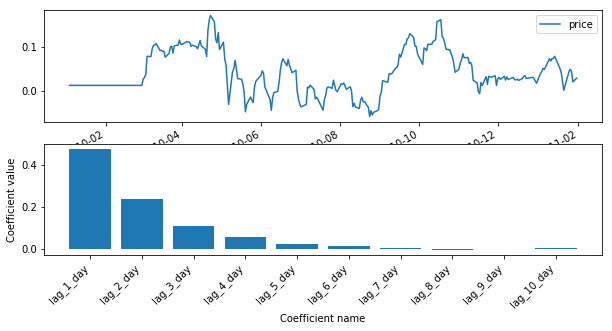

In [92]:
# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
y.loc[:'2011-01'].plot(ax=axs[0])

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_[0], prices_perc_shifted.columns, ax=axs[1])
plt.show()

In [102]:
def visualize_predictions(results):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
    
    # Loop through our model results to visualize them
    for ii, (prediction, score, indices) in enumerate(results):
        # Plot the predictions of the model in the order they were generated
        offset = len(prediction) * ii
        axs[0].scatter(np.arange(len(prediction)) + offset, prediction, label='Iteration {}'.format(ii))
        
        # Plot the predictions of the model according to how time was ordered
        axs[1].scatter(indices, prediction)
    axs[0].legend(loc="best")
    axs[0].set(xlabel="Test prediction number", title="Predictions ordered by test prediction number")
    axs[1].set(xlabel="Time", title="Predictions ordered by time")
    plt.show()

Let's do cross validation wrong - and shuffle the timeseries then cross validate: This will not work! Timeseries almost always have strong auto-correlations

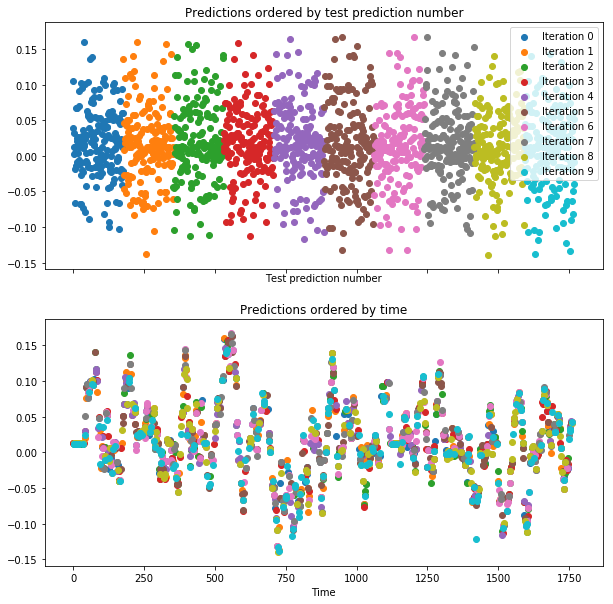

In [104]:
# data prep
from sklearn.metrics import r2_score
X = X.values
y = y.values

# Import ShuffleSplit and create the cross-validation object
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, random_state=1)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr], y[tr])
    
    # Generate predictions on the test data, score the predictions, and collect
    prediction = model.predict(X[tt])
    score = r2_score(y[tt], prediction)
    results.append((prediction, score, tt))

# Custom function to quickly visualize predictions
visualize_predictions(results)

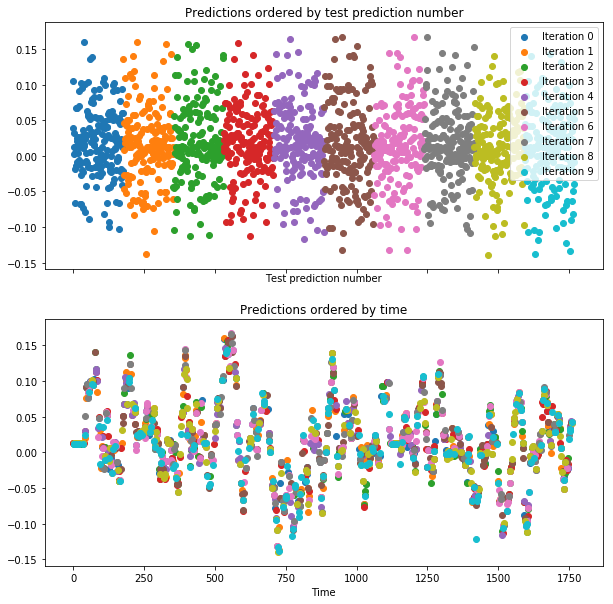

In [105]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Loop through our model results to visualize them
for ii, (prediction, score, indices) in enumerate(results):
    # Plot the predictions of the model in the order they were generated
    offset = len(prediction) * ii
    axs[0].scatter(np.arange(len(prediction)) + offset, prediction, label='Iteration {}'.format(ii))
    # Plot the predictions of the model according to how time was ordered
    axs[1].scatter(indices, prediction)

# Add labels
axs[0].legend(loc='best')
axs[0].set(xlabel='Test prediction number', title='Predictions ordered by test prediction number')
axs[1].set(xlabel='Time', title='Predictions ordered by time')
plt.show()

This time - keep the data ordered. Better, but still wrong. We must train on data that is older than our test set. Failing to do that in CV, gives the model the answer.

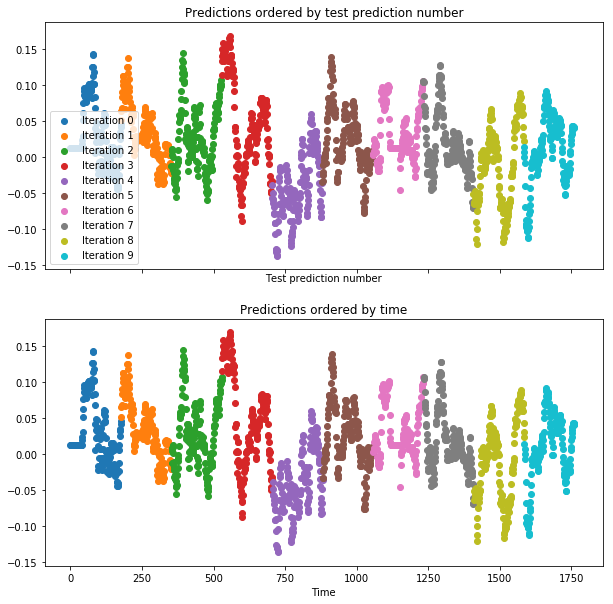

In [108]:
# Create KFold cross-validation object
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=False, random_state=1)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr], y[tr])
    
    # Generate predictions on the test data and collect
    prediction = model.predict(X[tt])
    score = r2_score(y[tt], prediction)
    results.append((prediction, score, tt))
    
# Custom function to quickly visualize predictions
visualize_predictions(results)

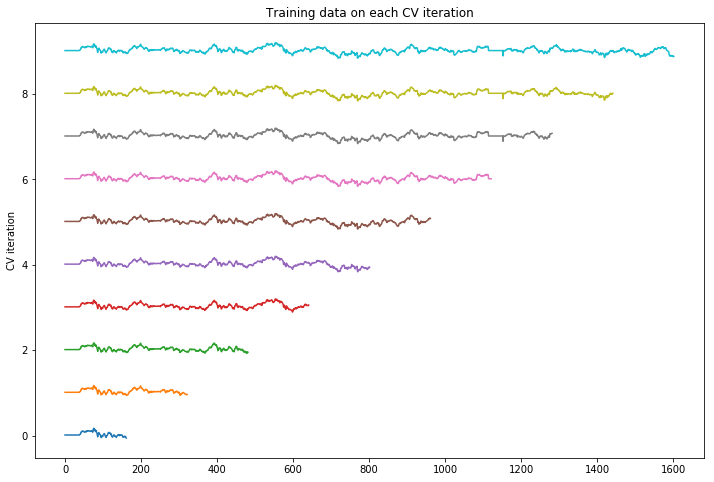

In [111]:
# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

# Create time-series cross-validation object
cv = TimeSeriesSplit(n_splits=10)

# Iterate through CV splits
fig, ax = plt.subplots()
for ii, (tr, tt) in enumerate(cv.split(X,y)):
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(tr, ii + y[tr])

ax.set(title='Training data on each CV iteration', ylabel='CV iteration')
plt.show()

In [215]:
from sklearn.utils import resample

def bootstrap_interval(data, percentiles=(2.5, 97.5), n_boots=100):
    """Bootstrap a confidence interval for the mean of columns of a 1- or 2-D dataset."""
    # Create our empty array we'll fille with the results
    if data.ndim == 1:
        data = data[:, np.newaxis]
    data = np.atleast_2d(data)
    bootstrap_means = np.zeros([n_boots, data.shape[-1]])
    for ii in range(n_boots):
        # Generate random indices for our data *with* replacement, then take the sample mean
        random_sample = resample(data)
        bootstrap_means[ii] = random_sample.mean(axis=0)

    # Compute the percentiles of choice for the bootstrapped means
    percentiles = np.percentile(bootstrap_means, percentiles, axis=0)
    return percentiles


In [216]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Iterate through CV splits
n_splits = 100
cv = TimeSeriesSplit(n_splits=100)

# Create empty array to collect coefficients
coefficients = np.zeros([n_splits, X.shape[1]])

for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Fit the model on training data and collect the coefficients
    model.fit(X[tr], y[tr])
    coefficients[ii] = model.coef_

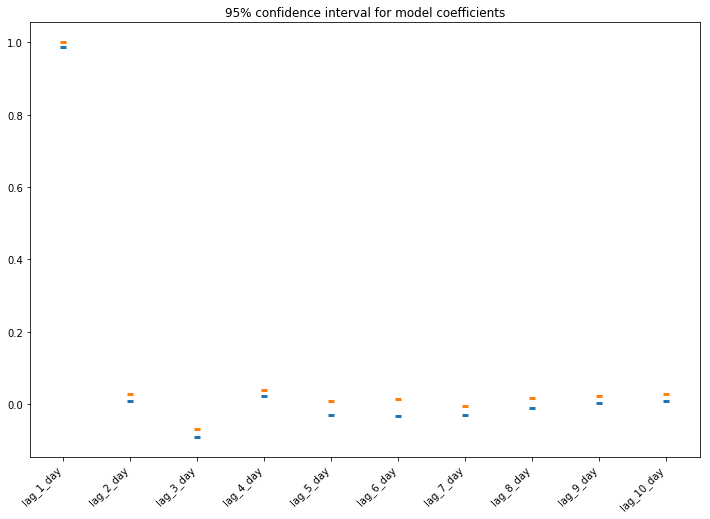

In [217]:
feature_names = prices_perc_shifted.columns

# Calculate a confidence interval around each coefficient
bootstrapped_interval = bootstrap_interval(coefficients, percentiles=(2.5,97.5), n_boots=100)

# Plot it
fig, ax = plt.subplots()
ax.scatter(feature_names, bootstrapped_interval[0], marker='_', lw=3)
ax.scatter(feature_names, bootstrapped_interval[1], marker='_', lw=3)
ax.set(title='95% confidence interval for model coefficients')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [218]:
from functools import partial

def my_pearsonr(est, X, y):
    co = np.corrcoef(est.predict(X).squeeze(), y.squeeze())[1, 0]
    co = np.nan_to_num(co)
    return np.corrcoef(est.predict(X).squeeze(), y.squeeze())[1, 0]

# Grab the date of the first index of each validation set
times_scores = [prices_perc_shifted.index[tt[0]] for tr, tt in cv.split(X, y)]

from sklearn.model_selection import cross_val_score

# Generate scores for each split to see how the model performs over time
scores = cross_val_score(model, X, y, cv=cv, scoring=my_pearsonr)
scores = np.nan_to_num(scores)

# Convert to a Pandas Series object
scores_series = pd.Series(scores, index=times_scores, name='score')

# Bootstrap a rolling confidence interval for the mean score
scores_lo = scores_series.rolling(20).agg(partial(bootstrap_interval, percentiles=2.5))
scores_hi = scores_series.rolling(20).agg(partial(bootstrap_interval, percentiles=97.5))

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


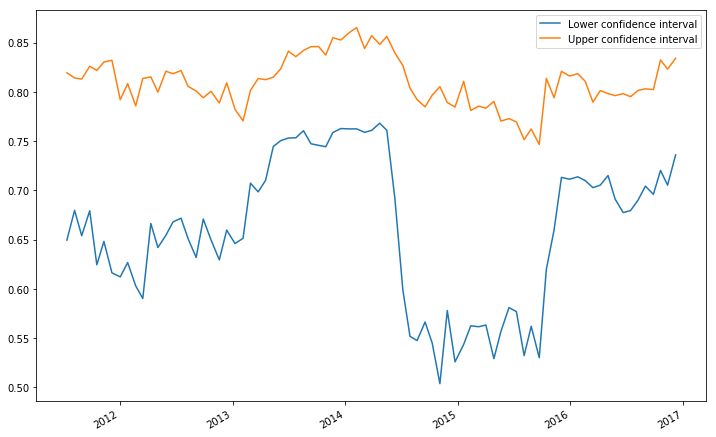

In [219]:
# Plot the results
fig, ax = plt.subplots()
scores_lo.plot(ax=ax, label="Lower confidence interval")
scores_hi.plot(ax=ax, label="Upper confidence interval")
ax.legend()
plt.show()

In [220]:
# Pre-initialize window sizes
window_sizes = [25, 50, 75, 100]

# Create an empty DataFrame to collect the stores
all_scores = pd.DataFrame(index=times_scores)

# Generate scores for each split to see how the model performs over time
for window in window_sizes:
    # Create cross-validation object using a limited lookback window
    cv = TimeSeriesSplit(n_splits=100, max_train_size=window)
    
    # Calculate scores across all CV splits and collect them in a DataFrame
    this_scores = cross_val_score(model, X, y, cv=cv, scoring=my_pearsonr)
    all_scores['Length {}'.format(window)] = this_scores

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarni

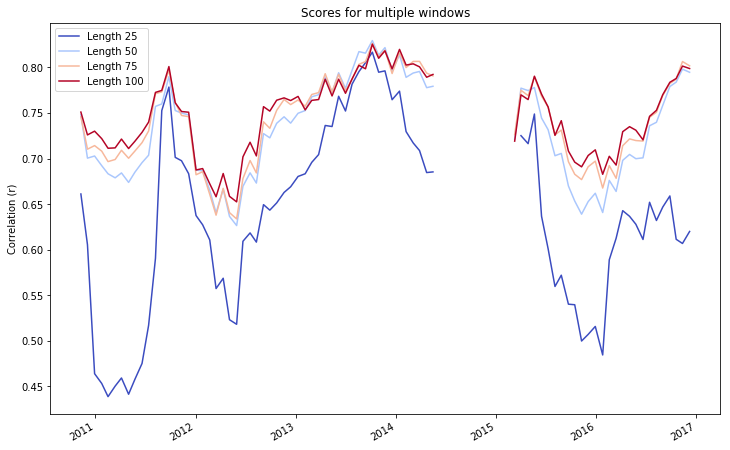

In [221]:
# Visualize the scores
ax = all_scores.rolling(10).mean().plot(cmap=plt.cm.coolwarm)
ax.set(title='Scores for multiple windows', ylabel='Correlation (r)')
plt.show()